In [1]:
import numpy as np
import pandas as pd

# Create an empty list to store DataFrames
dfs = []

# Loop through the range of file numbers
for i in range(92, 100):
    # Read each CSV file and append to the list
    df = pd.read_csv(f'./{i}.csv')
    dfs.append(df)
for j in range(23):
    j = str(j)
    if len(j)==1:
        j = '0' + j
    df = pd.read_csv(f'./{j}.csv')
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.tail(10))


def replace_values(cell_value):
    if pd.notna(cell_value):
        cell_value = cell_value.replace('450', '45.5').replace('900', '90.5')
    return cell_value

# Apply the function to each column
for i in range(1, 11):
    col_name = f'{i}_scorer'
    combined_df[col_name] = combined_df[col_name].apply(replace_values)

print(combined_df.tail(10))

print(combined_df.info())

       year  match_num home_away                        1_scorer  \
24042  2022        376      home  [['57'], 'Abdoulaye Doucouré']   
24043  2022        376      away                             NaN   
24044  2022        377      home       [['67'], 'Jack Harrison']   
24045  2022        377      away    [['02', '69'], 'Harry Kane']   
24046  2022        378      home       [['34'], 'Harvey Barnes']   
24047  2022        378      away       [['79'], 'Pablo Fornals']   
24048  2022        379      home        [['39'], 'Jadon Sancho']   
24049  2022        379      away          [['19'], 'Kenny Tete']   
24050  2022        380      home   [['19'], 'James Ward-Prowse']   
24051  2022        380      away    [['10', '73'], 'Diogo Jota']   

                                   2_scorer                    3_scorer  \
24042                                   NaN                         NaN   
24043                                   NaN                         NaN   
24044                     

In [2]:
new_data = combined_df.loc[:,['year','match_num','home_away']]
for num in range(15):
    new_data[f'{num+1}_time']=np.nan
    new_data[f'{num+1}_scorer']=np.nan

new_data.describe()

year     match_num  1_time  1_scorer  2_time  2_scorer  3_time  \
count  24052.00000  24052.000000     0.0       0.0     0.0       0.0     0.0   
mean    2006.71362    195.225262     NaN       NaN     NaN       NaN     NaN   
std        9.07237    113.438549     NaN       NaN     NaN       NaN     NaN   
min     1992.00000      1.000000     NaN       NaN     NaN       NaN     NaN   
25%     1999.00000     97.000000     NaN       NaN     NaN       NaN     NaN   
50%     2007.00000    194.000000     NaN       NaN     NaN       NaN     NaN   
75%     2015.00000    291.000000     NaN       NaN     NaN       NaN     NaN   
max     2022.00000    462.000000     NaN       NaN     NaN       NaN     NaN   

       3_scorer  4_time  4_scorer  ...  11_time  11_scorer  12_time  \
count       0.0     0.0       0.0  ...      0.0        0.0      0.0   
mean        NaN     NaN       NaN  ...      NaN        NaN      NaN   
std         NaN     NaN       NaN  ...      NaN        NaN      NaN   
min         NaN     NaN       NaN  ...      NaN        NaN      NaN   
25%         NaN     NaN       NaN  ...      NaN        NaN      NaN   
50%         NaN     NaN       NaN  ...      NaN        NaN      NaN   
75%         NaN     NaN       NaN  ...      NaN        NaN      NaN   
max         NaN     NaN       NaN  ...      NaN        NaN      NaN   

       12_scorer  13_time  13_scorer  14_time  14_scorer  15_time  15_scorer  
count        0.0      0.0        0.0      0.0        0.0      0.0        0.0  
mean         NaN      NaN        NaN      NaN        NaN      NaN        NaN  
std          NaN      NaN        NaN      NaN        NaN      NaN        NaN  
min          NaN      NaN        NaN      NaN        NaN      NaN        NaN  
25%          NaN      NaN        NaN      NaN        NaN      NaN        NaN  
50%          NaN      NaN        NaN      NaN        NaN      NaN        NaN  
75%          NaN      NaN        NaN      NaN        NaN      NaN        NaN  
max          NaN      NaN        NaN      NaN        NaN      NaN        NaN  

[8 rows x 32 columns]

In [3]:
for i in range(24052):
    num=0
    time_scorer={}
    for j in range(10):
        ele = combined_df[f'{j+1}_scorer'][i]
        
        if not pd.isna(ele):
            ele = eval(ele)
            for k in ele[0]:
                #print(k)
                time_scorer[k] = ele[1].strip()
    if time_scorer:
        time_scorer = dict(sorted(time_scorer.items()))

            
    for k,v in time_scorer.items():
        print(f'num{i}')
        print(k)
        print(v)
        new_data[f'{num+1}_time'] = new_data[f'{num+1}_time'].astype(str)
        new_data[f'{num+1}_scorer'] = new_data[f'{num+1}_scorer'].astype(str)
        new_data.at[i, f'{num+1}_time'] = k
        new_data.at[i, f'{num+1}_scorer'] = v
        print(new_data.loc[i, f'{num+1}_time'])
        print(new_data.loc[i, f'{num+1}_scorer'])
        
        num+=1
                

num0
28
Steve Bould
28
Steve Bould
num0
39
Kevin Campbell
39
Kevin Campbell
num1
69
Mark Robins
69
Mark Robins
num1
73
David Phillips
73
David Phillips
num1
82
Ruel Fox
82
Ruel Fox
num1
84
Mark Robins
84
Mark Robins
num2
84
Mick Harford
84
Mick Harford
num3
86
Nick Henry
86
Nick Henry
num4
09
John Williams
09
John Williams
num4
51
David Smith
51
David Smith
num5
63
Paul Wilkinson
63
Paul Wilkinson
num6
37
Mark Bright
37
Mark Bright
num6
63
Gareth Southgate
63
Gareth Southgate
num6
90
Simon Osborn
90
Simon Osborn
num7
42
Stuart Ripley
42
Stuart Ripley
num7
66
Alan Shearer
66
Alan Shearer
num7
81
Alan Shearer
81
Alan Shearer
num8
44
Barry Horne
44
Barry Horne
num9
15
Nigel Pearson
15
Nigel Pearson
num10
31
Gavin Johnson
31
Gavin Johnson
num11
84
Dalian Atkinson
84
Dalian Atkinson
num12
14
Lee Chapman
14
Lee Chapman
num12
86
Lee Chapman
86
Lee Chapman
num13
76
Warren Barton
76
Warren Barton
num14
05
Brian Deane
05
Brian Deane
num14
50
Brian Deane
50
Brian Deane
num15
61
Mark Hughes
61
Mar

40
Mick Harford
num194
69
Nigel Clough
69
Nigel Clough
num195
45
Robert Rosario
45
Robert Rosario
num196
30
Alan Shearer
30
Alan Shearer
num196
61
Stuart Ripley
61
Stuart Ripley
num200
37
Peter Ndlovu
37
Peter Ndlovu
num201
13
Ian Crook
13
Ian Crook
num202
54
Eric Young
54
Eric Young
num203
44
Iain Dowie
44
Iain Dowie
num203
88
Iain Dowie
88
Iain Dowie
num206
61
Gary McAllister
61
Gary McAllister
num206
63
Lee Chapman
63
Lee Chapman
num208
35
Jan Mølby
35
Jan Mølby
num208
39
Steve McManaman
39
Steve McManaman
num209
12
John Fashanu
12
John Fashanu
num209
27
Robbie Earle
27
Robbie Earle
num209
76
Robbie Earle
76
Robbie Earle
num212
62
Bernie Slaven
62
Bernie Slaven
num212
86
!Paul McGrath
86
!Paul McGrath
num213
22
Dean Saunders
22
Dean Saunders
num213
71
Dalian Atkinson
71
Dalian Atkinson
num213
74
Dean Saunders
74
Dean Saunders
num214
06
Mark Bright
06
Mark Bright
num214
32
Viv Anderson
32
Viv Anderson
num216
19
Ian Wright
19
Ian Wright
num218
10
Paul Merson
10
Paul Merson
num218
85
I

53
Micky Adams
num366
21
Gunnar Halle
21
Gunnar Halle
num366
24
Neil Pointon
24
Neil Pointon
num366
28
Graeme Sharp
28
Graeme Sharp
num366
60
Neil Adams
60
Neil Adams
num367
15
Willie Falconer
15
Willie Falconer
num368
37
!Andy Pearce
37
!Andy Pearce
num369
07
Mick Quinn
07
Mick Quinn
num370
89
Vinnie Jones
89
Vinnie Jones
num371
14
Chris Bart-Williams
14
Chris Bart-Williams
num372
87
Andy Townsend
87
Andy Townsend
num374
16
Kevin Gallacher
16
Kevin Gallacher
num374
54
Mick Quinn
54
Mick Quinn
num375
13
Chris Kiwomya
13
Chris Kiwomya
num375
70
Steve Whitton
70
Steve Whitton
num376
43
Chris Armstrong
43
Chris Armstrong
num376
76
Gareth Southgate
76
Gareth Southgate
num378
87
Gary Speed
87
Gary Speed
num379
27
Nigel Clough
27
Nigel Clough
num379
53
Roy Keane
53
Roy Keane
num379
54
Kingsley Black
54
Kingsley Black
num379
67
Roy Keane
67
Roy Keane
num380
52
John Hendrie
52
John Hendrie
num380
55
John Hendrie
55
John Hendrie
num380
65
John Hendrie
65
John Hendrie
num381
44
Jason Wilcox
44
J

61
Tony Cottee
num531
71
Tony Cottee
71
Tony Cottee
num531
73
Ian Snodin
73
Ian Snodin
num532
54
Paul McGrath
54
Paul McGrath
num532
58
Dean Saunders
58
Dean Saunders
num532
89
Kevin Richardson
89
Kevin Richardson
num533
74
Brian Deane
74
Brian Deane
num534
47
Paul Ince
47
Paul Ince
num534
68
Mark Hughes
68
Mark Hughes
num536
09
Lee Power
09
Lee Power
num536
26
Chris Sutton
26
Chris Sutton
num536
50
Jeremy Goss
50
Jeremy Goss
num536
89
Lee Power
89
Lee Power
num537
02
Chris Armstrong
02
Chris Armstrong
num537
45
Geoff Thomas
45
Geoff Thomas
num538
88
Bradley Allen
88
Bradley Allen
num539
47
John Spencer
47
John Spencer
num541
47
Frank Yallop
47
Frank Yallop
num541
79
Bontcho Guenchev
79
Bontcho Guenchev
num543
03
Paul Warhurst
03
Paul Warhurst
num543
89
John Harkes
89
John Harkes
num545
04
Dean Holdsworth
04
Dean Holdsworth
num545
55
Andy Clarke
55
Andy Clarke
num546
56
!Neil Ruddock
56
!Neil Ruddock
num547
15
Teddy Sheringham
15
Teddy Sheringham
num547
25
Andrew Gray
25
Andrew Gray
nu

18
Stuart Barlow
num744
49
Matt Jackson
49
Matt Jackson
num744
66
Tony Cottee
66
Tony Cottee
num746
43
David Wetherall
43
David Wetherall
num747
53
Mal Donaghy
53
Mal Donaghy
num750
81
John Polston
81
John Polston
num753
23
Stuart Ripley
23
Stuart Ripley
num753
55
Kevin Moran
55
Kevin Moran
num753
65
Mark Atkins
65
Mark Atkins
num754
66
Mark Bright
66
Mark Bright
num755
90
Dean Holdsworth
90
Dean Holdsworth
num756
72
Matthew Le Tissier
72
Matthew Le Tissier
num757
05
Nigel Clough
05
Nigel Clough
num757
45
Roy Keane
45
Roy Keane
num758
23
Darren Anderton
23
Darren Anderton
num758
43
Nayim
43
Nayim
num758
87
Andy Turner
87
Andy Turner
num759
60
Mike Sheron
60
Mike Sheron
num760
13
Mike Newell
13
Mike Newell
num760
25
Kevin Moran
25
Kevin Moran
num760
41
Kevin Gallacher
41
Kevin Gallacher
num760
65
Jason Wilcox
65
Jason Wilcox
num761
84
Ian Rush
84
Ian Rush
num762
52
Mal Donaghy
52
Mal Donaghy
num762
61
John Spencer
61
John Spencer
num762
73
Graham Stuart
73
Graham Stuart
num762
89
Darren

66
Efan Ekoku
num911
68
Andy Johnson
68
Andy Johnson
num912
29
Neil Pointon
29
Neil Pointon
num912
44
Ian Olney
44
Ian Olney
num912
55
Andy Ritchie
55
Andy Ritchie
num912
64
Gunnar Halle
64
Gunnar Halle
num913
34
Matthew Le Tissier
34
Matthew Le Tissier
num913
67
Matthew Le Tissier
67
Matthew Le Tissier
num913
85
Matthew Le Tissier
85
Matthew Le Tissier
num914
07
Andrew Scott
07
Andrew Scott
num914
16
Paul Rogers
16
Paul Rogers
num914
43
Dane Whitehouse
43
Dane Whitehouse
num914
48
Dane Whitehouse
48
Dane Whitehouse
num915
86
David Lee
86
David Lee
num915
87
Andy Townsend
87
Andy Townsend
num916
67
Les Ferdinand
67
Les Ferdinand
num916
78
Bradley Allen
78
Bradley Allen
num917
38
Tony Daley
38
Tony Daley
num918
81
Dean Holdsworth
81
Dean Holdsworth
num919
63
Paul Ince
63
Paul Ince
num919
70
Bryan Robson
70
Bryan Robson
num920
52
Paul Dickov
52
Paul Dickov
num921
39
Teddy Sheringham
39
Teddy Sheringham
num921
46
John Hendry
46
John Hendry
num921
78
John Hendry
78
John Hendry
num922
27
Br

88
Malcolm Allen
num1077
26
Andy Sinton
26
Andy Sinton
num1077
47
Andy Sinton
47
Andy Sinton
num1079
33
Lee Chapman
33
Lee Chapman
num1079
71
Trevor Morley
71
Trevor Morley
num1080
49
Steve Morgan
49
Steve Morgan
num1081
36
Gavin Peacock
36
Gavin Peacock
num1082
27
Mark Ward
27
Mark Ward
num1082
85
Tony Cottee
85
Tony Cottee
num1084
09
Ian Marshall
09
Ian Marshall
num1085
19
Dean Saunders
19
Dean Saunders
num1085
55
Andy Townsend
55
Andy Townsend
num1086
05
Gary McAllister
05
Gary McAllister
num1086
09
Gordon Strachan
09
Gordon Strachan
num1087
44
!Gary Kelly
44
!Gary Kelly
num1088
33
Trevor Sinclair
33
Trevor Sinclair
num1088
83
Les Ferdinand
83
Les Ferdinand
num1089
25
!Alan McDonald
25
!Alan McDonald
num1089
39
Darren Eadie
39
Darren Eadie
num1090
58
John Sheridan
58
John Sheridan
num1090
80
David Hirst
80
David Hirst
num1092
60
Martin Ling
60
Martin Ling
num1092
61
Andy Mutch
61
Andy Mutch
num1093
37
Lee Clark
37
Lee Clark
num1093
44
Malcolm Allen
44
Malcolm Allen
num1094
05
Steve 

32
Gordon Watson
num1266
64
Nigel Jemson
64
Nigel Jemson
num1268
36
Keith Scott
36
Keith Scott
num1270
06
Nick Barmby
06
Nick Barmby
num1271
72
Dean Holdsworth
72
Dean Holdsworth
num1274
15
Ian Wright
15
Ian Wright
num1274
60
Alan Smith
60
Alan Smith
num1275
61
Peter Beardsley
61
Peter Beardsley
num1277
60
Eric Cantona
60
Eric Cantona
num1278
41
Eddie Youds
41
Eddie Youds
num1280
80
Brian Deane
80
Brian Deane
num1280
86
Rod Wallace
86
Rod Wallace
num1280
87
Gary Speed
87
Gary Speed
num1282
86
Mike Sheron
86
Mike Sheron
num1283
66
Ryan Jones
66
Ryan Jones
num1283
75
Ryan Jones
75
Ryan Jones
num1283
84
Nigel Jemson
84
Nigel Jemson
num1284
47
Graeme Sharp
47
Graeme Sharp
num1284
62
Chris Makin
62
Chris Makin
num1285
55
Chris Sutton
55
Chris Sutton
num1286
02
Les Ferdinand
02
Les Ferdinand
num1287
87
Darren Anderton
87
Darren Anderton
num1288
32
Willie Falconer
32
Willie Falconer
num1290
48
Greg Berry
48
Greg Berry
num1291
33
Stuart Barlow
33
Stuart Barlow
num1292
45
Robbie Fowler
45
Robbi

71
Gary Ablett
num1454
84
Tony Cottee
84
Tony Cottee
num1454
89
Tony Cottee
89
Tony Cottee
num1454
90
Peter Beagrie
90
Peter Beagrie
num1455
55
John Moncur
55
John Moncur
num1455
61
Paul Bodin
61
Paul Bodin
num1460
59
Efan Ekoku
59
Efan Ekoku
num1461
42
Mark Stein
42
Mark Stein
num1463
47
Julian Dicks
47
Julian Dicks
num1463
53
Robbie Fowler
53
Robbie Fowler
num1463
80
Jamie Redknapp
80
Jamie Redknapp
num1464
18
Andrew Scott
18
Andrew Scott
num1465
38
Alan Shearer
38
Alan Shearer
num1465
64
Alan Shearer
64
Alan Shearer
num1466
44
Matthew Le Tissier
44
Matthew Le Tissier
num1469
49
Mark Hughes
49
Mark Hughes
num1470
12
Neal Ardley
12
Neal Ardley
num1470
42
John Fashanu
42
John Fashanu
num1471
67
Andy Pearce
67
Andy Pearce
num1472
20
Gary Penrice
20
Gary Penrice
num1473
04
Lee Clark
04
Lee Clark
num1473
63
Peter Beardsley
63
Peter Beardsley
num1474
45
Ian Wright
45
Ian Wright
num1475
04
Graeme Sharp
04
Graeme Sharp
num1476
67
Mark Stein
67
Mark Stein
num1477
39
Dean Saunders
39
Dean Saun

89
Brian Gayle
num1605
28
Gary Speed
28
Gary Speed
num1605
58
Brian Deane
58
Brian Deane
num1606
21
!John Fashanu
21
!John Fashanu
num1606
73
Craig Burley
73
Craig Burley
num1608
27
Rod Wallace
27
Rod Wallace
num1608
52
Brian Deane
52
Brian Deane
num1610
14
Ryan Giggs
14
Ryan Giggs
num1610
15
Mark Hughes
15
Mark Hughes
num1610
21
Paul Ince
21
Paul Ince
num1610
45
Eric Cantona
45
Eric Cantona
num1610
55
Eric Cantona
55
Eric Cantona
num1612
48
Nathan Blake
48
Nathan Blake
num1613
12
Simon Barker
12
Simon Barker
num1614
58
!Steve Redmond
58
!Steve Redmond
num1615
67
Darren Beckford
67
Darren Beckford
num1615
74
Richard Holden
74
Richard Holden
num1616
54
Rod Wallace
54
Rod Wallace
num1618
08
Ian Rush
08
Ian Rush
num1618
19
!Craig Burley
19
!Craig Burley
num1619
50
Craig Burley
50
Craig Burley
num1622
70
Darren Peacock
70
Darren Peacock
num1625
12
Ian Wright
12
Ian Wright
num1625
30
Ian Wright
30
Ian Wright
num1625
69
Ian Wright
69
Ian Wright
num1625
85
Kevin Campbell
85
Kevin Campbell
num

45
Eric Cantona
num1766
19
Ruel Fox
19
Ruel Fox
num1766
56
Peter Beardsley
56
Peter Beardsley
num1766
63
Robert Lee
63
Robert Lee
num1767
43
Richard Jobson
43
Richard Jobson
num1767
57
Graeme Sharp
57
Graeme Sharp
num1769
31
Nathan Blake
31
Nathan Blake
num1770
06
!David Linighan
06
!David Linighan
num1770
16
Gordon Watson
16
Gordon Watson
num1770
56
Andy Pearce
56
Andy Pearce
num1770
69
Chris Bart-Williams
69
Chris Bart-Williams
num1770
90
Mark Bright
90
Mark Bright
num1772
67
Nicky Summerbee
67
Nicky Summerbee
num1772
80
!Warren Barton
80
!Warren Barton
num1773
13
John Fashanu
13
John Fashanu
num1773
71
Robbie Earle
71
Robbie Earle
num1773
75
Robbie Earle
75
Robbie Earle
num1773
81
Dean Holdsworth
81
Dean Holdsworth
num1774
05
Steve Sedgley
05
Steve Sedgley
num1774
67
Vinny Samways
67
Vinny Samways
num1774
89
Darren Anderton
89
Darren Anderton
num1776
01
Martin Allen
01
Martin Allen
num1777
14
Robbie Fowler
14
Robbie Fowler
num1777
87
Ian Rush
87
Ian Rush
num1778
45
Alan Shearer
45
A

21
Robbie Fowler
num1931
78
John Barnes
78
John Barnes
num1932
87
Don Hutchison
87
Don Hutchison
num1933
32
!Steve Potts
32
!Steve Potts
num1933
35
Robert Lee
35
Robert Lee
num1933
88
Alex Mathie
88
Alex Mathie
num1934
15
Steve Staunton
15
Steve Staunton
num1934
85
Dean Saunders
85
Dean Saunders
num1936
17
Alan Shearer
17
Alan Shearer
num1936
43
Jason Wilcox
43
Jason Wilcox
num1936
60
Alan Shearer
60
Alan Shearer
num1940
18
Paul Walsh
18
Paul Walsh
num1941
31
Bruce Dyer
31
Bruce Dyer
num1942
07
Andrew Cole
07
Andrew Cole
num1942
21
Ruel Fox
21
Ruel Fox
num1942
55
Robert Lee
55
Robert Lee
num1942
66
Andrew Cole
66
Andrew Cole
num1943
15
Gavin Peacock
15
Gavin Peacock
num1943
27
Paul Furlong
27
Paul Furlong
num1946
34
Kingsley Black
34
Kingsley Black
num1946
52
Lars Bohinen
52
Lars Bohinen
num1946
63
Stuart Pearce
63
Stuart Pearce
num1946
82
Bryan Roy
82
Bryan Roy
num1947
56
Graham Hyde
56
Graham Hyde
num1948
35
Gary Penrice
35
Gary Penrice
num1948
37
Gary Penrice
37
Gary Penrice
num1949

54
Mark Blake
num2088
85
Dion Dublin
85
Dion Dublin
num2090
14
David Unsworth
14
David Unsworth
num2091
24
Stefan Schwarz
24
Stefan Schwarz
num2092
65
Adrian Paz
65
Adrian Paz
num2093
39
John Barnes
39
John Barnes
num2093
56
Robbie Fowler
56
Robbie Fowler
num2093
59
Robbie Fowler
59
Robbie Fowler
num2095
36
Andy Preece
36
Andy Preece
num2096
11
Gary Pallister
11
Gary Pallister
num2096
77
Keith Gillespie
77
Keith Gillespie
num2099
06
Chris Sutton
06
Chris Sutton
num2099
68
Chris Sutton
68
Chris Sutton
num2100
36
Danny Dichio
36
Danny Dichio
num2100
90
Gary Penrice
90
Gary Penrice
num2102
67
Mark Bright
67
Mark Bright
num2103
40
Dennis Wise
40
Dennis Wise
num2104
44
Neil Maddison
44
Neil Maddison
num2105
54
!Neil Maddison
54
!Neil Maddison
num2105
83
Rod Wallace
83
Rod Wallace
num2105
89
Rod Wallace
89
Rod Wallace
num2106
19
Jürgen Klinsmann
19
Jürgen Klinsmann
num2106
49
Teddy Sheringham
49
Teddy Sheringham
num2106
63
Nick Barmby
63
Nick Barmby
num2107
42
Matthew Rush
42
Matthew Rush
nu

78
Brian McClair
num2274
36
Duncan Ferguson
36
Duncan Ferguson
num2275
39
Mark Bright
39
Mark Bright
num2275
43
Guy Whittingham
43
Guy Whittingham
num2275
48
Klas Ingesson
48
Klas Ingesson
num2275
79
Guy Whittingham
79
Guy Whittingham
num2278
87
Iwan Roberts
87
Iwan Roberts
num2279
67
Robbie Fowler
67
Robbie Fowler
num2279
77
Ian Rush
77
Ian Rush
num2280
21
Niall Quinn
21
Niall Quinn
num2281
09
Alan Shearer
09
Alan Shearer
num2281
16
Mark Atkins
16
Mark Atkins
num2281
67
Graeme Le Saux
67
Graeme Le Saux
num2283
11
Nick Barmby
11
Nick Barmby
num2283
90
Teddy Sheringham
90
Teddy Sheringham
num2284
11
Jason Dodd
11
Jason Dodd
num2284
43
Matthew Le Tissier
43
Matthew Le Tissier
num2285
20
Dean Holdsworth
20
Dean Holdsworth
num2285
38
Mick Harford
38
Mick Harford
num2285
72
Dean Holdsworth
72
Dean Holdsworth
num2286
16
Tony Cottee
16
Tony Cottee
num2287
70
Claus Thomsen
70
Claus Thomsen
num2288
51
Lars Bohinen
51
Lars Bohinen
num2292
09
!Frank Sinclair
09
!Frank Sinclair
num2292
32
Dwight Y

18
Sean Flynn
num2468
27
Mike Marsh
27
Mike Marsh
num2468
76
Sean Flynn
76
Sean Flynn
num2468
87
Peter Ndlovu
87
Peter Ndlovu
num2469
64
David Lowe
64
David Lowe
num2469
74
Iwan Roberts
74
Iwan Roberts
num2471
24
Paul Merson
24
Paul Merson
num2471
39
Chris Kiwomya
39
Chris Kiwomya
num2471
77
Chris Kiwomya
77
Chris Kiwomya
num2472
58
Duncan Ferguson
58
Duncan Ferguson
num2474
70
Alex Mathie
70
Alex Mathie
num2474
77
Lee Chapman
77
Lee Chapman
num2475
38
Neil Maddison
38
Neil Maddison
num2478
31
Barry Venison
31
Barry Venison
num2478
55
Peter Beardsley
55
Peter Beardsley
num2478
66
Peter Beardsley
66
Peter Beardsley
num2479
40
Andy Townsend
40
Andy Townsend
num2480
14
Chris Bart-Williams
14
Chris Bart-Williams
num2481
42
John Barnes
42
John Barnes
num2481
59
Steve McManaman
59
Steve McManaman
num2482
49
Jürgen Klinsmann
49
Jürgen Klinsmann
num2483
39
Efan Ekoku
39
Efan Ekoku
num2483
64
Efan Ekoku
64
Efan Ekoku
num2484
11
Don Hutchison
11
Don Hutchison
num2485
67
Craig Burley
67
Craig Bur

78
Stan Collymore
num2621
67
Julian Dicks
67
Julian Dicks
num2622
27
Andy Impey
27
Andy Impey
num2622
59
Kevin Gallen
59
Kevin Gallen
num2622
82
Karl Ready
82
Karl Ready
num2623
89
Tony Adams
89
Tony Adams
num2624
38
Guy Whittingham
38
Guy Whittingham
num2627
29
Brian Deane
29
Brian Deane
num2628
57
Jon Goodman
57
Jon Goodman
num2629
37
Frank Sinclair
37
Frank Sinclair
num2631
68
Les Ferdinand
68
Les Ferdinand
num2632
53
David Howells
53
David Howells
num2632
86
Jürgen Klinsmann
86
Jürgen Klinsmann
num2633
49
Uwe Rösler
49
Uwe Rösler
num2635
90
Robbie Fowler
90
Robbie Fowler
num2637
10
Neil Shipperley
10
Neil Shipperley
num2637
32
Matthew Le Tissier
32
Matthew Le Tissier
num2639
85
Steve Stone
85
Steve Stone
num2640
40
Julian Dicks
40
Julian Dicks
num2640
76
Jeroen Boere
76
Jeroen Boere
num2640
77
Tony Cottee
77
Tony Cottee
num2642
41
Chris Armstrong
41
Chris Armstrong
num2643
87
Jürgen Klinsmann
87
Jürgen Klinsmann
num2644
22
Daniel Amokachi
22
Daniel Amokachi
num2644
55
Daniel Amokac

67
Roy Keane
num2801
56
!Steve Bruce
56
!Steve Bruce
num2805
29
Oyvind Leonhardsen
29
Oyvind Leonhardsen
num2805
56
Dean Holdsworth
56
Dean Holdsworth
num2805
83
Jon Goodman
83
Jon Goodman
num2806
18
Chris Waddle
18
Chris Waddle
num2806
83
Mark Pembridge
83
Mark Pembridge
num2807
60
Alan Shearer
60
Alan Shearer
num2809
69
Ugo Ehiogu
69
Ugo Ehiogu
num2810
21
Fabian De Freitas
21
Fabian De Freitas
num2810
80
Alan Stubbs
80
Alan Stubbs
num2811
61
Matt Holmes
61
Matt Holmes
num2814
35
Anders Limpar
35
Anders Limpar
num2814
43
Daniel Amokachi
43
Daniel Amokachi
num2816
03
Gary Speed
03
Gary Speed
num2816
88
David White
88
David White
num2818
27
Roy Keane
27
Roy Keane
num2818
60
Andrew Cole
60
Andrew Cole
num2818
80
Roy Keane
80
Roy Keane
num2819
65
Robbie Earle
65
Robbie Earle
num2820
39
Craig Hignett
39
Craig Hignett
num2820
74
Jan Åge Fjørtoft
74
Jan Åge Fjørtoft
num2822
35
Stuart Pearce
35
Stuart Pearce
num2823
14
Martin Allen
14
Martin Allen
num2824
31
Simon Barker
31
Simon Barker
num28

53
Neil Ruddock
num2978
60
Robbie Fowler
60
Robbie Fowler
num2978
64
Ian Rush
64
Ian Rush
num2980
44
Gary Pallister
44
Gary Pallister
num2980
87
Andrew Cole
87
Andrew Cole
num2982
80
Trevor Sinclair
80
Trevor Sinclair
num2983
46
Jason Lee
46
Jason Lee
num2985
40
Iain Dowie
40
Iain Dowie
num2986
63
Jason Euell
63
Jason Euell
num2987
09
Neil Shipperley
09
Neil Shipperley
num2987
74
Neil Shipperley
74
Neil Shipperley
num2988
21
Chris Armstrong
21
Chris Armstrong
num2989
47
David Ginola
47
David Ginola
num2990
35
John McGinlay
35
John McGinlay
num2992
14
Dennis Bergkamp
14
Dennis Bergkamp
num2996
07
Dion Dublin
07
Dion Dublin
num2996
48
Paul Williams
48
Paul Williams
num2997
20
Ruel Fox
20
Ruel Fox
num2997
25
Teddy Sheringham
25
Teddy Sheringham
num2997
46
David Howells
46
David Howells
num2998
11
Nicky Summerbee
11
Nicky Summerbee
num3000
11
Jan Åge Fjørtoft
11
Jan Åge Fjørtoft
num3001
45
Brian Deane
45
Brian Deane
num3002
02
Les Ferdinand
02
Les Ferdinand
num3002
89
Steve Watson
89
Steve

71
Chris Armstrong
num3145
75
Scott Green
75
Scott Green
num3145
79
Gudni Bergsson
79
Gudni Bergsson
num3146
83
Robbie Earle
83
Robbie Earle
num3147
27
!Alan Kimble
27
!Alan Kimble
num3148
07
Gary McAllister
07
Gary McAllister
num3148
37
Anthony Yeboah
37
Anthony Yeboah
num3148
73
Brian Deane
73
Brian Deane
num3149
27
Andrew Cole
27
Andrew Cole
num3150
44
Ian Wright
44
Ian Wright
num3150
61
Paul Merson
61
Paul Merson
num3150
83
Paul Merson
83
Paul Merson
num3152
11
Alan Shearer
11
Alan Shearer
num3152
50
David Batty
50
David Batty
num3154
10
Dan Petrescu
10
Dan Petrescu
num3155
34
Robbie Earle
34
Robbie Earle
num3155
38
Efan Ekoku
38
Efan Ekoku
num3156
10
Craig Short
10
Craig Short
num3156
45
Graham Stuart
45
Graham Stuart
num3156
60
Graham Stuart
60
Graham Stuart
num3156
68
Andrei Kanchelskis
68
Andrei Kanchelskis
num3158
06
Jason Lee
06
Jason Lee
num3163
40
Tomas Brolin
40
Tomas Brolin
num3163
63
David Wetherall
63
David Wetherall
num3164
06
Andrew Cole
06
Andrew Cole
num3164
53
Roy 

52
Andrei Kanchelskis
num3300
56
Dave Watson
56
Dave Watson
num3300
60
Duncan Ferguson
60
Duncan Ferguson
num3302
16
Niall Quinn
16
Niall Quinn
num3302
62
Niall Quinn
62
Niall Quinn
num3302
77
Uwe Rösler
77
Uwe Rösler
num3303
45
Philippe Albert
45
Philippe Albert
num3303
71
Faustino Asprilla
71
Faustino Asprilla
num3303
81
Philippe Albert
81
Philippe Albert
num3304
06
Tommy Widdrington
06
Tommy Widdrington
num3304
38
!Steve Clarke
38
!Steve Clarke
num3305
20
Dennis Wise
20
Dennis Wise
num3305
26
Dennis Wise
26
Dennis Wise
num3305
53
Ruud Gullit
53
Ruud Gullit
num3306
32
Chris Armstrong
32
Chris Armstrong
num3309
02
John Hartson
02
John Hartson
num3310
10
Jon Goodman
10
Jon Goodman
num3310
47
Jon Goodman
47
Jon Goodman
num3310
90
Mick Harford
90
Mick Harford
num3311
30
!Alan Reeves
30
!Alan Reeves
num3311
48
Dwight Yorke
48
Dwight Yorke
num3311
57
!Kenny Cunningham
57
!Kenny Cunningham
num3313
04
David Beckham
04
David Beckham
num3313
14
Steve Bruce
14
Steve Bruce
num3313
70
Andrew Cole

19
Mark Hughes
num3454
20
John Spencer
20
John Spencer
num3454
35
Mark Hughes
35
Mark Hughes
num3454
48
Mark Hughes
48
Mark Hughes
num3455
66
Gary McAllister
66
Gary McAllister
num3456
69
Eoin Jess
69
Eoin Jess
num3458
65
Uwe Rösler
65
Uwe Rösler
num3460
23
Curtis Fleming
23
Curtis Fleming
num3461
12
Robbie Earle
12
Robbie Earle
num3461
64
Efan Ekoku
64
Efan Ekoku
num3462
41
Ian Woan
41
Ian Woan
num3463
27
Alan Shearer
27
Alan Shearer
num3463
31
Billy McKinlay
31
Billy McKinlay
num3463
45
Jason Wilcox
45
Jason Wilcox
num3463
68
Jason Wilcox
68
Jason Wilcox
num3463
83
Graham Fenton
83
Graham Fenton
num3464
11
Kenneth Monkou
11
Kenneth Monkou
num3464
23
Neil Shipperley
23
Neil Shipperley
num3464
43
Matthew Le Tissier
43
Matthew Le Tissier
num3465
89
Ryan Giggs
89
Ryan Giggs
num3466
28
Tony Cottee
28
Tony Cottee
num3468
64
Les Ferdinand
64
Les Ferdinand
num3472
18
Andrei Kanchelskis
18
Andrei Kanchelskis
num3473
87
Robbie Fowler
87
Robbie Fowler
num3474
27
Paul McGrath
27
Paul McGrath
num

num3641
85
Chris Sutton
85
Chris Sutton
num3643
66
Chris Armstrong
66
Chris Armstrong
num3645
59
Andy Clarke
59
Andy Clarke
num3645
86
Efan Ekoku
86
Efan Ekoku
num3646
45
Frank Leboeuf
45
Frank Leboeuf
num3647
18
Andy Townsend
18
Andy Townsend
num3649
58
Patrik Berger
58
Patrik Berger
num3649
61
Michael Thomas
61
Michael Thomas
num3649
77
Patrik Berger
77
Patrik Berger
num3650
57
David Platt
57
David Platt
num3650
61
Ian Wright
61
Ian Wright
num3650
78
Ian Wright
78
Ian Wright
num3650
89
Ian Wright
89
Ian Wright
num3651
25
Andy Booth
25
Andy Booth
num3654
32
Giorgos Donis
32
Giorgos Donis
num3655
37
David Unsworth
37
David Unsworth
num3657
59
Alan Shearer
59
Alan Shearer
num3658
15
Robbie Fowler
15
Robbie Fowler
num3658
42
Patrik Berger
42
Patrik Berger
num3658
45
!Andy Myers
45
!Andy Myers
num3658
50
Patrik Berger
50
Patrik Berger
num3658
57
John Barnes
57
John Barnes
num3659
85
Frank Leboeuf
85
Frank Leboeuf
num3661
03
John Hartson
03
John Hartson
num3661
27
Ian Wright
27
Ian Wright


67
Oyvind Leonhardsen
num3800
27
Fabrizio Ravanelli
27
Fabrizio Ravanelli
num3800
83
Craig Hignett
83
Craig Hignett
num3801
17
Roy Keane
17
Roy Keane
num3801
72
David May
72
David May
num3803
82
Gary Kelly
82
Gary Kelly
num3803
89
Lee Sharpe
89
Lee Sharpe
num3804
68
Andy Melville
68
Andy Melville
num3805
66
Scott Oakes
66
Scott Oakes
num3806
17
Ian Bishop
17
Ian Bishop
num3807
43
Dean Sturridge
43
Dean Sturridge
num3808
28
Ian Wright
28
Ian Wright
num3808
88
Tony Adams
88
Tony Adams
num3808
89
Dennis Bergkamp
89
Dennis Bergkamp
num3809
57
Andy Sinton
57
Andy Sinton
num3810
45
Stuart Pearce
45
Stuart Pearce
num3810
90
Colin Cooper
90
Colin Cooper
num3811
54
Kevin Gallacher
54
Kevin Gallacher
num3811
57
Jason Wilcox
57
Jason Wilcox
num3812
39
Dwight Yorke
39
Dwight Yorke
num3814
27
Tim Sherwood
27
Tim Sherwood
num3814
87
Chris Sutton
87
Chris Sutton
num3815
61
Egil Ostenstad
61
Egil Ostenstad
num3816
12
Aljosa Asanovic
12
Aljosa Asanovic
num3816
79
Ashley Ward
79
Ashley Ward
num3817
43
D

Rory Allen
44
Rory Allen
num3963
23
Ole Gunnar Solskjaer
23
Ole Gunnar Solskjaer
num3963
76
David Beckham
76
David Beckham
num3964
36
Dennis Wise
36
Dennis Wise
num3964
44
Frank Leboeuf
44
Frank Leboeuf
num3964
85
Paul Hughes
85
Paul Hughes
num3965
23
Aljosa Asanovic
23
Aljosa Asanovic
num3967
60
Ryan Giggs
60
Ryan Giggs
num3967
79
Ole Gunnar Solskjaer
79
Ole Gunnar Solskjaer
num3968
73
Emile Heskey
73
Emile Heskey
num3970
50
Jamie Carragher
50
Jamie Carragher
num3970
58
Stan Collymore
58
Stan Collymore
num3970
63
Robbie Fowler
63
Robbie Fowler
num3972
14
Fabrizio Ravanelli
14
Fabrizio Ravanelli
num3972
23
Gianluca Festa
23
Gianluca Festa
num3972
72
Emerson
72
Emerson
num3972
89
Juninho Paulista
89
Juninho Paulista
num3973
29
Mark Pembridge
29
Mark Pembridge
num3973
80
Mark Pembridge
80
Mark Pembridge
num3974
88
Neil Maddison
88
Neil Maddison
num3974
89
Matthew Le Tissier
89
Matthew Le Tissier
num3975
14
Les Ferdinand
14
Les Ferdinand
num3975
82
Lee Clark
82
Lee Clark
num3978
55
Dennis

58
Paul Stewart
num4125
59
Alex Rae
59
Alex Rae
num4126
19
Mick Harford
19
Mick Harford
num4127
89
Stan Lazaridis
89
Stan Lazaridis
num4128
22
Gianfranco Zola
22
Gianfranco Zola
num4130
74
Steve Claridge
74
Steve Claridge
num4131
90
Teddy Sheringham
90
Teddy Sheringham
num4132
44
Juninho Paulista
44
Juninho Paulista
num4132
61
Fabrizio Ravanelli
61
Fabrizio Ravanelli
num4133
68
Chris Sutton
68
Chris Sutton
num4135
64
Tommy Johnson
64
Tommy Johnson
num4135
79
Dwight Yorke
79
Dwight Yorke
num4136
09
!Marc Rieper
09
!Marc Rieper
num4137
27
John Hartson
27
John Hartson
num4137
34
Rio Ferdinand
34
Rio Ferdinand
num4137
49
John Hartson
49
John Hartson
num4138
10
Robin van der Laan
10
Robin van der Laan
num4138
22
Paul Trollope
22
Paul Trollope
num4138
68
Dean Sturridge
68
Dean Sturridge
num4138
69
Ashley Ward
69
Ashley Ward
num4139
29
Ronny Rosenthal
29
Ronny Rosenthal
num4139
50
Jason Dozzell
50
Jason Dozzell
num4141
35
Ole Gunnar Solskjaer
35
Ole Gunnar Solskjaer
num4141
79
Eric Cantona
79

44
Paul McVeigh
num4289
13
Dion Dublin
13
Dion Dublin
num4289
39
Paul Williams
39
Paul Williams
num4290
85
Jason Euell
85
Jason Euell
num4292
09
Neil Redfearn
09
Neil Redfearn
num4293
53
John Hartson
53
John Hartson
num4293
76
Frank Lampard
76
Frank Lampard
num4294
20
Kevin Gallacher
20
Kevin Gallacher
num4296
41
Dion Dublin
41
Dion Dublin
num4296
83
Dion Dublin
83
Dion Dublin
num4296
88
Dion Dublin
88
Dion Dublin
num4297
40
Frank Sinclair
40
Frank Sinclair
num4297
71
Tore Andre Flo
71
Tore Andre Flo
num4298
85
Duncan Ferguson
85
Duncan Ferguson
num4299
36
Attilio Lombardo
36
Attilio Lombardo
num4299
77
Bruce Dyer
77
Bruce Dyer
num4300
42
Jimmy Floyd Hasselbaink
42
Jimmy Floyd Hasselbaink
num4301
35
Ian Wright
35
Ian Wright
num4302
37
Ian Marshall
37
Ian Marshall
num4304
02
Faustino Asprilla
02
Faustino Asprilla
num4304
72
Faustino Asprilla
72
Faustino Asprilla
num4305
08
Benito Carbone
08
Benito Carbone
num4307
43
Nathan Blake
43
Nathan Blake
num4308
56
Marcus Gayle
56
Marcus Gayle
nu

79
Paulo Wanchope
num4450
82
Francesco Baiano
82
Francesco Baiano
num4450
83
Lee Carsley
83
Lee Carsley
num4452
49
Michael Ball
49
Michael Ball
num4452
56
Danny Cadamarteri
56
Danny Cadamarteri
num4453
32
Ian Wright
32
Ian Wright
num4453
41
Marc Overmars
41
Marc Overmars
num4454
34
David Wetherall
34
David Wetherall
num4458
16
John Hartson
16
John Hartson
num4458
65
Eyal Berkovic
65
Eyal Berkovic
num4459
52
Robbie Fowler
52
Robbie Fowler
num4462
25
Dennis Bergkamp
25
Dennis Bergkamp
num4462
32
Dennis Bergkamp
32
Dennis Bergkamp
num4462
45
Ray Parlour
45
Ray Parlour
num4462
63
David Platt
63
David Platt
num4462
76
Ian Wright
76
Ian Wright
num4465
12
Savo Milosevic
12
Savo Milosevic
num4468
17
Teddy Sheringham
17
Teddy Sheringham
num4468
30
!Hermann Hreidarsson
30
!Hermann Hreidarsson
num4470
89
Warren Barton
89
Warren Barton
num4472
78
Benito Carbone
78
Benito Carbone
num4472
82
Benito Carbone
82
Benito Carbone
num4472
89
Paolo Di Canio
89
Paolo Di Canio
num4473
84
Danny Cadamarteri
84


32
Graham Fenton
num4591
75
Matt Elliott
75
Matt Elliott
num4592
67
Neil Shipperley
67
Neil Shipperley
num4593
32
Temuri Ketsbaia
32
Temuri Ketsbaia
num4593
63
Jon Dahl Tomasson
63
Jon Dahl Tomasson
num4595
72
Ramon Vega
72
Ramon Vega
num4595
76
David Ginola
76
David Ginola
num4596
48
David Hirst
48
David Hirst
num4596
55
Carlton Palmer
55
Carlton Palmer
num4597
28
Peter Atherton
28
Peter Atherton
num4597
69
Wayne Collins
69
Wayne Collins
num4597
84
Paolo Di Canio
84
Paolo Di Canio
num4598
19
John Hartson
19
John Hartson
num4598
47
John Hartson
47
John Hartson
num4599
46
Dwight Yorke
46
Dwight Yorke
num4601
58
Steve McManaman
58
Steve McManaman
num4602
18
Ole Gunnar Solskjaer
18
Ole Gunnar Solskjaer
num4602
53
Ole Gunnar Solskjaer
53
Ole Gunnar Solskjaer
num4602
60
!Stéphane Henchoz
60
!Stéphane Henchoz
num4602
85
!Jeff Kenna
85
!Jeff Kenna
num4604
22
Nathan Blake
22
Nathan Blake
num4606
31
John Hartson
31
John Hartson
num4606
45
Eyal Berkovic
45
Eyal Berkovic
num4606
48
David Unsworth

30
Tony Cottee
num4764
14
Mark Pembridge
14
Mark Pembridge
num4765
21
Michael Hughes
21
Michael Hughes
num4766
10
Trevor Sinclair
10
Trevor Sinclair
num4766
48
Trevor Sinclair
48
Trevor Sinclair
num4767
25
Nick Barmby
25
Nick Barmby
num4767
60
Mickaël Madar
60
Mickaël Madar
num4769
58
David Batty
58
David Batty
num4770
24
Jan Åge Fjørtoft
24
Jan Åge Fjørtoft
num4770
63
Darren Barnard
63
Darren Barnard
num4771
40
Duncan Ferguson
40
Duncan Ferguson
num4771
50
Tony Grant
50
Tony Grant
num4773
37
Nicola Berti
37
Nicola Berti
num4773
89
Chris Armstrong
89
Chris Armstrong
num4773
90
Ruel Fox
90
Ruel Fox
num4774
74
Dion Dublin
74
Dion Dublin
num4777
89
Dwight Yorke
89
Dwight Yorke
num4778
44
Garry Parker
44
Garry Parker
num4780
24
Michael Owen
24
Michael Owen
num4780
90
Michael Owen
90
Michael Owen
num4781
08
David Hirst
08
David Hirst
num4781
85
Egil Ostenstad
85
Egil Ostenstad
num4781
90
David Hirst
90
David Hirst
num4782
85
Andrew Cole
85
Andrew Cole
num4783
60
Bob Taylor
60
Bob Taylor
num

41
Nicolas Anelka
num4926
64
Nicolas Anelka
64
Nicolas Anelka
num4926
72
Patrick Vieira
72
Patrick Vieira
num4927
79
Warren Barton
79
Warren Barton
num4928
65
Ashley Ward
65
Ashley Ward
num4928
72
Jan Åge Fjørtoft
72
Jan Åge Fjørtoft
num4929
86
Dejan Stefanovic
86
Dejan Stefanovic
num4930
20
Dean Holdsworth
20
Dean Holdsworth
num4930
67
Bob Taylor
67
Bob Taylor
num4931
51
Damien Duff
51
Damien Duff
num4932
75
Tore Andre Flo
75
Tore Andre Flo
num4932
88
Gianluca Vialli
88
Gianluca Vialli
num4934
59
Noel Whelan
59
Noel Whelan
num4935
05
Dwight Yorke
05
Dwight Yorke
num4935
48
Dwight Yorke
48
Dwight Yorke
num4937
45
Emile Heskey
45
Emile Heskey
num4937
60
Emile Heskey
60
Emile Heskey
num4937
74
Matt Elliott
74
Matt Elliott
num4938
10
Don Hutchison
10
Don Hutchison
num4938
38
Duncan Ferguson
38
Duncan Ferguson
num4941
38
Carl Leaburn
38
Carl Leaburn
num4944
51
Kevin Gallacher
51
Kevin Gallacher
num4945
02
Dennis Bergkamp
02
Dennis Bergkamp
num4945
07
Ray Parlour
07
Ray Parlour
num4945
14
R

62
Mikkel Beck
num5090
18
Jimmy Floyd Hasselbaink
18
Jimmy Floyd Hasselbaink
num5094
12
Kevin Gallacher
12
Kevin Gallacher
num5099
05
Les Ferdinand
05
Les Ferdinand
num5100
48
Hamilton Ricard
48
Hamilton Ricard
num5101
31
Paulo Wanchope
31
Paulo Wanchope
num5103
37
Julian Joachim
37
Julian Joachim
num5104
89
Matthew Le Tissier
89
Matthew Le Tissier
num5105
52
Jean-Claude Darcheville
52
Jean-Claude Darcheville
num5105
68
Steve Stone
68
Steve Stone
num5106
72
Michael Hughes
72
Michael Hughes
num5107
61
Lee Bowyer
61
Lee Bowyer
num5108
28
Stephane Guivarc'h
28
Stephane Guivarc'h
num5109
17
Michael Owen
17
Michael Owen
num5109
18
Michael Owen
18
Michael Owen
num5109
32
Michael Owen
32
Michael Owen
num5109
45
Patrik Berger
45
Patrik Berger
num5110
38
!Scott Marshall
38
!Scott Marshall
num5110
52
Ian Harte
52
Ian Harte
num5110
86
Clyde Wijnhard
86
Clyde Wijnhard
num5113
73
Duncan Ferguson
73
Duncan Ferguson
num5113
83
Duncan Ferguson
83
Duncan Ferguson
num5114
63
Lee Hendrie
63
Lee Hendrie
n

50
Allan Nielsen
num5266
57
Chris Armstrong
57
Chris Armstrong
num5267
32
Andy Hunt
32
Andy Hunt
num5267
75
Andy Hunt
75
Andy Hunt
num5268
31
Dion Dublin
31
Dion Dublin
num5268
35
Dion Dublin
35
Dion Dublin
num5268
48
Stan Collymore
48
Stan Collymore
num5269
65
Darren Anderton
65
Darren Anderton
num5269
76
Ramon Vega
76
Ramon Vega
num5270
73
Tim Sherwood
73
Tim Sherwood
num5271
54
Darren Huckerby
54
Darren Huckerby
num5271
74
Noel Whelan
74
Noel Whelan
num5274
84
Jamie Redknapp
84
Jamie Redknapp
num5275
06
Kevin Harper
06
Kevin Harper
num5275
27
Paulo Wanchope
27
Paulo Wanchope
num5277
23
Marcus Gayle
23
Marcus Gayle
num5278
61
Kenneth Monkou
61
Kenneth Monkou
num5278
82
James Beattie
82
James Beattie
num5278
85
Egil Ostenstad
85
Egil Ostenstad
num5279
47
Paul Gascoigne
47
Paul Gascoigne
num5279
66
!Claus Lundekvam
66
!Claus Lundekvam
num5279
90
Gianluca Festa
90
Gianluca Festa
num5280
06
Nicolas Anelka
06
Nicolas Anelka
num5282
40
Jimmy Floyd Hasselbaink
40
Jimmy Floyd Hasselbaink
num

90
Jimmy Floyd Hasselbaink
num5427
34
Tony Cottee
34
Tony Cottee
num5429
20
Tore Andre Flo
20
Tore Andre Flo
num5429
48
Gustavo Poyet
48
Gustavo Poyet
num5430
33
Jason Euell
33
Jason Euell
num5430
51
Michael Hughes
51
Michael Hughes
num5431
29
Neil Redfearn
29
Neil Redfearn
num5432
07
Gareth Southgate
07
Gareth Southgate
num5432
85
Ugo Ehiogu
85
Ugo Ehiogu
num5433
08
Benito Carbone
08
Benito Carbone
num5435
53
Marc Overmars
53
Marc Overmars
num5436
29
Dean Sturridge
29
Dean Sturridge
num5436
85
Jonathan Hunt
85
Jonathan Hunt
num5437
77
Mikkel Beck
77
Mikkel Beck
num5438
44
Steve Walsh
44
Steve Walsh
num5439
38
Kevin Gallacher
38
Kevin Gallacher
num5440
67
Michael Owen
67
Michael Owen
num5440
71
Karl-Heinz Riedle
71
Karl-Heinz Riedle
num5440
80
Michael Owen
80
Michael Owen
num5440
84
Karl-Heinz Riedle
84
Karl-Heinz Riedle
num5441
29
Nolberto Solano
29
Nolberto Solano
num5441
56
Andreas Andersson
56
Andreas Andersson
num5442
54
Steve Chettle
54
Steve Chettle
num5443
48
Hassan Kachloul
48

10
Hassan Kachloul
num5597
06
Steve Guppy
06
Steve Guppy
num5598
83
Dennis Bergkamp
83
Dennis Bergkamp
num5598
86
Kanu
86
Kanu
num5598
88
Dennis Bergkamp
88
Dennis Bergkamp
num5600
02
Ashley Ward
02
Ashley Ward
num5601
15
Ibrahima Bakayoko
15
Ibrahima Bakayoko
num5601
65
Ibrahima Bakayoko
65
Ibrahima Bakayoko
num5602
17
Francesco Baiano
17
Francesco Baiano
num5602
21
Deon Burton
21
Deon Burton
num5603
44
Alan Thompson
44
Alan Thompson
num5604
42
Alan Smith
42
Alan Smith
num5604
68
Harry Kewell
68
Harry Kewell
num5606
45
Dougie Freedman
45
Dougie Freedman
num5607
45
Alan Shearer
45
Alan Shearer
num5607
73
Dietmar Hamann
73
Dietmar Hamann
num5609
75
Paul Kitson
75
Paul Kitson
num5610
22
John Aloisi
22
John Aloisi
num5611
67
Jason Wilcox
67
Jason Wilcox
num5612
12
Deon Burton
12
Deon Burton
num5612
44
Paulo Wanchope
44
Paulo Wanchope
num5612
49
Paulo Wanchope
49
Paulo Wanchope
num5613
36
Robbie Fowler
36
Robbie Fowler
num5613
57
Robbie Fowler
57
Robbie Fowler
num5615
16
Ray Parlour
16
Ray

74
James Beattie
num5757
17
Ian Marshall
17
Ian Marshall
num5758
48
Paolo Di Canio
48
Paolo Di Canio
num5759
01
Jimmy Floyd Hasselbaink
01
Jimmy Floyd Hasselbaink
num5759
45
Alan Smith
45
Alan Smith
num5759
62
Ian Harte
62
Ian Harte
num5759
78
Lee Bowyer
78
Lee Bowyer
num5759
79
Alf Inge Haaland
79
Alf Inge Haaland
num5760
14
Nicolas Anelka
14
Nicolas Anelka
num5762
68
Gustavo Poyet
68
Gustavo Poyet
num5764
28
Frank Sinclair
28
Frank Sinclair
num5765
17
Dean Sturridge
17
Dean Sturridge
num5765
60
Mikkel Beck
60
Mikkel Beck
num5766
69
Jamie Redknapp
69
Jamie Redknapp
num5766
89
Paul Ince
89
Paul Ince
num5767
23
Dwight Yorke
23
Dwight Yorke
num5767
56
Denis Irwin
56
Denis Irwin
num5768
43
Darren Anderton
43
Darren Anderton
num5769
17
Emmanuel Petit
17
Emmanuel Petit
num5769
33
Nicolas Anelka
33
Nicolas Anelka
num5769
85
Kanu
85
Kanu
num5770
07
Gareth Barry
07
Gareth Barry
num5770
66
Julian Joachim
66
Julian Joachim
num5770
79
Julian Joachim
79
Julian Joachim
num5771
03
!Gareth Barry
03
!

num5912
53
Hassan Kachloul
53
Hassan Kachloul
num5912
84
Matt Oakley
84
Matt Oakley
num5914
36
Tim Sherwood
36
Tim Sherwood
num5915
53
Alan Smith
53
Alan Smith
num5915
83
Ian Harte
83
Ian Harte
num5917
78
Dan Petrescu
78
Dan Petrescu
num5918
73
Kevin Phillips
73
Kevin Phillips
num5919
33
Robbie Keane
33
Robbie Keane
num5920
44
Muzzy Izzet
44
Muzzy Izzet
num5922
14
Andrew Cole
14
Andrew Cole
num5922
46
Andrew Cole
46
Andrew Cole
num5922
65
Andrew Cole
65
Andrew Cole
num5922
71
Andrew Cole
71
Andrew Cole
num5922
80
Ryan Giggs
80
Ryan Giggs
num5923
31
!Henning Berg
31
!Henning Berg
num5924
45
Davor Suker
45
Davor Suker
num5924
49
Davor Suker
49
Davor Suker
num5924
82
Kanu
82
Kanu
num5925
44
Julian Joachim
44
Julian Joachim
num5926
37
Frank Leboeuf
37
Frank Leboeuf
num5928
02
Gary McAllister
02
Gary McAllister
num5928
17
John Aloisi
17
John Aloisi
num5928
54
Youssef Chippo
54
Youssef Chippo
num5929
07
Lee Bowyer
07
Lee Bowyer
num5929
25
Darren Huckerby
25
Darren Huckerby
num5929
33
Ian Har

24
Gerry Taggart
num6052
36
Gerry Taggart
36
Gerry Taggart
num6052
57
Tony Cottee
57
Tony Cottee
num6054
30
Paul Scholes
30
Paul Scholes
num6054
45
Andrew Cole
45
Andrew Cole
num6054
65
Roy Keane
65
Roy Keane
num6056
15
Christian Ziege
15
Christian Ziege
num6056
61
Brian Deane
61
Brian Deane
num6057
03
Kevin Campbell
03
Kevin Campbell
num6058
89
Marcus Gayle
89
Marcus Gayle
num6059
67
Marian Pahars
67
Marian Pahars
num6060
17
Robbie Keane
17
Robbie Keane
num6060
33
Stephen Froggatt
33
Stephen Froggatt
num6060
49
Mustapha Hadji
49
Mustapha Hadji
num6060
62
Gary McAllister
62
Gary McAllister
num6062
10
Niall Quinn
10
Niall Quinn
num6062
21
Niall Quinn
21
Niall Quinn
num6063
63
Steffen Iversen
63
Steffen Iversen
num6064
21
Titi Camara
21
Titi Camara
num6064
42
Jamie Redknapp
42
Jamie Redknapp
num6064
80
Vegard Heggem
80
Vegard Heggem
num6065
12
Dean Windass
12
Dean Windass
num6067
84
Dean Richards
84
Dean Richards
num6068
43
Lee Mills
43
Lee Mills
num6069
01
Gary McAllister
01
Gary McAlli

63
Kevin Davies
num6196
21
Paolo Di Canio
21
Paolo Di Canio
num6197
04
Dean Sturridge
04
Dean Sturridge
num6198
75
Ian Taylor
75
Ian Taylor
num6199
44
Tim Sherwood
44
Tim Sherwood
num6200
31
Dennis Wise
31
Dennis Wise
num6200
34
Tore Andre Flo
34
Tore Andre Flo
num6200
83
Jody Morris
83
Jody Morris
num6202
02
Branko Strupar
02
Branko Strupar
num6202
72
Branko Strupar
72
Branko Strupar
num6204
16
Don Hutchison
16
Don Hutchison
num6204
56
David Unsworth
56
David Unsworth
num6205
26
Matt Elliott
26
Matt Elliott
num6205
31
Matt Elliott
31
Matt Elliott
num6206
46
Harry Kewell
46
Harry Kewell
num6207
19
Gareth Southgate
19
Gareth Southgate
num6207
62
Gareth Southgate
62
Gareth Southgate
num6208
18
Nikolaos Dabizas
18
Nikolaos Dabizas
num6208
65
Gary Speed
65
Gary Speed
num6209
84
Frank Lampard
84
Frank Lampard
num6209
88
Igor Stimac
88
Igor Stimac
num6210
56
Gerald Sibon
56
Gerald Sibon
num6211
40
Emmanuel Petit
40
Emmanuel Petit
num6212
55
Kevin Davies
55
Kevin Davies
num6214
23
Chris Armst

33
Tahar El-Khalej
num6364
33
Neal Ardley
33
Neal Ardley
num6364
87
Carl Cort
87
Carl Cort
num6365
55
Gerry Taggart
55
Gerry Taggart
num6366
75
Peter Beagrie
75
Peter Beagrie
num6367
12
Michael Bridges
12
Michael Bridges
num6367
63
Michael Bridges
63
Michael Bridges
num6368
48
Paul Ince
48
Paul Ince
num6368
63
Hamilton Ricard
63
Hamilton Ricard
num6369
70
Dennis Bergkamp
70
Dennis Bergkamp
num6370
86
Gary McAllister
86
Gary McAllister
num6374
07
Cedric Roussel
07
Cedric Roussel
num6374
21
Noel Whelan
21
Noel Whelan
num6374
85
John Eustace
85
John Eustace
num6374
86
Herlyn Zuniga
86
Herlyn Zuniga
num6377
17
Michael Owen
17
Michael Owen
num6377
86
Titi Camara
86
Titi Camara
num6379
33
David Beckham
33
David Beckham
num6379
83
Dwight Yorke
83
Dwight Yorke
num6380
39
Kevin Davies
39
Kevin Davies
num6380
63
Kevin Davies
63
Kevin Davies
num6382
66
Niall Quinn
66
Niall Quinn
num6383
82
Christian Ziege
82
Christian Ziege
num6384
88
Allan Smart
88
Allan Smart
num6388
20
!Chris Armstrong
20
!Chr

75
Ryan Giggs
num6515
86
Jordi Cruijff
86
Jordi Cruijff
num6517
60
Brian Deane
60
Brian Deane
num6518
43
Peter Beagrie
43
Peter Beagrie
num6518
50
Peter Beagrie
50
Peter Beagrie
num6518
83
Dean Windass
83
Dean Windass
num6521
01
David Hopkin
01
David Hopkin
num6521
53
Michael Bridges
53
Michael Bridges
num6521
68
Harry Kewell
68
Harry Kewell
num6522
69
Marc Overmars
69
Marc Overmars
num6522
90
Emmanuel Petit
90
Emmanuel Petit
num6523
40
Paolo Di Canio
40
Paolo Di Canio
num6524
05
Juninho Paulista
05
Juninho Paulista
num6524
78
Gianluca Festa
78
Gianluca Festa
num6525
10
Gary Speed
10
Gary Speed
num6525
18
Alessandro Pistone
18
Alessandro Pistone
num6526
20
Michael Bridges
20
Michael Bridges
num6526
45
Michael Duberry
45
Michael Duberry
num6526
52
Darren Huckerby
52
Darren Huckerby
num6527
25
Dominic Foley
25
Dominic Foley
num6529
02
Tony Cottee
02
Tony Cottee
num6529
48
Phil Gilchrist
48
Phil Gilchrist
num6530
21
Thierry Henry
21
Thierry Henry
num6530
48
Thierry Henry
48
Thierry Henry


num6663
54
Francis Jeffers
54
Francis Jeffers
num6663
87
Francis Jeffers
87
Francis Jeffers
num6666
07
Malcolm Christie
07
Malcolm Christie
num6666
39
Simo Valakari
39
Simo Valakari
num6667
59
Claus Jensen
59
Claus Jensen
num6667
62
Jonatan Johansson
62
Jonatan Johansson
num6668
67
Sol Campbell
67
Sol Campbell
num6670
24
Sylvain Wiltord
24
Sylvain Wiltord
num6670
72
Paolo Vernazza
72
Paolo Vernazza
num6671
80
Mustapha Hadji
80
Mustapha Hadji
num6672
05
Gareth Southgate
05
Gareth Southgate
num6672
75
Dion Dublin
75
Dion Dublin
num6674
39
Jonatan Johansson
39
Jonatan Johansson
num6676
54
Thomas Gravesen
54
Thomas Gravesen
num6677
27
Nicky Butt
27
Nicky Butt
num6677
29
Ryan Giggs
29
Ryan Giggs
num6677
38
Ole Gunnar Solskjaer
38
Ole Gunnar Solskjaer
num6678
04
Lee Bowyer
04
Lee Bowyer
num6679
12
James Scowcroft
12
James Scowcroft
num6679
47
Jermaine Wright
47
Jermaine Wright
num6680
47
Marian Pahars
47
Marian Pahars
num6680
61
Marian Pahars
61
Marian Pahars
num6682
40
Kevin Kilbane
40
Kevi

89
Dean Richards
num6824
53
Steve Lomas
53
Steve Lomas
num6824
58
Trevor Sinclair
58
Trevor Sinclair
num6824
67
Ian Pearce
67
Ian Pearce
num6824
89
Paolo Di Canio
89
Paolo Di Canio
num6825
32
Spencer Prior
32
Spencer Prior
num6826
79
Gustavo Poyet
79
Gustavo Poyet
num6827
62
Mark Viduka
62
Mark Viduka
num6828
13
Gary McAllister
13
Gary McAllister
num6828
51
Steven Gerrard
51
Steven Gerrard
num6828
82
Emile Heskey
82
Emile Heskey
num6828
87
Emile Heskey
87
Emile Heskey
num6829
56
David Thompson
56
David Thompson
num6830
35
Jonatan Johansson
35
Jonatan Johansson
num6830
90
Martin Pringle
90
Martin Pringle
num6832
55
Malcolm Christie
55
Malcolm Christie
num6832
68
Rory Delap
68
Rory Delap
num6834
54
Danny Cadamarteri
54
Danny Cadamarteri
num6834
73
Kevin Campbell
73
Kevin Campbell
num6837
45
Nigel Winterburn
45
Nigel Winterburn
num6839
02
David Beckham
02
David Beckham
num6841
08
Muzzy Izzet
08
Muzzy Izzet
num6841
13
Trevor Benjamin
13
Trevor Benjamin
num6841
57
Darren Eadie
57
Darren Ead

25
Julio Arca
num6998
57
Kevin Phillips
57
Kevin Phillips
num6998
63
Danny Dichio
63
Danny Dichio
num6998
88
Stefan Schwarz
88
Stefan Schwarz
num6999
05
Marcus Stewart
05
Marcus Stewart
num7000
27
Gary Doherty
27
Gary Doherty
num7000
30
Darren Anderton
30
Darren Anderton
num7000
35
Serhiy Rebrov
35
Serhiy Rebrov
num7000
77
Les Ferdinand
77
Les Ferdinand
num7001
23
Nolberto Solano
23
Nolberto Solano
num7001
49
Kieron Dyer
49
Kieron Dyer
num7002
03
Robert Pirès
03
Robert Pirès
num7003
62
John Terry
62
John Terry
num7005
24
Danny Murphy
24
Danny Murphy
num7005
32
Steven Gerrard
32
Steven Gerrard
num7005
53
Danny Murphy
53
Danny Murphy
num7007
72
Teddy Sheringham
72
Teddy Sheringham
num7007
75
Ryan Giggs
75
Ryan Giggs
num7007
87
Luke Chadwick
87
Luke Chadwick
num7011
31
Eirik Bakke
31
Eirik Bakke
num7011
80
Lee Bowyer
80
Lee Bowyer
num7011
90
Robbie Keane
90
Robbie Keane
num7012
43
Alen Boksic
43
Alen Boksic
num7012
60
Ugo Ehiogu
60
Ugo Ehiogu
num7012
81
Alen Boksic
81
Alen Boksic
num7012


10
Ade Akinbiyi
num7193
02
Craig Bellamy
02
Craig Bellamy
num7193
19
Lee Carsley
19
Lee Carsley
num7193
51
John Hartson
51
John Hartson
num7194
16
Duncan Ferguson
16
Duncan Ferguson
num7194
40
Michael Ball
40
Michael Ball
num7194
84
David Weir
84
David Weir
num7195
09
Jeff Whitley
09
Jeff Whitley
num7198
77
Alun Armstrong
77
Alun Armstrong
num7199
46
Emile Heskey
46
Emile Heskey
num7200
45
Andrew Cole
45
Andrew Cole
num7200
82
Ole Gunnar Solskjaer
82
Ole Gunnar Solskjaer
num7201
63
Mark Fish
63
Mark Fish
num7202
26
Steffen Iversen
26
Steffen Iversen
num7202
76
Simon Davies
76
Simon Davies
num7203
44
Eoin Jess
44
Eoin Jess
num7205
08
Sylvain Wiltord
08
Sylvain Wiltord
num7205
16
Freddie Ljungberg
16
Freddie Ljungberg
num7205
36
Kanu
36
Kanu
num7206
74
Robbie Blake
74
Robbie Blake
num7206
80
Benito Carbone
80
Benito Carbone
num7208
55
Steven Gerrard
55
Steven Gerrard
num7209
04
Rio Ferdinand
04
Rio Ferdinand
num7209
33
Lee Bowyer
33
Lee Bowyer
num7211
34
! Edu
34
! Edu
num7211
38
! Sylvi

83
Per Frandsen
num7340
18
Michael Owen
18
Michael Owen
num7340
77
Michael Owen
77
Michael Owen
num7341
30
Paolo Di Canio
30
Paolo Di Canio
num7343
43
Thierry Henry
43
Thierry Henry
num7343
87
Robert Pirès
87
Robert Pirès
num7343
88
Dennis Bergkamp
88
Dennis Bergkamp
num7343
90
Dennis Bergkamp
90
Dennis Bergkamp
num7344
38
Kevin Phillips
38
Kevin Phillips
num7348
08
Boudewijn Zenden
08
Boudewijn Zenden
num7349
77
Clarence Acuna
77
Clarence Acuna
num7350
35
David Beckham
35
David Beckham
num7350
51
Ruud van Nistelrooij
51
Ruud van Nistelrooij
num7350
53
Ruud van Nistelrooij
53
Ruud van Nistelrooij
num7351
04
Louis Saha
04
Louis Saha
num7351
48
Louis Saha
48
Louis Saha
num7352
65
Duncan Ferguson
65
Duncan Ferguson
num7353
45
Darren Anderton
45
Darren Anderton
num7354
32
Sylvain Wiltord
32
Sylvain Wiltord
num7355
29
Ian Harte
29
Ian Harte
num7355
53
Mark Viduka
53
Mark Viduka
num7356
39
Michael Ricketts
39
Michael Ricketts
num7358
14
Finidi George
14
Finidi George
num7358
48
Richard Naylo

89
David Dunn
num7494
15
Fabrizio Ravanelli
15
Fabrizio Ravanelli
num7495
73
Jason Euell
73
Jason Euell
num7496
31
Steve Watson
31
Steve Watson
num7496
59
Tomasz Radzinski
59
Tomasz Radzinski
num7496
62
Thomas Gravesen
62
Thomas Gravesen
num7497
71
Mustapha Hadji
71
Mustapha Hadji
num7497
90
Peter Schmeichel
90
Peter Schmeichel
num7498
58
Dennis Wise
58
Dennis Wise
num7499
05
Robbie Fowler
05
Robbie Fowler
num7499
10
Sami Hyypiä
10
Sami Hyypiä
num7499
43
Robbie Fowler
43
Robbie Fowler
num7499
90
Robbie Fowler
90
Robbie Fowler
num7500
25
Juan Sebastián Verón
25
Juan Sebastián Verón
num7501
35
Kevin Nolan
35
Kevin Nolan
num7501
84
Michael Ricketts
84
Michael Ricketts
num7502
53
Frederic Kanoute
53
Frederic Kanoute
num7502
81
Frederic Kanoute
81
Frederic Kanoute
num7504
23
Barry Hayles
23
Barry Hayles
num7505
55
Jermaine Wright
55
Jermaine Wright
num7509
08
!Gary Speed
08
!Gary Speed
num7509
20
Gustavo Poyet
20
Gustavo Poyet
num7510
02
Franck Queudrue
02
Franck Queudrue
num7510
21
Alen Bo

89
James Scowcroft
num7664
44
Juan Pablo Ángel
44
Juan Pablo Ángel
num7664
70
Juan Pablo Ángel
70
Juan Pablo Ángel
num7665
18
Finidi George
18
Finidi George
num7666
20
Robert Pirès
20
Robert Pirès
num7667
60
Andy O'Brien
60
Andy O'Brien
num7667
86
Alan Shearer
86
Alan Shearer
num7667
90
Laurent Robert
90
Laurent Robert
num7668
19
Mark Viduka
19
Mark Viduka
num7668
26
Robbie Fowler
26
Robbie Fowler
num7668
71
Robbie Fowler
71
Robbie Fowler
num7669
84
Joe-Max Moore
84
Joe-Max Moore
num7669
90
David Weir
90
David Weir
num7671
57
Damien Duff
57
Damien Duff
num7671
90
David Dunn
90
David Dunn
num7672
45
Fabrizio Ravanelli
45
Fabrizio Ravanelli
num7672
67
Benito Carbone
67
Benito Carbone
num7672
87
Malcolm Christie
87
Malcolm Christie
num7673
45
Juan Pablo Ángel
45
Juan Pablo Ángel
num7674
38
Lee Bowyer
38
Lee Bowyer
num7674
50
Mark Viduka
50
Mark Viduka
num7674
56
Ian Harte
56
Ian Harte
num7675
38
Craig Bellamy
38
Craig Bellamy
num7675
59
Robbie Elliott
59
Robbie Elliott
num7675
71
Alan She

31
Matt Jansen
num7800
39
Matt Jansen
39
Matt Jansen
num7801
14
Dennis Bergkamp
14
Dennis Bergkamp
num7801
21
Thierry Henry
21
Thierry Henry
num7801
75
Dennis Bergkamp
75
Dennis Bergkamp
num7802
02
Eidur Gudjohnsen
02
Eidur Gudjohnsen
num7802
31
Samuele Dalla Bona
31
Samuele Dalla Bona
num7804
10
Marcus Bent
10
Marcus Bent
num7806
57
Emile Heskey
57
Emile Heskey
num7808
43
Kevin Davies
43
Kevin Davies
num7808
66
Fabrice Fernandes
66
Fabrice Fernandes
num7810
17
Steffen Iversen
17
Steffen Iversen
num7811
67
Clarence Acuna
67
Clarence Acuna
num7811
69
Alan Shearer
69
Alan Shearer
num7811
78
Craig Bellamy
78
Craig Bellamy
num7812
40
Sylvain Wiltord
40
Sylvain Wiltord
num7813
80
Jo Tessem
80
Jo Tessem
num7814
43
Lee Morris
43
Lee Morris
num7816
28
David Unsworth
28
David Unsworth
num7817
11
Sixto Peralta
11
Sixto Peralta
num7817
44
Matt Holland
44
Matt Holland
num7820
24
James Scowcroft
24
James Scowcroft
num7820
68
James Scowcroft
68
James Scowcroft
num7821
62
Jimmy Floyd Hasselbaink
62
J

73
Nolberto Solano
num7950
88
Olivier Bernard
88
Olivier Bernard
num7951
06
Duncan Ferguson
06
Duncan Ferguson
num7951
34
Niclas Alexandersson
34
Niclas Alexandersson
num7952
02
Patrick Vieira
02
Patrick Vieira
num7952
04
Dennis Bergkamp
04
Dennis Bergkamp
num7952
30
Sylvain Wiltord
30
Sylvain Wiltord
num7954
08
!Mark Delaney
08
!Mark Delaney
num7954
40
Fredi Bobic
40
Fredi Bobic
num7954
76
Kevin Nolan
76
Kevin Nolan
num7955
15
!Paul Warhurst
15
!Paul Warhurst
num7955
17
Ian Taylor
17
Ian Taylor
num7956
50
John Terry
50
John Terry
num7956
86
Emmanuel Petit
86
Emmanuel Petit
num7957
60
Branko Strupar
60
Branko Strupar
num7958
20
Mark Viduka
20
Mark Viduka
num7958
62
Ian Harte
62
Ian Harte
num7958
80
Lee Bowyer
80
Lee Bowyer
num7959
09
Paul Scholes
09
Paul Scholes
num7959
37
Ole Gunnar Solskjaer
37
Ole Gunnar Solskjaer
num7959
39
Ole Gunnar Solskjaer
39
Ole Gunnar Solskjaer
num7959
55
Ryan Giggs
55
Ryan Giggs
num7960
09
Paul Dickov
09
Paul Dickov
num7960
77
Paul Dickov
77
Paul Dickov
num

80
Robbie Keane
num8102
78
Ole Gunnar Solskjaer
78
Ole Gunnar Solskjaer
num8106
09
Thierry Henry
09
Thierry Henry
num8106
23
Sylvain Wiltord
23
Sylvain Wiltord
num8109
48
John Arne Riise
48
John Arne Riise
num8110
61
Lomana Lua Lua
61
Lomana Lua Lua
num8110
72
Lomana Lua Lua
72
Lomana Lua Lua
num8110
76
Alan Shearer
76
Alan Shearer
num8110
86
Nolberto Solano
86
Nolberto Solano
num8112
03
William Gallas
03
William Gallas
num8112
45
Boudewijn Zenden
45
Boudewijn Zenden
num8113
26
David Beckham
26
David Beckham
num8113
65
Ryan Giggs
65
Ryan Giggs
num8115
13
Dwight Yorke
13
Dwight Yorke
num8116
02
Youri Djorkaeff
02
Youri Djorkaeff
num8117
26
Chris Bart-Williams
26
Chris Bart-Williams
num8117
71
Jason Euell
71
Jason Euell
num8118
03
El Hadji Diouf
03
El Hadji Diouf
num8118
51
El Hadji Diouf
51
El Hadji Diouf
num8118
89
Danny Murphy
89
Danny Murphy
num8120
35
Darren Huckerby
35
Darren Huckerby
num8122
31
Massimo Maccarone
31
Massimo Maccarone
num8122
50
Massimo Maccarone
50
Massimo Maccaron

90
Simon Davies
num8285
63
Youri Djorkaeff
63
Youri Djorkaeff
num8287
48
James Beattie
48
James Beattie
num8289
90
Paolo Di Canio
90
Paolo Di Canio
num8290
45
Edu
45
Edu
num8291
06
! Edu
06
! Edu
num8291
51
Dwight Yorke
51
Dwight Yorke
num8293
24
Sun Jihai
24
Sun Jihai
num8293
87
Nicolas Anelka
87
Nicolas Anelka
num8294
30
Jimmy Floyd Hasselbaink
30
Jimmy Floyd Hasselbaink
num8294
55
Graeme Le Saux
55
Graeme Le Saux
num8296
72
Danny Murphy
72
Danny Murphy
num8296
86
Michael Owen
86
Michael Owen
num8297
82
Dean Richards
82
Dean Richards
num8298
77
Diego Forlán
77
Diego Forlán
num8299
35
Olof Mellberg
35
Olof Mellberg
num8300
25
Joseph-Desire Job
25
Joseph-Desire Job
num8300
83
Gareth Southgate
83
Gareth Southgate
num8301
11
Mark Viduka
11
Mark Viduka
num8301
56
Lee Bowyer
56
Lee Bowyer
num8302
37
Andy Griffin
37
Andy Griffin
num8302
59
Laurent Robert
59
Laurent Robert
num8303
30
Shaun Bartlett
30
Shaun Bartlett
num8304
27
James Beattie
27
James Beattie
num8304
42
James Beattie
42
James 

75
Jason Wilcox
num8450
45
Sol Campbell
45
Sol Campbell
num8450
90
Robert Pirès
90
Robert Pirès
num8452
67
Paul Devlin
67
Paul Devlin
num8453
37
Claus Jensen
37
Claus Jensen
num8454
42
Eidur Gudjohnsen
42
Eidur Gudjohnsen
num8454
57
Frank Lampard
57
Frank Lampard
num8456
73
Harry Kewell
73
Harry Kewell
num8457
89
Fabrice Fernandes
89
Fabrice Fernandes
num8458
08
Nolberto Solano
08
Nolberto Solano
num8458
70
Craig Bellamy
70
Craig Bellamy
num8460
26
Danny Dichio
26
Danny Dichio
num8460
32
Jason Koumas
32
Jason Koumas
num8461
56
Kevin Phillips
56
Kevin Phillips
num8461
64
Kevin Phillips
64
Kevin Phillips
num8462
17
Ian Pearce
17
Ian Pearce
num8463
65
Michael Ricketts
65
Michael Ricketts
num8464
40
Garry Flitcroft
40
Garry Flitcroft
num8468
29
Steve Howey
29
Steve Howey
num8468
90
Ali Benarbia
90
Ali Benarbia
num8469
38
Chris Perry
38
Chris Perry
num8469
48
Simon Davies
48
Simon Davies
num8469
84
Gustavo Poyet
84
Gustavo Poyet
num8470
45
Jovan Kirovski
45
Jovan Kirovski
num8471
45
Tomasz 

06
Milan Baros
num8605
09
Steven Gerrard
09
Steven Gerrard
num8605
67
Emile Heskey
67
Emile Heskey
num8607
56
Ruud van Nistelrooij
56
Ruud van Nistelrooij
num8608
86
Robbie Savage
86
Robbie Savage
num8609
43
Gianfranco Zola
43
Gianfranco Zola
num8609
49
Eidur Gudjohnsen
49
Eidur Gudjohnsen
num8609
68
Jimmy Floyd Hasselbaink
68
Jimmy Floyd Hasselbaink
num8610
26
David Thompson
26
David Thompson
num8612
18
Radostin Kishishev
18
Radostin Kishishev
num8612
83
Kevin Lisbie
83
Kevin Lisbie
num8613
68
Brian McBride
68
Brian McBride
num8614
14
Steed Malbranque
14
Steed Malbranque
num8614
37
Jon Harley
37
Jon Harley
num8615
03
Gareth Barry
03
Gareth Barry
num8616
20
Seth Johnson
20
Seth Johnson
num8618
74
John Arne Riise
74
John Arne Riise
num8619
37
Geremi
37
Geremi
num8620
14
Gustavo Poyet
14
Gustavo Poyet
num8620
45
Gary Doherty
45
Gary Doherty
num8620
67
Simon Davies
67
Simon Davies
num8620
84
Teddy Sheringham
84
Teddy Sheringham
num8621
26
Kevin Phillips
26
Kevin Phillips
num8622
90
Andy J

20
Ruud van Nistelrooij
num8764
41
Paul Scholes
41
Paul Scholes
num8764
60
Paul Scholes
60
Paul Scholes
num8765
24
Henning Berg
24
Henning Berg
num8767
48
Sylvain Wiltord
48
Sylvain Wiltord
num8767
82
Thierry Henry
82
Thierry Henry
num8768
31
Brett Ormerod
31
Brett Ormerod
num8768
45
James Beattie
45
James Beattie
num8768
53
Anders Svensson
53
Anders Svensson
num8769
80
Harry Kewell
80
Harry Kewell
num8769
90
Nick Barmby
90
Nick Barmby
num8770
70
Marcus Stewart
70
Marcus Stewart
num8771
39
Derek McInnes
39
Derek McInnes
num8771
42
Derek McInnes
42
Derek McInnes
num8772
75
Christophe Dugarry
75
Christophe Dugarry
num8772
79
Bryan Hughes
79
Bryan Hughes
num8772
82
Christophe Dugarry
82
Christophe Dugarry
num8773
26
Anders Svensson
26
Anders Svensson
num8773
77
Brett Ormerod
77
Brett Ormerod
num8776
25
Eidur Gudjohnsen
25
Eidur Gudjohnsen
num8776
48
Jimmy Floyd Hasselbaink
48
Jimmy Floyd Hasselbaink
num8776
61
Jesper Grønkjaer
61
Jesper Grønkjaer
num8776
90
Gianfranco Zola
90
Gianfranco Z

80
Harry Kewell
num8905
09
James Milner
09
James Milner
num8907
40
Graham Stuart
40
Graham Stuart
num8908
48
Henrik Pedersen
48
Henrik Pedersen
num8908
86
Kevin Davies
86
Kevin Davies
num8909
18
Peter Crouch
18
Peter Crouch
num8909
52
Lee Hendrie
52
Lee Hendrie
num8910
30
Louis Saha
30
Louis Saha
num8910
33
Louis Saha
33
Louis Saha
num8914
56
Gary Neville
56
Gary Neville
num8918
04
Yakubu
04
Yakubu
num8918
13
Yakubu
13
Yakubu
num8918
31
Yakubu
31
Yakubu
num8918
80
Teddy Sheringham
80
Teddy Sheringham
num8918
83
Yakubu
83
Yakubu
num8919
27
Boudewijn Zenden
27
Boudewijn Zenden
num8920
45.02
Juan Pablo Ángel
45.02
Juan Pablo Ángel
num8920
59
Ronny Johnsen
59
Ronny Johnsen
num8922
26
Alan Shearer
26
Alan Shearer
num8923
51
Ruud van Nistelrooij
51
Ruud van Nistelrooij
num8923
58
Paul Scholes
58
Paul Scholes
num8924
86
Matt Holland
86
Matt Holland
num8925
84
Clinton Morrison
84
Clinton Morrison
num8926
24
Mark Viduka
24
Mark Viduka
num8926
57
Alan Smith
57
Alan Smith
num8927
20
Alan Shearer


74
Harry Kewell
num9074
12
Jonatan Johansson
12
Jonatan Johansson
num9075
01
Henrik Pedersen
01
Henrik Pedersen
num9075
78
Kevin Nolan
78
Kevin Nolan
num9076
16
David Unsworth
16
David Unsworth
num9076
24
Gary Naysmith
24
Gary Naysmith
num9076
40
Joseph Yobo
40
Joseph Yobo
num9077
75
Stephen Carr
75
Stephen Carr
num9078
39
Robbie Fowler
39
Robbie Fowler
num9079
83
Paolo Di Canio
83
Paolo Di Canio
num9081
14
!Danny Mills
14
!Danny Mills
num9082
16
Ruud van Nistelrooij
16
Ruud van Nistelrooij
num9082
45
Ruud van Nistelrooij
45
Ruud van Nistelrooij
num9082
90
Diego Forlán
90
Diego Forlán
num9082
90.03
Diego Forlán
90.03
Diego Forlán
num9084
08
Carlton Cole
08
Carlton Cole
num9085
24
Darius Vassell
24
Darius Vassell
num9085
54
Jlloyd Samuel
54
Jlloyd Samuel
num9086
90.03
Craig Short
90.03
Craig Short
num9087
02
Steven Caldwell
02
Steven Caldwell
num9087
88
Mark Viduka
88
Mark Viduka
num9088
14
Alan Smith
14
Alan Smith
num9088
41
Dominic Matteo
41
Dominic Matteo
num9088
61
James Milner
61
J

39
Eyal Berkovic
num9213
72
Lomana Lua Lua
72
Lomana Lua Lua
num9213
84
Ivica Mornar
84
Ivica Mornar
num9214
11
Nicky Hunt
11
Nicky Hunt
num9214
58
Youri Djorkaeff
58
Youri Djorkaeff
num9215
51
Sami Hyypiä
51
Sami Hyypiä
num9215
69
Steven Gerrard
69
Steven Gerrard
num9217
65
Collins John
65
Collins John
num9217
89
Collins John
89
Collins John
num9218
23
Stephen McPhail
23
Stephen McPhail
num9218
76
Mark Viduka
76
Mark Viduka
num9219
44
Nicolas Anelka
44
Nicolas Anelka
num9220
32
Juan Pablo Ángel
32
Juan Pablo Ángel
num9220
67
Darius Vassell
67
Darius Vassell
num9220
82
Darius Vassell
82
Darius Vassell
num9223
49
Adrian Mutu
49
Adrian Mutu
num9226
12
Bryan Hughes
12
Bryan Hughes
num9226
66
Bryan Hughes
66
Bryan Hughes
num9226
69
Mikael Forssell
69
Mikael Forssell
num9226
81
Mikael Forssell
81
Mikael Forssell
num9227
03
Mark Viduka
03
Mark Viduka
num9228
08
Massimo Maccarone
08
Massimo Maccarone
num9228
32
Szilard Nemeth
32
Szilard Nemeth
num9229
35
Paulo Wanchope
35
Paulo Wanchope
num92

77
Yakubu
num9393
21
Nicolas Anelka
21
Nicolas Anelka
num9393
45
Antoine Sibierski
45
Antoine Sibierski
num9394
90.02
Sami Hyypiä
90.02
Sami Hyypiä
num9397
50
Darius Vassell
50
Darius Vassell
num9397
56
Peter Crouch
56
Peter Crouch
num9397
60
Darius Vassell
60
Darius Vassell
num9397
64
Dion Dublin
64
Dion Dublin
num9397
68
Peter Crouch
68
Peter Crouch
num9398
45.01
Kevin Phillips
45.01
Kevin Phillips
num9399
39
Juan Pablo Ángel
39
Juan Pablo Ángel
num9400
28
Jimmy Floyd Hasselbaink
28
Jimmy Floyd Hasselbaink
num9402
75
Tomasz Radzinski
75
Tomasz Radzinski
num9403
29
Kanu
29
Kanu
num9404
35
Ryan Giggs
35
Ryan Giggs
num9404
73
Ryan Giggs
73
Ryan Giggs
num9404
77
Paul Scholes
77
Paul Scholes
num9404
86
Ruud van Nistelrooij
86
Ruud van Nistelrooij
num9406
29
Frank Lampard
29
Frank Lampard
num9408
66
Paul Dickov
66
Paul Dickov
num9409
90
Darren Ambrose
90
Darren Ambrose
num9410
45.01
Adrian Mutu
45.01
Adrian Mutu
num9410
62
Jimmy Floyd Hasselbaink
62
Jimmy Floyd Hasselbaink
num9411
01
Andre

44
!Nikolaos Dabizas
num9551
88
Adrian Mutu
88
Adrian Mutu
num9551
90
Celestine Babayaro
90
Celestine Babayaro
num9552
10
John O'Shea
10
John O'Shea
num9554
72
Henri Camara
72
Henri Camara
num9555
25
James Beattie
25
James Beattie
num9555
58
Claus Lundekvam
58
Claus Lundekvam
num9555
89
Kevin Phillips
89
Kevin Phillips
num9555
90.03
Kevin Phillips
90.03
Kevin Phillips
num9556
07
Ivan Campo
07
Ivan Campo
num9556
65
Henrik Pedersen
65
Henrik Pedersen
num9558
03
Garry Flitcroft
03
Garry Flitcroft
num9558
87
Paul Gallagher
87
Paul Gallagher
num9559
24
Frank Lampard
24
Frank Lampard
num9559
35
Frank Lampard
35
Frank Lampard
num9559
88
Glen Johnson
88
Glen Johnson
num9561
39
Jon Stead
39
Jon Stead
num9563
29
Michael Owen
29
Michael Owen
num9563
51
Emile Heskey
51
Emile Heskey
num9563
86
Steven Gerrard
86
Steven Gerrard
num9564
04
Mario Melchiot
04
Mario Melchiot
num9564
70
Frank Lampard
70
Frank Lampard
num9564
77
Jimmy Floyd Hasselbaink
77
Jimmy Floyd Hasselbaink
num9564
87
Jimmy Floyd Hass

35
Jermain Defoe
num9684
38
Kevin Davies
38
Kevin Davies
num9688
19
Eyal Berkovic
19
Eyal Berkovic
num9688
22
Yakubu
22
Yakubu
num9688
28
Yakubu
28
Yakubu
num9688
72
Yakubu
72
Yakubu
num9689
39
Andrew Cole
39
Andrew Cole
num9689
41
Luís Boa Morte
41
Luís Boa Morte
num9689
75
Carlos Bocanegra
75
Carlos Bocanegra
num9692
51
Kevin Nolan
51
Kevin Nolan
num9692
90
Les Ferdinand
90
Les Ferdinand
num9693
44
Gabriel Heinze
44
Gabriel Heinze
num9693
90.02
!Nicky Hunt
90.02
!Nicky Hunt
num9695
62
Freddie Ljungberg
62
Freddie Ljungberg
num9695
65
!Zat Knight
65
!Zat Knight
num9695
71
José Antonio Reyes
71
José Antonio Reyes
num9696
17
Steven Gerrard
17
Steven Gerrard
num9696
42
Steve Finnan
42
Steve Finnan
num9696
60
Luis Garcia
60
Luis Garcia
num9699
59
Tim Cahill
59
Tim Cahill
num9700
27
Mark Viduka
27
Mark Viduka
num9700
48
Mark Viduka
48
Mark Viduka
num9701
42
Emile Heskey
42
Emile Heskey
num9702
08
!Garry Flitcroft
08
!Garry Flitcroft
num9702
16
Alan Shearer
16
Alan Shearer
num9702
82
Andy O

15
Jonatan Johansson
num9854
21
Jonatan Johansson
21
Jonatan Johansson
num9854
75
Paul Konchesky
75
Paul Konchesky
num9854
88
Jason Euell
88
Jason Euell
num9856
57
Papa Bouba Diop
57
Papa Bouba Diop
num9857
33
Frank Lampard
33
Frank Lampard
num9857
58
Arjen Robben
58
Arjen Robben
num9857
72
William Gallas
72
William Gallas
num9857
80
Tiago
80
Tiago
num9858
23
Milan Baros
23
Milan Baros
num9858
45
Milan Baros
45
Milan Baros
num9858
90
Milan Baros
90
Milan Baros
num9859
44
Joonas Kolkka
44
Joonas Kolkka
num9859
52
Michael Hughes
52
Michael Hughes
num9860
45
Antoine Sibierski
45
Antoine Sibierski
num9861
78
Paul Dickov
78
Paul Dickov
num9862
18
Dexter Blackstock
18
Dexter Blackstock
num9862
71
Kevin Phillips
71
Kevin Phillips
num9863
12
!Andreas Jakobsson
12
!Andreas Jakobsson
num9864
36
Noureddine Naybet
36
Noureddine Naybet
num9864
61
Jermain Defoe
61
Jermain Defoe
num9864
73
Ledley King
73
Ledley King
num9864
88
Frederic Kanoute
88
Frederic Kanoute
num9865
45.01
Thierry Henry
45.01
Thi

32
Nicolas Anelka
num10003
84
!Richard Dunne
84
!Richard Dunne
num10004
53
Joseph-Desire Job
53
Joseph-Desire Job
num10004
54
Joseph-Desire Job
54
Joseph-Desire Job
num10007
79
Arjen Robben
79
Arjen Robben
num10007
90.02
Joe Cole
90.02
Joe Cole
num10008
54
Jermain Defoe
54
Jermain Defoe
num10009
79
Andrew Johnson
79
Andrew Johnson
num10011
45.01
Patrick Vieira
45.01
Patrick Vieira
num10012
88
Nolberto Solano
88
Nolberto Solano
num10014
84
El Hadji Diouf
84
El Hadji Diouf
num10015
13
Zoltán Gera
13
Zoltán Gera
num10016
45
Talal El Karkouri
45
Talal El Karkouri
num10017
35
Freddie Ljungberg
35
Freddie Ljungberg
num10017
48
Freddie Ljungberg
48
Freddie Ljungberg
num10017
67
Robin van Persie
67
Robin van Persie
num10018
04
Andrew Cole
04
Andrew Cole
num10018
60
Andrew Cole
60
Andrew Cole
num10018
73
Tomasz Radzinski
73
Tomasz Radzinski
num10019
34
Andrew Johnson
34
Andrew Johnson
num10021
80
Joe Cole
80
Joe Cole
num10022
19
Paul Bosvelt
19
Paul Bosvelt
num10022
39
Shaun Wright-Phillips
39


42
Stelios Giannakopoulos
num10194
24
Jonatan Johansson
24
Jonatan Johansson
num10195
09
Geoff Horsfield
09
Geoff Horsfield
num10195
73
Robert Earnshaw
73
Robert Earnshaw
num10195
84
Robert Earnshaw
84
Robert Earnshaw
num10195
89
Robert Earnshaw
89
Robert Earnshaw
num10196
28
Frank Lampard
28
Frank Lampard
num10196
54
Joe Cole
54
Joe Cole
num10196
78
Mateja Kezman
78
Mateja Kezman
num10196
90.02
Mateja Kezman
90.02
Mateja Kezman
num10197
42
Aki Riihilahti
42
Aki Riihilahti
num10198
21
Cristiano Ronaldo
21
Cristiano Ronaldo
num10200
45.03
Steve Stone
45.03
Steve Stone
num10201
43
Kieron Dyer
43
Kieron Dyer
num10202
15
Jermain Defoe
15
Jermain Defoe
num10202
84
Robbie Keane
84
Robbie Keane
num10203
44
Claudio Reyna
44
Claudio Reyna
num10204
52
Emile Heskey
52
Emile Heskey
num10204
89
Julian Gray
89
Julian Gray
num10206
27
Steven Gerrard
27
Steven Gerrard
num10206
32
Luis Garcia
32
Luis Garcia
num10207
81
Tim Cahill
81
Tim Cahill
num10208
41
Jimmy Floyd Hasselbaink
41
Jimmy Floyd Hasselba

09
Tim Cahill
num10355
63
Lee Carsley
63
Lee Carsley
num10356
30
Bryan Hughes
30
Bryan Hughes
num10356
82
Jonathan Fortune
82
Jonathan Fortune
num10357
58
Dougie Freedman
58
Dougie Freedman
num10357
70
Andrew Johnson
70
Andrew Johnson
num10358
10
Brian McBride
10
Brian McBride
num10358
35
Papa Bouba Diop
35
Papa Bouba Diop
num10358
54
Zat Knight
54
Zat Knight
num10358
72
Steed Malbranque
72
Steed Malbranque
num10358
85
Brian McBride
85
Brian McBride
num10358
90
Andrew Cole
90
Andrew Cole
num10360
20
Djibril Cissé
20
Djibril Cissé
num10360
27
Djibril Cissé
27
Djibril Cissé
num10361
67
Gareth Barry
67
Gareth Barry
num10362
46
Kiki Musampa
46
Kiki Musampa
num10363
23
Jimmy Floyd Hasselbaink
23
Jimmy Floyd Hasselbaink
num10364
33
! Geremi
33
! Geremi
num10365
34
Frank Lampard
34
Frank Lampard
num10366
10
!John O'Shea
10
!John O'Shea
num10367
19
Darren Fletcher
19
Darren Fletcher
num10367
62
Ruud van Nistelrooij
62
Ruud van Nistelrooij
num10370
58
Geoff Horsfield
58
Geoff Horsfield
num10370

61
Robert Pirès
num10547
31
!Aaron Hughes
31
!Aaron Hughes
num10547
82
Alan Mahon
82
Alan Mahon
num10548
49
Paul Dickov
49
Paul Dickov
num10548
81
Craig Bellamy
81
Craig Bellamy
num10550
30
Collins John
30
Collins John
num10550
90.02
Luís Boa Morte
90.02
Luís Boa Morte
num10552
07
Mikaël Silvestre
07
Mikaël Silvestre
num10553
72
Jermaine Jenas
72
Jermaine Jenas
num10554
14
Darío Silva
14
Darío Silva
num10555
61
Darren Ambrose
61
Darren Ambrose
num10555
77
Dennis Rommedahl
77
Dennis Rommedahl
num10556
81
Hidetoshi Nakata
81
Hidetoshi Nakata
num10556
90.02
Kevin Nolan
90.02
Kevin Nolan
num10558
37
James Beattie
37
James Beattie
num10559
50
Frank Lampard
50
Frank Lampard
num10560
33
Shola Ameobi
33
Shola Ameobi
num10560
37
Shola Ameobi
37
Shola Ameobi
num10560
63
Emre
63
Emre
num10561
35
Liam Lawrence
35
Liam Lawrence
num10561
41
Stephen Elliott
41
Stephen Elliott
num10562
66
Teddy Sheringham
66
Teddy Sheringham
num10562
74
!Chris Riggott
74
!Chris Riggott
num10563
87
Franck Queudrue
87
F

63
Jermaine Jenas
num10705
83
Mido
83
Mido
num10706
34
Milan Baros
34
Milan Baros
num10706
48
Mark Delaney
48
Mark Delaney
num10706
82
Juan Pablo Ángel
82
Juan Pablo Ángel
num10706
84
Milan Baros
84
Milan Baros
num10709
58
José Antonio Reyes
58
José Antonio Reyes
num10710
03
William Gallas
03
William Gallas
num10710
24
Frank Lampard
24
Frank Lampard
num10710
74
Hernán Crespo
74
Hernán Crespo
num10711
29
Brian McBride
29
Brian McBride
num10711
56
Heidar Helguson
56
Heidar Helguson
num10712
14
Steven Gerrard
14
Steven Gerrard
num10712
43
Peter Crouch
43
Peter Crouch
num10714
35
Paul Scholes
35
Paul Scholes
num10714
45.02
Rio Ferdinand
45.02
Rio Ferdinand
num10714
63
Ruud van Nistelrooij
63
Ruud van Nistelrooij
num10717
38
Shefki Kuqi
38
Shefki Kuqi
num10717
79
Shefki Kuqi
79
Shefki Kuqi
num10718
17
Gary O'Neil
17
Gary O'Neil
num10719
56
James Collins
56
James Collins
num10722
58
Robbie Keane
58
Robbie Keane
num10722
90.02
Jermain Defoe
90.02
Jermain Defoe
num10724
11
Jason Roberts
11
Jas

70
Jerome Thomas
num10860
42
Darren Bent
42
Darren Bent
num10860
45.02
Luke Young
45.02
Luke Young
num10862
90.03
Gilberto Silva
90.03
Gilberto Silva
num10863
12
Kevin Nolan
12
Kevin Nolan
num10864
16
Luke Moore
16
Luke Moore
num10865
02
Shola Ameobi
02
Shola Ameobi
num10865
29
Charles N'Zogbia
29
Charles N'Zogbia
num10866
33
James Beattie
33
James Beattie
num10868
04
Heidar Helguson
04
Heidar Helguson
num10868
40
Heidar Helguson
40
Heidar Helguson
num10868
48
Tomasz Radzinski
48
Tomasz Radzinski
num10868
58
!Curtis Davies
58
!Curtis Davies
num10868
83
Collins John
83
Collins John
num10868
90
Collins John
90
Collins John
num10869
85
Kevin Campbell
85
Kevin Campbell
num10870
02
Fábio Rochemback
02
Fábio Rochemback
num10870
45
Stewart Downing
45
Stewart Downing
num10870
68
Yakubu
68
Yakubu
num10872
87
Matthew Taylor
87
Matthew Taylor
num10873
18
Ruud van Nistelrooij
18
Ruud van Nistelrooij
num10873
38
Cristiano Ronaldo
38
Cristiano Ronaldo
num10873
45.01
Cristiano Ronaldo
45.01
Cristiano

84
Shefki Kuqi
num11007
52
Jason Roberts
52
Jason Roberts
num11008
37
Jirí Jarosik
37
Jirí Jarosik
num11012
41
Lomana Lua Lua
41
Lomana Lua Lua
num11012
78
Svetoslav Todorov
78
Svetoslav Todorov
num11013
31
Craig Bellamy
31
Craig Bellamy
num11013
62
Craig Bellamy
62
Craig Bellamy
num11014
44
Paul Stalteri
44
Paul Stalteri
num11014
49
Michael Carrick
49
Michael Carrick
num11015
52
Georgios Samaras
52
Georgios Samaras
num11016
49
Andreas Johansson
49
Andreas Johansson
num11017
77
David Dunn
77
David Dunn
num11020
28
Didier Drogba
28
Didier Drogba
num11020
31
Hernán Crespo
31
Hernán Crespo
num11020
54
John Terry
54
John Terry
num11020
69
William Gallas
69
William Gallas
num11021
10
James Collins
10
James Collins
num11022
45.02
Robbie Fowler
45.02
Robbie Fowler
num11024
54
Wayne Rooney
54
Wayne Rooney
num11024
78
Park Ji-Sung
78
Park Ji-Sung
num11026
79
George Boateng
79
George Boateng
num11027
29
!George Boateng
29
!George Boateng
num11027
44
Shola Ameobi
44
Shola Ameobi
num11028
66
Loman

41
Joey Barton
num11177
53
!Calum Davenport
53
!Calum Davenport
num11177
66
Andrew Johnson
66
Andrew Johnson
num11178
34
Damien Francis
34
Damien Francis
num11179
12
Mikaël Silvestre
12
Mikaël Silvestre
num11179
52
Ryan Giggs
52
Ryan Giggs
num11180
38
Emile Heskey
38
Emile Heskey
num11182
02
Luke Moore
02
Luke Moore
num11182
38
Juan Pablo Ángel
38
Juan Pablo Ángel
num11185
49
Frank Lampard
49
Frank Lampard
num11185
81
Didier Drogba
81
Didier Drogba
num11187
07
Kanu
07
Kanu
num11187
50
Benjani
50
Benjani
num11187
57
Kanu
57
Kanu
num11187
90.03
Svetoslav Todorov
90.03
Svetoslav Todorov
num11188
67
Thierry Henry
67
Thierry Henry
num11189
22
James Morrison
22
James Morrison
num11190
90.06
Gary Speed
90.06
Gary Speed
num11192
06
Didier Drogba
06
Didier Drogba
num11192
63
Ricardo Carvalho
63
Ricardo Carvalho
num11193
54
Jimmy Floyd Hasselbaink
54
Jimmy Floyd Hasselbaink
num11194
24
Tim Cahill
24
Tim Cahill
num11194
36
Andrew Johnson
36
Andrew Johnson
num11194
90.04
Andrew Johnson
90.04
Andre

24
Robbie Keane
num11370
70
Thierry Henry
70
Thierry Henry
num11371
30
Kieron Dyer
30
Kieron Dyer
num11372
22
Geremi
22
Geremi
num11374
60
Mikel Arteta
60
Mikel Arteta
num11376
12
Bernardo Corradi
12
Bernardo Corradi
num11376
33
Bernardo Corradi
33
Bernardo Corradi
num11376
45.02
Joey Barton
45.02
Joey Barton
num11377
62
Collins John
62
Collins John
num11380
44
Kanu
44
Kanu
num11380
89
Lomana Lua Lua
89
Lomana Lua Lua
num11381
32
Jay DeMerit
32
Jay DeMerit
num11382
18
Seol Ki-Hyeon
18
Seol Ki-Hyeon
num11382
72
Kevin Doyle
72
Kevin Doyle
num11384
13
Keith Gillespie
13
Keith Gillespie
num11385
30
Wayne Rooney
30
Wayne Rooney
num11385
75
Wayne Rooney
75
Wayne Rooney
num11386
22
Tugay
22
Tugay
num11387
62
Jermain Defoe
62
Jermain Defoe
num11390
45.03
Gareth Barry
45.03
Gareth Barry
num11391
43
Malcolm Christie
43
Malcolm Christie
num11392
09
Abdoulaye Diagne-Faye
09
Abdoulaye Diagne-Faye
num11392
45.02
Nicolas Anelka
45.02
Nicolas Anelka
num11392
76
Nicolas Anelka
76
Nicolas Anelka
num1139

89
Andrew Cole
num11534
57
Darren Bent
57
Darren Bent
num11534
90.01
Bryan Hughes
90.01
Bryan Hughes
num11535
39
Gareth Barry
39
Gareth Barry
num11536
35
!Liam Rosenior
35
!Liam Rosenior
num11536
62
Didier Drogba
62
Didier Drogba
num11537
17
Moritz Volz
17
Moritz Volz
num11537
84
Carlos Bocanegra
84
Carlos Bocanegra
num11538
10
Victor Anichebe
10
Victor Anichebe
num11538
57
Victor Anichebe
57
Victor Anichebe
num11538
62
Phil Neville
62
Phil Neville
num11540
33
Ole Gunnar Solskjaer
33
Ole Gunnar Solskjaer
num11540
58
Cristiano Ronaldo
58
Cristiano Ronaldo
num11540
77
Cristiano Ronaldo
77
Cristiano Ronaldo
num11541
38
Ibrahima Sonko
38
Ibrahima Sonko
num11541
90.01
Leroy Lita
90.01
Leroy Lita
num11542
41
Christian Nade
41
Christian Nade
num11545
45.01
Luis Garcia
45.01
Luis Garcia
num11547
83
DaMarcus Beasley
83
DaMarcus Beasley
num11550
61
Peter Crouch
61
Peter Crouch
num11550
63
Steven Gerrard
63
Steven Gerrard
num11550
83
Dirk Kuijt
83
Dirk Kuijt
num11552
50
Georgios Samaras
50
Georgi

01
Shabani Nonda
num11680
25
Shabani Nonda
25
Shabani Nonda
num11680
50
Stephen Warnock
50
Stephen Warnock
num11682
11
Robbie Keane
11
Robbie Keane
num11682
19
Jermaine Jenas
19
Jermaine Jenas
num11682
22
Robbie Keane
22
Robbie Keane
num11682
90.02
Aaron Lennon
90.02
Aaron Lennon
num11683
37
Gary Speed
37
Gary Speed
num11684
40
Ryan Taylor
40
Ryan Taylor
num11686
50
Gilberto Silva
50
Gilberto Silva
num11686
61
Julio Baptista
61
Julio Baptista
num11687
87
!Cesc Fàbregas
87
!Cesc Fàbregas
num11688
23
Carlos Bocanegra
23
Carlos Bocanegra
num11689
21
John Carew
21
John Carew
num11691
90.01
John O'Shea
90.01
John O'Shea
num11693
18
Caleb Folan
18
Caleb Folan
num11697
33
Didier Drogba
33
Didier Drogba
num11697
82
Salomon Kalou
82
Salomon Kalou
num11698
52
Robert Hulse
52
Robert Hulse
num11699
75
Mikel Arteta
75
Mikel Arteta
num11700
15
Hameur Bouazza
15
Hameur Bouazza
num11700
21
Damien Francis
21
Damien Francis
num11701
67
Luke Young
67
Luke Young
num11701
89
Darren Ambrose
89
Darren Ambros

66
Mark Viduka
num11836
89
Emanuel Pogatetz
89
Emanuel Pogatetz
num11837
12
Robbie Keane
12
Robbie Keane
num11837
47
Dimitar Berbatov
47
Dimitar Berbatov
num11837
83
Robbie Keane
83
Robbie Keane
num11838
27
Benjani
27
Benjani
num11838
32
Niko Kranjcar
32
Niko Kranjcar
num11839
59
Sami Hyypiä
59
Sami Hyypiä
num11840
43
!Chris Powell
43
!Chris Powell
num11843
30
Luís Boa Morte
30
Luís Boa Morte
num11843
57
Yossi Benayoun
57
Yossi Benayoun
num11843
82
Marlon Harewood
82
Marlon Harewood
num11844
04
Julio Baptista
04
Julio Baptista
num11844
84
Emmanuel Adebayor
84
Emmanuel Adebayor
num11844
87
Gilberto Silva
87
Gilberto Silva
num11845
78
Simon Davies
78
Simon Davies
num11846
51
Dave Kitson
51
Dave Kitson
num11848
25
Gabriel Agbonlahor
25
Gabriel Agbonlahor
num11848
42
Ashley Young
42
Ashley Young
num11848
59
Patrik Berger
59
Patrik Berger
num11850
59
Mikel Arteta
59
Mikel Arteta
num11850
62
Joseph Yobo
62
Joseph Yobo
num11850
90.04
Gary Naysmith
90.04
Gary Naysmith
num11852
69
Clint Dempsey

50
Emile Mpenza
num12009
60
Martin Petrov
60
Martin Petrov
num12012
14
Julio Arca
14
Julio Arca
num12012
67
Stewart Downing
67
Stewart Downing
num12013
02
Grant Leadbitter
02
Grant Leadbitter
num12013
89
Liam Miller
89
Liam Miller
num12014
29
Dave Kitson
29
Dave Kitson
num12014
90
James Harper
90
James Harper
num12015
50
Marcus Bent
50
Marcus Bent
num12016
14
John Carew
14
John Carew
num12016
61
Gabriel Agbonlahor
61
Gabriel Agbonlahor
num12019
24
Kanu
24
Kanu
num12020
38
Ivan Campo
38
Ivan Campo
num12021
34
Robbie Keane
34
Robbie Keane
num12022
45.03
Carlos Tevez
45.03
Carlos Tevez
num12022
89
Louis Saha
89
Louis Saha
num12024
02
Mark Viduka
02
Mark Viduka
num12024
41
Mark Viduka
41
Mark Viduka
num12024
76
Charles N'Zogbia
76
Charles N'Zogbia
num12025
32
Dean Ashton
32
Dean Ashton
num12027
51
Cristiano Ronaldo
51
Cristiano Ronaldo
num12030
19
Kenny Miller
19
Kenny Miller
num12031
32
Nicolas Anelka
32
Nicolas Anelka
num12032
38
Martin Petrov
38
Martin Petrov
num12032
47
Emile Mpenza
47

34
Sulley Muntari
num12149
82
Niko Kranjcar
82
Niko Kranjcar
num12150
11
Nicolas Anelka
11
Nicolas Anelka
num12153
17
Salomon Kalou
17
Salomon Kalou
num12153
73
Shaun Wright-Phillips
73
Shaun Wright-Phillips
num12154
12
Yakubu
12
Yakubu
num12154
17
Tim Cahill
17
Tim Cahill
num12154
43
Steven Pienaar
43
Steven Pienaar
num12154
62
Tim Cahill
62
Tim Cahill
num12154
73
Yakubu
73
Yakubu
num12154
80
Andrew Johnson
80
Andrew Johnson
num12154
85
Leon Osman
85
Leon Osman
num12155
45.02
Dwight Yorke
45.02
Dwight Yorke
num12156
11
Martin Petrov
11
Martin Petrov
num12156
90.04
Stephen Ireland
90.04
Stephen Ireland
num12157
43
James Harper
43
James Harper
num12159
45.02
John Carew
45.02
John Carew
num12159
48
Olof Mellberg
48
Olof Mellberg
num12159
59
Gabriel Agbonlahor
59
Gabriel Agbonlahor
num12161
28
Steven Gerrard
28
Steven Gerrard
num12161
46
Dirk Kuijt
46
Dirk Kuijt
num12161
66
Ryan Babel
66
Ryan Babel
num12162
51
Danny Murphy
51
Danny Murphy
num12162
63
Diomansy Kamara
63
Diomansy Kamara
num

40
Olof Mellberg
num12292
85
Martin Laursen
85
Martin Laursen
num12293
79
Jermain Defoe
79
Jermain Defoe
num12294
10
Danny Murphy
10
Danny Murphy
num12295
54
Salomon Kalou
54
Salomon Kalou
num12295
62
Michael Ballack
62
Michael Ballack
num12296
25
Carlos Tevez
25
Carlos Tevez
num12299
67
Andrew Johnson
67
Andrew Johnson
num12299
72
James McFadden
72
James McFadden
num12301
09
Sol Campbell
09
Sol Campbell
num12301
66
John Utaka
66
John Utaka
num12302
57
Benni McCarthy
57
Benni McCarthy
num12304
90.01
Stelios Giannakopoulos
90.01
Stelios Giannakopoulos
num12306
49
Fernando Torres
49
Fernando Torres
num12307
80
Titus Bramble
80
Titus Bramble
num12309
38
Elano
38
Elano
num12309
76
Gelson Fernandes
76
Gelson Fernandes
num12310
21
Emmanuel Adebayor
21
Emmanuel Adebayor
num12311
48
Garry O'Connor
48
Garry O'Connor
num12312
22
John Carew
22
John Carew
num12312
55
Martin Laursen
55
Martin Laursen
num12312
88
John Carew
88
John Carew
num12313
90.02
James Harper
90.02
James Harper
num12314
19
Jul

62
Shane Long
num12454
87
Dave Kitson
87
Dave Kitson
num12457
55
Andrew Johnson
55
Andrew Johnson
num12458
08
Dimitar Berbatov
08
Dimitar Berbatov
num12458
10
Dimitar Berbatov
10
Dimitar Berbatov
num12458
85
Gilberto
85
Gilberto
num12458
90.03
Darren Bent
90.03
Darren Bent
num12462
74
Gareth Barry
74
Gareth Barry
num12463
23
Stewart Downing
23
Stewart Downing
num12464
28
Frank Lampard
28
Frank Lampard
num12464
42
Salomon Kalou
42
Salomon Kalou
num12464
57
Frank Lampard
57
Frank Lampard
num12464
64
Joe Cole
64
Joe Cole
num12464
66
Frank Lampard
66
Frank Lampard
num12464
72
Frank Lampard
72
Frank Lampard
num12465
73
David Jones
73
David Jones
num12466
06
Jermain Defoe
06
Jermain Defoe
num12466
08
Jermain Defoe
08
Jermain Defoe
num12466
49
Hermann Hreidarsson
49
Hermann Hreidarsson
num12466
90.02
Kanu
90.02
Kanu
num12467
09
Fabrice Muamba
09
Fabrice Muamba
num12467
39
Sebastian Larsson
39
Sebastian Larsson
num12468
86
Kolo Touré
86
Kolo Touré
num12469
25
Jérémie Aliadière
25
Jérémie Aliad

90.02
Emmanuel Adebayor
num12613
52
Antonio Valencia
52
Antonio Valencia
num12613
63
Antonio Valencia
63
Antonio Valencia
num12614
45.01
Roque Santa Cruz
45.01
Roque Santa Cruz
num12614
47
Jason Roberts
47
Jason Roberts
num12614
77
Roque Santa Cruz
77
Roque Santa Cruz
num12615
19
Kenny Miller
19
Kenny Miller
num12616
42
El Hadji Diouf
42
El Hadji Diouf
num12616
82
!Daryl Murphy
82
!Daryl Murphy
num12618
52
Brian McBride
52
Brian McBride
num12618
87
Erik Nevland
87
Erik Nevland
num12620
03
Cristiano Ronaldo
03
Cristiano Ronaldo
num12620
24
Cristiano Ronaldo
24
Cristiano Ronaldo
num12620
26
Carlos Tevez
26
Carlos Tevez
num12620
59
Michael Carrick
59
Michael Carrick
num12621
28
Dean Ashton
28
Dean Ashton
num12622
40
Chris Riggott
40
Chris Riggott
num12622
53
Tuncay Sanli
53
Tuncay Sanli
num12625
16
Robbie Keane
16
Robbie Keane
num12626
77
Nicklas Bendtner
77
Nicklas Bendtner
num12628
58
Fernando Torres
58
Fernando Torres
num12631
60
Michael Ballack
60
Michael Ballack
num12631
82
Florent M

34
Jermain Defoe
num12766
68
Peter Crouch
68
Peter Crouch
num12768
16
Antonio Valencia
16
Antonio Valencia
num12768
34
Amr Zaki
34
Amr Zaki
num12769
22
Vincent Kompany
22
Vincent Kompany
num12771
30
Wes Brown
30
Wes Brown
num12771
64
Wayne Rooney
64
Wayne Rooney
num12772
86
Grant Leadbitter
86
Grant Leadbitter
num12773
90.03
Cesc Fàbregas
90.03
Cesc Fàbregas
num12774
61
Roman Bednár
61
Roman Bednár
num12777
89
Jérémie Aliadière
89
Jérémie Aliadière
num12778
21
Joe Cole
21
Joe Cole
num12778
43
Nicolas Anelka
43
Nicolas Anelka
num12780
17
Mikel Arteta
17
Mikel Arteta
num12780
35
Marouane Fellaini
35
Marouane Fellaini
num12781
45.02
Steven Taylor
45.02
Steven Taylor
num12781
46
Damien Duff
46
Damien Duff
num12782
19
Stephen Ireland
19
Stephen Ireland
num12782
41
Javier Garrido
41
Javier Garrido
num12783
55
Fernando Torres
55
Fernando Torres
num12783
73
Fernando Torres
73
Fernando Torres
num12783
90.02
Dirk Kuijt
90.02
Dirk Kuijt
num12784
25
Peter Crouch
25
Peter Crouch
num12784
51
Jermain

87
Dean Windass
num12922
84
Mamady Sidibe
84
Mamady Sidibe
num12925
20
Valon Behrami
20
Valon Behrami
num12926
09
Roman Pavlyuchenko
09
Roman Pavlyuchenko
num12928
51
Henri Camara
51
Henri Camara
num12934
73
Ricardo Fuller
73
Ricardo Fuller
num12935
45.02
Marlon King
45.02
Marlon King
num12936
11
Djibril Cissé
11
Djibril Cissé
num12937
17
Matthew Taylor
17
Matthew Taylor
num12937
21
Gary Cahill
21
Gary Cahill
num12937
39
Johan Elmander
39
Johan Elmander
num12937
55
Johan Elmander
55
Johan Elmander
num12938
61
Henri Camara
61
Henri Camara
num12938
87
Emmerson Boyce
87
Emmerson Boyce
num12939
47
Ishmael Miller
47
Ishmael Miller
num12940
30
!Johan Djourou
30
!Johan Djourou
num12941
59
Robin van Persie
59
Robin van Persie
num12941
62
Robin van Persie
62
Robin van Persie
num12943
42
Wayne Rooney
42
Wayne Rooney
num12944
49
Peter Crouch
49
Peter Crouch
num12944
53
Jermain Defoe
53
Jermain Defoe
num12944
79
Sean Davis
79
Sean Davis
num12945
62
Matt Derbyshire
62
Matt Derbyshire
num12945
67
Tu

21
Jermain Defoe
21
Jermain Defoe
num13090
24
Michael Dawson
24
Michael Dawson
num13091
57
James Beattie
57
James Beattie
num13093
22
Dimitar Berbatov
22
Dimitar Berbatov
num13093
44
Carlos Tevez
44
Carlos Tevez
num13093
60
Nemanja Vidic
60
Nemanja Vidic
num13093
65
Cristiano Ronaldo
65
Cristiano Ronaldo
num13093
73
Cristiano Ronaldo
73
Cristiano Ronaldo
num13094
66
Stephen Warnock
66
Stephen Warnock
num13094
87
Benni McCarthy
87
Benni McCarthy
num13095
15
Matthew Taylor
15
Matthew Taylor
num13095
35
Kevin Davies
35
Kevin Davies
num13096
58
Salomon Kalou
58
Salomon Kalou
num13096
81
Salomon Kalou
81
Salomon Kalou
num13098
61
Tim Cahill
61
Tim Cahill
num13099
90.02
Robin van Persie
90.02
Robin van Persie
num13100
17
Shaun Wright-Phillips
17
Shaun Wright-Phillips
num13100
77
Craig Bellamy
77
Craig Bellamy
num13101
81
Andy Carroll
81
Andy Carroll
num13102
33
David Di Michele
33
David Di Michele
num13102
51
Carlton Cole
51
Carlton Cole
num13104
83
Mido
83
Mido
num13105
41
Yossi Benayoun
41

33
Abdoulaye Diagne-Faye
num13279
81
Andy Carroll
81
Andy Carroll
num13280
55
Kenwyne Jones
55
Kenwyne Jones
num13281
19
Paul Scholes
19
Paul Scholes
num13281
76
Federico Macheda
76
Federico Macheda
num13282
65
Roman Pavlyuchenko
65
Roman Pavlyuchenko
num13284
18
Mido
18
Mido
num13285
61
Theo Walcott
61
Theo Walcott
num13285
71
Mikaël Silvestre
71
Mikaël Silvestre
num13285
90
Andrey Arshavin
90
Andrey Arshavin
num13285
90.02
Alexandre Song
90.02
Alexandre Song
num13286
33
John Carew
33
John Carew
num13286
55
James Milner
55
James Milner
num13286
67
Gareth Barry
67
Gareth Barry
num13287
19
Marouane Fellaini
19
Marouane Fellaini
num13287
23
Tim Cahill
23
Tim Cahill
num13287
53
Steven Pienaar
53
Steven Pienaar
num13288
28
Stephen Ireland
28
Stephen Ireland
num13289
50
Clint Dempsey
50
Clint Dempsey
num13289
59
Dickson Etuhu
59
Dickson Etuhu
num13289
83
Clint Dempsey
83
Clint Dempsey
num13290
11
Emile Heskey
11
Emile Heskey
num13291
85
Diego Tristán
85
Diego Tristán
num13294
79
Kanu
79
Kan

45
Jermain Defoe
num13441
78
Robbie Keane
78
Robbie Keane
num13441
90.04
Jermain Defoe
90.04
Jermain Defoe
num13442
04
Fernando Torres
04
Fernando Torres
num13442
45
Glen Johnson
45
Glen Johnson
num13442
78
Dirk Kuijt
78
Dirk Kuijt
num13442
90.03
David N'Gog
90.03
David N'Gog
num13444
18
Abou Diaby
18
Abou Diaby
num13444
21
Abou Diaby
21
Abou Diaby
num13444
51
William Gallas
51
William Gallas
num13444
68
Aaron Ramsey
68
Aaron Ramsey
num13445
37
Younes Kaboul
37
Younes Kaboul
num13448
61
Kamel Ghilas
61
Kamel Ghilas
num13450
17
Emmanuel Adebayor
17
Emmanuel Adebayor
num13452
32
Kenwyne Jones
32
Kenwyne Jones
num13452
53
Kenwyne Jones
53
Kenwyne Jones
num13453
21
Gaël Givet
21
Gaël Givet
num13455
56
Wayne Rooney
56
Wayne Rooney
num13455
58
Dimitar Berbatov
58
Dimitar Berbatov
num13455
65
Wayne Rooney
65
Wayne Rooney
num13455
85
Michael Owen
85
Michael Owen
num13455
90.02
Nani
90.02
Nani
num13456
34
Wade Elliott
34
Wade Elliott
num13459
39
Didier Drogba
39
Didier Drogba
num13459
76
Nicola

32
Richard Dunne
num13566
52
James Collins
52
James Collins
num13567
15
Didier Drogba
15
Didier Drogba
num13568
88
Diniyar Bilyaletdinov
88
Diniyar Bilyaletdinov
num13569
76
Kevin Doyle
76
Kevin Doyle
num13570
05
!Zat Knight
05
!Zat Knight
num13570
33
Antonio Valencia
33
Antonio Valencia
num13571
75
Matthew Taylor
75
Matthew Taylor
num13572
59
Kevin-Prince Boateng
59
Kevin-Prince Boateng
num13573
29
Ledley King
29
Ledley King
num13573
45
Jermain Defoe
45
Jermain Defoe
num13574
11
James Beattie
11
James Beattie
num13574
69
James Beattie
69
James Beattie
num13575
34
Matt Upson
34
Matt Upson
num13576
05
Darren Bent
05
Darren Bent
num13578
09
David Dunn
09
David Dunn
num13578
21
Franco Di Santo
21
Franco Di Santo
num13578
43
Pascal Chimbonda
43
Pascal Chimbonda
num13579
05
Robbie Blake
05
Robbie Blake
num13579
90.02
Chris Eagles
90.02
Chris Eagles
num13580
45.01
Charles N'Zogbia
45.01
Charles N'Zogbia
num13581
47
Martin Petrov
47
Martin Petrov
num13582
43
Bobby Zamora
43
Bobby Zamora
num13

56
Carlos Tevez
num13697
08
!Emmanuel Adebayor
08
!Emmanuel Adebayor
num13698
65
Hermann Hreidarsson
65
Hermann Hreidarsson
num13698
84
Aruna Dindane
84
Aruna Dindane
num13701
45.01
Paul Scholes
45.01
Paul Scholes
num13701
61
Darron Gibson
61
Darron Gibson
num13701
70
Antonio Valencia
70
Antonio Valencia
num13701
72
Wayne Rooney
72
Wayne Rooney
num13702
33
Charles N'Zogbia
33
Charles N'Zogbia
num13702
89
Jordi Gómez
89
Jordi Gómez
num13703
61
Sebastian Larsson
61
Sebastian Larsson
num13703
66
Christian Benitez
66
Christian Benitez
num13703
72
Sebastian Larsson
72
Sebastian Larsson
num13704
03
Jody Craddock
03
Jody Craddock
num13704
63
Nenad Milijas
63
Nenad Milijas
num13705
79
Johan Elmander
79
Johan Elmander
num13706
78
Louis Saha
78
Louis Saha
num13706
86
Tim Cahill
86
Tim Cahill
num13707
47
Jermain Defoe
47
Jermain Defoe
num13707
59
Michael Dawson
59
Michael Dawson
num13708
07
Bobby Zamora
07
Bobby Zamora
num13710
52
Lee Bowyer
52
Lee Bowyer
num13712
11
Ivan Klasnic
11
Ivan Klasnic


50
Steven Fletcher
num13855
27
Nicolas Anelka
27
Nicolas Anelka
num13855
82
John Terry
82
John Terry
num13857
40
Gabriel Agbonlahor
40
Gabriel Agbonlahor
num13857
44
Gabriel Agbonlahor
44
Gabriel Agbonlahor
num13858
11
Jan Vennegoor of Hesselink
11
Jan Vennegoor of Hesselink
num13858
52
Stephen Hunt
52
Stephen Hunt
num13859
48
!Anthony Gardner
48
!Anthony Gardner
num13859
67
Matthew Jarvis
67
Matthew Jarvis
num13860
37
Dirk Kuijt
37
Dirk Kuijt
num13860
70
!Kevin Davies
70
!Kevin Davies
num13865
84
Tim Cahill
84
Tim Cahill
num13866
80
Thomas Vermaelen
80
Thomas Vermaelen
num13867
33
Nani
33
Nani
num13867
37
Wayne Rooney
37
Wayne Rooney
num13867
52
Park Ji-Sung
52
Park Ji-Sung
num13868
40
Emmanuel Adebayor
40
Emmanuel Adebayor
num13868
45.01
Vincent Kompany
45.01
Vincent Kompany
num13872
30
Steven Mouyokolo
30
Steven Mouyokolo
num13873
42
Didier Drogba
42
Didier Drogba
num13874
74
Jonathan Greening
74
Jonathan Greening
num13878
14
David Nugent
14
David Nugent
num13878
55
Daniel Fox
55
Da

89
Steven Pienaar
num14002
37
Tommy Smith
37
Tommy Smith
num14002
88
Jamie O'Hara
88
Jamie O'Hara
num14002
89
Kanu
89
Kanu
num14003
27
Caleb Folan
27
Caleb Folan
num14003
73
Caleb Folan
73
Caleb Folan
num14004
64
Matthew Etherington
64
Matthew Etherington
num14005
46
Eidur Gudjohnsen
46
Eidur Gudjohnsen
num14005
77
Niko Kranjcar
77
Niko Kranjcar
num14006
05
Darren Bent
05
Darren Bent
num14006
11
Darren Bent
11
Darren Bent
num14006
88
Fraizer Campbell
88
Fraizer Campbell
num14007
60
Cameron Jerome
60
Cameron Jerome
num14008
90.03
Hugo Rodallega
90.03
Hugo Rodallega
num14010
70
El Hadji Diouf
70
El Hadji Diouf
num14011
06
Didier Drogba
06
Didier Drogba
num14012
75
Danny Murphy
75
Danny Murphy
num14013
07
Roque Santa Cruz
07
Roque Santa Cruz
num14013
36
Carlos Tevez
36
Carlos Tevez
num14014
12
Wayne Rooney
12
Wayne Rooney
num14014
60
Park Ji-Sung
60
Park Ji-Sung
num14015
05
Fernando Torres
05
Fernando Torres
num14016
90.03
Guillermo Franco
90.03
Guillermo Franco
num14017
28
Kevin Doyle
28

21
Shaun Wright-Phillips
num14170
10
Kevin Doyle
10
Kevin Doyle
num14170
78
Adlène Guédioura
78
Adlène Guédioura
num14171
08
Kenwyne Jones
08
Kenwyne Jones
num14172
15
Stewart Downing
15
Stewart Downing
num14172
40
Stiliyan Petrov
40
Stiliyan Petrov
num14172
66
James Milner
66
James Milner
num14174
14
Nikola Kalinic
14
Nikola Kalinic
num14178
06
Florent Malouda
06
Florent Malouda
num14178
45
Didier Drogba
45
Didier Drogba
num14178
55
Didier Drogba
55
Didier Drogba
num14178
63
Frank Lampard
63
Frank Lampard
num14178
68
Didier Drogba
68
Didier Drogba
num14178
90
Florent Malouda
90
Florent Malouda
num14180
24
Darren Bent
24
Darren Bent
num14180
56
!Stephen Carr
56
!Stephen Carr
num14181
77
Scott Dann
77
Scott Dann
num14181
88
Liam Ridgewell
88
Liam Ridgewell
num14185
16
Gary Taylor-Fletcher
16
Gary Taylor-Fletcher
num14185
38
Marlon Harewood
38
Marlon Harewood
num14185
43
Marlon Harewood
43
Marlon Harewood
num14185
75
Alex Baptiste
75
Alex Baptiste
num14186
37
David Jones
37
David Jones
n

23
Charles N'Zogbia
num14324
10
Matthew Jarvis
10
Matthew Jarvis
num14325
53
Mark Noble
53
Mark Noble
num14326
78
Marlon Harewood
78
Marlon Harewood
num14326
90.03
Gary Taylor-Fletcher
90.03
Gary Taylor-Fletcher
num14327
67
Carlos Tevez
67
Carlos Tevez
num14327
79
Carlos Tevez
79
Carlos Tevez
num14327
90
David Silva
90
David Silva
num14328
34
Tim Cahill
34
Tim Cahill
num14328
50
Mikel Arteta
50
Mikel Arteta
num14332
36
Liam Ridgewell
36
Liam Ridgewell
num14332
56
Nikola Zigic
56
Nikola Zigic
num14334
23
Florent Malouda
23
Florent Malouda
num14334
81
Salomon Kalou
81
Salomon Kalou
num14336
25
!Richard Dunne
25
!Richard Dunne
num14338
20
Rafael van der Vaart
20
Rafael van der Vaart
num14339
17
Leighton Baines
17
Leighton Baines
num14340
17
Youssouf Mulumbu
17
Youssouf Mulumbu
num14340
40
Marc-Antoine Fortuné
40
Marc-Antoine Fortuné
num14341
09
!Scott Carson
09
!Scott Carson
num14342
12
Carlton Cole
12
Carlton Cole
num14343
23
Kevin Nolan
23
Kevin Nolan
num14343
69
Andy Carroll
69
Andy Ca

67
Darren Bent
num14467
77
Danny Welbeck
77
Danny Welbeck
num14468
06
Andy Carroll
06
Andy Carroll
num14469
45
Salomon Kalou
45
Salomon Kalou
num14470
65
!Martin Skrtel
65
!Martin Skrtel
num14470
90.02
Aaron Lennon
90.02
Aaron Lennon
num14471
42
Martin Skrtel
42
Martin Skrtel
num14472
14
Samir Nasri
14
Samir Nasri
num14472
75
Samir Nasri
75
Samir Nasri
num14473
30
Diomansy Kamara
30
Diomansy Kamara
num14474
81
Craig Gardner
81
Craig Gardner
num14475
19
Sebastien Bassong
19
Sebastien Bassong
num14476
29
David Dunn
29
David Dunn
num14476
43
Brett Emerton
43
Brett Emerton
num14476
55
Ryan Nelsen
55
Ryan Nelsen
num14478
42
Didier Drogba
42
Didier Drogba
num14479
86
Jermaine Beckford
86
Jermaine Beckford
num14480
04
Carlos Tevez
04
Carlos Tevez
num14482
30
!Danny Collins
30
!Danny Collins
num14482
40
!Rory Delap
40
!Rory Delap
num14483
18
Robert Huth
18
Robert Huth
num14483
31
Matthew Etherington
31
Matthew Etherington
num14484
34
Jordan Henderson
34
Jordan Henderson
num14486
32
Somen Tchoy

02
Dimitar Berbatov
num14624
31
Dimitar Berbatov
31
Dimitar Berbatov
num14624
45.02
Ryan Giggs
45.02
Ryan Giggs
num14624
53
Dimitar Berbatov
53
Dimitar Berbatov
num14624
76
Nani
76
Nani
num14626
59
Fabricio Coloccini
59
Fabricio Coloccini
num14627
90.01
Aaron Lennon
90.01
Aaron Lennon
num14629
36
Fernando Torres
36
Fernando Torres
num14629
50
Raul Meireles
50
Raul Meireles
num14629
90.01
Fernando Torres
90.01
Fernando Torres
num14630
41
!Gabriel Tamas
41
!Gabriel Tamas
num14630
47
Junior Hoilett
47
Junior Hoilett
num14633
11
Didier Drogba
11
Didier Drogba
num14633
41
Florent Malouda
41
Florent Malouda
num14633
56
Nicolas Anelka
56
Nicolas Anelka
num14633
74
Ramires
74
Ramires
num14634
15
Craig Cathcart
15
Craig Cathcart
num14634
43
DJ Campbell
43
DJ Campbell
num14635
72
Dimitar Berbatov
72
Dimitar Berbatov
num14635
74
Chicharito
74
Chicharito
num14635
88
Dimitar Berbatov
88
Dimitar Berbatov
num14636
80
James McCarthy
80
James McCarthy
num14637
50
Gabriel Agbonlahor
50
Gabriel Agbonlaho

90.02
Ramires
num14767
33
Dirk Kuijt
33
Dirk Kuijt
num14767
77
Luis Suárez
77
Luis Suárez
num14770
04
Kevin Phillips
04
Kevin Phillips
num14770
59
Craig Gardner
59
Craig Gardner
num14771
70
Johan Elmander
70
Johan Elmander
num14772
38
Leon Osman
38
Leon Osman
num14772
83
Leighton Baines
83
Leighton Baines
num14773
47
Darren Bent
47
Darren Bent
num14773
68
Darren Bent
68
Darren Bent
num14774
22
Kevin Nolan
22
Kevin Nolan
num14774
45
Shola Ameobi
45
Shola Ameobi
num14774
50
Peter Løvenkrands
50
Peter Løvenkrands
num14774
90.03
Jonás Gutiérrez
90.03
Jonás Gutiérrez
num14775
58
Sylvan Ebanks-Blake
58
Sylvan Ebanks-Blake
num14776
08
Jonathan Walters
08
Jonathan Walters
num14777
33
Didier Drogba
33
Didier Drogba
num14778
62
Chris Brunt
62
Chris Brunt
num14778
88
Chris Brunt
88
Chris Brunt
num14779
50
Martin Skrtel
50
Martin Skrtel
num14780
11
Mark Noble
11
Mark Noble
num14780
25
Mark Noble
25
Mark Noble
num14781
65
Wayne Rooney
65
Wayne Rooney
num14781
73
Wayne Rooney
73
Wayne Rooney
num1478

78
George Elokobi
num14898
10
Youssouf Mulumbu
10
Youssouf Mulumbu
num14900
89
Robin van Persie
89
Robin van Persie
num14901
11
Darren Bent
11
Darren Bent
num14901
15
Darren Bent
15
Darren Bent
num14903
05
Brede Hangeland
05
Brede Hangeland
num14903
49
Brede Hangeland
49
Brede Hangeland
num14904
02
Branislav Ivanovic
02
Branislav Ivanovic
num14904
83
Alex
83
Alex
num14905
10
Jonás Gutiérrez
10
Jonás Gutiérrez
num14905
90.02
Steven Taylor
90.02
Steven Taylor
num14907
09
Rafael van der Vaart
09
Rafael van der Vaart
num14907
56
Luka Modric
56
Luka Modric
num14908
57
Charles N'Zogbia
57
Charles N'Zogbia
num14908
68
Conor Sammon
68
Conor Sammon
num14908
90.04
Charles N'Zogbia
90.04
Charles N'Zogbia
num14909
12
Demba Ba
12
Demba Ba
num14909
26
Demba Ba
26
Demba Ba
num14910
14
Carlos Tevez
14
Carlos Tevez
num14910
53
Joleon Lescott
53
Joleon Lescott
num14910
65
Carlos Tevez
65
Carlos Tevez
num14912
33
Stewart Downing
33
Stewart Downing
num14915
43
Joleon Lescott
43
Joleon Lescott
num14915
62


52
Peter Crouch
num15041
27
Nani
27
Nani
num15044
50
Mohamed Diamé
50
Mohamed Diamé
num15045
03
Rafael van der Vaart
03
Rafael van der Vaart
num15045
23
Gareth Bale
23
Gareth Bale
num15046
90.03
!Richard Dunne
90.03
!Richard Dunne
num15047
58
Barry Bannan
58
Barry Bannan
num15048
31
Leon Barnett
31
Leon Barnett
num15048
48
Steve Morison
48
Steve Morison
num15049
86
Kieran Richardson
86
Kieran Richardson
num15050
36
Gabriel Agbonlahor
36
Gabriel Agbonlahor
num15050
62
Darren Bent
62
Darren Bent
num15053
56
Adam Johnson
56
Adam Johnson
num15053
59
Mario Balotelli
59
Mario Balotelli
num15053
73
Samir Nasri
73
Samir Nasri
num15053
87
Stefan Savic
87
Stefan Savic
num15055
71
Andy Carroll
71
Andy Carroll
num15055
82
Luis Suárez
82
Luis Suárez
num15056
68
Anderson
68
Anderson
num15056
87
Danny Welbeck
87
Danny Welbeck
num15058
24
Nicklas Bendtner
24
Nicklas Bendtner
num15058
26
Ahmed El Mohamady
26
Ahmed El Mohamady
num15059
04
James Morrison
04
James Morrison
num15059
05
Shane Long
05
Shane 

59
Junior Hoilett
num15165
90.09
Yakubu
90.09
Yakubu
num15166
55
Daniel Sturridge
55
Daniel Sturridge
num15167
33
Maxi Rodríguez
33
Maxi Rodríguez
num15167
87
Glen Johnson
87
Glen Johnson
num15168
14
Emmanuel Adebayor
14
Emmanuel Adebayor
num15168
40
Emmanuel Adebayor
40
Emmanuel Adebayor
num15170
82
Thomas Vermaelen
82
Thomas Vermaelen
num15171
65
!Thomas Vermaelen
65
!Thomas Vermaelen
num15173
49
Marouane Fellaini
49
Marouane Fellaini
num15173
78
Apostolos Vellios
78
Apostolos Vellios
num15174
07
John Terry
07
John Terry
num15174
29
Daniel Sturridge
29
Daniel Sturridge
num15174
45
Juan Mata
45
Juan Mata
num15176
49
Chicharito
49
Chicharito
num15177
64
Demba Ba
64
Demba Ba
num15178
14
Russell Martin
14
Russell Martin
num15178
73
Grant Holt
73
Grant Holt
num15179
59
Luke Young
59
Luke Young
num15180
28
Rory Delap
28
Rory Delap
num15180
58
Glenn Whelan
58
Glenn Whelan
num15180
72
Peter Crouch
72
Peter Crouch
num15181
86
Rubén Rochina
86
Rubén Rochina
num15182
08
Sebastian Larsson
08
Seb

45.04
Craig Gardner
num15325
55
James McClean
55
James McClean
num15325
73
Stéphane Sessègnon
73
Stéphane Sessègnon
num15325
80
David Vaughan
80
David Vaughan
num15326
63
Tim Howard
63
Tim Howard
num15327
67
David N'Gog
67
David N'Gog
num15327
78
Gary Cahill
78
Gary Cahill
num15328
33
Demba Ba
33
Demba Ba
num15328
47
Yohan Cabaye
47
Yohan Cabaye
num15328
90
!Phil Jones
90
!Phil Jones
num15330
35
Aaron Lennon
35
Aaron Lennon
num15330
63
Benoit Assou-Ekotto
63
Benoit Assou-Ekotto
num15332
56
Darren Bent
56
Darren Bent
num15333
69
Victor Anichebe
69
Victor Anichebe
num15334
45.04
Morten Pedersen
45.04
Morten Pedersen
num15334
46
David Dunn
46
David Dunn
num15334
79
Mauro Formica
79
Mauro Formica
num15335
56
Damien Duff
56
Damien Duff
num15336
13
Frank Lampard
13
Frank Lampard
num15340
45.01
Paul Scholes
45.01
Paul Scholes
num15340
74
Danny Welbeck
74
Danny Welbeck
num15340
83
Michael Carrick
83
Michael Carrick
num15342
51
Luka Modric
51
Luka Modric
num15343
22
Steven Fletcher
22
Steven Fl

45.02
Gylfi Sigurdsson
num15463
54
Gylfi Sigurdsson
54
Gylfi Sigurdsson
num15464
36
Pavel Pogrebnyak
36
Pavel Pogrebnyak
num15464
44
Pavel Pogrebnyak
44
Pavel Pogrebnyak
num15464
56
Clint Dempsey
56
Clint Dempsey
num15464
61
Pavel Pogrebnyak
61
Pavel Pogrebnyak
num15464
83
Clint Dempsey
83
Clint Dempsey
num15466
90.01
Shola Ameobi
90.01
Shola Ameobi
num15467
24
Nicklas Bendtner
24
Nicklas Bendtner
num15468
87
Jermain Defoe
87
Jermain Defoe
num15469
45
Wayne Rooney
45
Wayne Rooney
num15469
60
Ashley Young
60
Ashley Young
num15469
69
Ashley Young
69
Ashley Young
num15470
90.03
Andreas Weimann
90.03
Andreas Weimann
num15472
37
Darren Pratley
37
Darren Pratley
num15472
86
Ivan Klasnic
86
Ivan Klasnic
num15473
48
Djibril Cissé
48
Djibril Cissé
num15474
68
Didier Drogba
68
Didier Drogba
num15476
22
Nikica Jelavic
22
Nikica Jelavic
num15478
56
Nicklas Bendtner
56
Nicklas Bendtner
num15481
43
Junior Hoilett
43
Junior Hoilett
num15481
69
Junior Hoilett
69
Junior Hoilett
num15482
35
Wayne Rooney

57
Danny Welbeck
num15618
60
Nani
60
Nani
num15618
69
Wayne Rooney
69
Wayne Rooney
num15619
33
Nikica Jelavic
33
Nikica Jelavic
num15619
67
Marouane Fellaini
67
Marouane Fellaini
num15619
83
Nikica Jelavic
83
Nikica Jelavic
num15619
85
Steven Pienaar
85
Steven Pienaar
num15621
27
Sergio Agüero
27
Sergio Agüero
num15621
74
Samir Nasri
74
Samir Nasri
num15622
61
Stephen Warnock
61
Stephen Warnock
num15623
62
Martin Petrov
62
Martin Petrov
num15623
63
David N'Gog
63
David N'Gog
num15624
07
Nikica Jelavic
07
Nikica Jelavic
num15624
16
Marouane Fellaini
16
Marouane Fellaini
num15624
40
Nikica Jelavic
40
Nikica Jelavic
num15624
60
Tim Cahill
60
Tim Cahill
num15627
24
Luis Suárez
24
Luis Suárez
num15627
28
Luis Suárez
28
Luis Suárez
num15627
82
Luis Suárez
82
Luis Suárez
num15628
09
Peter Crouch
09
Peter Crouch
num15629
15
Robin van Persie
15
Robin van Persie
num15630
36
Nicklas Bendtner
36
Nicklas Bendtner
num15630
55
James McClean
55
James McClean
num15631
26
Kevin Davies
26
Kevin Davies
nu

16
Matthew Lowton
num15752
88
Christian Benteke
88
Christian Benteke
num15754
32
Dimitar Berbatov
32
Dimitar Berbatov
num15754
45.01
Dimitar Berbatov
45.01
Dimitar Berbatov
num15754
89
Steve Sidwell
89
Steve Sidwell
num15756
51
Paul Scholes
51
Paul Scholes
num15756
63
Chicharito
63
Chicharito
num15756
66
Alexander Büttner
66
Alexander Büttner
num15756
82
Nick Powell
82
Nick Powell
num15762
15
Peter Crouch
15
Peter Crouch
num15763
35
Javi García
35
Javi García
num15764
29
Steven Fletcher
29
Steven Fletcher
num15765
71
Luis Suárez
71
Luis Suárez
num15766
90
Hal Robson-Kanu
90
Hal Robson-Kanu
num15767
18
Jermain Defoe
18
Jermain Defoe
num15767
71
Gareth Bale
71
Gareth Bale
num15767
74
Jermain Defoe
74
Jermain Defoe
num15768
15
Leighton Baines
15
Leighton Baines
num15768
88
Victor Anichebe
88
Victor Anichebe
num15769
49
Demba Ba
49
Demba Ba
num15769
90
Demba Ba
90
Demba Ba
num15770
85
Ashley Cole
85
Ashley Cole
num15772
58
Rickie Lambert
58
Rickie Lambert
num15772
63
Nathaniel Clyne
63
Nat

50
Andreas Weimann
num15893
58
Chicharito
58
Chicharito
num15893
63
!Ron Vlaar
63
!Ron Vlaar
num15893
87
Chicharito
87
Chicharito
num15894
76
Marouane Fellaini
76
Marouane Fellaini
num15894
79
Nikica Jelavic
79
Nikica Jelavic
num15895
45.01
Adam Johnson
45.01
Adam Johnson
num15898
64
Morgan Schneiderlin
64
Morgan Schneiderlin
num15899
73
Nathan Dyer
73
Nathan Dyer
num15900
52
Charlie Adam
52
Charlie Adam
num15902
44
Arouna Koné
44
Arouna Koné
num15903
31
James Morrison
31
James Morrison
num15903
43
!Gary Caldwell
43
!Gary Caldwell
num15904
20
John Terry
20
John Terry
num15905
73
Luis Suárez
73
Luis Suárez
num15906
65
Sergio Agüero
65
Sergio Agüero
num15906
88
Edin Dzeko
88
Edin Dzeko
num15907
21
Steven Caulker
21
Steven Caulker
num15909
38
Kevin Nolan
38
Kevin Nolan
num15910
24
Per Mertesacker
24
Per Mertesacker
num15910
42
Lukas Podolski
42
Lukas Podolski
num15910
45.01
Olivier Giroud
45.01
Olivier Giroud
num15910
60
Santi Cazorla
60
Santi Cazorla
num15910
90.01
Theo Walcott
90.01
The

75
Ramires
num16046
79
Oscar
79
Oscar
num16046
83
Eden Hazard
83
Eden Hazard
num16046
90.01
Ramires
90.01
Ramires
num16048
29
Michu
29
Michu
num16049
16
Patrice Evra
16
Patrice Evra
num16051
57
Jermain Defoe
57
Jermain Defoe
num16051
61
Gareth Bale
61
Gareth Bale
num16051
73
Gareth Bale
73
Gareth Bale
num16051
84
Gareth Bale
84
Gareth Bale
num16052
52
Leon Osman
52
Leon Osman
num16052
77
Phil Jagielka
77
Phil Jagielka
num16053
82
Arouna Koné
82
Arouna Koné
num16054
08
Dimitar Berbatov
08
Dimitar Berbatov
num16055
85
Rickie Lambert
85
Rickie Lambert
num16056
25
Jonny Evans
25
Jonny Evans
num16056
58
Patrice Evra
58
Patrice Evra
num16056
71
Robin van Persie
71
Robin van Persie
num16056
90
Chicharito
90
Chicharito
num16057
04
James Perch
04
James Perch
num16057
28
!Jonny Evans
28
!Jonny Evans
num16057
68
Papiss Cissé
68
Papiss Cissé
num16059
38
Juan Mata
38
Juan Mata
num16060
68
Djibril Cissé
68
Djibril Cissé
num16061
29
Chris Brunt
29
Chris Brunt
num16061
49
!Robert Green
49
!Robert Gree

num16188
78
Sergio Agüero
78
Sergio Agüero
num16189
29
Daniel Sturridge
29
Daniel Sturridge
num16189
73
Steven Gerrard
73
Steven Gerrard
num16191
67
Gareth Bale
67
Gareth Bale
num16192
23
Ramires
23
Ramires
num16192
56
Eden Hazard
56
Eden Hazard
num16192
86
Frank Lampard
86
Frank Lampard
num16192
90.02
Marko Marin
90.02
Marko Marin
num16193
58
Shaun Maloney
58
Shaun Maloney
num16196
07
Jason Puncheon
07
Jason Puncheon
num16196
22
Steven Davis
22
Steven Davis
num16196
48
!Gareth Barry
48
!Gareth Barry
num16197
39
Edin Dzeko
39
Edin Dzeko
num16198
67
Robert Huth
67
Robert Huth
num16198
81
Cameron Jerome
81
Cameron Jerome
num16199
83
Adrian Mariappa
83
Adrian Mariappa
num16201
35
Santi Cazorla
35
Santi Cazorla
num16202
08
Michu
08
Michu
num16202
18
Angel Rangel
18
Angel Rangel
num16202
50
Pablo Hernández
50
Pablo Hernández
num16202
67
Michu
67
Michu
num16203
48
Bobby Zamora
48
Bobby Zamora
num16204
05
Gareth Bale
05
Gareth Bale
num16204
78
Gareth Bale
78
Gareth Bale
num16205
24
Yoan Gouff

57
Eden Hazard
num16362
75
Clint Dempsey
75
Clint Dempsey
num16362
79
Jermain Defoe
79
Jermain Defoe
num16362
82
Gareth Bale
82
Gareth Bale
num16363
05
Samir Nasri
05
Samir Nasri
num16364
02
Robin van Persie
02
Robin van Persie
num16364
13
Robin van Persie
13
Robin van Persie
num16364
33
Robin van Persie
33
Robin van Persie
num16366
16
Steven Pienaar
16
Steven Pienaar
num16368
28
Sergio Agüero
28
Sergio Agüero
num16368
83
Yaya Touré
83
Yaya Touré
num16369
90.04
Andy Carroll
90.04
Andy Carroll
num16371
03
Daniel Agger
03
Daniel Agger
num16371
17
Jordan Henderson
17
Jordan Henderson
num16371
54
Daniel Sturridge
54
Daniel Sturridge
num16371
60
Daniel Sturridge
60
Daniel Sturridge
num16371
74
Fabio Borini
74
Fabio Borini
num16371
76
Jordan Henderson
76
Jordan Henderson
num16373
06
Marc-Antoine Fortuné
06
Marc-Antoine Fortuné
num16373
67
Romelu Lukaku
67
Romelu Lukaku
num16373
77
Shane Long
77
Shane Long
num16374
46
Charlie Adam
46
Charlie Adam
num16376
11
Emmerson Boyce
11
Emmerson Boyce
n

28
Gylfi Sigurdsson
num16526
49
Gylfi Sigurdsson
49
Gylfi Sigurdsson
num16530
02
Jonjo Shelvey
02
Jonjo Shelvey
num16530
64
Michu
64
Michu
num16531
04
Daniel Sturridge
04
Daniel Sturridge
num16531
36
Victor Moses
36
Victor Moses
num16532
52
Oscar
52
Oscar
num16532
84
John Obi Mikel
84
John Obi Mikel
num16535
53
Dejan Lovren
53
Dejan Lovren
num16536
10
Loïc Rémy
10
Loïc Rémy
num16536
44
Loïc Rémy
44
Loïc Rémy
num16537
26
Robert Brady
26
Robert Brady
num16537
48
Ahmed El Mohamady
48
Ahmed El Mohamady
num16537
76
Sone Aluko
76
Sone Aluko
num16539
30
Libor Kozák
30
Libor Kozák
num16540
20
Stéphane Sessègnon
20
Stéphane Sessègnon
num16540
76
Liam Ridgewell
76
Liam Ridgewell
num16540
90.03
Morgan Amalfitano
90.03
Morgan Amalfitano
num16542
31
Ravel Morrison
31
Ravel Morrison
num16542
76
Mark Noble
76
Mark Noble
num16543
62
Leighton Baines
62
Leighton Baines
num16543
83
Leighton Baines
83
Leighton Baines
num16543
85
Romelu Lukaku
85
Romelu Lukaku
num16544
05
Aaron Ramsey
05
Aaron Ramsey
num16

08
Kevin Mirallas
num16674
72
Romelu Lukaku
72
Romelu Lukaku
num16674
82
Romelu Lukaku
82
Romelu Lukaku
num16675
05
Philippe Coutinho
05
Philippe Coutinho
num16675
19
Luis Suárez
19
Luis Suárez
num16675
89
Daniel Sturridge
89
Daniel Sturridge
num16676
64
Scott Parker
64
Scott Parker
num16677
56
!Aaron Hughes
56
!Aaron Hughes
num16677
80
Jonjo Shelvey
80
Jonjo Shelvey
num16679
81
Barry Bannan
81
Barry Bannan
num16680
02
Loïc Rémy
02
Loïc Rémy
num16680
38
Yoan Gouffran
38
Yoan Gouffran
num16681
80
Leroy Fer
80
Leroy Fer
num16682
30
Charlie Adam
30
Charlie Adam
num16682
81
Steven Nzonzi
81
Steven Nzonzi
num16685
21
Frank Lampard
21
Frank Lampard
num16685
34
Oscar
34
Oscar
num16685
82
Frank Lampard
82
Frank Lampard
num16686
33
Fraizer Campbell
33
Fraizer Campbell
num16686
90.01
Kim Bo-Kyung
90.01
Kim Bo-Kyung
num16687
15
Wayne Rooney
15
Wayne Rooney
num16687
45
Patrice Evra
45
Patrice Evra
num16688
01
Jesús Navas
01
Jesús Navas
num16688
34
! Sandro
34
! Sandro
num16688
41
Sergio Agüero
41


36
Roland Lamah
num16814
06
Jordon Mutch
06
Jordon Mutch
num16814
58
Fraizer Campbell
58
Fraizer Campbell
num16815
83
Steven Fletcher
83
Steven Fletcher
num16815
90.05
Jack Colback
90.05
Jack Colback
num16816
49
Ahmed El Mohamady
49
Ahmed El Mohamady
num16816
60
Robert Koren
60
Robert Koren
num16816
63
George Boyd
63
George Boyd
num16816
67
Tom Huddlestone
67
Tom Huddlestone
num16816
74
Matty Fryatt
74
Matty Fryatt
num16816
84
Robert Koren
84
Robert Koren
num16818
66
Edin Dzeko
66
Edin Dzeko
num16821
57
Danny Welbeck
57
Danny Welbeck
num16822
04
Joe Cole
04
Joe Cole
num16822
65
Modibo Maiga
65
Modibo Maiga
num16822
67
Kevin Nolan
67
Kevin Nolan
num16823
40
Nicolas Anelka
40
Nicolas Anelka
num16823
45.01
Nicolas Anelka
45.01
Nicolas Anelka
num16823
69
Saido Berahino
69
Saido Berahino
num16824
17
Eden Hazard
17
Eden Hazard
num16824
34
Samuel Eto'o
34
Samuel Eto'o
num16825
03
Martin Skrtel
03
Martin Skrtel
num16826
09
Séamus Coleman
09
Séamus Coleman
num16826
74
Romelu Lukaku
74
Romelu Lu

78
Robin van Persie
num16948
80
Michael Carrick
80
Michael Carrick
num16949
19
Steve Sidwell
19
Steve Sidwell
num16949
90.04
Darren Bent
90.04
Darren Bent
num16950
65
Emmanuel Adebayor
65
Emmanuel Adebayor
num16955
69
José Fonte
69
José Fonte
num16956
87
Victor Anichebe
87
Victor Anichebe
num16957
45.03
Branislav Ivanovic
45.03
Branislav Ivanovic
num16958
84
James Collins
84
James Collins
num16958
90.04
Mohamed Diamé
90.04
Mohamed Diamé
num16962
08
!Kolo Touré
08
!Kolo Touré
num16962
63
Kieran Richardson
63
Kieran Richardson
num16963
41
Daniel Sturridge
41
Daniel Sturridge
num16963
72
Philippe Coutinho
72
Philippe Coutinho
num16963
90.01
Steven Gerrard
90.01
Steven Gerrard
num16965
19
Emmanuel Adebayor
19
Emmanuel Adebayor
num16965
53
Paulinho
53
Paulinho
num16965
82
Emmanuel Adebayor
82
Emmanuel Adebayor
num16965
88
Nacer Chadli
88
Nacer Chadli
num16966
17
Peter Crouch
17
Peter Crouch
num16967
52
Chico Flores
52
Chico Flores
num16968
05
Olivier Giroud
05
Olivier Giroud
num16968
31
Oli

65
Adam Johnson
num17083
09
Andy Carroll
09
Andy Carroll
num17083
50
Mohamed Diamé
50
Mohamed Diamé
num17084
70
Grant Holt
70
Grant Holt
num17085
61
Kieran Richardson
61
Kieran Richardson
num17085
86
Hugo Rodallega
86
Hugo Rodallega
num17087
31
Jason Puncheon
31
Jason Puncheon
num17087
71
Joe Ledley
71
Joe Ledley
num17087
88
Jason Puncheon
88
Jason Puncheon
num17088
32
Mohamed Salah
32
Mohamed Salah
num17088
61
Frank Lampard
61
Frank Lampard
num17088
72
Willian
72
Willian
num17090
39
George Boyd
39
George Boyd
num17092
03
Yaya Touré
03
Yaya Touré
num17092
45.01
Samir Nasri
45.01
Samir Nasri
num17092
45.04
Edin Dzeko
45.04
Edin Dzeko
num17092
81
Stevan Jovetic
81
Stevan Jovetic
num17093
37
Rickie Lambert
37
Rickie Lambert
num17095
39
Juan Mata
39
Juan Mata
num17095
50
Juan Mata
50
Juan Mata
num17095
64
Chicharito
64
Chicharito
num17095
90.03
Adnan Januzaj
90.03
Adnan Januzaj
num17097
16
Morgan Amalfitano
16
Morgan Amalfitano
num17098
14
Steven Naismith
14
Steven Naismith
num17098
34
Rom

34
Branislav Ivanovic
num17234
62
Diego Costa
62
Diego Costa
num17234
77
Eden Hazard
77
Eden Hazard
num17236
48
Marouane Chamakh
48
Marouane Chamakh
num17237
34
Mauro Zárate
34
Mauro Zárate
num17237
37
Stewart Downing
37
Stewart Downing
num17237
62
Carlton Cole
62
Carlton Cole
num17238
19
Séamus Coleman
19
Séamus Coleman
num17238
45
Steven Naismith
45
Steven Naismith
num17239
83
Aaron Ramsey
83
Aaron Ramsey
num17239
90
Olivier Giroud
90
Olivier Giroud
num17242
23
Nathan Dyer
23
Nathan Dyer
num17244
42
Nikica Jelavic
42
Nikica Jelavic
num17245
83
Ryan Shawcross
83
Ryan Shawcross
num17246
30
Jack Rodwell
30
Jack Rodwell
num17247
17
Juan Mata
17
Juan Mata
num17248
12
Nacer Chadli
12
Nacer Chadli
num17248
30
Eric Dier
30
Eric Dier
num17248
37
Nacer Chadli
37
Nacer Chadli
num17248
65
Emmanuel Adebayor
65
Emmanuel Adebayor
num17250
41
Stevan Jovetic
41
Stevan Jovetic
num17250
55
Stevan Jovetic
55
Stevan Jovetic
num17250
69
Sergio Agüero
69
Sergio Agüero
num17251
83
!Pablo Zabaleta
83
!Pablo 

37
Jack Cork
num17364
63
!Liam Bridcutt
63
!Liam Bridcutt
num17364
69
Graziano Pellè
69
Graziano Pellè
num17364
78
Dusan Tadic
78
Dusan Tadic
num17364
79
Victor Wanyama
79
Victor Wanyama
num17364
86
!Patrick van Aanholt
86
!Patrick van Aanholt
num17366
87
Eduardo Vargas
87
Eduardo Vargas
num17366
90.01
!Steven Gerrard
90.01
!Steven Gerrard
num17367
67
!Richard Dunne
67
!Richard Dunne
num17367
90
Philippe Coutinho
90
Philippe Coutinho
num17367
90.05
!Steven Caulker
90.05
!Steven Caulker
num17368
43
Charlie Adam
43
Charlie Adam
num17368
76
Jonathan Walters
76
Jonathan Walters
num17369
34
Wilfried Bony
34
Wilfried Bony
num17370
08
Stéphane Sessègnon
08
Stéphane Sessègnon
num17370
66
Saido Berahino
66
Saido Berahino
num17371
48
Marouane Fellaini
48
Marouane Fellaini
num17371
87
Daley Blind
87
Daley Blind
num17374
33
Sadio Mané
33
Sadio Mané
num17377
30
Alexis Sánchez
30
Alexis Sánchez
num17377
90.02
Alexis Sánchez
90.02
Alexis Sánchez
num17378
34
Wilfried Bony
34
Wilfried Bony
num17378
57


Juan Mata
num17526
71
Robin van Persie
71
Robin van Persie
num17528
48
Wilfried Bony
48
Wilfried Bony
num17529
04
Harry Kane
04
Harry Kane
num17529
89
Christian Eriksen
89
Christian Eriksen
num17530
33
Ross Barkley
33
Ross Barkley
num17530
43
Kevin Mirallas
43
Kevin Mirallas
num17530
53
!Nedum Onuoha
53
!Nedum Onuoha
num17531
80
Bobby Zamora
80
Bobby Zamora
num17532
18
Christian Benteke
18
Christian Benteke
num17533
53
Radamel Falcao
53
Radamel Falcao
num17535
15
Ki Sung-Yeung
15
Ki Sung-Yeung
num17536
49
David Silva
49
David Silva
num17536
61
David Silva
61
David Silva
num17536
81
Yaya Touré
81
Yaya Touré
num17538
24
Charlie Austin
24
Charlie Austin
num17538
48
Charlie Austin
48
Charlie Austin
num17538
86
Charlie Austin
86
Charlie Austin
num17539
10
Joleon Lescott
10
Joleon Lescott
num17539
20
Silvestre Varela
20
Silvestre Varela
num17540
38
!Romelu Lukaku
38
!Romelu Lukaku
num17540
65
Graziano Pellè
65
Graziano Pellè
num17540
82
Maya Yoshida
82
Maya Yoshida
num17542
21
Harry Kane
21


15
Lazar Markovic
num17696
53
Steven Gerrard
53
Steven Gerrard
num17696
83
Mario Balotelli
83
Mario Balotelli
num17697
26
Harry Kane
26
Harry Kane
num17697
61
Mousa Dembélé
61
Mousa Dembélé
num17699
17
Leroy Fer
17
Leroy Fer
num17699
45.01
Bobby Zamora
45.01
Bobby Zamora
num17700
89
Willian
89
Willian
num17702
71
Fraizer Campbell
71
Fraizer Campbell
num17703
42
Papiss Cissé
42
Papiss Cissé
num17704
06
Chris Smalling
06
Chris Smalling
num17704
45.03
Chris Smalling
45.03
Chris Smalling
num17704
82
Robin van Persie
82
Robin van Persie
num17705
12
Danny Ings
12
Danny Ings
num17708
38
Peter Crouch
38
Peter Crouch
num17709
33
Sergio Agüero
33
Sergio Agüero
num17709
55
James Milner
55
James Milner
num17709
70
Sergio Agüero
70
Sergio Agüero
num17709
76
Samir Nasri
76
Samir Nasri
num17710
60
Brown Ideye
60
Brown Ideye
num17710
74
Saido Berahino
74
Saido Berahino
num17712
20
Scott Sinclair
20
Scott Sinclair
num17713
45
Mame Diouf
45
Mame Diouf
num17713
90.03
Victor Moses
90.03
Victor Moses
num17

89
Sergio Agüero
num17849
88
Cesc Fàbregas
88
Cesc Fàbregas
num17850
09
Raheem Sterling
09
Raheem Sterling
num17850
70
Joe Allen
70
Joe Allen
num17852
38
Eden Hazard
38
Eden Hazard
num17855
02
James Morrison
02
James Morrison
num17855
53
Craig Gardner
53
Craig Gardner
num17856
29
Kevin Mirallas
29
Kevin Mirallas
num17858
15
Leonardo Ulloa
15
Leonardo Ulloa
num17858
89
Andy King
89
Andy King
num17860
47
Mame Diouf
47
Mame Diouf
num17860
84
Charlie Adam
84
Charlie Adam
num17861
22
Morgan Schneiderlin
22
Morgan Schneiderlin
num17862
18
!James Collins
18
!James Collins
num17862
36
Sergio Agüero
36
Sergio Agüero
num17864
46
Jack Colback
46
Jack Colback
num17865
30
Nacer Chadli
30
Nacer Chadli
num17865
53
Christian Eriksen
53
Christian Eriksen
num17865
90.01
Harry Kane
90.01
Harry Kane
num17867
60
Jamie Vardy
60
Jamie Vardy
num17869
51
Dame N'Doye
51
Dame N'Doye
num17869
90.02
Dame N'Doye
90.02
Dame N'Doye
num17870
03
Sergio Agüero
03
Sergio Agüero
num17870
66
Aleksandar Kolarov
66
Aleksanda

30
Diego Costa
num18029
42
César Azpilicueta
42
César Azpilicueta
num18032
11
Scott Sinclair
11
Scott Sinclair
num18032
41
Scott Sinclair
41
Scott Sinclair
num18033
08
Yann M'Vila
08
Yann M'Vila
num18033
52
Jeremain Lens
52
Jeremain Lens
num18034
24
Callum Wilson
24
Callum Wilson
num18035
86
Jamie Vardy
86
Jamie Vardy
num18036
79
Radamel Falcao
79
Radamel Falcao
num18037
65
Bakary Sako
65
Bakary Sako
num18037
81
Joel Ward
81
Joel Ward
num18039
03
Manuel Lanzini
03
Manuel Lanzini
num18039
29
Mark Noble
29
Mark Noble
num18039
90.02
Diafra Sakho
90.02
Diafra Sakho
num18040
47
Raheem Sterling
47
Raheem Sterling
num18040
56
Fernandinho
56
Fernandinho
num18043
52
!Fabricio Coloccini
52
!Fabricio Coloccini
num18045
45.03
Salomón Rondón
45.03
Salomón Rondón
num18048
45.01
Graziano Pellè
45.01
Graziano Pellè
num18048
64
Dusan Tadic
64
Dusan Tadic
num18048
67
Dusan Tadic
67
Dusan Tadic
num18050
61
André Ayew
61
André Ayew
num18050
66
Bafétimbi Gomis
66
Bafétimbi Gomis
num18051
48
Juan Mata
48
Ju

63
Harry Kane
num18166
77
Christian Benteke
77
Christian Benteke
num18167
86
Sadio Mané
86
Sadio Mané
num18170
45.03
Adam Johnson
45.03
Adam Johnson
num18170
65
Billy Jones
65
Billy Jones
num18170
86
Steven Fletcher
86
Steven Fletcher
num18172
04
Ramires
04
Ramires
num18173
45.03
Philippe Coutinho
45.03
Philippe Coutinho
num18173
74
Philippe Coutinho
74
Philippe Coutinho
num18173
83
Christian Benteke
83
Christian Benteke
num18176
67
Nicolás Otamendi
67
Nicolás Otamendi
num18176
89
Yaya Touré
89
Yaya Touré
num18177
83
Cameron Jerome
83
Cameron Jerome
num18181
49
Olivier Giroud
49
Olivier Giroud
num18181
68
Laurent Koscielny
68
Laurent Koscielny
num18181
73
Joel Campbell
73
Joel Campbell
num18182
39
Odion Ighalo
39
Odion Ighalo
num18182
48
Odion Ighalo
48
Odion Ighalo
num18184
30
Salomón Rondón
30
Salomón Rondón
num18184
84
Rickie Lambert
84
Rickie Lambert
num18185
57
Riyad Mahrez
57
Riyad Mahrez
num18185
64
Riyad Mahrez
64
Riyad Mahrez
num18185
77
Jamie Vardy
77
Jamie Vardy
num18186
19


19
Cuco Martina
num18324
55
Shane Long
55
Shane Long
num18324
69
José Fonte
69
José Fonte
num18324
90.02
Shane Long
90.02
Shane Long
num18326
19
Bojan
19
Bojan
num18326
26
Marko Arnautovic
26
Marko Arnautovic
num18328
09
Ki Sung-Yeung
09
Ki Sung-Yeung
num18330
26
Harry Kane
26
Harry Kane
num18330
42
Harry Kane
42
Harry Kane
num18330
80
Tom Carroll
80
Tom Carroll
num18332
27
Gabriel Paulista
27
Gabriel Paulista
num18332
63
Mesut Özil
63
Mesut Özil
num18336
22
Romelu Lukaku
22
Romelu Lukaku
num18336
64
Romelu Lukaku
64
Romelu Lukaku
num18336
71
Gerard Deulofeu
71
Gerard Deulofeu
num18337
16
Xherdan Shaqiri
16
Xherdan Shaqiri
num18337
45
Xherdan Shaqiri
45
Xherdan Shaqiri
num18337
80
Joselu
80
Joselu
num18337
90.01
Marko Arnautovic
90.01
Marko Arnautovic
num18340
24
Jonny Howson
24
Jonny Howson
num18340
87
Dieumerci Mbokani
87
Dieumerci Mbokani
num18342
41
Odion Ighalo
41
Odion Ighalo
num18343
17
Érik Lamela
17
Érik Lamela
num18343
89
Son Heung-Min
89
Son Heung-Min
num18344
78
Darren Flet

65
Wes Hoolahan
num18481
74
Dimitri Payet
74
Dimitri Payet
num18481
76
Mark Noble
76
Mark Noble
num18482
03
Wahbi Khazri
03
Wahbi Khazri
num18482
82
!David de Gea
82
!David de Gea
num18483
39
Anthony Martial
39
Anthony Martial
num18485
69
Shane Long
69
Shane Long
num18486
70
Theo Walcott
70
Theo Walcott
num18486
90.05
Danny Welbeck
90.05
Danny Welbeck
num18487
45
Jamie Vardy
45
Jamie Vardy
num18489
16
Daniel Sturridge
16
Daniel Sturridge
num18489
25
James Milner
25
James Milner
num18489
58
Emre Can
58
Emre Can
num18489
63
Divock Origi
63
Divock Origi
num18489
65
Nathaniel Clyne
65
Nathaniel Clyne
num18489
71
Kolo Touré
71
Kolo Touré
num18490
74
Kelechi Iheanacho
74
Kelechi Iheanacho
num18491
53
Harry Kane
53
Harry Kane
num18491
83
Christian Eriksen
83
Christian Eriksen
num18492
89
Leonardo Ulloa
89
Leonardo Ulloa
num18494
42
Shane Long
42
Shane Long
num18495
75
Cesc Fàbregas
75
Cesc Fàbregas
num18495
89
Branislav Ivanovic
89
Branislav Ivanovic
num18496
51
Marko Arnautovic
51
Marko Arna

43
Divock Origi
num18642
45.02
Mamadou Sakho
45.02
Mamadou Sakho
num18642
61
Daniel Sturridge
61
Daniel Sturridge
num18642
76
Philippe Coutinho
76
Philippe Coutinho
num18644
04
!Damien Delaney
04
!Damien Delaney
num18644
55
Matteo Darmian
55
Matteo Darmian
num18646
11
Andy Carroll
11
Andy Carroll
num18646
45
Mark Noble
45
Mark Noble
num18646
53
Mark Noble
53
Mark Noble
num18647
64
Sebastian Prödl
64
Sebastian Prödl
num18648
06
Alexis Sánchez
06
Alexis Sánchez
num18648
38
Alexis Sánchez
38
Alexis Sánchez
num18650
45.01
Ashley Westwood
45.01
Ashley Westwood
num18650
85
Ashley Westwood
85
Ashley Westwood
num18651
15
Shane Long
15
Shane Long
num18651
39
Dusan Tadic
39
Dusan Tadic
num18651
71
Dusan Tadic
71
Dusan Tadic
num18651
90.04
Sadio Mané
90.04
Sadio Mané
num18652
36
Tommy Elphick
36
Tommy Elphick
num18653
05
Pedro
05
Pedro
num18653
34
Eden Hazard
34
Eden Hazard
num18653
71
Willian
71
Willian
num18653
90.01
Eden Hazard
90.01
Eden Hazard
num18654
02
Daniel Sturridge
02
Daniel Sturridge

40
Alexis Sánchez
num18789
45.01
Mesut Özil
45.01
Mesut Özil
num18792
29
Laurent Koscielny
29
Laurent Koscielny
num18792
90.04
Santi Cazorla
90.04
Santi Cazorla
num18793
18
!Petr Cech
18
!Petr Cech
num18794
79
Callum Wilson
79
Callum Wilson
num18796
72
Steven Defour
72
Steven Defour
num18797
90.05
Robert Snodgrass
90.05
Robert Snodgrass
num18798
13
Roberto Firmino
13
Roberto Firmino
num18798
31
Sadio Mané
31
Sadio Mané
num18798
56
Adam Lallana
56
Adam Lallana
num18798
89
Roberto Firmino
89
Roberto Firmino
num18799
38
Jamie Vardy
38
Jamie Vardy
num18800
42
Zlatan Ibrahimovic
42
Zlatan Ibrahimovic
num18801
15
Kevin De Bruyne
15
Kevin De Bruyne
num18801
36
Kelechi Iheanacho
36
Kelechi Iheanacho
num18802
38
Daniel Ayala
38
Daniel Ayala
num18803
16
Christian Benteke
16
Christian Benteke
num18803
47
Wilfried Zaha
47
Wilfried Zaha
num18805
41
Son Heung-Min
41
Son Heung-Min
num18805
56
Son Heung-Min
56
Son Heung-Min
num18805
59
Dele Alli
59
Dele Alli
num18805
70
Harry Kane
70
Harry Kane
num188

60
Connor Wickham
num18937
81
Christian Benteke
81
Christian Benteke
num18938
19
Eden Hazard
19
Eden Hazard
num18938
20
Marcos Alonso
20
Marcos Alonso
num18938
42
Diego Costa
42
Diego Costa
num18938
56
Eden Hazard
56
Eden Hazard
num18938
65
Pedro
65
Pedro
num18940
61
Robert Snodgrass
61
Robert Snodgrass
num18940
63
Michael Dawson
63
Michael Dawson
num18941
06
Charlie Austin
06
Charlie Austin
num18942
55
Islam Slimani
55
Islam Slimani
num18943
52
James Morrison
52
James Morrison
num18943
72
Matt Phillips
72
Matt Phillips
num18944
27
Sadio Mané
27
Sadio Mané
num18944
30
Philippe Coutinho
30
Philippe Coutinho
num18944
43
Emre Can
43
Emre Can
num18944
57
Roberto Firmino
57
Roberto Firmino
num18944
60
Sadio Mané
60
Sadio Mané
num18944
90.01
Georginio Wijnaldum
90.01
Georginio Wijnaldum
num18945
75
Daryl Janmaat
75
Daryl Janmaat
num18946
43
Sergio Agüero
43
Sergio Agüero
num18947
90.01
Marten de Roon
90.01
Marten de Roon
num18948
69
Mike van der Hoorn
69
Mike van der Hoorn
num18949
15
Paul P

90.03
!Steve Cook
num19079
72
Yaya Touré
72
Yaya Touré
num19079
78
Kelechi Iheanacho
78
Kelechi Iheanacho
num19079
90.04
!Curtis Davies
90.04
!Curtis Davies
num19081
51
Kevin Mirallas
51
Kevin Mirallas
num19081
90.01
Romelu Lukaku
90.01
Romelu Lukaku
num19082
34
Adam Lallana
34
Adam Lallana
num19082
44
Roberto Firmino
44
Roberto Firmino
num19082
59
!Giannelli Imbula
59
!Giannelli Imbula
num19082
70
Daniel Sturridge
70
Daniel Sturridge
num19083
12
Jonathan Walters
12
Jonathan Walters
num19084
39
Daley Blind
39
Daley Blind
num19084
82
Zlatan Ibrahimovic
82
Zlatan Ibrahimovic
num19084
86
Henrikh Mkhitaryan
86
Henrikh Mkhitaryan
num19085
90.01
Fabio Borini
90.01
Fabio Borini
num19086
02
Virgil van Dijk
02
Virgil van Dijk
num19087
19
Dele Alli
19
Dele Alli
num19087
52
Harry Kane
52
Harry Kane
num19087
85
Son Heung-Min
85
Son Heung-Min
num19087
87
Dele Alli
87
Dele Alli
num19088
89
Fernando Llorente
89
Fernando Llorente
num19089
13
André Ayew
13
André Ayew
num19089
50
Winston Reid
50
Winston

90.02
Shane Long
num19228
36
Alfie Mawson
36
Alfie Mawson
num19228
45.02
Martin Olsson
45.02
Martin Olsson
num19230
63
Sofiane Feghouli
63
Sofiane Feghouli
num19230
86
Manuel Lanzini
86
Manuel Lanzini
num19231
06
Nacer Chadli
06
Nacer Chadli
num19231
90.04
Gareth McAuley
90.04
Gareth McAuley
num19232
19
Cesc Fàbregas
19
Cesc Fàbregas
num19232
72
Pedro
72
Pedro
num19232
84
Diego Costa
84
Diego Costa
num19233
45.02
Fernando Llorente
45.02
Fernando Llorente
num19234
34
Patrick van Aanholt
34
Patrick van Aanholt
num19236
40
Idrissa Gueye
40
Idrissa Gueye
num19236
80
Romelu Lukaku
80
Romelu Lukaku
num19238
72
Tom Huddlestone
72
Tom Huddlestone
num19239
76
Michael Keane
76
Michael Keane
num19240
28
Jamie Vardy
28
Jamie Vardy
num19240
39
Danny Drinkwater
39
Danny Drinkwater
num19240
60
Jamie Vardy
60
Jamie Vardy
num19241
68
Philippe Coutinho
68
Philippe Coutinho
num19245
60
Alexis Sánchez
60
Alexis Sánchez
num19245
83
Olivier Giroud
83
Olivier Giroud
num19246
14
Harry Kane
14
Harry Kane
num19

44
Cheikhou Kouyaté
num19372
54
Yohan Cabaye
54
Yohan Cabaye
num19372
70
Christian Benteke
70
Christian Benteke
num19373
06
Robert Huth
06
Robert Huth
num19373
52
Jamie Vardy
52
Jamie Vardy
num19374
49
Phil Jagielka
49
Phil Jagielka
num19374
71
!Ben Mee
71
!Ben Mee
num19374
74
Romelu Lukaku
74
Romelu Lukaku
num19375
52
Sam Vokes
52
Sam Vokes
num19376
07
Marcus Rashford
07
Marcus Rashford
num19376
49
Ander Herrera
49
Ander Herrera
num19378
50
Álvaro Negredo
50
Álvaro Negredo
num19379
42
Alexis Sánchez
42
Alexis Sánchez
num19379
71
Mesut Özil
71
Mesut Özil
num19381
55
Vincent Kompany
55
Vincent Kompany
num19381
77
Leroy Sané
77
Leroy Sané
num19381
80
Sergio Agüero
80
Sergio Agüero
num19382
06
Marko Arnautovic
06
Marko Arnautovic
num19382
66
Peter Crouch
66
Peter Crouch
num19382
80
Xherdan Shaqiri
80
Xherdan Shaqiri
num19383
51
Harry Maguire
51
Harry Maguire
num19384
26
Wahbi Khazri
26
Wahbi Khazri
num19384
90
Fabio Borini
90
Fabio Borini
num19385
05
André Ayew
05
André Ayew
num19385
47
J

71
Hal Robson-Kanu
num19516
50
Aaron Mooy
50
Aaron Mooy
num19518
01
Shinji Okazaki
01
Shinji Okazaki
num19518
54
Harry Maguire
54
Harry Maguire
num19520
73
Sadio Mané
73
Sadio Mané
num19522
82
Raheem Sterling
82
Raheem Sterling
num19523
35
Wayne Rooney
35
Wayne Rooney
num19524
47
Jesé
47
Jesé
num19527
45
Eric Bailly
45
Eric Bailly
num19527
80
Romelu Lukaku
80
Romelu Lukaku
num19527
82
Paul Pogba
82
Paul Pogba
num19527
84
Anthony Martial
84
Anthony Martial
num19528
82
!Michy Batshuayi
82
!Michy Batshuayi
num19529
24
Marcos Alonso
24
Marcos Alonso
num19529
88
Marcos Alonso
88
Marcos Alonso
num19530
13
João Mário
13
João Mário
num19530
17
Marko Arnautovic
17
Marko Arnautovic
num19530
45.04
Marko Arnautovic
45.04
Marko Arnautovic
num19532
13
Charlie Daniels
13
Charlie Daniels
num19533
21
Gabriel Jesus
21
Gabriel Jesus
num19533
90.07
Raheem Sterling
90.07
Raheem Sterling
num19534
27
Cesc Fàbregas
27
Cesc Fàbregas
num19534
40
Álvaro Morata
40
Álvaro Morata
num19537
44
Tammy Abraham
44
Tammy 

56
Harry Kane
num19669
24
Mohamed Salah
24
Mohamed Salah
num19671
10
Glenn Murray
10
Glenn Murray
num19671
45.02
José Izquierdo
45.02
José Izquierdo
num19671
75
Glenn Murray
75
Glenn Murray
num19672
51
Sead Kolasinac
51
Sead Kolasinac
num19672
58
Aaron Ramsey
58
Aaron Ramsey
num19673
22
Sam Clucas
22
Sam Clucas
num19675
51
Eden Hazard
51
Eden Hazard
num19676
52
Glenn Murray
52
Glenn Murray
num19677
07
Steven Davis
07
Steven Davis
num19678
74
Jeff Hendrick
74
Jeff Hendrick
num19680
50
Luka Milivojevic
50
Luka Milivojevic
num19680
90.07
Wilfried Zaha
90.07
Wilfried Zaha
num19681
31
Chicharito
31
Chicharito
num19681
43
André Ayew
43
André Ayew
num19682
18
Jamie Vardy
18
Jamie Vardy
num19682
29
Demarai Gray
29
Demarai Gray
num19684
50
Daniel Sturridge
50
Daniel Sturridge
num19684
58
Roberto Firmino
58
Roberto Firmino
num19684
75
Georginio Wijnaldum
75
Georginio Wijnaldum
num19686
81
Anthony Martial
81
Anthony Martial
num19689
16
Darren Fletcher
16
Darren Fletcher
num19690
13
Jay Rodríguez


65
Harry Kane
num19808
74
Christian Eriksen
74
Christian Eriksen
num19809
80
Ryan Shawcross
80
Ryan Shawcross
num19810
06
Marko Arnautovic
06
Marko Arnautovic
num19812
89
Ashley Barnes
89
Ashley Barnes
num19814
89
Bakary Sako
89
Bakary Sako
num19814
90.02
James McArthur
90.02
James McArthur
num19815
03
Daryl Janmaat
03
Daryl Janmaat
num19816
90.02
Laurent Depoitre
90.02
Laurent Depoitre
num19817
23
Tiémoué Bakayoko
23
Tiémoué Bakayoko
num19817
43
Willian
43
Willian
num19817
50
Pedro
50
Pedro
num19818
25
Romelu Lukaku
25
Romelu Lukaku
num19821
27
David Silva
27
David Silva
num19821
34
Kevin De Bruyne
34
Kevin De Bruyne
num19821
52
David Silva
52
David Silva
num19821
85
Sergio Agüero
85
Sergio Agüero
num19827
27
Wayne Rooney
27
Wayne Rooney
num19828
61
Maya Yoshida
61
Maya Yoshida
num19829
11
Riyad Mahrez
11
Riyad Mahrez
num19829
32
Shinji Okazaki
32
Shinji Okazaki
num19829
38
Andy King
38
Andy King
num19829
69
Shinji Okazaki
69
Shinji Okazaki
num19830
40
Sèrge Aurier
40
Sèrge Aurier
num

44
James Ward-Prowse
num19950
04
Jonny Evans
04
Jonny Evans
num19950
55
Craig Dawson
55
Craig Dawson
num19952
06
Nacho Monreal
06
Nacho Monreal
num19952
10
Alex Iwobi
10
Alex Iwobi
num19952
13
Laurent Koscielny
13
Laurent Koscielny
num19952
22
Alexandre Lacazette
22
Alexandre Lacazette
num19953
78
Luka Milivojevic
78
Luka Milivojevic
num19955
03
Eden Hazard
03
Eden Hazard
num19955
06
Willian
06
Willian
num19955
77
Eden Hazard
77
Eden Hazard
num19955
89
Victor Moses
89
Victor Moses
num19957
54
Anthony Martial
54
Anthony Martial
num19958
70
Oumar Niasse
70
Oumar Niasse
num19959
07
Jay Rodríguez
07
Jay Rodríguez
num19960
39
Jamie Vardy
39
Jamie Vardy
num19960
90.01
Riyad Mahrez
90.01
Riyad Mahrez
num19962
34
Sergio Agüero
34
Sergio Agüero
num19962
63
Sergio Agüero
63
Sergio Agüero
num19962
83
Sergio Agüero
83
Sergio Agüero
num19963
67
Jacob Murphy
67
Jacob Murphy
num19964
15
!Davinson Sánchez
15
!Davinson Sánchez
num19965
18
Harry Kane
18
Harry Kane
num19966
53
Joe Allen
53
Joe Allen
num1

14
Kelechi Iheanacho
num20098
76
Jamie Vardy
76
Jamie Vardy
num20098
90
Riyad Mahrez
90
Riyad Mahrez
num20099
53
Pierre-Emerick Aubameyang
53
Pierre-Emerick Aubameyang
num20100
04
Mohamed Salah
04
Mohamed Salah
num20100
43
Mohamed Salah
43
Mohamed Salah
num20100
49
Roberto Firmino
49
Roberto Firmino
num20100
77
Mohamed Salah
77
Mohamed Salah
num20100
85
Mohamed Salah
85
Mohamed Salah
num20102
16
Danilo
16
Danilo
num20102
34
Bernardo Silva
34
Bernardo Silva
num20102
72
Fernandinho
72
Fernandinho
num20103
20
Leonardo Ulloa
20
Leonardo Ulloa
num20104
77
Eric Choupo-Moting
77
Eric Choupo-Moting
num20105
69
Cenk Tosun
69
Cenk Tosun
num20105
84
Cenk Tosun
84
Cenk Tosun
num20107
72
Manolo Gabbiadini
72
Manolo Gabbiadini
num20108
50
Harry Kane
50
Harry Kane
num20112
75
Pierre-Emerick Aubameyang
75
Pierre-Emerick Aubameyang
num20112
86
Pierre-Emerick Aubameyang
86
Pierre-Emerick Aubameyang
num20112
89
Alexandre Lacazette
89
Alexandre Lacazette
num20115
83
Iborra
83
Iborra
num20115
90.06
Jamie V

63
Marko Arnautovic
num20250
82
Manuel Lanzini
82
Manuel Lanzini
num20251
74
Oumar Niasse
74
Oumar Niasse
num20253
14
Raheem Sterling
14
Raheem Sterling
num20253
64
Bernardo Silva
64
Bernardo Silva
num20254
24
Ryan Fraser
24
Ryan Fraser
num20254
90.01
Callum Wilson
90.01
Callum Wilson
num20257
41
Jeffrey Schlupp
41
Jeffrey Schlupp
num20257
79
Wilfried Zaha
79
Wilfried Zaha
num20259
34
N'Golo Kanté
34
N'Golo Kanté
num20259
45
Jorginho
45
Jorginho
num20259
80
Pedro
80
Pedro
num20260
19
Mohamed Salah
19
Mohamed Salah
num20260
45.02
Sadio Mané
45.02
Sadio Mané
num20260
53
Sadio Mané
53
Sadio Mané
num20260
88
Daniel Sturridge
88
Daniel Sturridge
num20262
03
Paul Pogba
03
Paul Pogba
num20262
83
Luke Shaw
83
Luke Shaw
num20263
90.02
Jamie Vardy
90.02
Jamie Vardy
num20264
11
Joselu
11
Joselu
num20265
08
Jan Vertonghen
08
Jan Vertonghen
num20265
18
Dele Alli
18
Dele Alli
num20268
35
Roberto Pereyra
35
Roberto Pereyra
num20268
54
Roberto Pereyra
54
Roberto Pereyra
num20270
44
Rúben Neves
44
Rúbe

44
André Schürrle
num20399
29
Alexandre Lacazette
29
Alexandre Lacazette
num20399
49
Alexandre Lacazette
49
Alexandre Lacazette
num20399
67
Aaron Ramsey
67
Aaron Ramsey
num20399
79
Pierre-Emerick Aubameyang
79
Pierre-Emerick Aubameyang
num20399
90.01
Pierre-Emerick Aubameyang
90.01
Pierre-Emerick Aubameyang
num20400
40
Ricardo Pereira
40
Ricardo Pereira
num20401
07
Richarlison
07
Richarlison
num20401
77
Gylfi Sigurdsson
77
Gylfi Sigurdsson
num20404
70
Juan Mata
70
Juan Mata
num20404
76
Anthony Martial
76
Anthony Martial
num20404
90
Alexis Sánchez
90
Alexis Sánchez
num20405
07
Kenedy
07
Kenedy
num20405
10
Yoshinori Muto
10
Yoshinori Muto
num20407
30
Eden Hazard
30
Eden Hazard
num20407
57
Ross Barkley
57
Ross Barkley
num20407
90.03
Álvaro Morata
90.03
Álvaro Morata
num20408
08
Eric Dier
08
Eric Dier
num20411
14
David Brooks
14
David Brooks
num20411
33
Joshua King
33
Joshua King
num20411
45
Joshua King
45
Joshua King
num20411
47
Callum Wilson
47
Callum Wilson
num20412
45
Mesut Özil
45
Mes

63
Diogo Jota
num20547
18
Ruben Loftus-Cheek
18
Ruben Loftus-Cheek
num20548
38
Richarlison
38
Richarlison
num20549
19
Salomón Rondón
19
Salomón Rondón
num20550
09
Harry Kane
09
Harry Kane
num20550
51
Lucas Moura
51
Lucas Moura
num20550
55
Son Heung-Min
55
Son Heung-Min
num20551
90.03
Charlie Austin
90.03
Charlie Austin
num20552
83
Lucas Torreira
83
Lucas Torreira
num20555
25
Mohamed Salah
25
Mohamed Salah
num20555
48
Mohamed Salah
48
Mohamed Salah
num20555
68
!Steve Cook
68
!Steve Cook
num20555
77
Mohamed Salah
77
Mohamed Salah
num20556
40
James Tarkowski
40
James Tarkowski
num20558
74
Callum Paterson
74
Callum Paterson
num20560
45
N'Golo Kanté
45
N'Golo Kanté
num20560
78
David Luiz
78
David Luiz
num20562
15
Richarlison
15
Richarlison
num20562
90.06
Lucas Digne
90.06
Lucas Digne
num20563
63
!Séamus Coleman
63
!Séamus Coleman
num20563
65
Abdoulaye Doucouré
65
Abdoulaye Doucouré
num20565
45.01
Son Heung-Min
45.01
Son Heung-Min
num20565
58
Dele Alli
58
Dele Alli
num20566
13
Ashley Young
1

57
Willian
num20679
40
Ciaran Clark
40
Ciaran Clark
num20680
38
!Craig Cathcart
38
!Craig Cathcart
num20681
67
Craig Cathcart
67
Craig Cathcart
num20681
74
Tom Cleverley
74
Tom Cleverley
num20682
61
Kurt Zouma
61
Kurt Zouma
num20682
90.05
Dominic Calvert-Lewin
90.05
Dominic Calvert-Lewin
num20684
58
Wilfred Ndidi
58
Wilfred Ndidi
num20685
11
James Ward-Prowse
11
James Ward-Prowse
num20685
45.02
Shane Long
45.02
Shane Long
num20686
10
Gabriel Jesus
10
Gabriel Jesus
num20686
39
Gabriel Jesus
39
Gabriel Jesus
num20686
78
!Conor Coady
78
!Conor Coady
num20689
44
Marcus Rashford
44
Marcus Rashford
num20690
48
Declan Rice
48
Declan Rice
num20692
14
Alexandre Lacazette
14
Alexandre Lacazette
num20692
39
Laurent Koscielny
39
Laurent Koscielny
num20694
53
Callum Wilson
53
Callum Wilson
num20694
90.01
Joshua King
90.01
Joshua King
num20696
17
!Fernando Llorente
17
!Fernando Llorente
num20697
51
Dele Alli
51
Dele Alli
num20697
90.03
Harry Winks
90.03
Harry Winks
num20699
18
Danilo
18
Danilo
num20

16
Diogo Jota
num20830
18
Raúl Jiménez
18
Raúl Jiménez
num20832
12
Granit Xhaka
12
Granit Xhaka
num20832
69
Pierre-Emerick Aubameyang
69
Pierre-Emerick Aubameyang
num20834
04
Junior Hoilett
04
Junior Hoilett
num20834
52
Víctor Camarasa
52
Víctor Camarasa
num20836
90.02
Eden Hazard
90.02
Eden Hazard
num20837
56
Raúl Jiménez
56
Raúl Jiménez
num20838
50
Luka Milivojevic
50
Luka Milivojevic
num20839
19
Glenn Murray
19
Glenn Murray
num20839
74
Anthony Knockaert
74
Anthony Knockaert
num20841
20
Callum Wilson
20
Callum Wilson
num20841
66
Ryan Fraser
66
Ryan Fraser
num20842
21
Youri Tielemans
21
Youri Tielemans
num20842
78
Jamie Vardy
78
Jamie Vardy
num20842
86
Jamie Vardy
86
Jamie Vardy
num20843
51
Floyd Ayité
51
Floyd Ayité
num20844
19
Roberto Firmino
19
Roberto Firmino
num20844
29
Sadio Mané
29
Sadio Mané
num20844
67
Roberto Firmino
67
Roberto Firmino
num20844
90.03
Sadio Mané
90.03
Sadio Mané
num20845
06
Ashley Westwood
06
Ashley Westwood
num20845
90.01
Jóhann Gudmundsson
90.01
Jóhann Gudm

31
!Martin Kelly
num20976
90
Bobby De Cordova-Reid
90
Bobby De Cordova-Reid
num20977
28
Wilfried Zaha
28
Wilfried Zaha
num20977
39
Michy Batshuayi
39
Michy Batshuayi
num20977
70
Andros Townsend
70
Andros Townsend
num20978
48
Ruben Loftus-Cheek
48
Ruben Loftus-Cheek
num20978
51
David Luiz
51
David Luiz
num20978
75
Gonzalo Higuaín
75
Gonzalo Higuaín
num20980
17
!Ben Mee
17
!Ben Mee
num20980
20
Séamus Coleman
20
Séamus Coleman
num20982
60
Isaac Mbenza
60
Isaac Mbenza
num20983
08
Scott McTominay
08
Scott McTominay
num20984
70
Vincent Kompany
70
Vincent Kompany
num20986
20
Christian Atsu
20
Christian Atsu
num20986
54
Salomón Rondón
54
Salomón Rondón
num20987
13
Virgil van Dijk
13
Virgil van Dijk
num20987
28
Mohamed Salah
28
Mohamed Salah
num20987
86
Divock Origi
86
Divock Origi
num20988
16
Marko Arnautovic
16
Marko Arnautovic
num20988
69
Marko Arnautovic
69
Marko Arnautovic
num20988
72
Ryan Fredericks
72
Ryan Fredericks
num20990
75
Leander Dendoncker
75
Leander Dendoncker
num20992
27
Glenn 

23
Son Heung-Min
num21106
42
Érik Lamela
42
Érik Lamela
num21108
53
Tom Cleverley
53
Tom Cleverley
num21108
81
Roberto Pereyra
81
Roberto Pereyra
num21109
21
Pierre-Emerick Aubameyang
21
Pierre-Emerick Aubameyang
num21109
32
Pierre-Emerick Aubameyang
32
Pierre-Emerick Aubameyang
num21110
69
!Tammy Abraham
69
!Tammy Abraham
num21110
85
Patrick Cutrone
85
Patrick Cutrone
num21111
31
Fikayo Tomori
31
Fikayo Tomori
num21111
34
Tammy Abraham
34
Tammy Abraham
num21111
41
Tammy Abraham
41
Tammy Abraham
num21111
55
Tammy Abraham
55
Tammy Abraham
num21111
90.06
Mason Mount
90.06
Mason Mount
num21112
59
Nicolas Pépé
59
Nicolas Pépé
num21112
81
Calum Chambers
81
Calum Chambers
num21112
84
Pierre-Emerick Aubameyang
84
Pierre-Emerick Aubameyang
num21113
20
John McGinn
20
John McGinn
num21113
60
Wesley
60
Wesley
num21114
10
Chris Wood
10
Chris Wood
num21114
14
Chris Wood
14
Chris Wood
num21116
71
N'Golo Kanté
71
N'Golo Kanté
num21117
14
Trent Alexander-Arnold
14
Trent Alexander-Arnold
num21117
30
Ro

14
Harry Wilson
num21245
02
Gerard Deulofeu
02
Gerard Deulofeu
num21245
52
Andre Gray
52
Andre Gray
num21246
50
Danny Ings
50
Danny Ings
num21247
04
Tom Davies
04
Tom Davies
num21247
75
Richarlison
75
Richarlison
num21248
58
Son Heung-Min
58
Son Heung-Min
num21249
78
George Baldock
78
George Baldock
num21250
41
Rúben Neves
41
Rúben Neves
num21250
84
Raúl Jiménez
84
Raúl Jiménez
num21251
90.02
Trézéguet
90.02
Trézéguet
num21252
18
Alexandre Lacazette
18
Alexandre Lacazette
num21252
90.06
Alexandre Lacazette
90.06
Alexandre Lacazette
num21253
08
Danny Ings
08
Danny Ings
num21253
71
James Ward-Prowse
71
James Ward-Prowse
num21254
32
Conor Hourihane
32
Conor Hourihane
num21254
36
Anwar El Ghazi
36
Anwar El Ghazi
num21256
59
Steve Cook
59
Steve Cook
num21257
21
João Moutinho
21
João Moutinho
num21257
31
Raúl Jiménez
31
Raúl Jiménez
num21259
64
Ayoze Pérez
64
Ayoze Pérez
num21259
82
Jamie Vardy
82
Jamie Vardy
num21260
82
Wilfried Zaha
82
Wilfried Zaha
num21261
49
Sadio Mané
49
Sadio Mané
num

41
Marcus Rashford
num21384
51
Anthony Martial
51
Anthony Martial
num21385
17
Matty Longstaff
17
Matty Longstaff
num21386
36
Oliver Norwood
36
Oliver Norwood
num21387
27
Gerard Deulofeu
27
Gerard Deulofeu
num21388
53
Harry Kane
53
Harry Kane
num21388
72
Dele Alli
72
Dele Alli
num21389
37
Adam Webster
37
Adam Webster
num21390
55
Adama Traoré
55
Adama Traoré
num21390
82
Raúl Jiménez
82
Raúl Jiménez
num21390
89
Matt Doherty
89
Matt Doherty
num21391
25
Raheem Sterling
25
Raheem Sterling
num21391
50
Raheem Sterling
50
Raheem Sterling
num21392
13
Pierre-Emerick Aubameyang
13
Pierre-Emerick Aubameyang
num21393
83
Jorginho
83
Jorginho
num21393
87
Tammy Abraham
87
Tammy Abraham
num21394
03
Alireza Jahanbakhsh
03
Alireza Jahanbakhsh
num21394
79
Aaron Mooy
79
Aaron Mooy
num21397
44
Anthony Martial
44
Anthony Martial
num21397
90.05
Marcus Rashford
90.05
Marcus Rashford
num21398
42
Sadio Mané
42
Sadio Mané
num21400
52
Sergio Agüero
52
Sergio Agüero
num21400
82
Kevin De Bruyne
82
Kevin De Bruyne
num

53
Matej Vydra
num21534
61
Jay Rodríguez
61
Jay Rodríguez
num21534
87
Dwight McNeil
87
Dwight McNeil
num21536
15
Olivier Giroud
15
Olivier Giroud
num21536
48
Marcos Alonso
48
Marcos Alonso
num21537
89
!Antonio Rüdiger
89
!Antonio Rüdiger
num21538
44
Patrick van Aanholt
44
Patrick van Aanholt
num21541
80
Gabriel Jesus
80
Gabriel Jesus
num21542
09
Georginio Wijnaldum
09
Georginio Wijnaldum
num21542
68
Mohamed Salah
68
Mohamed Salah
num21542
81
Sadio Mané
81
Sadio Mané
num21543
12
Issa Diop
12
Issa Diop
num21543
54
Pablo Fornals
54
Pablo Fornals
num21544
42
Bruno Fernandes
42
Bruno Fernandes
num21544
58
Anthony Martial
58
Anthony Martial
num21544
75
Mason Greenwood
75
Mason Greenwood
num21546
26
Enda Stevens
26
Enda Stevens
num21547
30
Neal Maupay
30
Neal Maupay
num21548
08
Shane Long
08
Shane Long
num21548
90.05
Stuart Armstrong
90.05
Stuart Armstrong
num21550
19
Diogo Jota
19
Diogo Jota
num21550
30
Diogo Jota
30
Diogo Jota
num21550
50
Raúl Jiménez
50
Raúl Jiménez
num21554
54
Jefferson L

56
Bernardo Silva
56
Bernardo Silva
num21697
81
Raheem Sterling
81
Raheem Sterling
num21698
34
Andy Robertson
34
Andy Robertson
num21699
69
Jay Rodríguez
69
Jay Rodríguez
num21700
20
Marcus Rashford
20
Marcus Rashford
num21700
23
Anthony Martial
23
Anthony Martial
num21701
12
Stuart Armstrong
12
Stuart Armstrong
num21701
90.06
Michael Obafemi
90.06
Michael Obafemi
num21703
11
Michail Antonio
11
Michail Antonio
num21703
45.01
Michail Antonio
45.01
Michail Antonio
num21703
54
Michail Antonio
54
Michail Antonio
num21703
74
Michail Antonio
74
Michail Antonio
num21704
18
David McGoldrick
18
David McGoldrick
num21704
33
Oliver McBurnie
33
Oliver McBurnie
num21704
77
David McGoldrick
77
David McGoldrick
num21706
19
Son Heung-Min
19
Son Heung-Min
num21706
81
Toby Alderweireld
81
Toby Alderweireld
num21707
16
Alexandre Lacazette
16
Alexandre Lacazette
num21708
52
Troy Deeney
52
Troy Deeney
num21708
82
Troy Deeney
82
Troy Deeney
num21709
23
Dwight Gayle
23
Dwight Gayle
num21710
45.02
Raúl Jiméne

15
Conor Hourihane
num21819
48
Tyrone Mings
48
Tyrone Mings
num21820
28
Sadio Mané
28
Sadio Mané
num21820
34
Andy Robertson
34
Andy Robertson
num21820
88
Diogo Jota
88
Diogo Jota
num21821
25
Alexandre Lacazette
25
Alexandre Lacazette
num21822
04
Riyad Mahrez
04
Riyad Mahrez
num21822
84
Nathan Aké
84
Nathan Aké
num21823
37
Jamie Vardy
37
Jamie Vardy
num21823
53
Jamie Vardy
53
Jamie Vardy
num21823
58
Jamie Vardy
58
Jamie Vardy
num21823
77
James Maddison
77
James Maddison
num21823
88
Youri Tielemans
88
Youri Tielemans
num21825
88
Patrick Bamford
88
Patrick Bamford
num21826
25
Lucas Moura
25
Lucas Moura
num21827
90.07
Callum Wilson
90.07
Callum Wilson
num21828
04
Callum Robinson
04
Callum Robinson
num21828
25
Callum Robinson
25
Callum Robinson
num21828
27
Kyle Bartley
27
Kyle Bartley
num21829
55
Mason Mount
55
Mason Mount
num21829
70
Callum Hudson-Odoi
70
Callum Hudson-Odoi
num21829
90.03
Tammy Abraham
90.03
Tammy Abraham
num21830
17
Jarrod Bowen
17
Jarrod Bowen
num21830
57
Jarrod Bowen
57

13
Conor Gallagher
num21970
02
Angelo Ogbonna
02
Angelo Ogbonna
num21970
46
Jarrod Bowen
46
Jarrod Bowen
num21971
25
Jack Grealish
25
Jack Grealish
num21972
13
Ollie Watkins
13
Ollie Watkins
num21972
42
Bertrand Traoré
42
Bertrand Traoré
num21974
26
Pascal Groß
26
Pascal Groß
num21975
45
Jannik Vestergaard
45
Jannik Vestergaard
num21975
81
Danny Ings
81
Danny Ings
num21976
03
Robert Brady
03
Robert Brady
num21977
45.03
Dominic Calvert-Lewin
45.03
Dominic Calvert-Lewin
num21978
27
Olivier Giroud
27
Olivier Giroud
num21978
61
Kurt Zouma
61
Kurt Zouma
num21978
90.03
Christian Pulisic
90.03
Christian Pulisic
num21979
04
Patrick Bamford
04
Patrick Bamford
num21980
24
Mohamed Salah
24
Mohamed Salah
num21980
58
Georginio Wijnaldum
58
Georginio Wijnaldum
num21980
67
Joël Matip
67
Joël Matip
num21980
78
!Nélson Semedo
78
!Nélson Semedo
num21982
05
Raheem Sterling
05
Raheem Sterling
num21982
26
Kevin De Bruyne
26
Kevin De Bruyne
num21984
26
Oliver McBurnie
26
Oliver McBurnie
num21985
24
Ayoze Pé

09
Michail Antonio
num22150
38
Fábio Silva
38
Fábio Silva
num22150
43
Willy-Arnaud Boly
43
Willy-Arnaud Boly
num22151
08
Matheus Pereira
08
Matheus Pereira
num22151
52
Semi Ajayi
52
Semi Ajayi
num22151
56
Matheus Pereira
56
Matheus Pereira
num22154
52
Ben Mee
52
Ben Mee
num22154
76
Dwight McNeil
76
Dwight McNeil
num22154
79
Chris Wood
79
Chris Wood
num22155
14
Ollie Watkins
14
Ollie Watkins
num22155
68
Jack Grealish
68
Jack Grealish
num22156
30
James Rodríguez
30
James Rodríguez
num22157
67
Youri Tielemans
67
Youri Tielemans
num22158
64
Harry Maguire
64
Harry Maguire
num22159
23
Kean Bryan
23
Kean Bryan
num22159
74
Oliver Burke
74
Oliver Burke
num22161
06
Ilkay Gündogan
06
Ilkay Gündogan
num22161
20
João Cancelo
20
João Cancelo
num22161
30
Ilkay Gündogan
30
Ilkay Gündogan
num22161
45.02
Riyad Mahrez
45.02
Riyad Mahrez
num22161
57
Raheem Sterling
57
Raheem Sterling
num22164
03
Wilfried Zaha
03
Wilfried Zaha
num22164
90.07
Michy Batshuayi
90.07
Michy Batshuayi
num22165
09
Tomás Soucek
09

47
John Stones
num22319
56
Gabriel Jesus
56
Gabriel Jesus
num22319
60
Sergio Agüero
60
Sergio Agüero
num22322
39
Kelechi Iheanacho
39
Kelechi Iheanacho
num22322
64
Ayoze Pérez
64
Ayoze Pérez
num22322
69
Kelechi Iheanacho
69
Kelechi Iheanacho
num22322
78
Kelechi Iheanacho
78
Kelechi Iheanacho
num22322
80
!Ethan Ampadu
80
!Ethan Ampadu
num22324
53
!Craig Dawson
53
!Craig Dawson
num22326
90.04
Jamaal Lascelles
90.04
Jamaal Lascelles
num22327
86
!Ciaran Clark
86
!Ciaran Clark
num22328
27
Ché Adams
27
Ché Adams
num22329
16
Lewis Dunk
16
Lewis Dunk
num22329
56
Leandro Trossard
56
Leandro Trossard
num22331
45.02
Diogo Jota
45.02
Diogo Jota
num22332
45.03
Leandro Trossard
45.03
Leandro Trossard
num22332
51
Danny Welbeck
51
Danny Welbeck
num22332
68
Neal Maupay
68
Neal Maupay
num22334
04
Matej Vydra
04
Matej Vydra
num22335
34
Kelechi Iheanacho
34
Kelechi Iheanacho
num22338
38
Joachim Andersen
38
Joachim Andersen
num22339
29
Patrick Bamford
29
Patrick Bamford
num22339
58
Raphinha
58
Raphinha
num

88
Eberechi Eze
num22469
24
Dominic Calvert-Lewin
24
Dominic Calvert-Lewin
num22470
76
Adama Traoré
76
Adama Traoré
num22470
90
Morgan Gibbs-White
90
Morgan Gibbs-White
num22471
13
Lewis Dunk
13
Lewis Dunk
num22472
84
Danny Welbeck
84
Danny Welbeck
num22473
87
Saïd Benrahma
87
Saïd Benrahma
num22475
44
Mateusz Klich
44
Mateusz Klich
num22475
59
Jack Harrison
59
Jack Harrison
num22475
77
Rodrigo
77
Rodrigo
num22475
79
Rodrigo
79
Rodrigo
num22477
07
Daniel Jebbison
07
Daniel Jebbison
num22478
15
Mason Greenwood
15
Mason Greenwood
num22479
10
Luke Thomas
10
Luke Thomas
num22479
66
Çaglar Söyüncü
66
Çaglar Söyüncü
num22480
15
Hal Robson-Kanu
15
Hal Robson-Kanu
num22481
33
Mohamed Salah
33
Mohamed Salah
num22481
90.05
Alisson Becker
90.05
Alisson Becker
num22483
16
Emile Smith Rowe
16
Emile Smith Rowe
num22484
32
Christian Benteke
32
Christian Benteke
num22484
76
Wilfried Zaha
76
Wilfried Zaha
num22484
84
Tyrick Mitchell
84
Tyrick Mitchell
num22485
17
John McGinn
17
John McGinn
num22485
34


Odsonne Édouard
num22600
60
Michael Keane
60
Michael Keane
num22600
65
Andros Townsend
65
Andros Townsend
num22600
66
Demarai Gray
66
Demarai Gray
num22601
53
Ben Mee
53
Ben Mee
num22603
20
Mohamed Salah
20
Mohamed Salah
num22603
50
Fabinho
50
Fabinho
num22603
90.02
Sadio Mané
90.02
Sadio Mané
num22605
62
Bernardo Silva
62
Bernardo Silva
num22606
45.02
Cristiano Ronaldo
45.02
Cristiano Ronaldo
num22606
62
Cristiano Ronaldo
62
Cristiano Ronaldo
num22606
80
Bruno Fernandes
80
Bruno Fernandes
num22606
90.02
Jesse Lingard
90.02
Jesse Lingard
num22607
56
Javier Manquillo
56
Javier Manquillo
num22611
74
!Francisco Sierralta
74
!Francisco Sierralta
num22611
83
Hwang Hee-Chan
83
Hwang Hee-Chan
num22612
66
Matty Cash
66
Matty Cash
num22612
69
!Lucas Digne
69
!Lucas Digne
num22612
75
Leon Bailey
75
Leon Bailey
num22614
35
Neal Maupay
35
Neal Maupay
num22614
50
Danny Welbeck
50
Danny Welbeck
num22615
61
Jamie Vardy
61
Jamie Vardy
num22617
30
Martin Ødegaard
30
Martin Ødegaard
num22618
43
Sadio Ma

79
Matej Vydra
num22740
61
Wilfried Zaha
61
Wilfried Zaha
num22740
78
Conor Gallagher
78
Conor Gallagher
num22744
26
Raphinha
26
Raphinha
num22745
28
Harvey Barnes
28
Harvey Barnes
num22747
07
!Eric Bailly
07
!Eric Bailly
num22747
45
Bernardo Silva
45
Bernardo Silva
num22748
03
Adam Armstrong
03
Adam Armstrong
num22750
04
!Alisson Becker
04
!Alisson Becker
num22750
67
Pablo Fornals
67
Pablo Fornals
num22750
74
Kurt Zouma
74
Kurt Zouma
num22751
41
Trent Alexander-Arnold
41
Trent Alexander-Arnold
num22751
83
Divock Origi
83
Divock Origi
num22752
84
Ollie Watkins
84
Ollie Watkins
num22752
89
Tyrone Mings
89
Tyrone Mings
num22754
19
Ben Mee
19
Ben Mee
num22754
27
Chris Wood
27
Chris Wood
num22754
49
Maxwel Cornet
49
Maxwel Cornet
num22755
08
Christian Benteke
08
Christian Benteke
num22755
36
Christian Benteke
36
Christian Benteke
num22755
41
Marc Guéhi
41
Marc Guéhi
num22757
14
Antonio Rüdiger
14
Antonio Rüdiger
num22757
28
N'Golo Kanté
28
N'Golo Kanté
num22757
71
Christian Pulisic
71
Chri

42
Neal Maupay
num22896
12
Nathan Collins
12
Nathan Collins
num22896
57
Jay Rodríguez
57
Jay Rodríguez
num22896
85
Maxwel Cornet
85
Maxwel Cornet
num22897
18
Richarlison
18
Richarlison
num22897
41
Richarlison
41
Richarlison
num22898
15
Mohamed Salah
15
Mohamed Salah
num22898
30
Joël Matip
30
Joël Matip
num22898
35
Mohamed Salah
35
Mohamed Salah
num22898
80
Sadio Mané
80
Sadio Mané
num22898
90
Sadio Mané
90
Sadio Mané
num22898
90.03
Virgil van Dijk
90.03
Virgil van Dijk
num22900
05
Kevin De Bruyne
05
Kevin De Bruyne
num22900
14
Riyad Mahrez
14
Riyad Mahrez
num22900
21
Ilkay Gündogan
21
Ilkay Gündogan
num22900
25
Raheem Sterling
25
Raheem Sterling
num22900
69
Aymeric Laporte
69
Aymeric Laporte
num22900
87
Raheem Sterling
87
Raheem Sterling
num22901
55
James Maddison
55
James Maddison
num22901
59
Ademola Lookman
59
Ademola Lookman
num22901
65
Kelechi Iheanacho
65
Kelechi Iheanacho
num22902
07
Allan Saint-Maximin
07
Allan Saint-Maximin
num22903
71
Edinson Cavani
71
Edinson Cavani
num22905


78
Emmanuel Dennis
num23037
21
Wout Weghorst
21
Wout Weghorst
num23037
40
Josh Brownhill
40
Josh Brownhill
num23037
69
Aaron Lennon
69
Aaron Lennon
num23039
89
Hakim Ziyech
89
Hakim Ziyech
num23040
53
Rodrigo
53
Rodrigo
num23040
54
Raphinha
54
Raphinha
num23041
34
Harry Maguire
34
Harry Maguire
num23041
45.05
Bruno Fernandes
45.05
Bruno Fernandes
num23041
70
Fred
70
Fred
num23041
88
Anthony Elanga
88
Anthony Elanga
num23042
64
Sadio Mané
64
Sadio Mané
num23042
67
Mohamed Salah
67
Mohamed Salah
num23042
81
Luis Díaz
81
Luis Díaz
num23043
48
Milot Rashica
48
Milot Rashica
num23044
33
Ilkay Gündogan
33
Ilkay Gündogan
num23044
90.02
Riyad Mahrez
90.02
Riyad Mahrez
num23045
04
Dejan Kulusevski
04
Dejan Kulusevski
num23045
59
Harry Kane
59
Harry Kane
num23045
90.05
Harry Kane
90.05
Harry Kane
num23046
52
Stuart Armstrong
52
Stuart Armstrong
num23046
84
Shane Long
84
Shane Long
num23048
32
Craig Dawson
32
Craig Dawson
num23049
45.01
Joe Willock
45.01
Joe Willock
num23050
09
Rúben Neves
09
Rúb

54
James Ward-Prowse
num23198
62
Matej Vydra
62
Matej Vydra
num23200
90
Christian Pulisic
90
Christian Pulisic
num23206
62
Andy Robertson
62
Andy Robertson
num23206
85
Divock Origi
85
Divock Origi
num23208
04
Gabriel Jesus
04
Gabriel Jesus
num23208
23
Gabriel Jesus
23
Gabriel Jesus
num23208
34
Rodri
34
Rodri
num23208
49
Gabriel Jesus
49
Gabriel Jesus
num23208
53
Gabriel Jesus
53
Gabriel Jesus
num23209
28
Hassane Kamara
28
Hassane Kamara
num23211
35
Joelinton
35
Joelinton
num23211
41
Joelinton
41
Joelinton
num23211
49
Bruno Guimarães
49
Bruno Guimarães
num23212
41
Ollie Watkins
41
Ollie Watkins
num23212
90.03
Danny Ings
90.03
Danny Ings
num23214
46
Richarlison
46
Richarlison
num23217
13
Rodri
13
Rodri
num23217
54
Nathan Aké
54
Nathan Aké
num23217
78
Gabriel Jesus
78
Gabriel Jesus
num23217
90.03
Fernandinho
90.03
Fernandinho
num23218
09
Bruno Fernandes
09
Bruno Fernandes
num23218
61
Cristiano Ronaldo
61
Cristiano Ronaldo
num23218
72
Raphaël Varane
72
Raphaël Varane
num23221
19
Naby Keïta

28
Miguel Almirón
num23346
39
Callum Wilson
39
Callum Wilson
num23346
54
Kieran Trippier
54
Kieran Trippier
num23347
05
Ilkay Gündogan
05
Ilkay Gündogan
num23347
61
Erling Haaland
61
Erling Haaland
num23347
64
Bernardo Silva
64
Bernardo Silva
num23348
64
Harry Kane
64
Harry Kane
num23351
22
Alexis Mac Allister
22
Alexis Mac Allister
num23351
66
Leandro Trossard
66
Leandro Trossard
num23352
64
Martin Ødegaard
64
Martin Ødegaard
num23352
86
Gabriel Magalhães
86
Gabriel Magalhães
num23353
56
Aleksandar Mitrovic
56
Aleksandar Mitrovic
num23355
74
Pablo Fornals
74
Pablo Fornals
num23356
84
Vitaly Janelt
84
Vitaly Janelt
num23357
24
Anthony Gordon
24
Anthony Gordon
num23358
66
Pascal Groß
66
Pascal Groß
num23360
47
Raheem Sterling
47
Raheem Sterling
num23360
63
Raheem Sterling
63
Raheem Sterling
num23361
66
Harvey Barnes
66
Harvey Barnes
num23362
03
Luis Díaz
03
Luis Díaz
num23362
06
Harvey Elliott
06
Harvey Elliott
num23362
28
Trent Alexander-Arnold
28
Trent Alexander-Arnold
num23362
31
Rob

54
Jarrod Bowen
num23472
01
Gabriel Martinelli
01
Gabriel Martinelli
num23472
45.05
Bukayo Saka
45.05
Bukayo Saka
num23472
76
Bukayo Saka
76
Bukayo Saka
num23473
34
Darwin Núñez
34
Darwin Núñez
num23473
53
Roberto Firmino
53
Roberto Firmino
num23474
68
Philip Billing
68
Philip Billing
num23474
71
Ryan Christie
71
Ryan Christie
num23475
10
Patson Daka
10
Patson Daka
num23477
22
Harry Kane
22
Harry Kane
num23478
45.03
Kai Havertz
45.03
Kai Havertz
num23478
54
Christian Pulisic
54
Christian Pulisic
num23478
89
Armando Broja
89
Armando Broja
num23480
24
Odsonne Édouard
24
Odsonne Édouard
num23480
76
Eberechi Eze
76
Eberechi Eze
num23481
10
Pascal Struijk
10
Pascal Struijk
num23482
05
Alex Iwobi
05
Alex Iwobi
num23483
15
Antony
15
Antony
num23483
44
Cristiano Ronaldo
44
Cristiano Ronaldo
num23484
20
João Cancelo
20
João Cancelo
num23484
32
Phil Foden
32
Phil Foden
num23484
49
Riyad Mahrez
49
Riyad Mahrez
num23484
65
Erling Haaland
65
Erling Haaland
num23486
21
Bruno Guimarães
21
Bruno Guima

39
Martin Ødegaard
num23635
47
Eddie Nketiah
47
Eddie Nketiah
num23635
71
Gabriel Martinelli
71
Gabriel Martinelli
num23636
32
!James Ward-Prowse
32
!James Ward-Prowse
num23636
88
João Palhinha
88
João Palhinha
num23637
56
James Ward-Prowse
56
James Ward-Prowse
num23638
38
!Wout Faes
38
!Wout Faes
num23638
45
!Wout Faes
45
!Wout Faes
num23639
04
Kiernan Dewsbury-Hall
04
Kiernan Dewsbury-Hall
num23640
24
Erling Haaland
24
Erling Haaland
num23641
64
Demarai Gray
64
Demarai Gray
num23644
63
Sèrge Aurier
63
Sèrge Aurier
num23645
16
Raheem Sterling
16
Raheem Sterling
num23647
50
Emiliano Buendía
50
Emiliano Buendía
num23647
73
Douglas Luiz
73
Douglas Luiz
num23649
18
Ivan Toney
18
Ivan Toney
num23649
43
Josh Dasilva
43
Josh Dasilva
num23651
76
Marcus Rashford
76
Marcus Rashford
num23654
78
Danny Ings
78
Danny Ings
num23655
12
Daniel Podence
12
Daniel Podence
num23656
19
!Ibrahima Konaté
19
!Ibrahima Konaté
num23656
42
Yoane Wissa
42
Yoane Wissa
num23656
84
Bryan Mbeumo
84
Bryan Mbeumo
num23

45.06
Kai Havertz
num23823
78
Mateo Kovacic
78
Mateo Kovacic
num23826
26
Alexander Isak
26
Alexander Isak
num23826
79
Miguel Almirón
79
Miguel Almirón
num23827
70
Hwang Hee-Chan
70
Hwang Hee-Chan
num23828
19
Harry Kane
19
Harry Kane
num23828
35
Harry Kane
35
Harry Kane
num23828
62
Son Heung-Min
62
Son Heung-Min
num23829
81
Joe Worrall
81
Joe Worrall
num23830
26
Saïd Benrahma
26
Saïd Benrahma
num23831
17
Ollie Watkins
17
Ollie Watkins
num23832
28
Gabriel Martinelli
28
Gabriel Martinelli
num23832
43
Bukayo Saka
43
Bukayo Saka
num23832
55
Granit Xhaka
55
Granit Xhaka
num23832
74
Bukayo Saka
74
Bukayo Saka
num23833
63
Jeffrey Schlupp
63
Jeffrey Schlupp
num23834
07
Douglas Luiz
07
Douglas Luiz
num23834
80
Jacob Ramsey
80
Jacob Ramsey
num23834
89
Emiliano Buendía
89
Emiliano Buendía
num23836
32
Mathias Jensen
32
Mathias Jensen
num23837
52
Harvey Barnes
52
Harvey Barnes
num23838
90.09
Alexis Mac Allister
90.09
Alexis Mac Allister
num23840
52
João Félix
52
João Félix
num23840
76
Kai Havertz
76

30
Jeffrey Schlupp
num23960
66
Eberechi Eze
66
Eberechi Eze
num23961
09
Tomás Soucek
09
Tomás Soucek
num23961
35
Michail Antonio
35
Michail Antonio
num23961
72
Nayef Aguerd
72
Nayef Aguerd
num23962
15
Carlos Vinícius
15
Carlos Vinícius
num23963
03
Erling Haaland
03
Erling Haaland
num23963
36
Julián Álvarez
36
Julián Álvarez
num23964
22
Çaglar Söyüncü
22
Çaglar Söyüncü
num23964
33
Jamie Vardy
33
Jamie Vardy
num23965
15
Dominic Calvert-Lewin
15
Dominic Calvert-Lewin
num23965
54
Alex Iwobi
54
Alex Iwobi
num23966
03
Curtis Jones
03
Curtis Jones
num23966
05
Luis Díaz
05
Luis Díaz
num23966
15
Mohamed Salah
15
Mohamed Salah
num23966
90.04
Diogo Jota
90.04
Diogo Jota
num23967
40
Harry Kane
40
Harry Kane
num23967
77
Son Heung-Min
77
Son Heung-Min
num23967
90.03
Richarlison
90.03
Richarlison
num23968
39
Bruno Fernandes
39
Bruno Fernandes
num23970
54
Callum Wilson
54
Callum Wilson
num23970
79
!Theo Walcott
79
!Theo Walcott
num23970
81
Callum Wilson
81
Callum Wilson
num23971
41
Stuart Armstrong
41

In [4]:
new_data['year'].value_counts()

1992    924
1994    924
1993    924
2009    760
2021    760
2020    760
2019    760
2018    760
2017    760
2016    760
2015    760
2014    760
2013    760
2012    760
2011    760
2010    760
2007    760
2008    760
2006    760
2005    760
2004    760
2003    760
2002    760
2001    760
2000    760
1999    760
1998    760
1997    760
1996    760
1995    760
2022    760
Name: year, dtype: int64

In [5]:
new_data.tail()

year  match_num home_away 1_time           1_scorer 2_time  \
24047  2022        378      away     79      Pablo Fornals    nan   
24048  2022        379      home     39       Jadon Sancho     55   
24049  2022        379      away     19         Kenny Tete    nan   
24050  2022        380      home     19  James Ward-Prowse     28   
24051  2022        380      away     10         Diogo Jota     14   

                 2_scorer 3_time            3_scorer 4_time  ... 11_time  \
24047                 nan    nan                 nan    nan  ...     NaN   
24048     Bruno Fernandes    nan                 nan    nan  ...     NaN   
24049                 nan    nan                 nan    nan  ...     NaN   
24050  Kamaldeen Sulemana     48  Kamaldeen Sulemana     64  ...     NaN   
24051     Roberto Firmino     72          Cody Gakpo     73  ...     NaN   

      11_scorer 12_time 12_scorer 13_time 13_scorer 14_time 14_scorer 15_time  \
24047       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24048       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24049       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24050       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24051       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   

      15_scorer  
24047       NaN  
24048       NaN  
24049       NaN  
24050       NaN  
24051       NaN  

[5 rows x 33 columns]

In [6]:
def time_convert_num(time):
    if (float(time) > 45) and (float(time) < 46):
        return 10
    elif (float(time) > 90) and (float(time) < 91):
        return 20
    else:
        try:
            time = int(time)
        except:
            return None
        if time >45:
            num = ((time-1)//5)+2
        else:
            num = ((time-1)//5)+1
        return num

## make match_info

In [25]:
match_info = pd.DataFrame()
match_info['year']=''
match_info['match_num']=''
match_info['match_num_t']=''
for i in range(20):
    match_info[f'time_{i+1}'] = ''
#match_info['summary'] = ''
match_info['W_L']=''
match_info['H_A']='H'
print(len(match_info))
match_info.head()


0


Empty DataFrame
Columns: [year, match_num, match_num_t, time_1, time_2, time_3, time_4, time_5, time_6, time_7, time_8, time_9, time_10, time_11, time_12, time_13, time_14, time_15, time_16, time_17, time_18, time_19, time_20, W_L, H_A]
Index: []

[0 rows x 25 columns]

In [26]:
match_info['year'] = new_data['year']
match_info['match_num'] = new_data['match_num']


for i in range(len(new_data)):
    match_info.at[i,'match_num_t'] = (i//2)+1
    #print('input : ', i//2+1)
    time_lst=[]
    for j in range(15):
        time_lst.append(new_data.at[i,f'{j+1}_time'])
    #print(time_lst)
    time = []
    tmp=0
    for k in range(20):
        if time_convert_num(time_lst[tmp])==k+1:
            #print(time_convert_num(time_lst[tmp]))
            while time_convert_num(time_lst[tmp])==k+1:
                time.append(time_lst[tmp])
                #print(tmp)
                tmp+=1
                
        #print(time)
        match_info.at[i,f'time_{k+1}'] = str(time)
        
        
        
    tmp_num = 1
    items_lst = []
    for items in eval(match_info.loc[i,'time_20']):
        items_lst.append(float(items)+(tmp_num/100))
        tmp_num+=1
    #match_info.at[i,'summary'] = items_lst
        
        
        
    if i%2 ==1:
        match_info.at[i,'H_A'] = 'A'
        match_info.at[i-1,'H_A'] = 'H'
        
        h = len(eval(match_info.at[i-1,'time_20']))
        a = len(eval(match_info.at[i,'time_20']))
        if h == a:
            match_info.at[i-1,'W_L']='D'
            match_info.at[i,'W_L']='D'
        elif h > a:
            match_info.at[i-1,'W_L']='W'
            match_info.at[i,'W_L']='L'
        else:
            match_info.at[i-1,'W_L']='L'
            match_info.at[i,'W_L']='W'
            
    print(i,end=' | ')

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 119 | 120 | 121 | 122 | 123 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 136 | 137 | 138 | 139 | 140 | 141 | 142 | 143 | 144 | 145 | 146 | 147 | 148 | 149 | 150 | 151 | 152 | 153 | 154 | 155 | 156 | 157 | 158 | 159 | 160 | 161 | 162 | 163 | 164 | 165 | 166 | 167 | 168 | 169 | 170 | 171 | 172 | 173 | 174 | 175 | 176 | 177 | 178 | 179 | 180 | 181 | 182 | 183 | 184 | 

 | 1351 | 1352 | 1353 | 1354 | 1355 | 1356 | 1357 | 1358 | 1359 | 1360 | 1361 | 1362 | 1363 | 1364 | 1365 | 1366 | 1367 | 1368 | 1369 | 1370 | 1371 | 1372 | 1373 | 1374 | 1375 | 1376 | 1377 | 1378 | 1379 | 1380 | 1381 | 1382 | 1383 | 1384 | 1385 | 1386 | 1387 | 1388 | 1389 | 1390 | 1391 | 1392 | 1393 | 1394 | 1395 | 1396 | 1397 | 1398 | 1399 | 1400 | 1401 | 1402 | 1403 | 1404 | 1405 | 1406 | 1407 | 1408 | 1409 | 1410 | 1411 | 1412 | 1413 | 1414 | 1415 | 1416 | 1417 | 1418 | 1419 | 1420 | 1421 | 1422 | 1423 | 1424 | 1425 | 1426 | 1427 | 1428 | 1429 | 1430 | 1431 | 1432 | 1433 | 1434 | 1435 | 1436 | 1437 | 1438 | 1439 | 1440 | 1441 | 1442 | 1443 | 1444 | 1445 | 1446 | 1447 | 1448 | 1449 | 1450 | 1451 | 1452 | 1453 | 1454 | 1455 | 1456 | 1457 | 1458 | 1459 | 1460 | 1461 | 1462 | 1463 | 1464 | 1465 | 1466 | 1467 | 1468 | 1469 | 1470 | 1471 | 1472 | 1473 | 1474 | 1475 | 1476 | 1477 | 1478 | 1479 | 1480 | 1481 | 1482 | 1483 | 1484 | 1485 | 1486 | 1487 | 1488 | 1489 | 1490 | 1491 | 1492 | 149

 | 2612 | 2613 | 2614 | 2615 | 2616 | 2617 | 2618 | 2619 | 2620 | 2621 | 2622 | 2623 | 2624 | 2625 | 2626 | 2627 | 2628 | 2629 | 2630 | 2631 | 2632 | 2633 | 2634 | 2635 | 2636 | 2637 | 2638 | 2639 | 2640 | 2641 | 2642 | 2643 | 2644 | 2645 | 2646 | 2647 | 2648 | 2649 | 2650 | 2651 | 2652 | 2653 | 2654 | 2655 | 2656 | 2657 | 2658 | 2659 | 2660 | 2661 | 2662 | 2663 | 2664 | 2665 | 2666 | 2667 | 2668 | 2669 | 2670 | 2671 | 2672 | 2673 | 2674 | 2675 | 2676 | 2677 | 2678 | 2679 | 2680 | 2681 | 2682 | 2683 | 2684 | 2685 | 2686 | 2687 | 2688 | 2689 | 2690 | 2691 | 2692 | 2693 | 2694 | 2695 | 2696 | 2697 | 2698 | 2699 | 2700 | 2701 | 2702 | 2703 | 2704 | 2705 | 2706 | 2707 | 2708 | 2709 | 2710 | 2711 | 2712 | 2713 | 2714 | 2715 | 2716 | 2717 | 2718 | 2719 | 2720 | 2721 | 2722 | 2723 | 2724 | 2725 | 2726 | 2727 | 2728 | 2729 | 2730 | 2731 | 2732 | 2733 | 2734 | 2735 | 2736 | 2737 | 2738 | 2739 | 2740 | 2741 | 2742 | 2743 | 2744 | 2745 | 2746 | 2747 | 2748 | 2749 | 2750 | 2751 | 2752 | 2753 | 275

 | 3888 | 3889 | 3890 | 3891 | 3892 | 3893 | 3894 | 3895 | 3896 | 3897 | 3898 | 3899 | 3900 | 3901 | 3902 | 3903 | 3904 | 3905 | 3906 | 3907 | 3908 | 3909 | 3910 | 3911 | 3912 | 3913 | 3914 | 3915 | 3916 | 3917 | 3918 | 3919 | 3920 | 3921 | 3922 | 3923 | 3924 | 3925 | 3926 | 3927 | 3928 | 3929 | 3930 | 3931 | 3932 | 3933 | 3934 | 3935 | 3936 | 3937 | 3938 | 3939 | 3940 | 3941 | 3942 | 3943 | 3944 | 3945 | 3946 | 3947 | 3948 | 3949 | 3950 | 3951 | 3952 | 3953 | 3954 | 3955 | 3956 | 3957 | 3958 | 3959 | 3960 | 3961 | 3962 | 3963 | 3964 | 3965 | 3966 | 3967 | 3968 | 3969 | 3970 | 3971 | 3972 | 3973 | 3974 | 3975 | 3976 | 3977 | 3978 | 3979 | 3980 | 3981 | 3982 | 3983 | 3984 | 3985 | 3986 | 3987 | 3988 | 3989 | 3990 | 3991 | 3992 | 3993 | 3994 | 3995 | 3996 | 3997 | 3998 | 3999 | 4000 | 4001 | 4002 | 4003 | 4004 | 4005 | 4006 | 4007 | 4008 | 4009 | 4010 | 4011 | 4012 | 4013 | 4014 | 4015 | 4016 | 4017 | 4018 | 4019 | 4020 | 4021 | 4022 | 4023 | 4024 | 4025 | 4026 | 4027 | 4028 | 4029 | 403

 | 5305 | 5306 | 5307 | 5308 | 5309 | 5310 | 5311 | 5312 | 5313 | 5314 | 5315 | 5316 | 5317 | 5318 | 5319 | 5320 | 5321 | 5322 | 5323 | 5324 | 5325 | 5326 | 5327 | 5328 | 5329 | 5330 | 5331 | 5332 | 5333 | 5334 | 5335 | 5336 | 5337 | 5338 | 5339 | 5340 | 5341 | 5342 | 5343 | 5344 | 5345 | 5346 | 5347 | 5348 | 5349 | 5350 | 5351 | 5352 | 5353 | 5354 | 5355 | 5356 | 5357 | 5358 | 5359 | 5360 | 5361 | 5362 | 5363 | 5364 | 5365 | 5366 | 5367 | 5368 | 5369 | 5370 | 5371 | 5372 | 5373 | 5374 | 5375 | 5376 | 5377 | 5378 | 5379 | 5380 | 5381 | 5382 | 5383 | 5384 | 5385 | 5386 | 5387 | 5388 | 5389 | 5390 | 5391 | 5392 | 5393 | 5394 | 5395 | 5396 | 5397 | 5398 | 5399 | 5400 | 5401 | 5402 | 5403 | 5404 | 5405 | 5406 | 5407 | 5408 | 5409 | 5410 | 5411 | 5412 | 5413 | 5414 | 5415 | 5416 | 5417 | 5418 | 5419 | 5420 | 5421 | 5422 | 5423 | 5424 | 5425 | 5426 | 5427 | 5428 | 5429 | 5430 | 5431 | 5432 | 5433 | 5434 | 5435 | 5436 | 5437 | 5438 | 5439 | 5440 | 5441 | 5442 | 5443 | 5444 | 5445 | 5446 | 544

6477 | 6478 | 6479 | 6480 | 6481 | 6482 | 6483 | 6484 | 6485 | 6486 | 6487 | 6488 | 6489 | 6490 | 6491 | 6492 | 6493 | 6494 | 6495 | 6496 | 6497 | 6498 | 6499 | 6500 | 6501 | 6502 | 6503 | 6504 | 6505 | 6506 | 6507 | 6508 | 6509 | 6510 | 6511 | 6512 | 6513 | 6514 | 6515 | 6516 | 6517 | 6518 | 6519 | 6520 | 6521 | 6522 | 6523 | 6524 | 6525 | 6526 | 6527 | 6528 | 6529 | 6530 | 6531 | 6532 | 6533 | 6534 | 6535 | 6536 | 6537 | 6538 | 6539 | 6540 | 6541 | 6542 | 6543 | 6544 | 6545 | 6546 | 6547 | 6548 | 6549 | 6550 | 6551 | 6552 | 6553 | 6554 | 6555 | 6556 | 6557 | 6558 | 6559 | 6560 | 6561 | 6562 | 6563 | 6564 | 6565 | 6566 | 6567 | 6568 | 6569 | 6570 | 6571 | 6572 | 6573 | 6574 | 6575 | 6576 | 6577 | 6578 | 6579 | 6580 | 6581 | 6582 | 6583 | 6584 | 6585 | 6586 | 6587 | 6588 | 6589 | 6590 | 6591 | 6592 | 6593 | 6594 | 6595 | 6596 | 6597 | 6598 | 6599 | 6600 | 6601 | 6602 | 6603 | 6604 | 6605 | 6606 | 6607 | 6608 | 6609 | 6610 | 6611 | 6612 | 6613 | 6614 | 6615 | 6616 | 6617 | 6618 | 6619 |

 | 7734 | 7735 | 7736 | 7737 | 7738 | 7739 | 7740 | 7741 | 7742 | 7743 | 7744 | 7745 | 7746 | 7747 | 7748 | 7749 | 7750 | 7751 | 7752 | 7753 | 7754 | 7755 | 7756 | 7757 | 7758 | 7759 | 7760 | 7761 | 7762 | 7763 | 7764 | 7765 | 7766 | 7767 | 7768 | 7769 | 7770 | 7771 | 7772 | 7773 | 7774 | 7775 | 7776 | 7777 | 7778 | 7779 | 7780 | 7781 | 7782 | 7783 | 7784 | 7785 | 7786 | 7787 | 7788 | 7789 | 7790 | 7791 | 7792 | 7793 | 7794 | 7795 | 7796 | 7797 | 7798 | 7799 | 7800 | 7801 | 7802 | 7803 | 7804 | 7805 | 7806 | 7807 | 7808 | 7809 | 7810 | 7811 | 7812 | 7813 | 7814 | 7815 | 7816 | 7817 | 7818 | 7819 | 7820 | 7821 | 7822 | 7823 | 7824 | 7825 | 7826 | 7827 | 7828 | 7829 | 7830 | 7831 | 7832 | 7833 | 7834 | 7835 | 7836 | 7837 | 7838 | 7839 | 7840 | 7841 | 7842 | 7843 | 7844 | 7845 | 7846 | 7847 | 7848 | 7849 | 7850 | 7851 | 7852 | 7853 | 7854 | 7855 | 7856 | 7857 | 7858 | 7859 | 7860 | 7861 | 7862 | 7863 | 7864 | 7865 | 7866 | 7867 | 7868 | 7869 | 7870 | 7871 | 7872 | 7873 | 7874 | 7875 | 787

 | 9006 | 9007 | 9008 | 9009 | 9010 | 9011 | 9012 | 9013 | 9014 | 9015 | 9016 | 9017 | 9018 | 9019 | 9020 | 9021 | 9022 | 9023 | 9024 | 9025 | 9026 | 9027 | 9028 | 9029 | 9030 | 9031 | 9032 | 9033 | 9034 | 9035 | 9036 | 9037 | 9038 | 9039 | 9040 | 9041 | 9042 | 9043 | 9044 | 9045 | 9046 | 9047 | 9048 | 9049 | 9050 | 9051 | 9052 | 9053 | 9054 | 9055 | 9056 | 9057 | 9058 | 9059 | 9060 | 9061 | 9062 | 9063 | 9064 | 9065 | 9066 | 9067 | 9068 | 9069 | 9070 | 9071 | 9072 | 9073 | 9074 | 9075 | 9076 | 9077 | 9078 | 9079 | 9080 | 9081 | 9082 | 9083 | 9084 | 9085 | 9086 | 9087 | 9088 | 9089 | 9090 | 9091 | 9092 | 9093 | 9094 | 9095 | 9096 | 9097 | 9098 | 9099 | 9100 | 9101 | 9102 | 9103 | 9104 | 9105 | 9106 | 9107 | 9108 | 9109 | 9110 | 9111 | 9112 | 9113 | 9114 | 9115 | 9116 | 9117 | 9118 | 9119 | 9120 | 9121 | 9122 | 9123 | 9124 | 9125 | 9126 | 9127 | 9128 | 9129 | 9130 | 9131 | 9132 | 9133 | 9134 | 9135 | 9136 | 9137 | 9138 | 9139 | 9140 | 9141 | 9142 | 9143 | 9144 | 9145 | 9146 | 9147 | 914

 | 10219 | 10220 | 10221 | 10222 | 10223 | 10224 | 10225 | 10226 | 10227 | 10228 | 10229 | 10230 | 10231 | 10232 | 10233 | 10234 | 10235 | 10236 | 10237 | 10238 | 10239 | 10240 | 10241 | 10242 | 10243 | 10244 | 10245 | 10246 | 10247 | 10248 | 10249 | 10250 | 10251 | 10252 | 10253 | 10254 | 10255 | 10256 | 10257 | 10258 | 10259 | 10260 | 10261 | 10262 | 10263 | 10264 | 10265 | 10266 | 10267 | 10268 | 10269 | 10270 | 10271 | 10272 | 10273 | 10274 | 10275 | 10276 | 10277 | 10278 | 10279 | 10280 | 10281 | 10282 | 10283 | 10284 | 10285 | 10286 | 10287 | 10288 | 10289 | 10290 | 10291 | 10292 | 10293 | 10294 | 10295 | 10296 | 10297 | 10298 | 10299 | 10300 | 10301 | 10302 | 10303 | 10304 | 10305 | 10306 | 10307 | 10308 | 10309 | 10310 | 10311 | 10312 | 10313 | 10314 | 10315 | 10316 | 10317 | 10318 | 10319 | 10320 | 10321 | 10322 | 10323 | 10324 | 10325 | 10326 | 10327 | 10328 | 10329 | 10330 | 10331 | 10332 | 10333 | 10334 | 10335 | 10336 | 10337 | 10338 | 10339 | 10340 | 10341 | 10342 | 10343

 | 11331 | 11332 | 11333 | 11334 | 11335 | 11336 | 11337 | 11338 | 11339 | 11340 | 11341 | 11342 | 11343 | 11344 | 11345 | 11346 | 11347 | 11348 | 11349 | 11350 | 11351 | 11352 | 11353 | 11354 | 11355 | 11356 | 11357 | 11358 | 11359 | 11360 | 11361 | 11362 | 11363 | 11364 | 11365 | 11366 | 11367 | 11368 | 11369 | 11370 | 11371 | 11372 | 11373 | 11374 | 11375 | 11376 | 11377 | 11378 | 11379 | 11380 | 11381 | 11382 | 11383 | 11384 | 11385 | 11386 | 11387 | 11388 | 11389 | 11390 | 11391 | 11392 | 11393 | 11394 | 11395 | 11396 | 11397 | 11398 | 11399 | 11400 | 11401 | 11402 | 11403 | 11404 | 11405 | 11406 | 11407 | 11408 | 11409 | 11410 | 11411 | 11412 | 11413 | 11414 | 11415 | 11416 | 11417 | 11418 | 11419 | 11420 | 11421 | 11422 | 11423 | 11424 | 11425 | 11426 | 11427 | 11428 | 11429 | 11430 | 11431 | 11432 | 11433 | 11434 | 11435 | 11436 | 11437 | 11438 | 11439 | 11440 | 11441 | 11442 | 11443 | 11444 | 11445 | 11446 | 11447 | 11448 | 11449 | 11450 | 11451 | 11452 | 11453 | 11454 | 11455

 | 12533 | 12534 | 12535 | 12536 | 12537 | 12538 | 12539 | 12540 | 12541 | 12542 | 12543 | 12544 | 12545 | 12546 | 12547 | 12548 | 12549 | 12550 | 12551 | 12552 | 12553 | 12554 | 12555 | 12556 | 12557 | 12558 | 12559 | 12560 | 12561 | 12562 | 12563 | 12564 | 12565 | 12566 | 12567 | 12568 | 12569 | 12570 | 12571 | 12572 | 12573 | 12574 | 12575 | 12576 | 12577 | 12578 | 12579 | 12580 | 12581 | 12582 | 12583 | 12584 | 12585 | 12586 | 12587 | 12588 | 12589 | 12590 | 12591 | 12592 | 12593 | 12594 | 12595 | 12596 | 12597 | 12598 | 12599 | 12600 | 12601 | 12602 | 12603 | 12604 | 12605 | 12606 | 12607 | 12608 | 12609 | 12610 | 12611 | 12612 | 12613 | 12614 | 12615 | 12616 | 12617 | 12618 | 12619 | 12620 | 12621 | 12622 | 12623 | 12624 | 12625 | 12626 | 12627 | 12628 | 12629 | 12630 | 12631 | 12632 | 12633 | 12634 | 12635 | 12636 | 12637 | 12638 | 12639 | 12640 | 12641 | 12642 | 12643 | 12644 | 12645 | 12646 | 12647 | 12648 | 12649 | 12650 | 12651 | 12652 | 12653 | 12654 | 12655 | 12656 | 12657

 | 13636 | 13637 | 13638 | 13639 | 13640 | 13641 | 13642 | 13643 | 13644 | 13645 | 13646 | 13647 | 13648 | 13649 | 13650 | 13651 | 13652 | 13653 | 13654 | 13655 | 13656 | 13657 | 13658 | 13659 | 13660 | 13661 | 13662 | 13663 | 13664 | 13665 | 13666 | 13667 | 13668 | 13669 | 13670 | 13671 | 13672 | 13673 | 13674 | 13675 | 13676 | 13677 | 13678 | 13679 | 13680 | 13681 | 13682 | 13683 | 13684 | 13685 | 13686 | 13687 | 13688 | 13689 | 13690 | 13691 | 13692 | 13693 | 13694 | 13695 | 13696 | 13697 | 13698 | 13699 | 13700 | 13701 | 13702 | 13703 | 13704 | 13705 | 13706 | 13707 | 13708 | 13709 | 13710 | 13711 | 13712 | 13713 | 13714 | 13715 | 13716 | 13717 | 13718 | 13719 | 13720 | 13721 | 13722 | 13723 | 13724 | 13725 | 13726 | 13727 | 13728 | 13729 | 13730 | 13731 | 13732 | 13733 | 13734 | 13735 | 13736 | 13737 | 13738 | 13739 | 13740 | 13741 | 13742 | 13743 | 13744 | 13745 | 13746 | 13747 | 13748 | 13749 | 13750 | 13751 | 13752 | 13753 | 13754 | 13755 | 13756 | 13757 | 13758 | 13759 | 13760

 | 14784 | 14785 | 14786 | 14787 | 14788 | 14789 | 14790 | 14791 | 14792 | 14793 | 14794 | 14795 | 14796 | 14797 | 14798 | 14799 | 14800 | 14801 | 14802 | 14803 | 14804 | 14805 | 14806 | 14807 | 14808 | 14809 | 14810 | 14811 | 14812 | 14813 | 14814 | 14815 | 14816 | 14817 | 14818 | 14819 | 14820 | 14821 | 14822 | 14823 | 14824 | 14825 | 14826 | 14827 | 14828 | 14829 | 14830 | 14831 | 14832 | 14833 | 14834 | 14835 | 14836 | 14837 | 14838 | 14839 | 14840 | 14841 | 14842 | 14843 | 14844 | 14845 | 14846 | 14847 | 14848 | 14849 | 14850 | 14851 | 14852 | 14853 | 14854 | 14855 | 14856 | 14857 | 14858 | 14859 | 14860 | 14861 | 14862 | 14863 | 14864 | 14865 | 14866 | 14867 | 14868 | 14869 | 14870 | 14871 | 14872 | 14873 | 14874 | 14875 | 14876 | 14877 | 14878 | 14879 | 14880 | 14881 | 14882 | 14883 | 14884 | 14885 | 14886 | 14887 | 14888 | 14889 | 14890 | 14891 | 14892 | 14893 | 14894 | 14895 | 14896 | 14897 | 14898 | 14899 | 14900 | 14901 | 14902 | 14903 | 14904 | 14905 | 14906 | 14907 | 14908

 | 15814 | 15815 | 15816 | 15817 | 15818 | 15819 | 15820 | 15821 | 15822 | 15823 | 15824 | 15825 | 15826 | 15827 | 15828 | 15829 | 15830 | 15831 | 15832 | 15833 | 15834 | 15835 | 15836 | 15837 | 15838 | 15839 | 15840 | 15841 | 15842 | 15843 | 15844 | 15845 | 15846 | 15847 | 15848 | 15849 | 15850 | 15851 | 15852 | 15853 | 15854 | 15855 | 15856 | 15857 | 15858 | 15859 | 15860 | 15861 | 15862 | 15863 | 15864 | 15865 | 15866 | 15867 | 15868 | 15869 | 15870 | 15871 | 15872 | 15873 | 15874 | 15875 | 15876 | 15877 | 15878 | 15879 | 15880 | 15881 | 15882 | 15883 | 15884 | 15885 | 15886 | 15887 | 15888 | 15889 | 15890 | 15891 | 15892 | 15893 | 15894 | 15895 | 15896 | 15897 | 15898 | 15899 | 15900 | 15901 | 15902 | 15903 | 15904 | 15905 | 15906 | 15907 | 15908 | 15909 | 15910 | 15911 | 15912 | 15913 | 15914 | 15915 | 15916 | 15917 | 15918 | 15919 | 15920 | 15921 | 15922 | 15923 | 15924 | 15925 | 15926 | 15927 | 15928 | 15929 | 15930 | 15931 | 15932 | 15933 | 15934 | 15935 | 15936 | 15937 | 15938

 | 16842 | 16843 | 16844 | 16845 | 16846 | 16847 | 16848 | 16849 | 16850 | 16851 | 16852 | 16853 | 16854 | 16855 | 16856 | 16857 | 16858 | 16859 | 16860 | 16861 | 16862 | 16863 | 16864 | 16865 | 16866 | 16867 | 16868 | 16869 | 16870 | 16871 | 16872 | 16873 | 16874 | 16875 | 16876 | 16877 | 16878 | 16879 | 16880 | 16881 | 16882 | 16883 | 16884 | 16885 | 16886 | 16887 | 16888 | 16889 | 16890 | 16891 | 16892 | 16893 | 16894 | 16895 | 16896 | 16897 | 16898 | 16899 | 16900 | 16901 | 16902 | 16903 | 16904 | 16905 | 16906 | 16907 | 16908 | 16909 | 16910 | 16911 | 16912 | 16913 | 16914 | 16915 | 16916 | 16917 | 16918 | 16919 | 16920 | 16921 | 16922 | 16923 | 16924 | 16925 | 16926 | 16927 | 16928 | 16929 | 16930 | 16931 | 16932 | 16933 | 16934 | 16935 | 16936 | 16937 | 16938 | 16939 | 16940 | 16941 | 16942 | 16943 | 16944 | 16945 | 16946 | 16947 | 16948 | 16949 | 16950 | 16951 | 16952 | 16953 | 16954 | 16955 | 16956 | 16957 | 16958 | 16959 | 16960 | 16961 | 16962 | 16963 | 16964 | 16965 | 16966

 | 17967 | 17968 | 17969 | 17970 | 17971 | 17972 | 17973 | 17974 | 17975 | 17976 | 17977 | 17978 | 17979 | 17980 | 17981 | 17982 | 17983 | 17984 | 17985 | 17986 | 17987 | 17988 | 17989 | 17990 | 17991 | 17992 | 17993 | 17994 | 17995 | 17996 | 17997 | 17998 | 17999 | 18000 | 18001 | 18002 | 18003 | 18004 | 18005 | 18006 | 18007 | 18008 | 18009 | 18010 | 18011 | 18012 | 18013 | 18014 | 18015 | 18016 | 18017 | 18018 | 18019 | 18020 | 18021 | 18022 | 18023 | 18024 | 18025 | 18026 | 18027 | 18028 | 18029 | 18030 | 18031 | 18032 | 18033 | 18034 | 18035 | 18036 | 18037 | 18038 | 18039 | 18040 | 18041 | 18042 | 18043 | 18044 | 18045 | 18046 | 18047 | 18048 | 18049 | 18050 | 18051 | 18052 | 18053 | 18054 | 18055 | 18056 | 18057 | 18058 | 18059 | 18060 | 18061 | 18062 | 18063 | 18064 | 18065 | 18066 | 18067 | 18068 | 18069 | 18070 | 18071 | 18072 | 18073 | 18074 | 18075 | 18076 | 18077 | 18078 | 18079 | 18080 | 18081 | 18082 | 18083 | 18084 | 18085 | 18086 | 18087 | 18088 | 18089 | 18090 | 18091

 | 19092 | 19093 | 19094 | 19095 | 19096 | 19097 | 19098 | 19099 | 19100 | 19101 | 19102 | 19103 | 19104 | 19105 | 19106 | 19107 | 19108 | 19109 | 19110 | 19111 | 19112 | 19113 | 19114 | 19115 | 19116 | 19117 | 19118 | 19119 | 19120 | 19121 | 19122 | 19123 | 19124 | 19125 | 19126 | 19127 | 19128 | 19129 | 19130 | 19131 | 19132 | 19133 | 19134 | 19135 | 19136 | 19137 | 19138 | 19139 | 19140 | 19141 | 19142 | 19143 | 19144 | 19145 | 19146 | 19147 | 19148 | 19149 | 19150 | 19151 | 19152 | 19153 | 19154 | 19155 | 19156 | 19157 | 19158 | 19159 | 19160 | 19161 | 19162 | 19163 | 19164 | 19165 | 19166 | 19167 | 19168 | 19169 | 19170 | 19171 | 19172 | 19173 | 19174 | 19175 | 19176 | 19177 | 19178 | 19179 | 19180 | 19181 | 19182 | 19183 | 19184 | 19185 | 19186 | 19187 | 19188 | 19189 | 19190 | 19191 | 19192 | 19193 | 19194 | 19195 | 19196 | 19197 | 19198 | 19199 | 19200 | 19201 | 19202 | 19203 | 19204 | 19205 | 19206 | 19207 | 19208 | 19209 | 19210 | 19211 | 19212 | 19213 | 19214 | 19215 | 19216

 | 20157 | 20158 | 20159 | 20160 | 20161 | 20162 | 20163 | 20164 | 20165 | 20166 | 20167 | 20168 | 20169 | 20170 | 20171 | 20172 | 20173 | 20174 | 20175 | 20176 | 20177 | 20178 | 20179 | 20180 | 20181 | 20182 | 20183 | 20184 | 20185 | 20186 | 20187 | 20188 | 20189 | 20190 | 20191 | 20192 | 20193 | 20194 | 20195 | 20196 | 20197 | 20198 | 20199 | 20200 | 20201 | 20202 | 20203 | 20204 | 20205 | 20206 | 20207 | 20208 | 20209 | 20210 | 20211 | 20212 | 20213 | 20214 | 20215 | 20216 | 20217 | 20218 | 20219 | 20220 | 20221 | 20222 | 20223 | 20224 | 20225 | 20226 | 20227 | 20228 | 20229 | 20230 | 20231 | 20232 | 20233 | 20234 | 20235 | 20236 | 20237 | 20238 | 20239 | 20240 | 20241 | 20242 | 20243 | 20244 | 20245 | 20246 | 20247 | 20248 | 20249 | 20250 | 20251 | 20252 | 20253 | 20254 | 20255 | 20256 | 20257 | 20258 | 20259 | 20260 | 20261 | 20262 | 20263 | 20264 | 20265 | 20266 | 20267 | 20268 | 20269 | 20270 | 20271 | 20272 | 20273 | 20274 | 20275 | 20276 | 20277 | 20278 | 20279 | 20280 | 20281

21256 | 21257 | 21258 | 21259 | 21260 | 21261 | 21262 | 21263 | 21264 | 21265 | 21266 | 21267 | 21268 | 21269 | 21270 | 21271 | 21272 | 21273 | 21274 | 21275 | 21276 | 21277 | 21278 | 21279 | 21280 | 21281 | 21282 | 21283 | 21284 | 21285 | 21286 | 21287 | 21288 | 21289 | 21290 | 21291 | 21292 | 21293 | 21294 | 21295 | 21296 | 21297 | 21298 | 21299 | 21300 | 21301 | 21302 | 21303 | 21304 | 21305 | 21306 | 21307 | 21308 | 21309 | 21310 | 21311 | 21312 | 21313 | 21314 | 21315 | 21316 | 21317 | 21318 | 21319 | 21320 | 21321 | 21322 | 21323 | 21324 | 21325 | 21326 | 21327 | 21328 | 21329 | 21330 | 21331 | 21332 | 21333 | 21334 | 21335 | 21336 | 21337 | 21338 | 21339 | 21340 | 21341 | 21342 | 21343 | 21344 | 21345 | 21346 | 21347 | 21348 | 21349 | 21350 | 21351 | 21352 | 21353 | 21354 | 21355 | 21356 | 21357 | 21358 | 21359 | 21360 | 21361 | 21362 | 21363 | 21364 | 21365 | 21366 | 21367 | 21368 | 21369 | 21370 | 21371 | 21372 | 21373 | 21374 | 21375 | 21376 | 21377 | 21378 | 21379 | 21380 | 

 | 22329 | 22330 | 22331 | 22332 | 22333 | 22334 | 22335 | 22336 | 22337 | 22338 | 22339 | 22340 | 22341 | 22342 | 22343 | 22344 | 22345 | 22346 | 22347 | 22348 | 22349 | 22350 | 22351 | 22352 | 22353 | 22354 | 22355 | 22356 | 22357 | 22358 | 22359 | 22360 | 22361 | 22362 | 22363 | 22364 | 22365 | 22366 | 22367 | 22368 | 22369 | 22370 | 22371 | 22372 | 22373 | 22374 | 22375 | 22376 | 22377 | 22378 | 22379 | 22380 | 22381 | 22382 | 22383 | 22384 | 22385 | 22386 | 22387 | 22388 | 22389 | 22390 | 22391 | 22392 | 22393 | 22394 | 22395 | 22396 | 22397 | 22398 | 22399 | 22400 | 22401 | 22402 | 22403 | 22404 | 22405 | 22406 | 22407 | 22408 | 22409 | 22410 | 22411 | 22412 | 22413 | 22414 | 22415 | 22416 | 22417 | 22418 | 22419 | 22420 | 22421 | 22422 | 22423 | 22424 | 22425 | 22426 | 22427 | 22428 | 22429 | 22430 | 22431 | 22432 | 22433 | 22434 | 22435 | 22436 | 22437 | 22438 | 22439 | 22440 | 22441 | 22442 | 22443 | 22444 | 22445 | 22446 | 22447 | 22448 | 22449 | 22450 | 22451 | 22452 | 22453

 | 23453 | 23454 | 23455 | 23456 | 23457 | 23458 | 23459 | 23460 | 23461 | 23462 | 23463 | 23464 | 23465 | 23466 | 23467 | 23468 | 23469 | 23470 | 23471 | 23472 | 23473 | 23474 | 23475 | 23476 | 23477 | 23478 | 23479 | 23480 | 23481 | 23482 | 23483 | 23484 | 23485 | 23486 | 23487 | 23488 | 23489 | 23490 | 23491 | 23492 | 23493 | 23494 | 23495 | 23496 | 23497 | 23498 | 23499 | 23500 | 23501 | 23502 | 23503 | 23504 | 23505 | 23506 | 23507 | 23508 | 23509 | 23510 | 23511 | 23512 | 23513 | 23514 | 23515 | 23516 | 23517 | 23518 | 23519 | 23520 | 23521 | 23522 | 23523 | 23524 | 23525 | 23526 | 23527 | 23528 | 23529 | 23530 | 23531 | 23532 | 23533 | 23534 | 23535 | 23536 | 23537 | 23538 | 23539 | 23540 | 23541 | 23542 | 23543 | 23544 | 23545 | 23546 | 23547 | 23548 | 23549 | 23550 | 23551 | 23552 | 23553 | 23554 | 23555 | 23556 | 23557 | 23558 | 23559 | 23560 | 23561 | 23562 | 23563 | 23564 | 23565 | 23566 | 23567 | 23568 | 23569 | 23570 | 23571 | 23572 | 23573 | 23574 | 23575 | 23576 | 23577

In [28]:
match_info.tail(10)

year  match_num match_num_t  time_1  time_2        time_3  \
24042  2022        376       12022      []      []            []   
24043  2022        376       12022      []      []            []   
24044  2022        377       12023      []      []            []   
24045  2022        377       12023  ['02']  ['02']        ['02']   
24046  2022        378       12024      []      []            []   
24047  2022        378       12024      []      []            []   
24048  2022        379       12025      []      []            []   
24049  2022        379       12025      []      []            []   
24050  2022        380       12026      []      []            []   
24051  2022        380       12026      []  ['10']  ['10', '14']   

             time_4        time_5        time_6        time_7  ...  \
24042            []            []            []            []  ...   
24043            []            []            []            []  ...   
24044            []            []            []            []  ...   
24045        ['02']        ['02']        ['02']        ['02']  ...   
24046            []            []            []        ['34']  ...   
24047            []            []            []            []  ...   
24048            []            []            []            []  ...   
24049        ['19']        ['19']        ['19']        ['19']  ...   
24050        ['19']        ['19']  ['19', '28']  ['19', '28']  ...   
24051  ['10', '14']  ['10', '14']  ['10', '14']  ['10', '14']  ...   

                  time_13                   time_14                   time_15  \
24042              ['57']                    ['57']                    ['57']   
24043                  []                        []                        []   
24044                  []                        []                    ['67']   
24045        ['02', '47']              ['02', '47']        ['02', '47', '69']   
24046              ['34']              ['34', '62']              ['34', '62']   
24047                  []                        []                        []   
24048        ['39', '55']              ['39', '55']              ['39', '55']   
24049              ['19']                    ['19']                    ['19']   
24050  ['19', '28', '48']  ['19', '28', '48', '64']  ['19', '28', '48', '64']   
24051        ['10', '14']              ['10', '14']              ['10', '14']   

                        time_16                   time_17  \
24042                    ['57']                    ['57']   
24043                        []                        []   
24044                    ['67']                    ['67']   
24045        ['02', '47', '69']        ['02', '47', '69']   
24046              ['34', '62']              ['34', '62']   
24047                        []                    ['79']   
24048              ['39', '55']              ['39', '55']   
24049                    ['19']                    ['19']   
24050  ['19', '28', '48', '64']  ['19', '28', '48', '64']   
24051  ['10', '14', '72', '73']  ['10', '14', '72', '73']   

                        time_18                   time_19  \
24042                    ['57']                    ['57']   
24043                        []                        []   
24044                    ['67']                    ['67']   
24045        ['02', '47', '69']        ['02', '47', '69']   
24046              ['34', '62']              ['34', '62']   
24047                    ['79']                    ['79']   
24048              ['39', '55']              ['39', '55']   
24049                    ['19']                    ['19']   
24050  ['19', '28', '48', '64']  ['19', '28', '48', '64']   
24051  ['10', '14', '72', '73']  ['10', '14', '72', '73']   

                           time_20 W_L H_A  
24042                       ['57']   W   H  
24043                           []   L   A  
24044                       ['67']   L   H  
24045  ['02', '47', '69', '90.05']   W   A  
24046                 ['34

In [29]:
match_info.info()
match_info.to_csv('match_info.csv', index=False, encoding='utf-8')
match_info = pd.read_csv('match_info.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24052 entries, 0 to 24051
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         24052 non-null  int64 
 1   match_num    24052 non-null  int64 
 2   match_num_t  24052 non-null  object
 3   time_1       24052 non-null  object
 4   time_2       24052 non-null  object
 5   time_3       24052 non-null  object
 6   time_4       24052 non-null  object
 7   time_5       24052 non-null  object
 8   time_6       24052 non-null  object
 9   time_7       24052 non-null  object
 10  time_8       24052 non-null  object
 11  time_9       24052 non-null  object
 12  time_10      24052 non-null  object
 13  time_11      24052 non-null  object
 14  time_12      24052 non-null  object
 15  time_13      24052 non-null  object
 16  time_14      24052 non-null  object
 17  time_15      24052 non-null  object
 18  time_16      24052 non-null  object
 19  time_17      24052 non-nu

## make match_info_scr

In [34]:
match_info_scr = pd.DataFrame()
match_info_scr['year']=''
match_info_scr['match_num']=''
match_info_scr['match_num_t']=''
for i in range(20):
    match_info_scr[f'scorer_{i+1}'] =''
match_info_scr['W_L']=''
match_info_scr['H_A']=''
match_info_scr.head()

Empty DataFrame
Columns: [year, match_num, match_num_t, scorer_1, scorer_2, scorer_3, scorer_4, scorer_5, scorer_6, scorer_7, scorer_8, scorer_9, scorer_10, scorer_11, scorer_12, scorer_13, scorer_14, scorer_15, scorer_16, scorer_17, scorer_18, scorer_19, scorer_20, W_L, H_A]
Index: []

[0 rows x 25 columns]

In [35]:
match_info_scr['year'] = new_data['year']
match_info_scr['match_num'] = new_data['match_num']
for i in range(len(new_data)):
    match_info_scr.at[i,'match_num_t'] = (i//2)+1
    time_lst=[]
    scorer_lst=[]
    for j in range(15):
        time_lst.append(new_data.at[i,f'{j+1}_time'])
        scorer_lst.append(new_data.at[i,f'{j+1}_scorer'])
    #print(time_lst)
    time = []
    scorer = []
    tmp=0
    for k in range(20):
        if time_convert_num(time_lst[tmp])==k+1:
            #print(time_convert_num(time_lst[tmp]))
            while time_convert_num(time_lst[tmp])==k+1:
                time.append(time_lst[tmp])
                scorer.append(scorer_lst[tmp])
                #print(tmp)
                tmp+=1
                
        #print(time)
        match_info_scr.at[i,f'scorer_{k+1}'] = str(scorer)
    
    if i%2 ==1:
        match_info_scr.at[i,'H_A'] = 'A'
        match_info_scr.at[i-1,'H_A'] = 'H'
        
        h = len(eval(match_info_scr.at[i-1,'scorer_20']))
        a = len(eval(match_info_scr.at[i,'scorer_20']))
        if h == a:
            match_info_scr.at[i-1,'W_L']='D'
            match_info_scr.at[i,'W_L']='D'
        elif h > a:
            match_info_scr.at[i-1,'W_L']='W'
            match_info_scr.at[i,'W_L']='L'
        else:
            match_info_scr.at[i-1,'W_L']='L'
            match_info_scr.at[i,'W_L']='W'
            
    print(i,end=' | ')

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 119 | 120 | 121 | 122 | 123 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 136 | 137 | 138 | 139 | 140 | 141 | 142 | 143 | 144 | 145 | 146 | 147 | 148 | 149 | 150 | 151 | 152 | 153 | 154 | 155 | 156 | 157 | 158 | 159 | 160 | 161 | 162 | 163 | 164 | 165 | 166 | 167 | 168 | 169 | 170 | 171 | 172 | 173 | 174 | 175 | 176 | 177 | 178 | 179 | 180 | 181 | 182 | 183 | 184 | 

 | 1402 | 1403 | 1404 | 1405 | 1406 | 1407 | 1408 | 1409 | 1410 | 1411 | 1412 | 1413 | 1414 | 1415 | 1416 | 1417 | 1418 | 1419 | 1420 | 1421 | 1422 | 1423 | 1424 | 1425 | 1426 | 1427 | 1428 | 1429 | 1430 | 1431 | 1432 | 1433 | 1434 | 1435 | 1436 | 1437 | 1438 | 1439 | 1440 | 1441 | 1442 | 1443 | 1444 | 1445 | 1446 | 1447 | 1448 | 1449 | 1450 | 1451 | 1452 | 1453 | 1454 | 1455 | 1456 | 1457 | 1458 | 1459 | 1460 | 1461 | 1462 | 1463 | 1464 | 1465 | 1466 | 1467 | 1468 | 1469 | 1470 | 1471 | 1472 | 1473 | 1474 | 1475 | 1476 | 1477 | 1478 | 1479 | 1480 | 1481 | 1482 | 1483 | 1484 | 1485 | 1486 | 1487 | 1488 | 1489 | 1490 | 1491 | 1492 | 1493 | 1494 | 1495 | 1496 | 1497 | 1498 | 1499 | 1500 | 1501 | 1502 | 1503 | 1504 | 1505 | 1506 | 1507 | 1508 | 1509 | 1510 | 1511 | 1512 | 1513 | 1514 | 1515 | 1516 | 1517 | 1518 | 1519 | 1520 | 1521 | 1522 | 1523 | 1524 | 1525 | 1526 | 1527 | 1528 | 1529 | 1530 | 1531 | 1532 | 1533 | 1534 | 1535 | 1536 | 1537 | 1538 | 1539 | 1540 | 1541 | 1542 | 1543 | 154

2602 | 2603 | 2604 | 2605 | 2606 | 2607 | 2608 | 2609 | 2610 | 2611 | 2612 | 2613 | 2614 | 2615 | 2616 | 2617 | 2618 | 2619 | 2620 | 2621 | 2622 | 2623 | 2624 | 2625 | 2626 | 2627 | 2628 | 2629 | 2630 | 2631 | 2632 | 2633 | 2634 | 2635 | 2636 | 2637 | 2638 | 2639 | 2640 | 2641 | 2642 | 2643 | 2644 | 2645 | 2646 | 2647 | 2648 | 2649 | 2650 | 2651 | 2652 | 2653 | 2654 | 2655 | 2656 | 2657 | 2658 | 2659 | 2660 | 2661 | 2662 | 2663 | 2664 | 2665 | 2666 | 2667 | 2668 | 2669 | 2670 | 2671 | 2672 | 2673 | 2674 | 2675 | 2676 | 2677 | 2678 | 2679 | 2680 | 2681 | 2682 | 2683 | 2684 | 2685 | 2686 | 2687 | 2688 | 2689 | 2690 | 2691 | 2692 | 2693 | 2694 | 2695 | 2696 | 2697 | 2698 | 2699 | 2700 | 2701 | 2702 | 2703 | 2704 | 2705 | 2706 | 2707 | 2708 | 2709 | 2710 | 2711 | 2712 | 2713 | 2714 | 2715 | 2716 | 2717 | 2718 | 2719 | 2720 | 2721 | 2722 | 2723 | 2724 | 2725 | 2726 | 2727 | 2728 | 2729 | 2730 | 2731 | 2732 | 2733 | 2734 | 2735 | 2736 | 2737 | 2738 | 2739 | 2740 | 2741 | 2742 | 2743 | 2744 |

 | 3844 | 3845 | 3846 | 3847 | 3848 | 3849 | 3850 | 3851 | 3852 | 3853 | 3854 | 3855 | 3856 | 3857 | 3858 | 3859 | 3860 | 3861 | 3862 | 3863 | 3864 | 3865 | 3866 | 3867 | 3868 | 3869 | 3870 | 3871 | 3872 | 3873 | 3874 | 3875 | 3876 | 3877 | 3878 | 3879 | 3880 | 3881 | 3882 | 3883 | 3884 | 3885 | 3886 | 3887 | 3888 | 3889 | 3890 | 3891 | 3892 | 3893 | 3894 | 3895 | 3896 | 3897 | 3898 | 3899 | 3900 | 3901 | 3902 | 3903 | 3904 | 3905 | 3906 | 3907 | 3908 | 3909 | 3910 | 3911 | 3912 | 3913 | 3914 | 3915 | 3916 | 3917 | 3918 | 3919 | 3920 | 3921 | 3922 | 3923 | 3924 | 3925 | 3926 | 3927 | 3928 | 3929 | 3930 | 3931 | 3932 | 3933 | 3934 | 3935 | 3936 | 3937 | 3938 | 3939 | 3940 | 3941 | 3942 | 3943 | 3944 | 3945 | 3946 | 3947 | 3948 | 3949 | 3950 | 3951 | 3952 | 3953 | 3954 | 3955 | 3956 | 3957 | 3958 | 3959 | 3960 | 3961 | 3962 | 3963 | 3964 | 3965 | 3966 | 3967 | 3968 | 3969 | 3970 | 3971 | 3972 | 3973 | 3974 | 3975 | 3976 | 3977 | 3978 | 3979 | 3980 | 3981 | 3982 | 3983 | 3984 | 3985 | 398

 | 5157 | 5158 | 5159 | 5160 | 5161 | 5162 | 5163 | 5164 | 5165 | 5166 | 5167 | 5168 | 5169 | 5170 | 5171 | 5172 | 5173 | 5174 | 5175 | 5176 | 5177 | 5178 | 5179 | 5180 | 5181 | 5182 | 5183 | 5184 | 5185 | 5186 | 5187 | 5188 | 5189 | 5190 | 5191 | 5192 | 5193 | 5194 | 5195 | 5196 | 5197 | 5198 | 5199 | 5200 | 5201 | 5202 | 5203 | 5204 | 5205 | 5206 | 5207 | 5208 | 5209 | 5210 | 5211 | 5212 | 5213 | 5214 | 5215 | 5216 | 5217 | 5218 | 5219 | 5220 | 5221 | 5222 | 5223 | 5224 | 5225 | 5226 | 5227 | 5228 | 5229 | 5230 | 5231 | 5232 | 5233 | 5234 | 5235 | 5236 | 5237 | 5238 | 5239 | 5240 | 5241 | 5242 | 5243 | 5244 | 5245 | 5246 | 5247 | 5248 | 5249 | 5250 | 5251 | 5252 | 5253 | 5254 | 5255 | 5256 | 5257 | 5258 | 5259 | 5260 | 5261 | 5262 | 5263 | 5264 | 5265 | 5266 | 5267 | 5268 | 5269 | 5270 | 5271 | 5272 | 5273 | 5274 | 5275 | 5276 | 5277 | 5278 | 5279 | 5280 | 5281 | 5282 | 5283 | 5284 | 5285 | 5286 | 5287 | 5288 | 5289 | 5290 | 5291 | 5292 | 5293 | 5294 | 5295 | 5296 | 5297 | 5298 | 529

 | 6443 | 6444 | 6445 | 6446 | 6447 | 6448 | 6449 | 6450 | 6451 | 6452 | 6453 | 6454 | 6455 | 6456 | 6457 | 6458 | 6459 | 6460 | 6461 | 6462 | 6463 | 6464 | 6465 | 6466 | 6467 | 6468 | 6469 | 6470 | 6471 | 6472 | 6473 | 6474 | 6475 | 6476 | 6477 | 6478 | 6479 | 6480 | 6481 | 6482 | 6483 | 6484 | 6485 | 6486 | 6487 | 6488 | 6489 | 6490 | 6491 | 6492 | 6493 | 6494 | 6495 | 6496 | 6497 | 6498 | 6499 | 6500 | 6501 | 6502 | 6503 | 6504 | 6505 | 6506 | 6507 | 6508 | 6509 | 6510 | 6511 | 6512 | 6513 | 6514 | 6515 | 6516 | 6517 | 6518 | 6519 | 6520 | 6521 | 6522 | 6523 | 6524 | 6525 | 6526 | 6527 | 6528 | 6529 | 6530 | 6531 | 6532 | 6533 | 6534 | 6535 | 6536 | 6537 | 6538 | 6539 | 6540 | 6541 | 6542 | 6543 | 6544 | 6545 | 6546 | 6547 | 6548 | 6549 | 6550 | 6551 | 6552 | 6553 | 6554 | 6555 | 6556 | 6557 | 6558 | 6559 | 6560 | 6561 | 6562 | 6563 | 6564 | 6565 | 6566 | 6567 | 6568 | 6569 | 6570 | 6571 | 6572 | 6573 | 6574 | 6575 | 6576 | 6577 | 6578 | 6579 | 6580 | 6581 | 6582 | 6583 | 6584 | 658

 | 7780 | 7781 | 7782 | 7783 | 7784 | 7785 | 7786 | 7787 | 7788 | 7789 | 7790 | 7791 | 7792 | 7793 | 7794 | 7795 | 7796 | 7797 | 7798 | 7799 | 7800 | 7801 | 7802 | 7803 | 7804 | 7805 | 7806 | 7807 | 7808 | 7809 | 7810 | 7811 | 7812 | 7813 | 7814 | 7815 | 7816 | 7817 | 7818 | 7819 | 7820 | 7821 | 7822 | 7823 | 7824 | 7825 | 7826 | 7827 | 7828 | 7829 | 7830 | 7831 | 7832 | 7833 | 7834 | 7835 | 7836 | 7837 | 7838 | 7839 | 7840 | 7841 | 7842 | 7843 | 7844 | 7845 | 7846 | 7847 | 7848 | 7849 | 7850 | 7851 | 7852 | 7853 | 7854 | 7855 | 7856 | 7857 | 7858 | 7859 | 7860 | 7861 | 7862 | 7863 | 7864 | 7865 | 7866 | 7867 | 7868 | 7869 | 7870 | 7871 | 7872 | 7873 | 7874 | 7875 | 7876 | 7877 | 7878 | 7879 | 7880 | 7881 | 7882 | 7883 | 7884 | 7885 | 7886 | 7887 | 7888 | 7889 | 7890 | 7891 | 7892 | 7893 | 7894 | 7895 | 7896 | 7897 | 7898 | 7899 | 7900 | 7901 | 7902 | 7903 | 7904 | 7905 | 7906 | 7907 | 7908 | 7909 | 7910 | 7911 | 7912 | 7913 | 7914 | 7915 | 7916 | 7917 | 7918 | 7919 | 7920 | 7921 | 792

 | 8952 | 8953 | 8954 | 8955 | 8956 | 8957 | 8958 | 8959 | 8960 | 8961 | 8962 | 8963 | 8964 | 8965 | 8966 | 8967 | 8968 | 8969 | 8970 | 8971 | 8972 | 8973 | 8974 | 8975 | 8976 | 8977 | 8978 | 8979 | 8980 | 8981 | 8982 | 8983 | 8984 | 8985 | 8986 | 8987 | 8988 | 8989 | 8990 | 8991 | 8992 | 8993 | 8994 | 8995 | 8996 | 8997 | 8998 | 8999 | 9000 | 9001 | 9002 | 9003 | 9004 | 9005 | 9006 | 9007 | 9008 | 9009 | 9010 | 9011 | 9012 | 9013 | 9014 | 9015 | 9016 | 9017 | 9018 | 9019 | 9020 | 9021 | 9022 | 9023 | 9024 | 9025 | 9026 | 9027 | 9028 | 9029 | 9030 | 9031 | 9032 | 9033 | 9034 | 9035 | 9036 | 9037 | 9038 | 9039 | 9040 | 9041 | 9042 | 9043 | 9044 | 9045 | 9046 | 9047 | 9048 | 9049 | 9050 | 9051 | 9052 | 9053 | 9054 | 9055 | 9056 | 9057 | 9058 | 9059 | 9060 | 9061 | 9062 | 9063 | 9064 | 9065 | 9066 | 9067 | 9068 | 9069 | 9070 | 9071 | 9072 | 9073 | 9074 | 9075 | 9076 | 9077 | 9078 | 9079 | 9080 | 9081 | 9082 | 9083 | 9084 | 9085 | 9086 | 9087 | 9088 | 9089 | 9090 | 9091 | 9092 | 9093 | 909

 | 10148 | 10149 | 10150 | 10151 | 10152 | 10153 | 10154 | 10155 | 10156 | 10157 | 10158 | 10159 | 10160 | 10161 | 10162 | 10163 | 10164 | 10165 | 10166 | 10167 | 10168 | 10169 | 10170 | 10171 | 10172 | 10173 | 10174 | 10175 | 10176 | 10177 | 10178 | 10179 | 10180 | 10181 | 10182 | 10183 | 10184 | 10185 | 10186 | 10187 | 10188 | 10189 | 10190 | 10191 | 10192 | 10193 | 10194 | 10195 | 10196 | 10197 | 10198 | 10199 | 10200 | 10201 | 10202 | 10203 | 10204 | 10205 | 10206 | 10207 | 10208 | 10209 | 10210 | 10211 | 10212 | 10213 | 10214 | 10215 | 10216 | 10217 | 10218 | 10219 | 10220 | 10221 | 10222 | 10223 | 10224 | 10225 | 10226 | 10227 | 10228 | 10229 | 10230 | 10231 | 10232 | 10233 | 10234 | 10235 | 10236 | 10237 | 10238 | 10239 | 10240 | 10241 | 10242 | 10243 | 10244 | 10245 | 10246 | 10247 | 10248 | 10249 | 10250 | 10251 | 10252 | 10253 | 10254 | 10255 | 10256 | 10257 | 10258 | 10259 | 10260 | 10261 | 10262 | 10263 | 10264 | 10265 | 10266 | 10267 | 10268 | 10269 | 10270 | 10271 | 10272

 | 11188 | 11189 | 11190 | 11191 | 11192 | 11193 | 11194 | 11195 | 11196 | 11197 | 11198 | 11199 | 11200 | 11201 | 11202 | 11203 | 11204 | 11205 | 11206 | 11207 | 11208 | 11209 | 11210 | 11211 | 11212 | 11213 | 11214 | 11215 | 11216 | 11217 | 11218 | 11219 | 11220 | 11221 | 11222 | 11223 | 11224 | 11225 | 11226 | 11227 | 11228 | 11229 | 11230 | 11231 | 11232 | 11233 | 11234 | 11235 | 11236 | 11237 | 11238 | 11239 | 11240 | 11241 | 11242 | 11243 | 11244 | 11245 | 11246 | 11247 | 11248 | 11249 | 11250 | 11251 | 11252 | 11253 | 11254 | 11255 | 11256 | 11257 | 11258 | 11259 | 11260 | 11261 | 11262 | 11263 | 11264 | 11265 | 11266 | 11267 | 11268 | 11269 | 11270 | 11271 | 11272 | 11273 | 11274 | 11275 | 11276 | 11277 | 11278 | 11279 | 11280 | 11281 | 11282 | 11283 | 11284 | 11285 | 11286 | 11287 | 11288 | 11289 | 11290 | 11291 | 11292 | 11293 | 11294 | 11295 | 11296 | 11297 | 11298 | 11299 | 11300 | 11301 | 11302 | 11303 | 11304 | 11305 | 11306 | 11307 | 11308 | 11309 | 11310 | 11311 | 11312

 | 12214 | 12215 | 12216 | 12217 | 12218 | 12219 | 12220 | 12221 | 12222 | 12223 | 12224 | 12225 | 12226 | 12227 | 12228 | 12229 | 12230 | 12231 | 12232 | 12233 | 12234 | 12235 | 12236 | 12237 | 12238 | 12239 | 12240 | 12241 | 12242 | 12243 | 12244 | 12245 | 12246 | 12247 | 12248 | 12249 | 12250 | 12251 | 12252 | 12253 | 12254 | 12255 | 12256 | 12257 | 12258 | 12259 | 12260 | 12261 | 12262 | 12263 | 12264 | 12265 | 12266 | 12267 | 12268 | 12269 | 12270 | 12271 | 12272 | 12273 | 12274 | 12275 | 12276 | 12277 | 12278 | 12279 | 12280 | 12281 | 12282 | 12283 | 12284 | 12285 | 12286 | 12287 | 12288 | 12289 | 12290 | 12291 | 12292 | 12293 | 12294 | 12295 | 12296 | 12297 | 12298 | 12299 | 12300 | 12301 | 12302 | 12303 | 12304 | 12305 | 12306 | 12307 | 12308 | 12309 | 12310 | 12311 | 12312 | 12313 | 12314 | 12315 | 12316 | 12317 | 12318 | 12319 | 12320 | 12321 | 12322 | 12323 | 12324 | 12325 | 12326 | 12327 | 12328 | 12329 | 12330 | 12331 | 12332 | 12333 | 12334 | 12335 | 12336 | 12337 | 12338

 | 13338 | 13339 | 13340 | 13341 | 13342 | 13343 | 13344 | 13345 | 13346 | 13347 | 13348 | 13349 | 13350 | 13351 | 13352 | 13353 | 13354 | 13355 | 13356 | 13357 | 13358 | 13359 | 13360 | 13361 | 13362 | 13363 | 13364 | 13365 | 13366 | 13367 | 13368 | 13369 | 13370 | 13371 | 13372 | 13373 | 13374 | 13375 | 13376 | 13377 | 13378 | 13379 | 13380 | 13381 | 13382 | 13383 | 13384 | 13385 | 13386 | 13387 | 13388 | 13389 | 13390 | 13391 | 13392 | 13393 | 13394 | 13395 | 13396 | 13397 | 13398 | 13399 | 13400 | 13401 | 13402 | 13403 | 13404 | 13405 | 13406 | 13407 | 13408 | 13409 | 13410 | 13411 | 13412 | 13413 | 13414 | 13415 | 13416 | 13417 | 13418 | 13419 | 13420 | 13421 | 13422 | 13423 | 13424 | 13425 | 13426 | 13427 | 13428 | 13429 | 13430 | 13431 | 13432 | 13433 | 13434 | 13435 | 13436 | 13437 | 13438 | 13439 | 13440 | 13441 | 13442 | 13443 | 13444 | 13445 | 13446 | 13447 | 13448 | 13449 | 13450 | 13451 | 13452 | 13453 | 13454 | 13455 | 13456 | 13457 | 13458 | 13459 | 13460 | 13461 | 13462

 | 14477 | 14478 | 14479 | 14480 | 14481 | 14482 | 14483 | 14484 | 14485 | 14486 | 14487 | 14488 | 14489 | 14490 | 14491 | 14492 | 14493 | 14494 | 14495 | 14496 | 14497 | 14498 | 14499 | 14500 | 14501 | 14502 | 14503 | 14504 | 14505 | 14506 | 14507 | 14508 | 14509 | 14510 | 14511 | 14512 | 14513 | 14514 | 14515 | 14516 | 14517 | 14518 | 14519 | 14520 | 14521 | 14522 | 14523 | 14524 | 14525 | 14526 | 14527 | 14528 | 14529 | 14530 | 14531 | 14532 | 14533 | 14534 | 14535 | 14536 | 14537 | 14538 | 14539 | 14540 | 14541 | 14542 | 14543 | 14544 | 14545 | 14546 | 14547 | 14548 | 14549 | 14550 | 14551 | 14552 | 14553 | 14554 | 14555 | 14556 | 14557 | 14558 | 14559 | 14560 | 14561 | 14562 | 14563 | 14564 | 14565 | 14566 | 14567 | 14568 | 14569 | 14570 | 14571 | 14572 | 14573 | 14574 | 14575 | 14576 | 14577 | 14578 | 14579 | 14580 | 14581 | 14582 | 14583 | 14584 | 14585 | 14586 | 14587 | 14588 | 14589 | 14590 | 14591 | 14592 | 14593 | 14594 | 14595 | 14596 | 14597 | 14598 | 14599 | 14600 | 14601

 | 15593 | 15594 | 15595 | 15596 | 15597 | 15598 | 15599 | 15600 | 15601 | 15602 | 15603 | 15604 | 15605 | 15606 | 15607 | 15608 | 15609 | 15610 | 15611 | 15612 | 15613 | 15614 | 15615 | 15616 | 15617 | 15618 | 15619 | 15620 | 15621 | 15622 | 15623 | 15624 | 15625 | 15626 | 15627 | 15628 | 15629 | 15630 | 15631 | 15632 | 15633 | 15634 | 15635 | 15636 | 15637 | 15638 | 15639 | 15640 | 15641 | 15642 | 15643 | 15644 | 15645 | 15646 | 15647 | 15648 | 15649 | 15650 | 15651 | 15652 | 15653 | 15654 | 15655 | 15656 | 15657 | 15658 | 15659 | 15660 | 15661 | 15662 | 15663 | 15664 | 15665 | 15666 | 15667 | 15668 | 15669 | 15670 | 15671 | 15672 | 15673 | 15674 | 15675 | 15676 | 15677 | 15678 | 15679 | 15680 | 15681 | 15682 | 15683 | 15684 | 15685 | 15686 | 15687 | 15688 | 15689 | 15690 | 15691 | 15692 | 15693 | 15694 | 15695 | 15696 | 15697 | 15698 | 15699 | 15700 | 15701 | 15702 | 15703 | 15704 | 15705 | 15706 | 15707 | 15708 | 15709 | 15710 | 15711 | 15712 | 15713 | 15714 | 15715 | 15716 | 15717

 | 16642 | 16643 | 16644 | 16645 | 16646 | 16647 | 16648 | 16649 | 16650 | 16651 | 16652 | 16653 | 16654 | 16655 | 16656 | 16657 | 16658 | 16659 | 16660 | 16661 | 16662 | 16663 | 16664 | 16665 | 16666 | 16667 | 16668 | 16669 | 16670 | 16671 | 16672 | 16673 | 16674 | 16675 | 16676 | 16677 | 16678 | 16679 | 16680 | 16681 | 16682 | 16683 | 16684 | 16685 | 16686 | 16687 | 16688 | 16689 | 16690 | 16691 | 16692 | 16693 | 16694 | 16695 | 16696 | 16697 | 16698 | 16699 | 16700 | 16701 | 16702 | 16703 | 16704 | 16705 | 16706 | 16707 | 16708 | 16709 | 16710 | 16711 | 16712 | 16713 | 16714 | 16715 | 16716 | 16717 | 16718 | 16719 | 16720 | 16721 | 16722 | 16723 | 16724 | 16725 | 16726 | 16727 | 16728 | 16729 | 16730 | 16731 | 16732 | 16733 | 16734 | 16735 | 16736 | 16737 | 16738 | 16739 | 16740 | 16741 | 16742 | 16743 | 16744 | 16745 | 16746 | 16747 | 16748 | 16749 | 16750 | 16751 | 16752 | 16753 | 16754 | 16755 | 16756 | 16757 | 16758 | 16759 | 16760 | 16761 | 16762 | 16763 | 16764 | 16765 | 16766

 | 17830 | 17831 | 17832 | 17833 | 17834 | 17835 | 17836 | 17837 | 17838 | 17839 | 17840 | 17841 | 17842 | 17843 | 17844 | 17845 | 17846 | 17847 | 17848 | 17849 | 17850 | 17851 | 17852 | 17853 | 17854 | 17855 | 17856 | 17857 | 17858 | 17859 | 17860 | 17861 | 17862 | 17863 | 17864 | 17865 | 17866 | 17867 | 17868 | 17869 | 17870 | 17871 | 17872 | 17873 | 17874 | 17875 | 17876 | 17877 | 17878 | 17879 | 17880 | 17881 | 17882 | 17883 | 17884 | 17885 | 17886 | 17887 | 17888 | 17889 | 17890 | 17891 | 17892 | 17893 | 17894 | 17895 | 17896 | 17897 | 17898 | 17899 | 17900 | 17901 | 17902 | 17903 | 17904 | 17905 | 17906 | 17907 | 17908 | 17909 | 17910 | 17911 | 17912 | 17913 | 17914 | 17915 | 17916 | 17917 | 17918 | 17919 | 17920 | 17921 | 17922 | 17923 | 17924 | 17925 | 17926 | 17927 | 17928 | 17929 | 17930 | 17931 | 17932 | 17933 | 17934 | 17935 | 17936 | 17937 | 17938 | 17939 | 17940 | 17941 | 17942 | 17943 | 17944 | 17945 | 17946 | 17947 | 17948 | 17949 | 17950 | 17951 | 17952 | 17953 | 17954

 | 19067 | 19068 | 19069 | 19070 | 19071 | 19072 | 19073 | 19074 | 19075 | 19076 | 19077 | 19078 | 19079 | 19080 | 19081 | 19082 | 19083 | 19084 | 19085 | 19086 | 19087 | 19088 | 19089 | 19090 | 19091 | 19092 | 19093 | 19094 | 19095 | 19096 | 19097 | 19098 | 19099 | 19100 | 19101 | 19102 | 19103 | 19104 | 19105 | 19106 | 19107 | 19108 | 19109 | 19110 | 19111 | 19112 | 19113 | 19114 | 19115 | 19116 | 19117 | 19118 | 19119 | 19120 | 19121 | 19122 | 19123 | 19124 | 19125 | 19126 | 19127 | 19128 | 19129 | 19130 | 19131 | 19132 | 19133 | 19134 | 19135 | 19136 | 19137 | 19138 | 19139 | 19140 | 19141 | 19142 | 19143 | 19144 | 19145 | 19146 | 19147 | 19148 | 19149 | 19150 | 19151 | 19152 | 19153 | 19154 | 19155 | 19156 | 19157 | 19158 | 19159 | 19160 | 19161 | 19162 | 19163 | 19164 | 19165 | 19166 | 19167 | 19168 | 19169 | 19170 | 19171 | 19172 | 19173 | 19174 | 19175 | 19176 | 19177 | 19178 | 19179 | 19180 | 19181 | 19182 | 19183 | 19184 | 19185 | 19186 | 19187 | 19188 | 19189 | 19190 | 19191

 | 20103 | 20104 | 20105 | 20106 | 20107 | 20108 | 20109 | 20110 | 20111 | 20112 | 20113 | 20114 | 20115 | 20116 | 20117 | 20118 | 20119 | 20120 | 20121 | 20122 | 20123 | 20124 | 20125 | 20126 | 20127 | 20128 | 20129 | 20130 | 20131 | 20132 | 20133 | 20134 | 20135 | 20136 | 20137 | 20138 | 20139 | 20140 | 20141 | 20142 | 20143 | 20144 | 20145 | 20146 | 20147 | 20148 | 20149 | 20150 | 20151 | 20152 | 20153 | 20154 | 20155 | 20156 | 20157 | 20158 | 20159 | 20160 | 20161 | 20162 | 20163 | 20164 | 20165 | 20166 | 20167 | 20168 | 20169 | 20170 | 20171 | 20172 | 20173 | 20174 | 20175 | 20176 | 20177 | 20178 | 20179 | 20180 | 20181 | 20182 | 20183 | 20184 | 20185 | 20186 | 20187 | 20188 | 20189 | 20190 | 20191 | 20192 | 20193 | 20194 | 20195 | 20196 | 20197 | 20198 | 20199 | 20200 | 20201 | 20202 | 20203 | 20204 | 20205 | 20206 | 20207 | 20208 | 20209 | 20210 | 20211 | 20212 | 20213 | 20214 | 20215 | 20216 | 20217 | 20218 | 20219 | 20220 | 20221 | 20222 | 20223 | 20224 | 20225 | 20226 | 20227

 | 21317 | 21318 | 21319 | 21320 | 21321 | 21322 | 21323 | 21324 | 21325 | 21326 | 21327 | 21328 | 21329 | 21330 | 21331 | 21332 | 21333 | 21334 | 21335 | 21336 | 21337 | 21338 | 21339 | 21340 | 21341 | 21342 | 21343 | 21344 | 21345 | 21346 | 21347 | 21348 | 21349 | 21350 | 21351 | 21352 | 21353 | 21354 | 21355 | 21356 | 21357 | 21358 | 21359 | 21360 | 21361 | 21362 | 21363 | 21364 | 21365 | 21366 | 21367 | 21368 | 21369 | 21370 | 21371 | 21372 | 21373 | 21374 | 21375 | 21376 | 21377 | 21378 | 21379 | 21380 | 21381 | 21382 | 21383 | 21384 | 21385 | 21386 | 21387 | 21388 | 21389 | 21390 | 21391 | 21392 | 21393 | 21394 | 21395 | 21396 | 21397 | 21398 | 21399 | 21400 | 21401 | 21402 | 21403 | 21404 | 21405 | 21406 | 21407 | 21408 | 21409 | 21410 | 21411 | 21412 | 21413 | 21414 | 21415 | 21416 | 21417 | 21418 | 21419 | 21420 | 21421 | 21422 | 21423 | 21424 | 21425 | 21426 | 21427 | 21428 | 21429 | 21430 | 21431 | 21432 | 21433 | 21434 | 21435 | 21436 | 21437 | 21438 | 21439 | 21440 | 21441

 | 22501 | 22502 | 22503 | 22504 | 22505 | 22506 | 22507 | 22508 | 22509 | 22510 | 22511 | 22512 | 22513 | 22514 | 22515 | 22516 | 22517 | 22518 | 22519 | 22520 | 22521 | 22522 | 22523 | 22524 | 22525 | 22526 | 22527 | 22528 | 22529 | 22530 | 22531 | 22532 | 22533 | 22534 | 22535 | 22536 | 22537 | 22538 | 22539 | 22540 | 22541 | 22542 | 22543 | 22544 | 22545 | 22546 | 22547 | 22548 | 22549 | 22550 | 22551 | 22552 | 22553 | 22554 | 22555 | 22556 | 22557 | 22558 | 22559 | 22560 | 22561 | 22562 | 22563 | 22564 | 22565 | 22566 | 22567 | 22568 | 22569 | 22570 | 22571 | 22572 | 22573 | 22574 | 22575 | 22576 | 22577 | 22578 | 22579 | 22580 | 22581 | 22582 | 22583 | 22584 | 22585 | 22586 | 22587 | 22588 | 22589 | 22590 | 22591 | 22592 | 22593 | 22594 | 22595 | 22596 | 22597 | 22598 | 22599 | 22600 | 22601 | 22602 | 22603 | 22604 | 22605 | 22606 | 22607 | 22608 | 22609 | 22610 | 22611 | 22612 | 22613 | 22614 | 22615 | 22616 | 22617 | 22618 | 22619 | 22620 | 22621 | 22622 | 22623 | 22624 | 22625

 | 23628 | 23629 | 23630 | 23631 | 23632 | 23633 | 23634 | 23635 | 23636 | 23637 | 23638 | 23639 | 23640 | 23641 | 23642 | 23643 | 23644 | 23645 | 23646 | 23647 | 23648 | 23649 | 23650 | 23651 | 23652 | 23653 | 23654 | 23655 | 23656 | 23657 | 23658 | 23659 | 23660 | 23661 | 23662 | 23663 | 23664 | 23665 | 23666 | 23667 | 23668 | 23669 | 23670 | 23671 | 23672 | 23673 | 23674 | 23675 | 23676 | 23677 | 23678 | 23679 | 23680 | 23681 | 23682 | 23683 | 23684 | 23685 | 23686 | 23687 | 23688 | 23689 | 23690 | 23691 | 23692 | 23693 | 23694 | 23695 | 23696 | 23697 | 23698 | 23699 | 23700 | 23701 | 23702 | 23703 | 23704 | 23705 | 23706 | 23707 | 23708 | 23709 | 23710 | 23711 | 23712 | 23713 | 23714 | 23715 | 23716 | 23717 | 23718 | 23719 | 23720 | 23721 | 23722 | 23723 | 23724 | 23725 | 23726 | 23727 | 23728 | 23729 | 23730 | 23731 | 23732 | 23733 | 23734 | 23735 | 23736 | 23737 | 23738 | 23739 | 23740 | 23741 | 23742 | 23743 | 23744 | 23745 | 23746 | 23747 | 23748 | 23749 | 23750 | 23751 | 23752

In [36]:
match_info_scr.describe()

year     match_num
count  24052.00000  24052.000000
mean    2006.71362    195.225262
std        9.07237    113.438549
min     1992.00000      1.000000
25%     1999.00000     97.000000
50%     2007.00000    194.000000
75%     2015.00000    291.000000
max     2022.00000    462.000000

In [37]:
match_info_scr.tail()

year  match_num match_num_t scorer_1        scorer_2  \
24047  2022        378       12024       []              []   
24048  2022        379       12025       []              []   
24049  2022        379       12025       []              []   
24050  2022        380       12026       []              []   
24051  2022        380       12026       []  ['Diogo Jota']   

                                scorer_3                           scorer_4  \
24047                                 []                                 []   
24048                                 []                                 []   
24049                                 []                     ['Kenny Tete']   
24050                                 []              ['James Ward-Prowse']   
24051  ['Diogo Jota', 'Roberto Firmino']  ['Diogo Jota', 'Roberto Firmino']   

                                scorer_5  \
24047                                 []   
24048                                 []   
24049                     ['Kenny Tete']   
24050              ['James Ward-Prowse']   
24051  ['Diogo Jota', 'Roberto Firmino']   

                                          scorer_6  \
24047                                           []   
24048                                           []   
24049                               ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana']   
24051            ['Diogo Jota', 'Roberto Firmino']   

                                          scorer_7  ...  \
24047                                           []  ...   
24048                                           []  ...   
24049                               ['Kenny Tete']  ...   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana']  ...   
24051            ['Diogo Jota', 'Roberto Firmino']  ...   

                                               scorer_13  \
24047                                                 []   
24048                ['Jadon Sancho', 'Bruno Fernandes']   
24049                                     ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana', 'K...   
24051                  ['Diogo Jota', 'Roberto Firmino']   

                                               scorer_14  \
24047                                                 []   
24048                ['Jadon Sancho', 'Bruno Fernandes']   
24049                                     ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana', 'K...   
24051                  ['Diogo Jota', 'Roberto Firmino']   

                                               scorer_15  \
24047                                                 []   
24048                ['Jadon Sancho', 'Bruno Fernandes']   
24049                                     ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana', 'K...   
24051                  ['Diogo Jota', 'Roberto Firmino']   

                                               scorer_16  \
24047                                                 []   
24048                ['Jadon Sancho', 'Bruno Fernandes']   
24049                                     ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana', 'K...   
24051  ['Diogo Jota', 'Roberto Firmino', 'Cody Gakpo'...   

                                               scorer_17  \
24047                                  ['Pablo Fornals']   
24048                ['Jadon Sancho', 'Bruno Fernandes']   
24049                                     ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana', 'K...   
24051  ['Diogo Jota', 'Roberto Firmino', 'Cody Gakpo'...   

                                               scorer_18  \
24047                                  ['Pablo Fornals']   
24048                ['Jadon Sancho', 'Bruno Fernandes']   
24049                                     ['Kenny Tete']   
24050  ['James Ward-Prowse', 'Kamaldeen Sulemana', 'K...   
24051  ['Diogo Jota', 'Roberto Firmino', 'Cody Gakpo'...   

                                          

In [38]:
match_info_scr.to_csv('match_info_scr.csv', index=False, encoding='utf-8')
match_info_scr = pd.read_csv('match_info_scr.csv')

## make match_info_tmp

In [39]:
new_data.tail()

year  match_num home_away 1_time           1_scorer 2_time  \
24047  2022        378      away     79      Pablo Fornals    nan   
24048  2022        379      home     39       Jadon Sancho     55   
24049  2022        379      away     19         Kenny Tete    nan   
24050  2022        380      home     19  James Ward-Prowse     28   
24051  2022        380      away     10         Diogo Jota     14   

                 2_scorer 3_time            3_scorer 4_time  ... 11_time  \
24047                 nan    nan                 nan    nan  ...     NaN   
24048     Bruno Fernandes    nan                 nan    nan  ...     NaN   
24049                 nan    nan                 nan    nan  ...     NaN   
24050  Kamaldeen Sulemana     48  Kamaldeen Sulemana     64  ...     NaN   
24051     Roberto Firmino     72          Cody Gakpo     73  ...     NaN   

      11_scorer 12_time 12_scorer 13_time 13_scorer 14_time 14_scorer 15_time  \
24047       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24048       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24049       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24050       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   
24051       NaN     NaN       NaN     NaN       NaN     NaN       NaN     NaN   

      15_scorer  
24047       NaN  
24048       NaN  
24049       NaN  
24050       NaN  
24051       NaN  

[5 rows x 33 columns]

In [69]:
match_info_tmp = pd.DataFrame()
match_info_tmp['year']=''
match_info_tmp['match_num']=''
match_info_tmp['match_num_t']=''
for i in range(15):
    match_info_tmp[f'score_time_{i+1}'] =np.nan
    match_info_tmp[f'{i+1}_team_order']=np.nan
    match_info_tmp[f'{i+1}_total_order']=np.nan
match_info_tmp['W_L']=np.nan
match_info_tmp['H_A']=np.nan
match_info_tmp.head()

Empty DataFrame
Columns: [year, match_num, match_num_t, score_time_1, 1_team_order, 1_total_order, score_time_2, 2_team_order, 2_total_order, score_time_3, 3_team_order, 3_total_order, score_time_4, 4_team_order, 4_total_order, score_time_5, 5_team_order, 5_total_order, score_time_6, 6_team_order, 6_total_order, score_time_7, 7_team_order, 7_total_order, score_time_8, 8_team_order, 8_total_order, score_time_9, 9_team_order, 9_total_order, score_time_10, 10_team_order, 10_total_order, score_time_11, 11_team_order, 11_total_order, score_time_12, 12_team_order, 12_total_order, score_time_13, 13_team_order, 13_total_order, score_time_14, 14_team_order, 14_total_order, score_time_15, 15_team_order, 15_total_order, W_L, H_A]
Index: []

[0 rows x 50 columns]

In [70]:
match_info_tmp['year'] = new_data['year']
match_info_tmp['match_num'] = new_data['match_num']
for i in range(0,len(new_data),2):
    match_info_tmp.at[i,'match_num_t'] = (i//2)+1
    match_info_tmp.at[i+1,'match_num_t'] = (i//2)+1
    
    h_order=0
    a_order=0
    total_order=0
    h_time=0
    a_time=0
    h_c = 0
    a_c = 0
    cnt = 0
    while True:
        
        if (new_data.loc[i, f'{h_c+1}_time'] == 'nan'):
            if cnt == 0:
                match_info_tmp.at[i]=''
            h_time=100
        elif pd.isna(new_data.loc[i, f'{h_c+1}_time']):
            if cnt == 0:
                match_info_tmp.at[i]=''
            h_time = 100
        else:
            #print((new_data.loc[i, f'{h_c+1}_time']))
            #print(type(new_data.loc[i, f'{h_c+1}_time']))
            h_time = float(new_data.loc[i, f'{h_c+1}_time'])
            
            
        if (new_data.loc[i+1, f'{a_c+1}_time'] == 'nan'):
            if cnt == 0:
                match_info_tmp.at[i+1]=''
            a_time=100
            
        elif pd.isna(new_data.loc[i+1, f'{a_c+1}_time']):
            if cnt == 0:
                match_info_tmp.at[i+1]=''
            a_time=100

        else:
            a_time = float(new_data.loc[i+1, f'{a_c+1}_time'])
        
        total_order+=1
        
        #print('h_c : ',h_c)
        #print('a_c : ',a_c)
        
        #print('h_time : ',(h_time))
        #print('a_time : ',(a_time))
        if h_time < a_time:
            h_order+=1
            match_info_tmp.at[i,f'score_time_{h_c+1}'] = h_time
            match_info_tmp.at[i,f'{h_c+1}_team_order'] = h_order
            match_info_tmp.at[i,f'{h_c+1}_total_order'] = total_order
            h_c+=1
            
        elif h_time > a_time:
            a_order+=1
            match_info_tmp.at[i+1,f'score_time_{a_c+1}'] = a_time
            match_info_tmp.at[i+1,f'{a_c+1}_team_order'] = a_order
            match_info_tmp.at[i+1,f'{a_c+1}_total_order'] = total_order
            a_c+=1
            
        else:
            if cnt == 0:
                match_info_tmp.at[i]=''
                match_info_tmp.at[i+1]=''
                
            break
            
        cnt+=1
    print(i,end=' | ')

0 | 2 | 4 | 6 | 8 | 10 | 12 | 14 | 16 | 18 | 20 | 22 | 24 | 26 | 28 | 30 | 32 | 34 | 36 | 38 | 40 | 42 | 44 | 46 | 48 | 50 | 52 | 54 | 56 | 58 | 60 | 62 | 64 | 66 | 68 | 70 | 72 | 74 | 76 | 78 | 80 | 82 | 84 | 86 | 88 | 90 | 92 | 94 | 96 | 98 | 100 | 102 | 104 | 106 | 108 | 110 | 112 | 114 | 116 | 118 | 120 | 122 | 124 | 126 | 128 | 130 | 132 | 134 | 136 | 138 | 140 | 142 | 144 | 146 | 148 | 150 | 152 | 154 | 156 | 158 | 160 | 162 | 164 | 166 | 168 | 170 | 172 | 174 | 176 | 178 | 180 | 182 | 184 | 186 | 188 | 190 | 192 | 194 | 196 | 198 | 200 | 202 | 204 | 206 | 208 | 210 | 212 | 214 | 216 | 218 | 220 | 222 | 224 | 226 | 228 | 230 | 232 | 234 | 236 | 238 | 240 | 242 | 244 | 246 | 248 | 250 | 252 | 254 | 256 | 258 | 260 | 262 | 264 | 266 | 268 | 270 | 272 | 274 | 276 | 278 | 280 | 282 | 284 | 286 | 288 | 290 | 292 | 294 | 296 | 298 | 300 | 302 | 304 | 306 | 308 | 310 | 312 | 314 | 316 | 318 | 320 | 322 | 324 | 326 | 328 | 330 | 332 | 334 | 336 | 338 | 340 | 342 | 344 | 346 | 348 | 350 |

2504 | 2506 | 2508 | 2510 | 2512 | 2514 | 2516 | 2518 | 2520 | 2522 | 2524 | 2526 | 2528 | 2530 | 2532 | 2534 | 2536 | 2538 | 2540 | 2542 | 2544 | 2546 | 2548 | 2550 | 2552 | 2554 | 2556 | 2558 | 2560 | 2562 | 2564 | 2566 | 2568 | 2570 | 2572 | 2574 | 2576 | 2578 | 2580 | 2582 | 2584 | 2586 | 2588 | 2590 | 2592 | 2594 | 2596 | 2598 | 2600 | 2602 | 2604 | 2606 | 2608 | 2610 | 2612 | 2614 | 2616 | 2618 | 2620 | 2622 | 2624 | 2626 | 2628 | 2630 | 2632 | 2634 | 2636 | 2638 | 2640 | 2642 | 2644 | 2646 | 2648 | 2650 | 2652 | 2654 | 2656 | 2658 | 2660 | 2662 | 2664 | 2666 | 2668 | 2670 | 2672 | 2674 | 2676 | 2678 | 2680 | 2682 | 2684 | 2686 | 2688 | 2690 | 2692 | 2694 | 2696 | 2698 | 2700 | 2702 | 2704 | 2706 | 2708 | 2710 | 2712 | 2714 | 2716 | 2718 | 2720 | 2722 | 2724 | 2726 | 2728 | 2730 | 2732 | 2734 | 2736 | 2738 | 2740 | 2742 | 2744 | 2746 | 2748 | 2750 | 2752 | 2754 | 2756 | 2758 | 2760 | 2762 | 2764 | 2766 | 2768 | 2770 | 2772 | 2774 | 2776 | 2778 | 2780 | 2782 | 2784 | 2786 | 2788 |

 | 4854 | 4856 | 4858 | 4860 | 4862 | 4864 | 4866 | 4868 | 4870 | 4872 | 4874 | 4876 | 4878 | 4880 | 4882 | 4884 | 4886 | 4888 | 4890 | 4892 | 4894 | 4896 | 4898 | 4900 | 4902 | 4904 | 4906 | 4908 | 4910 | 4912 | 4914 | 4916 | 4918 | 4920 | 4922 | 4924 | 4926 | 4928 | 4930 | 4932 | 4934 | 4936 | 4938 | 4940 | 4942 | 4944 | 4946 | 4948 | 4950 | 4952 | 4954 | 4956 | 4958 | 4960 | 4962 | 4964 | 4966 | 4968 | 4970 | 4972 | 4974 | 4976 | 4978 | 4980 | 4982 | 4984 | 4986 | 4988 | 4990 | 4992 | 4994 | 4996 | 4998 | 5000 | 5002 | 5004 | 5006 | 5008 | 5010 | 5012 | 5014 | 5016 | 5018 | 5020 | 5022 | 5024 | 5026 | 5028 | 5030 | 5032 | 5034 | 5036 | 5038 | 5040 | 5042 | 5044 | 5046 | 5048 | 5050 | 5052 | 5054 | 5056 | 5058 | 5060 | 5062 | 5064 | 5066 | 5068 | 5070 | 5072 | 5074 | 5076 | 5078 | 5080 | 5082 | 5084 | 5086 | 5088 | 5090 | 5092 | 5094 | 5096 | 5098 | 5100 | 5102 | 5104 | 5106 | 5108 | 5110 | 5112 | 5114 | 5116 | 5118 | 5120 | 5122 | 5124 | 5126 | 5128 | 5130 | 5132 | 5134 | 5136 | 513

7204 | 7206 | 7208 | 7210 | 7212 | 7214 | 7216 | 7218 | 7220 | 7222 | 7224 | 7226 | 7228 | 7230 | 7232 | 7234 | 7236 | 7238 | 7240 | 7242 | 7244 | 7246 | 7248 | 7250 | 7252 | 7254 | 7256 | 7258 | 7260 | 7262 | 7264 | 7266 | 7268 | 7270 | 7272 | 7274 | 7276 | 7278 | 7280 | 7282 | 7284 | 7286 | 7288 | 7290 | 7292 | 7294 | 7296 | 7298 | 7300 | 7302 | 7304 | 7306 | 7308 | 7310 | 7312 | 7314 | 7316 | 7318 | 7320 | 7322 | 7324 | 7326 | 7328 | 7330 | 7332 | 7334 | 7336 | 7338 | 7340 | 7342 | 7344 | 7346 | 7348 | 7350 | 7352 | 7354 | 7356 | 7358 | 7360 | 7362 | 7364 | 7366 | 7368 | 7370 | 7372 | 7374 | 7376 | 7378 | 7380 | 7382 | 7384 | 7386 | 7388 | 7390 | 7392 | 7394 | 7396 | 7398 | 7400 | 7402 | 7404 | 7406 | 7408 | 7410 | 7412 | 7414 | 7416 | 7418 | 7420 | 7422 | 7424 | 7426 | 7428 | 7430 | 7432 | 7434 | 7436 | 7438 | 7440 | 7442 | 7444 | 7446 | 7448 | 7450 | 7452 | 7454 | 7456 | 7458 | 7460 | 7462 | 7464 | 7466 | 7468 | 7470 | 7472 | 7474 | 7476 | 7478 | 7480 | 7482 | 7484 | 7486 | 7488 |

9556 | 9558 | 9560 | 9562 | 9564 | 9566 | 9568 | 9570 | 9572 | 9574 | 9576 | 9578 | 9580 | 9582 | 9584 | 9586 | 9588 | 9590 | 9592 | 9594 | 9596 | 9598 | 9600 | 9602 | 9604 | 9606 | 9608 | 9610 | 9612 | 9614 | 9616 | 9618 | 9620 | 9622 | 9624 | 9626 | 9628 | 9630 | 9632 | 9634 | 9636 | 9638 | 9640 | 9642 | 9644 | 9646 | 9648 | 9650 | 9652 | 9654 | 9656 | 9658 | 9660 | 9662 | 9664 | 9666 | 9668 | 9670 | 9672 | 9674 | 9676 | 9678 | 9680 | 9682 | 9684 | 9686 | 9688 | 9690 | 9692 | 9694 | 9696 | 9698 | 9700 | 9702 | 9704 | 9706 | 9708 | 9710 | 9712 | 9714 | 9716 | 9718 | 9720 | 9722 | 9724 | 9726 | 9728 | 9730 | 9732 | 9734 | 9736 | 9738 | 9740 | 9742 | 9744 | 9746 | 9748 | 9750 | 9752 | 9754 | 9756 | 9758 | 9760 | 9762 | 9764 | 9766 | 9768 | 9770 | 9772 | 9774 | 9776 | 9778 | 9780 | 9782 | 9784 | 9786 | 9788 | 9790 | 9792 | 9794 | 9796 | 9798 | 9800 | 9802 | 9804 | 9806 | 9808 | 9810 | 9812 | 9814 | 9816 | 9818 | 9820 | 9822 | 9824 | 9826 | 9828 | 9830 | 9832 | 9834 | 9836 | 9838 | 9840 |

11670 | 11672 | 11674 | 11676 | 11678 | 11680 | 11682 | 11684 | 11686 | 11688 | 11690 | 11692 | 11694 | 11696 | 11698 | 11700 | 11702 | 11704 | 11706 | 11708 | 11710 | 11712 | 11714 | 11716 | 11718 | 11720 | 11722 | 11724 | 11726 | 11728 | 11730 | 11732 | 11734 | 11736 | 11738 | 11740 | 11742 | 11744 | 11746 | 11748 | 11750 | 11752 | 11754 | 11756 | 11758 | 11760 | 11762 | 11764 | 11766 | 11768 | 11770 | 11772 | 11774 | 11776 | 11778 | 11780 | 11782 | 11784 | 11786 | 11788 | 11790 | 11792 | 11794 | 11796 | 11798 | 11800 | 11802 | 11804 | 11806 | 11808 | 11810 | 11812 | 11814 | 11816 | 11818 | 11820 | 11822 | 11824 | 11826 | 11828 | 11830 | 11832 | 11834 | 11836 | 11838 | 11840 | 11842 | 11844 | 11846 | 11848 | 11850 | 11852 | 11854 | 11856 | 11858 | 11860 | 11862 | 11864 | 11866 | 11868 | 11870 | 11872 | 11874 | 11876 | 11878 | 11880 | 11882 | 11884 | 11886 | 11888 | 11890 | 11892 | 11894 | 11896 | 11898 | 11900 | 11902 | 11904 | 11906 | 11908 | 11910 | 11912 | 11914 | 11916 | 11918 | 

13736 | 13738 | 13740 | 13742 | 13744 | 13746 | 13748 | 13750 | 13752 | 13754 | 13756 | 13758 | 13760 | 13762 | 13764 | 13766 | 13768 | 13770 | 13772 | 13774 | 13776 | 13778 | 13780 | 13782 | 13784 | 13786 | 13788 | 13790 | 13792 | 13794 | 13796 | 13798 | 13800 | 13802 | 13804 | 13806 | 13808 | 13810 | 13812 | 13814 | 13816 | 13818 | 13820 | 13822 | 13824 | 13826 | 13828 | 13830 | 13832 | 13834 | 13836 | 13838 | 13840 | 13842 | 13844 | 13846 | 13848 | 13850 | 13852 | 13854 | 13856 | 13858 | 13860 | 13862 | 13864 | 13866 | 13868 | 13870 | 13872 | 13874 | 13876 | 13878 | 13880 | 13882 | 13884 | 13886 | 13888 | 13890 | 13892 | 13894 | 13896 | 13898 | 13900 | 13902 | 13904 | 13906 | 13908 | 13910 | 13912 | 13914 | 13916 | 13918 | 13920 | 13922 | 13924 | 13926 | 13928 | 13930 | 13932 | 13934 | 13936 | 13938 | 13940 | 13942 | 13944 | 13946 | 13948 | 13950 | 13952 | 13954 | 13956 | 13958 | 13960 | 13962 | 13964 | 13966 | 13968 | 13970 | 13972 | 13974 | 13976 | 13978 | 13980 | 13982 | 13984 | 

15802 | 15804 | 15806 | 15808 | 15810 | 15812 | 15814 | 15816 | 15818 | 15820 | 15822 | 15824 | 15826 | 15828 | 15830 | 15832 | 15834 | 15836 | 15838 | 15840 | 15842 | 15844 | 15846 | 15848 | 15850 | 15852 | 15854 | 15856 | 15858 | 15860 | 15862 | 15864 | 15866 | 15868 | 15870 | 15872 | 15874 | 15876 | 15878 | 15880 | 15882 | 15884 | 15886 | 15888 | 15890 | 15892 | 15894 | 15896 | 15898 | 15900 | 15902 | 15904 | 15906 | 15908 | 15910 | 15912 | 15914 | 15916 | 15918 | 15920 | 15922 | 15924 | 15926 | 15928 | 15930 | 15932 | 15934 | 15936 | 15938 | 15940 | 15942 | 15944 | 15946 | 15948 | 15950 | 15952 | 15954 | 15956 | 15958 | 15960 | 15962 | 15964 | 15966 | 15968 | 15970 | 15972 | 15974 | 15976 | 15978 | 15980 | 15982 | 15984 | 15986 | 15988 | 15990 | 15992 | 15994 | 15996 | 15998 | 16000 | 16002 | 16004 | 16006 | 16008 | 16010 | 16012 | 16014 | 16016 | 16018 | 16020 | 16022 | 16024 | 16026 | 16028 | 16030 | 16032 | 16034 | 16036 | 16038 | 16040 | 16042 | 16044 | 16046 | 16048 | 16050 | 

17858 | 17860 | 17862 | 17864 | 17866 | 17868 | 17870 | 17872 | 17874 | 17876 | 17878 | 17880 | 17882 | 17884 | 17886 | 17888 | 17890 | 17892 | 17894 | 17896 | 17898 | 17900 | 17902 | 17904 | 17906 | 17908 | 17910 | 17912 | 17914 | 17916 | 17918 | 17920 | 17922 | 17924 | 17926 | 17928 | 17930 | 17932 | 17934 | 17936 | 17938 | 17940 | 17942 | 17944 | 17946 | 17948 | 17950 | 17952 | 17954 | 17956 | 17958 | 17960 | 17962 | 17964 | 17966 | 17968 | 17970 | 17972 | 17974 | 17976 | 17978 | 17980 | 17982 | 17984 | 17986 | 17988 | 17990 | 17992 | 17994 | 17996 | 17998 | 18000 | 18002 | 18004 | 18006 | 18008 | 18010 | 18012 | 18014 | 18016 | 18018 | 18020 | 18022 | 18024 | 18026 | 18028 | 18030 | 18032 | 18034 | 18036 | 18038 | 18040 | 18042 | 18044 | 18046 | 18048 | 18050 | 18052 | 18054 | 18056 | 18058 | 18060 | 18062 | 18064 | 18066 | 18068 | 18070 | 18072 | 18074 | 18076 | 18078 | 18080 | 18082 | 18084 | 18086 | 18088 | 18090 | 18092 | 18094 | 18096 | 18098 | 18100 | 18102 | 18104 | 18106 | 

 | 19914 | 19916 | 19918 | 19920 | 19922 | 19924 | 19926 | 19928 | 19930 | 19932 | 19934 | 19936 | 19938 | 19940 | 19942 | 19944 | 19946 | 19948 | 19950 | 19952 | 19954 | 19956 | 19958 | 19960 | 19962 | 19964 | 19966 | 19968 | 19970 | 19972 | 19974 | 19976 | 19978 | 19980 | 19982 | 19984 | 19986 | 19988 | 19990 | 19992 | 19994 | 19996 | 19998 | 20000 | 20002 | 20004 | 20006 | 20008 | 20010 | 20012 | 20014 | 20016 | 20018 | 20020 | 20022 | 20024 | 20026 | 20028 | 20030 | 20032 | 20034 | 20036 | 20038 | 20040 | 20042 | 20044 | 20046 | 20048 | 20050 | 20052 | 20054 | 20056 | 20058 | 20060 | 20062 | 20064 | 20066 | 20068 | 20070 | 20072 | 20074 | 20076 | 20078 | 20080 | 20082 | 20084 | 20086 | 20088 | 20090 | 20092 | 20094 | 20096 | 20098 | 20100 | 20102 | 20104 | 20106 | 20108 | 20110 | 20112 | 20114 | 20116 | 20118 | 20120 | 20122 | 20124 | 20126 | 20128 | 20130 | 20132 | 20134 | 20136 | 20138 | 20140 | 20142 | 20144 | 20146 | 20148 | 20150 | 20152 | 20154 | 20156 | 20158 | 20160 | 20162

21980 | 21982 | 21984 | 21986 | 21988 | 21990 | 21992 | 21994 | 21996 | 21998 | 22000 | 22002 | 22004 | 22006 | 22008 | 22010 | 22012 | 22014 | 22016 | 22018 | 22020 | 22022 | 22024 | 22026 | 22028 | 22030 | 22032 | 22034 | 22036 | 22038 | 22040 | 22042 | 22044 | 22046 | 22048 | 22050 | 22052 | 22054 | 22056 | 22058 | 22060 | 22062 | 22064 | 22066 | 22068 | 22070 | 22072 | 22074 | 22076 | 22078 | 22080 | 22082 | 22084 | 22086 | 22088 | 22090 | 22092 | 22094 | 22096 | 22098 | 22100 | 22102 | 22104 | 22106 | 22108 | 22110 | 22112 | 22114 | 22116 | 22118 | 22120 | 22122 | 22124 | 22126 | 22128 | 22130 | 22132 | 22134 | 22136 | 22138 | 22140 | 22142 | 22144 | 22146 | 22148 | 22150 | 22152 | 22154 | 22156 | 22158 | 22160 | 22162 | 22164 | 22166 | 22168 | 22170 | 22172 | 22174 | 22176 | 22178 | 22180 | 22182 | 22184 | 22186 | 22188 | 22190 | 22192 | 22194 | 22196 | 22198 | 22200 | 22202 | 22204 | 22206 | 22208 | 22210 | 22212 | 22214 | 22216 | 22218 | 22220 | 22222 | 22224 | 22226 | 22228 | 

In [75]:
match_info_tmp['W_L'] = match_info_scr['W_L']
match_info_tmp['H_A'] = match_info_scr['H_A']

In [76]:
new_data.loc[2498]

year                1994
match_num            326
home_away           home
1_time                15
1_scorer       Roy Keane
2_time                19
2_scorer     Andrew Cole
3_time                37
3_scorer     Andrew Cole
4_time                53
4_scorer     Andrew Cole
5_time                55
5_scorer     Mark Hughes
6_time                59
6_scorer     Mark Hughes
7_time                65
7_scorer     Andrew Cole
8_time                72
8_scorer       Paul Ince
9_time                87
9_scorer     Andrew Cole
10_time              NaN
10_scorer            NaN
11_time              NaN
11_scorer            NaN
12_time              NaN
12_scorer            NaN
13_time              NaN
13_scorer            NaN
14_time              NaN
14_scorer            NaN
15_time              NaN
15_scorer            NaN
Name: 2498, dtype: object

In [77]:
match_info_tmp.head(10)

year  match_num  match_num_t  score_time_1  1_team_order  1_total_order  \
0  1992.0        1.0          1.0          28.0           1.0            1.0   
1  1992.0        1.0          1.0          69.0           1.0            3.0   
2  1992.0        2.0          2.0          84.0           1.0            1.0   
3  1992.0        2.0          2.0          86.0           1.0            2.0   
4  1992.0        3.0          3.0           9.0           1.0            1.0   
5  1992.0        3.0          3.0          63.0           1.0            3.0   
6  1992.0        4.0          4.0          37.0           1.0            1.0   
7  1992.0        4.0          4.0          42.0           1.0            2.0   
8  1992.0        5.0          5.0          44.0           1.0            2.0   
9  1992.0        5.0          5.0          15.0           1.0            1.0   

   score_time_2  2_team_order  2_total_order  score_time_3  ...  \
0          39.0           2.0            2.0           NaN  ...   
1          73.0           2.0            4.0          82.0  ...   
2           NaN           NaN            NaN           NaN  ...   
3           NaN           NaN            NaN           NaN  ...   
4          51.0           2.0            2.0           NaN  ...   
5           NaN           NaN            NaN           NaN  ...   
6          63.0           2.0            3.0          90.0  ...   
7          66.0           2.0            4.0          81.0  ...   
8           NaN           NaN            NaN           NaN  ...   
9           NaN           NaN            NaN           NaN  ...   

   13_team_order  13_total_order  score_time_14  14_team_order  \
0            NaN             NaN            NaN            NaN   
1            NaN             NaN            NaN            NaN   
2            NaN             NaN            NaN            NaN   
3            NaN             NaN            NaN            NaN   
4            NaN             NaN            NaN            NaN   
5            NaN             NaN            NaN            NaN   
6            NaN             NaN            NaN            NaN   
7            NaN             NaN            NaN            NaN   
8            NaN             NaN            NaN            NaN   
9            NaN             NaN            NaN            NaN   

   14_total_order  score_time_15  15_team_order  15_total_order  W_L  H_A  
0             NaN            NaN            NaN             NaN    L    H  
1             NaN            NaN            NaN             NaN    W    A  
2             NaN            NaN            NaN             NaN    D    H  
3             NaN            NaN            NaN             NaN    D    A  
4             NaN            NaN            NaN             NaN    W    H  
5             NaN            NaN            NaN             NaN    L    A  
6             NaN            NaN            NaN             NaN    D    H  
7             NaN            NaN            NaN             NaN    D    A  
8             NaN            NaN            NaN             NaN    D    H  
9             NaN            NaN            NaN             NaN    D    A  

[10 rows x 50 columns]

In [40]:
match_info_tmp.to_csv('match_info_tmp.csv', index=False, encoding='utf-8')
match_info_tmp = pd.read_csv('match_info_tmp.csv')
match_info_tmp.tail(10)

year  match_num  match_num_t  score_time_1  1_team_order  \
24042  2022.0      376.0      12022.0          57.0           1.0   
24043     NaN        NaN          NaN           NaN           NaN   
24044  2022.0      377.0      12023.0          67.0           1.0   
24045  2022.0      377.0      12023.0           2.0           1.0   
24046  2022.0      378.0      12024.0          34.0           1.0   
24047  2022.0      378.0      12024.0          79.0           1.0   
24048  2022.0      379.0      12025.0          39.0           1.0   
24049  2022.0      379.0      12025.0          19.0           1.0   
24050  2022.0      380.0      12026.0          19.0           1.0   
24051  2022.0      380.0      12026.0          10.0           1.0   

       1_total_order  score_time_2  2_team_order  2_total_order  score_time_3  \
24042            1.0           NaN           NaN            NaN           NaN   
24043            NaN           NaN           NaN            NaN           NaN   
24044            3.0           NaN           NaN            NaN           NaN   
24045            1.0          47.0           2.0            2.0          69.0   
24046            1.0          62.0           2.0            2.0           NaN   
24047            3.0           NaN           NaN            NaN           NaN   
24048            2.0          55.0           2.0            3.0           NaN   
24049            1.0           NaN           NaN            NaN           NaN   
24050            3.0          28.0           2.0            4.0          48.0   
24051            1.0          14.0           2.0            2.0          72.0   

       ...  13_team_order  13_total_order  score_time_14  14_team_order  \
24042  ...            NaN             NaN            NaN            NaN   
24043  ...            NaN             NaN            NaN            NaN   
24044  ...            NaN             NaN            NaN            NaN   
24045  ...            NaN             NaN            NaN            NaN   
24046  ...            NaN             NaN            NaN            NaN   
24047  ...            NaN             NaN            NaN            NaN   
24048  ...            NaN             NaN            NaN            NaN   
24049  ...            NaN             NaN            NaN            NaN   
24050  ...            NaN             NaN            NaN            NaN   
24051  ...            NaN             NaN            NaN            NaN   

       14_total_order  score_time_15  15_team_order  15_total_order  W_L  H_A  
24042             NaN            NaN            NaN             NaN    W    H  
24043             NaN            NaN            NaN             NaN    L    A  
24044             NaN            NaN            NaN             NaN    L    H  
24045             NaN            NaN            NaN             NaN    W    A  
24046             NaN            NaN            NaN             NaN    W    H  
24047             NaN            NaN            NaN             NaN    L    A  
24048             NaN            NaN            NaN             NaN    W    H  
24049             NaN            NaN            NaN             NaN    L    A  
24050             NaN            NaN            NaN             NaN    D    H  
24051             NaN            NaN            NaN             NaN    D    A  

[10 rows x 50 columns]

In [83]:
import pandas as pd
match_info_tmp = pd.read_csv('match_info_tmp.csv')
match_info_scr = pd.read_csv('match_info_scr.csv')
match_info = pd.read_csv('match_info.csv')


match_info_tmp.tail(10)

year  match_num  match_num_t  score_time_1  1_team_order  \
24042  2022.0      376.0      12022.0          57.0           1.0   
24043     NaN        NaN          NaN           NaN           NaN   
24044  2022.0      377.0      12023.0          67.0           1.0   
24045  2022.0      377.0      12023.0           2.0           1.0   
24046  2022.0      378.0      12024.0          34.0           1.0   
24047  2022.0      378.0      12024.0          79.0           1.0   
24048  2022.0      379.0      12025.0          39.0           1.0   
24049  2022.0      379.0      12025.0          19.0           1.0   
24050  2022.0      380.0      12026.0          19.0           1.0   
24051  2022.0      380.0      12026.0          10.0           1.0   

       1_total_order  score_time_2  2_team_order  2_total_order  score_time_3  \
24042            1.0           NaN           NaN            NaN           NaN   
24043            NaN           NaN           NaN            NaN           NaN   
24044            3.0           NaN           NaN            NaN           NaN   
24045            1.0          47.0           2.0            2.0          69.0   
24046            1.0          62.0           2.0            2.0           NaN   
24047            3.0           NaN           NaN            NaN           NaN   
24048            2.0          55.0           2.0            3.0           NaN   
24049            1.0           NaN           NaN            NaN           NaN   
24050            3.0          28.0           2.0            4.0          48.0   
24051            1.0          14.0           2.0            2.0          72.0   

       ...  13_team_order  13_total_order  score_time_14  14_team_order  \
24042  ...            NaN             NaN            NaN            NaN   
24043  ...            NaN             NaN            NaN            NaN   
24044  ...            NaN             NaN            NaN            NaN   
24045  ...            NaN             NaN            NaN            NaN   
24046  ...            NaN             NaN            NaN            NaN   
24047  ...            NaN             NaN            NaN            NaN   
24048  ...            NaN             NaN            NaN            NaN   
24049  ...            NaN             NaN            NaN            NaN   
24050  ...            NaN             NaN            NaN            NaN   
24051  ...            NaN             NaN            NaN            NaN   

       14_total_order  score_time_15  15_team_order  15_total_order  W_L  H_A  
24042             NaN            NaN            NaN             NaN    W    H  
24043             NaN            NaN            NaN             NaN    L    A  
24044             NaN            NaN            NaN             NaN    L    H  
24045             NaN            NaN            NaN             NaN    W    A  
24046             NaN            NaN            NaN             NaN    W    H  
24047             NaN            NaN            NaN             NaN    L    A  
24048             NaN            NaN            NaN             NaN    W    H  
24049             NaN            NaN            NaN             NaN    L    A  
24050             NaN            NaN            NaN             NaN    D    H  
24051             NaN            NaN            NaN             NaN    D    A  

[10 rows x 50 columns]

## making match_info_simple

In [67]:
import pandas as pd

match_info_simple = pd.DataFrame()

# Assuming you have 'match_info' DataFrame with existing data

# Copy ['W_L'], ['H_A'] columns from 'match_info' to 'match_info_simple'
for i in range(len(match_info)):
    match_info_simple.at[i,'year'] = match_info.loc[i,'year']
    match_info_simple.at[i,'match_num'] = match_info.loc[i,'match_num']
    match_info_simple.at[i,'match_num_t'] = i//2 + 1
    match_info_simple.at[i,'expanded'] = 0
    if i % 2 == 0:
        match_info_simple.at[i, f'h_time_0'] = 0
        match_info_simple.at[i, f'a_time_0'] = 0
        for j in range(20):
            match_info_simple.at[i, f'h_time_{j+1}'] = len(eval(match_info.at[i, f'time_{j+1}']))
            match_info_simple.at[i, f'a_time_{j+1}'] = len(eval(match_info.at[i+1, f'time_{j+1}']))
        match_info_simple.at[i, 'H_A'] = 1
    else:
        # Use loc instead of iloc for appending rows
        match_info_simple.loc[i] = match_info_simple.loc[i - 1].copy()
        match_info_simple.at[i, 'H_A'] = 0

    print(i, end=' | ')

match_info_simple['W_L'] = match_info['W_L']
print()
print(match_info_simple.tail(40))


0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 | 21 | 22 | 23 | 24 | 25 | 26 | 27 | 28 | 29 | 30 | 31 | 32 | 33 | 34 | 35 | 36 | 37 | 38 | 39 | 40 | 41 | 42 | 43 | 44 | 45 | 46 | 47 | 48 | 49 | 50 | 51 | 52 | 53 | 54 | 55 | 56 | 57 | 58 | 59 | 60 | 61 | 62 | 63 | 64 | 65 | 66 | 67 | 68 | 69 | 70 | 71 | 72 | 73 | 74 | 75 | 76 | 77 | 78 | 79 | 80 | 81 | 82 | 83 | 84 | 85 | 86 | 87 | 88 | 89 | 90 | 91 | 92 | 93 | 94 | 95 | 96 | 97 | 98 | 99 | 100 | 101 | 102 | 103 | 104 | 105 | 106 | 107 | 108 | 109 | 110 | 111 | 112 | 113 | 114 | 115 | 116 | 117 | 118 | 119 | 120 | 121 | 122 | 123 | 124 | 125 | 126 | 127 | 128 | 129 | 130 | 131 | 132 | 133 | 134 | 135 | 136 | 137 | 138 | 139 | 140 | 141 | 142 | 143 | 144 | 145 | 146 | 147 | 148 | 149 | 150 | 151 | 152 | 153 | 154 | 155 | 156 | 157 | 158 | 159 | 160 | 161 | 162 | 163 | 164 | 165 | 166 | 167 | 168 | 169 | 170 | 171 | 172 | 173 | 174 | 175 | 176 | 177 | 178 | 179 | 180 | 181 | 182 | 183 | 184 | 

1377 | 1378 | 1379 | 1380 | 1381 | 1382 | 1383 | 1384 | 1385 | 1386 | 1387 | 1388 | 1389 | 1390 | 1391 | 1392 | 1393 | 1394 | 1395 | 1396 | 1397 | 1398 | 1399 | 1400 | 1401 | 1402 | 1403 | 1404 | 1405 | 1406 | 1407 | 1408 | 1409 | 1410 | 1411 | 1412 | 1413 | 1414 | 1415 | 1416 | 1417 | 1418 | 1419 | 1420 | 1421 | 1422 | 1423 | 1424 | 1425 | 1426 | 1427 | 1428 | 1429 | 1430 | 1431 | 1432 | 1433 | 1434 | 1435 | 1436 | 1437 | 1438 | 1439 | 1440 | 1441 | 1442 | 1443 | 1444 | 1445 | 1446 | 1447 | 1448 | 1449 | 1450 | 1451 | 1452 | 1453 | 1454 | 1455 | 1456 | 1457 | 1458 | 1459 | 1460 | 1461 | 1462 | 1463 | 1464 | 1465 | 1466 | 1467 | 1468 | 1469 | 1470 | 1471 | 1472 | 1473 | 1474 | 1475 | 1476 | 1477 | 1478 | 1479 | 1480 | 1481 | 1482 | 1483 | 1484 | 1485 | 1486 | 1487 | 1488 | 1489 | 1490 | 1491 | 1492 | 1493 | 1494 | 1495 | 1496 | 1497 | 1498 | 1499 | 1500 | 1501 | 1502 | 1503 | 1504 | 1505 | 1506 | 1507 | 1508 | 1509 | 1510 | 1511 | 1512 | 1513 | 1514 | 1515 | 1516 | 1517 | 1518 | 1519 |

 | 2550 | 2551 | 2552 | 2553 | 2554 | 2555 | 2556 | 2557 | 2558 | 2559 | 2560 | 2561 | 2562 | 2563 | 2564 | 2565 | 2566 | 2567 | 2568 | 2569 | 2570 | 2571 | 2572 | 2573 | 2574 | 2575 | 2576 | 2577 | 2578 | 2579 | 2580 | 2581 | 2582 | 2583 | 2584 | 2585 | 2586 | 2587 | 2588 | 2589 | 2590 | 2591 | 2592 | 2593 | 2594 | 2595 | 2596 | 2597 | 2598 | 2599 | 2600 | 2601 | 2602 | 2603 | 2604 | 2605 | 2606 | 2607 | 2608 | 2609 | 2610 | 2611 | 2612 | 2613 | 2614 | 2615 | 2616 | 2617 | 2618 | 2619 | 2620 | 2621 | 2622 | 2623 | 2624 | 2625 | 2626 | 2627 | 2628 | 2629 | 2630 | 2631 | 2632 | 2633 | 2634 | 2635 | 2636 | 2637 | 2638 | 2639 | 2640 | 2641 | 2642 | 2643 | 2644 | 2645 | 2646 | 2647 | 2648 | 2649 | 2650 | 2651 | 2652 | 2653 | 2654 | 2655 | 2656 | 2657 | 2658 | 2659 | 2660 | 2661 | 2662 | 2663 | 2664 | 2665 | 2666 | 2667 | 2668 | 2669 | 2670 | 2671 | 2672 | 2673 | 2674 | 2675 | 2676 | 2677 | 2678 | 2679 | 2680 | 2681 | 2682 | 2683 | 2684 | 2685 | 2686 | 2687 | 2688 | 2689 | 2690 | 2691 | 269

3738 | 3739 | 3740 | 3741 | 3742 | 3743 | 3744 | 3745 | 3746 | 3747 | 3748 | 3749 | 3750 | 3751 | 3752 | 3753 | 3754 | 3755 | 3756 | 3757 | 3758 | 3759 | 3760 | 3761 | 3762 | 3763 | 3764 | 3765 | 3766 | 3767 | 3768 | 3769 | 3770 | 3771 | 3772 | 3773 | 3774 | 3775 | 3776 | 3777 | 3778 | 3779 | 3780 | 3781 | 3782 | 3783 | 3784 | 3785 | 3786 | 3787 | 3788 | 3789 | 3790 | 3791 | 3792 | 3793 | 3794 | 3795 | 3796 | 3797 | 3798 | 3799 | 3800 | 3801 | 3802 | 3803 | 3804 | 3805 | 3806 | 3807 | 3808 | 3809 | 3810 | 3811 | 3812 | 3813 | 3814 | 3815 | 3816 | 3817 | 3818 | 3819 | 3820 | 3821 | 3822 | 3823 | 3824 | 3825 | 3826 | 3827 | 3828 | 3829 | 3830 | 3831 | 3832 | 3833 | 3834 | 3835 | 3836 | 3837 | 3838 | 3839 | 3840 | 3841 | 3842 | 3843 | 3844 | 3845 | 3846 | 3847 | 3848 | 3849 | 3850 | 3851 | 3852 | 3853 | 3854 | 3855 | 3856 | 3857 | 3858 | 3859 | 3860 | 3861 | 3862 | 3863 | 3864 | 3865 | 3866 | 3867 | 3868 | 3869 | 3870 | 3871 | 3872 | 3873 | 3874 | 3875 | 3876 | 3877 | 3878 | 3879 | 3880 |

4948 | 4949 | 4950 | 4951 | 4952 | 4953 | 4954 | 4955 | 4956 | 4957 | 4958 | 4959 | 4960 | 4961 | 4962 | 4963 | 4964 | 4965 | 4966 | 4967 | 4968 | 4969 | 4970 | 4971 | 4972 | 4973 | 4974 | 4975 | 4976 | 4977 | 4978 | 4979 | 4980 | 4981 | 4982 | 4983 | 4984 | 4985 | 4986 | 4987 | 4988 | 4989 | 4990 | 4991 | 4992 | 4993 | 4994 | 4995 | 4996 | 4997 | 4998 | 4999 | 5000 | 5001 | 5002 | 5003 | 5004 | 5005 | 5006 | 5007 | 5008 | 5009 | 5010 | 5011 | 5012 | 5013 | 5014 | 5015 | 5016 | 5017 | 5018 | 5019 | 5020 | 5021 | 5022 | 5023 | 5024 | 5025 | 5026 | 5027 | 5028 | 5029 | 5030 | 5031 | 5032 | 5033 | 5034 | 5035 | 5036 | 5037 | 5038 | 5039 | 5040 | 5041 | 5042 | 5043 | 5044 | 5045 | 5046 | 5047 | 5048 | 5049 | 5050 | 5051 | 5052 | 5053 | 5054 | 5055 | 5056 | 5057 | 5058 | 5059 | 5060 | 5061 | 5062 | 5063 | 5064 | 5065 | 5066 | 5067 | 5068 | 5069 | 5070 | 5071 | 5072 | 5073 | 5074 | 5075 | 5076 | 5077 | 5078 | 5079 | 5080 | 5081 | 5082 | 5083 | 5084 | 5085 | 5086 | 5087 | 5088 | 5089 | 5090 |

6144 | 6145 | 6146 | 6147 | 6148 | 6149 | 6150 | 6151 | 6152 | 6153 | 6154 | 6155 | 6156 | 6157 | 6158 | 6159 | 6160 | 6161 | 6162 | 6163 | 6164 | 6165 | 6166 | 6167 | 6168 | 6169 | 6170 | 6171 | 6172 | 6173 | 6174 | 6175 | 6176 | 6177 | 6178 | 6179 | 6180 | 6181 | 6182 | 6183 | 6184 | 6185 | 6186 | 6187 | 6188 | 6189 | 6190 | 6191 | 6192 | 6193 | 6194 | 6195 | 6196 | 6197 | 6198 | 6199 | 6200 | 6201 | 6202 | 6203 | 6204 | 6205 | 6206 | 6207 | 6208 | 6209 | 6210 | 6211 | 6212 | 6213 | 6214 | 6215 | 6216 | 6217 | 6218 | 6219 | 6220 | 6221 | 6222 | 6223 | 6224 | 6225 | 6226 | 6227 | 6228 | 6229 | 6230 | 6231 | 6232 | 6233 | 6234 | 6235 | 6236 | 6237 | 6238 | 6239 | 6240 | 6241 | 6242 | 6243 | 6244 | 6245 | 6246 | 6247 | 6248 | 6249 | 6250 | 6251 | 6252 | 6253 | 6254 | 6255 | 6256 | 6257 | 6258 | 6259 | 6260 | 6261 | 6262 | 6263 | 6264 | 6265 | 6266 | 6267 | 6268 | 6269 | 6270 | 6271 | 6272 | 6273 | 6274 | 6275 | 6276 | 6277 | 6278 | 6279 | 6280 | 6281 | 6282 | 6283 | 6284 | 6285 | 6286 |

7333 | 7334 | 7335 | 7336 | 7337 | 7338 | 7339 | 7340 | 7341 | 7342 | 7343 | 7344 | 7345 | 7346 | 7347 | 7348 | 7349 | 7350 | 7351 | 7352 | 7353 | 7354 | 7355 | 7356 | 7357 | 7358 | 7359 | 7360 | 7361 | 7362 | 7363 | 7364 | 7365 | 7366 | 7367 | 7368 | 7369 | 7370 | 7371 | 7372 | 7373 | 7374 | 7375 | 7376 | 7377 | 7378 | 7379 | 7380 | 7381 | 7382 | 7383 | 7384 | 7385 | 7386 | 7387 | 7388 | 7389 | 7390 | 7391 | 7392 | 7393 | 7394 | 7395 | 7396 | 7397 | 7398 | 7399 | 7400 | 7401 | 7402 | 7403 | 7404 | 7405 | 7406 | 7407 | 7408 | 7409 | 7410 | 7411 | 7412 | 7413 | 7414 | 7415 | 7416 | 7417 | 7418 | 7419 | 7420 | 7421 | 7422 | 7423 | 7424 | 7425 | 7426 | 7427 | 7428 | 7429 | 7430 | 7431 | 7432 | 7433 | 7434 | 7435 | 7436 | 7437 | 7438 | 7439 | 7440 | 7441 | 7442 | 7443 | 7444 | 7445 | 7446 | 7447 | 7448 | 7449 | 7450 | 7451 | 7452 | 7453 | 7454 | 7455 | 7456 | 7457 | 7458 | 7459 | 7460 | 7461 | 7462 | 7463 | 7464 | 7465 | 7466 | 7467 | 7468 | 7469 | 7470 | 7471 | 7472 | 7473 | 7474 | 7475 |

 | 8507 | 8508 | 8509 | 8510 | 8511 | 8512 | 8513 | 8514 | 8515 | 8516 | 8517 | 8518 | 8519 | 8520 | 8521 | 8522 | 8523 | 8524 | 8525 | 8526 | 8527 | 8528 | 8529 | 8530 | 8531 | 8532 | 8533 | 8534 | 8535 | 8536 | 8537 | 8538 | 8539 | 8540 | 8541 | 8542 | 8543 | 8544 | 8545 | 8546 | 8547 | 8548 | 8549 | 8550 | 8551 | 8552 | 8553 | 8554 | 8555 | 8556 | 8557 | 8558 | 8559 | 8560 | 8561 | 8562 | 8563 | 8564 | 8565 | 8566 | 8567 | 8568 | 8569 | 8570 | 8571 | 8572 | 8573 | 8574 | 8575 | 8576 | 8577 | 8578 | 8579 | 8580 | 8581 | 8582 | 8583 | 8584 | 8585 | 8586 | 8587 | 8588 | 8589 | 8590 | 8591 | 8592 | 8593 | 8594 | 8595 | 8596 | 8597 | 8598 | 8599 | 8600 | 8601 | 8602 | 8603 | 8604 | 8605 | 8606 | 8607 | 8608 | 8609 | 8610 | 8611 | 8612 | 8613 | 8614 | 8615 | 8616 | 8617 | 8618 | 8619 | 8620 | 8621 | 8622 | 8623 | 8624 | 8625 | 8626 | 8627 | 8628 | 8629 | 8630 | 8631 | 8632 | 8633 | 8634 | 8635 | 8636 | 8637 | 8638 | 8639 | 8640 | 8641 | 8642 | 8643 | 8644 | 8645 | 8646 | 8647 | 8648 | 864

9689 | 9690 | 9691 | 9692 | 9693 | 9694 | 9695 | 9696 | 9697 | 9698 | 9699 | 9700 | 9701 | 9702 | 9703 | 9704 | 9705 | 9706 | 9707 | 9708 | 9709 | 9710 | 9711 | 9712 | 9713 | 9714 | 9715 | 9716 | 9717 | 9718 | 9719 | 9720 | 9721 | 9722 | 9723 | 9724 | 9725 | 9726 | 9727 | 9728 | 9729 | 9730 | 9731 | 9732 | 9733 | 9734 | 9735 | 9736 | 9737 | 9738 | 9739 | 9740 | 9741 | 9742 | 9743 | 9744 | 9745 | 9746 | 9747 | 9748 | 9749 | 9750 | 9751 | 9752 | 9753 | 9754 | 9755 | 9756 | 9757 | 9758 | 9759 | 9760 | 9761 | 9762 | 9763 | 9764 | 9765 | 9766 | 9767 | 9768 | 9769 | 9770 | 9771 | 9772 | 9773 | 9774 | 9775 | 9776 | 9777 | 9778 | 9779 | 9780 | 9781 | 9782 | 9783 | 9784 | 9785 | 9786 | 9787 | 9788 | 9789 | 9790 | 9791 | 9792 | 9793 | 9794 | 9795 | 9796 | 9797 | 9798 | 9799 | 9800 | 9801 | 9802 | 9803 | 9804 | 9805 | 9806 | 9807 | 9808 | 9809 | 9810 | 9811 | 9812 | 9813 | 9814 | 9815 | 9816 | 9817 | 9818 | 9819 | 9820 | 9821 | 9822 | 9823 | 9824 | 9825 | 9826 | 9827 | 9828 | 9829 | 9830 | 9831 |

10788 | 10789 | 10790 | 10791 | 10792 | 10793 | 10794 | 10795 | 10796 | 10797 | 10798 | 10799 | 10800 | 10801 | 10802 | 10803 | 10804 | 10805 | 10806 | 10807 | 10808 | 10809 | 10810 | 10811 | 10812 | 10813 | 10814 | 10815 | 10816 | 10817 | 10818 | 10819 | 10820 | 10821 | 10822 | 10823 | 10824 | 10825 | 10826 | 10827 | 10828 | 10829 | 10830 | 10831 | 10832 | 10833 | 10834 | 10835 | 10836 | 10837 | 10838 | 10839 | 10840 | 10841 | 10842 | 10843 | 10844 | 10845 | 10846 | 10847 | 10848 | 10849 | 10850 | 10851 | 10852 | 10853 | 10854 | 10855 | 10856 | 10857 | 10858 | 10859 | 10860 | 10861 | 10862 | 10863 | 10864 | 10865 | 10866 | 10867 | 10868 | 10869 | 10870 | 10871 | 10872 | 10873 | 10874 | 10875 | 10876 | 10877 | 10878 | 10879 | 10880 | 10881 | 10882 | 10883 | 10884 | 10885 | 10886 | 10887 | 10888 | 10889 | 10890 | 10891 | 10892 | 10893 | 10894 | 10895 | 10896 | 10897 | 10898 | 10899 | 10900 | 10901 | 10902 | 10903 | 10904 | 10905 | 10906 | 10907 | 10908 | 10909 | 10910 | 10911 | 10912 | 

11823 | 11824 | 11825 | 11826 | 11827 | 11828 | 11829 | 11830 | 11831 | 11832 | 11833 | 11834 | 11835 | 11836 | 11837 | 11838 | 11839 | 11840 | 11841 | 11842 | 11843 | 11844 | 11845 | 11846 | 11847 | 11848 | 11849 | 11850 | 11851 | 11852 | 11853 | 11854 | 11855 | 11856 | 11857 | 11858 | 11859 | 11860 | 11861 | 11862 | 11863 | 11864 | 11865 | 11866 | 11867 | 11868 | 11869 | 11870 | 11871 | 11872 | 11873 | 11874 | 11875 | 11876 | 11877 | 11878 | 11879 | 11880 | 11881 | 11882 | 11883 | 11884 | 11885 | 11886 | 11887 | 11888 | 11889 | 11890 | 11891 | 11892 | 11893 | 11894 | 11895 | 11896 | 11897 | 11898 | 11899 | 11900 | 11901 | 11902 | 11903 | 11904 | 11905 | 11906 | 11907 | 11908 | 11909 | 11910 | 11911 | 11912 | 11913 | 11914 | 11915 | 11916 | 11917 | 11918 | 11919 | 11920 | 11921 | 11922 | 11923 | 11924 | 11925 | 11926 | 11927 | 11928 | 11929 | 11930 | 11931 | 11932 | 11933 | 11934 | 11935 | 11936 | 11937 | 11938 | 11939 | 11940 | 11941 | 11942 | 11943 | 11944 | 11945 | 11946 | 11947 | 

12849 | 12850 | 12851 | 12852 | 12853 | 12854 | 12855 | 12856 | 12857 | 12858 | 12859 | 12860 | 12861 | 12862 | 12863 | 12864 | 12865 | 12866 | 12867 | 12868 | 12869 | 12870 | 12871 | 12872 | 12873 | 12874 | 12875 | 12876 | 12877 | 12878 | 12879 | 12880 | 12881 | 12882 | 12883 | 12884 | 12885 | 12886 | 12887 | 12888 | 12889 | 12890 | 12891 | 12892 | 12893 | 12894 | 12895 | 12896 | 12897 | 12898 | 12899 | 12900 | 12901 | 12902 | 12903 | 12904 | 12905 | 12906 | 12907 | 12908 | 12909 | 12910 | 12911 | 12912 | 12913 | 12914 | 12915 | 12916 | 12917 | 12918 | 12919 | 12920 | 12921 | 12922 | 12923 | 12924 | 12925 | 12926 | 12927 | 12928 | 12929 | 12930 | 12931 | 12932 | 12933 | 12934 | 12935 | 12936 | 12937 | 12938 | 12939 | 12940 | 12941 | 12942 | 12943 | 12944 | 12945 | 12946 | 12947 | 12948 | 12949 | 12950 | 12951 | 12952 | 12953 | 12954 | 12955 | 12956 | 12957 | 12958 | 12959 | 12960 | 12961 | 12962 | 12963 | 12964 | 12965 | 12966 | 12967 | 12968 | 12969 | 12970 | 12971 | 12972 | 12973 | 

13881 | 13882 | 13883 | 13884 | 13885 | 13886 | 13887 | 13888 | 13889 | 13890 | 13891 | 13892 | 13893 | 13894 | 13895 | 13896 | 13897 | 13898 | 13899 | 13900 | 13901 | 13902 | 13903 | 13904 | 13905 | 13906 | 13907 | 13908 | 13909 | 13910 | 13911 | 13912 | 13913 | 13914 | 13915 | 13916 | 13917 | 13918 | 13919 | 13920 | 13921 | 13922 | 13923 | 13924 | 13925 | 13926 | 13927 | 13928 | 13929 | 13930 | 13931 | 13932 | 13933 | 13934 | 13935 | 13936 | 13937 | 13938 | 13939 | 13940 | 13941 | 13942 | 13943 | 13944 | 13945 | 13946 | 13947 | 13948 | 13949 | 13950 | 13951 | 13952 | 13953 | 13954 | 13955 | 13956 | 13957 | 13958 | 13959 | 13960 | 13961 | 13962 | 13963 | 13964 | 13965 | 13966 | 13967 | 13968 | 13969 | 13970 | 13971 | 13972 | 13973 | 13974 | 13975 | 13976 | 13977 | 13978 | 13979 | 13980 | 13981 | 13982 | 13983 | 13984 | 13985 | 13986 | 13987 | 13988 | 13989 | 13990 | 13991 | 13992 | 13993 | 13994 | 13995 | 13996 | 13997 | 13998 | 13999 | 14000 | 14001 | 14002 | 14003 | 14004 | 14005 | 

14919 | 14920 | 14921 | 14922 | 14923 | 14924 | 14925 | 14926 | 14927 | 14928 | 14929 | 14930 | 14931 | 14932 | 14933 | 14934 | 14935 | 14936 | 14937 | 14938 | 14939 | 14940 | 14941 | 14942 | 14943 | 14944 | 14945 | 14946 | 14947 | 14948 | 14949 | 14950 | 14951 | 14952 | 14953 | 14954 | 14955 | 14956 | 14957 | 14958 | 14959 | 14960 | 14961 | 14962 | 14963 | 14964 | 14965 | 14966 | 14967 | 14968 | 14969 | 14970 | 14971 | 14972 | 14973 | 14974 | 14975 | 14976 | 14977 | 14978 | 14979 | 14980 | 14981 | 14982 | 14983 | 14984 | 14985 | 14986 | 14987 | 14988 | 14989 | 14990 | 14991 | 14992 | 14993 | 14994 | 14995 | 14996 | 14997 | 14998 | 14999 | 15000 | 15001 | 15002 | 15003 | 15004 | 15005 | 15006 | 15007 | 15008 | 15009 | 15010 | 15011 | 15012 | 15013 | 15014 | 15015 | 15016 | 15017 | 15018 | 15019 | 15020 | 15021 | 15022 | 15023 | 15024 | 15025 | 15026 | 15027 | 15028 | 15029 | 15030 | 15031 | 15032 | 15033 | 15034 | 15035 | 15036 | 15037 | 15038 | 15039 | 15040 | 15041 | 15042 | 15043 | 

15957 | 15958 | 15959 | 15960 | 15961 | 15962 | 15963 | 15964 | 15965 | 15966 | 15967 | 15968 | 15969 | 15970 | 15971 | 15972 | 15973 | 15974 | 15975 | 15976 | 15977 | 15978 | 15979 | 15980 | 15981 | 15982 | 15983 | 15984 | 15985 | 15986 | 15987 | 15988 | 15989 | 15990 | 15991 | 15992 | 15993 | 15994 | 15995 | 15996 | 15997 | 15998 | 15999 | 16000 | 16001 | 16002 | 16003 | 16004 | 16005 | 16006 | 16007 | 16008 | 16009 | 16010 | 16011 | 16012 | 16013 | 16014 | 16015 | 16016 | 16017 | 16018 | 16019 | 16020 | 16021 | 16022 | 16023 | 16024 | 16025 | 16026 | 16027 | 16028 | 16029 | 16030 | 16031 | 16032 | 16033 | 16034 | 16035 | 16036 | 16037 | 16038 | 16039 | 16040 | 16041 | 16042 | 16043 | 16044 | 16045 | 16046 | 16047 | 16048 | 16049 | 16050 | 16051 | 16052 | 16053 | 16054 | 16055 | 16056 | 16057 | 16058 | 16059 | 16060 | 16061 | 16062 | 16063 | 16064 | 16065 | 16066 | 16067 | 16068 | 16069 | 16070 | 16071 | 16072 | 16073 | 16074 | 16075 | 16076 | 16077 | 16078 | 16079 | 16080 | 16081 | 

16999 | 17000 | 17001 | 17002 | 17003 | 17004 | 17005 | 17006 | 17007 | 17008 | 17009 | 17010 | 17011 | 17012 | 17013 | 17014 | 17015 | 17016 | 17017 | 17018 | 17019 | 17020 | 17021 | 17022 | 17023 | 17024 | 17025 | 17026 | 17027 | 17028 | 17029 | 17030 | 17031 | 17032 | 17033 | 17034 | 17035 | 17036 | 17037 | 17038 | 17039 | 17040 | 17041 | 17042 | 17043 | 17044 | 17045 | 17046 | 17047 | 17048 | 17049 | 17050 | 17051 | 17052 | 17053 | 17054 | 17055 | 17056 | 17057 | 17058 | 17059 | 17060 | 17061 | 17062 | 17063 | 17064 | 17065 | 17066 | 17067 | 17068 | 17069 | 17070 | 17071 | 17072 | 17073 | 17074 | 17075 | 17076 | 17077 | 17078 | 17079 | 17080 | 17081 | 17082 | 17083 | 17084 | 17085 | 17086 | 17087 | 17088 | 17089 | 17090 | 17091 | 17092 | 17093 | 17094 | 17095 | 17096 | 17097 | 17098 | 17099 | 17100 | 17101 | 17102 | 17103 | 17104 | 17105 | 17106 | 17107 | 17108 | 17109 | 17110 | 17111 | 17112 | 17113 | 17114 | 17115 | 17116 | 17117 | 17118 | 17119 | 17120 | 17121 | 17122 | 17123 | 

18038 | 18039 | 18040 | 18041 | 18042 | 18043 | 18044 | 18045 | 18046 | 18047 | 18048 | 18049 | 18050 | 18051 | 18052 | 18053 | 18054 | 18055 | 18056 | 18057 | 18058 | 18059 | 18060 | 18061 | 18062 | 18063 | 18064 | 18065 | 18066 | 18067 | 18068 | 18069 | 18070 | 18071 | 18072 | 18073 | 18074 | 18075 | 18076 | 18077 | 18078 | 18079 | 18080 | 18081 | 18082 | 18083 | 18084 | 18085 | 18086 | 18087 | 18088 | 18089 | 18090 | 18091 | 18092 | 18093 | 18094 | 18095 | 18096 | 18097 | 18098 | 18099 | 18100 | 18101 | 18102 | 18103 | 18104 | 18105 | 18106 | 18107 | 18108 | 18109 | 18110 | 18111 | 18112 | 18113 | 18114 | 18115 | 18116 | 18117 | 18118 | 18119 | 18120 | 18121 | 18122 | 18123 | 18124 | 18125 | 18126 | 18127 | 18128 | 18129 | 18130 | 18131 | 18132 | 18133 | 18134 | 18135 | 18136 | 18137 | 18138 | 18139 | 18140 | 18141 | 18142 | 18143 | 18144 | 18145 | 18146 | 18147 | 18148 | 18149 | 18150 | 18151 | 18152 | 18153 | 18154 | 18155 | 18156 | 18157 | 18158 | 18159 | 18160 | 18161 | 18162 | 

19075 | 19076 | 19077 | 19078 | 19079 | 19080 | 19081 | 19082 | 19083 | 19084 | 19085 | 19086 | 19087 | 19088 | 19089 | 19090 | 19091 | 19092 | 19093 | 19094 | 19095 | 19096 | 19097 | 19098 | 19099 | 19100 | 19101 | 19102 | 19103 | 19104 | 19105 | 19106 | 19107 | 19108 | 19109 | 19110 | 19111 | 19112 | 19113 | 19114 | 19115 | 19116 | 19117 | 19118 | 19119 | 19120 | 19121 | 19122 | 19123 | 19124 | 19125 | 19126 | 19127 | 19128 | 19129 | 19130 | 19131 | 19132 | 19133 | 19134 | 19135 | 19136 | 19137 | 19138 | 19139 | 19140 | 19141 | 19142 | 19143 | 19144 | 19145 | 19146 | 19147 | 19148 | 19149 | 19150 | 19151 | 19152 | 19153 | 19154 | 19155 | 19156 | 19157 | 19158 | 19159 | 19160 | 19161 | 19162 | 19163 | 19164 | 19165 | 19166 | 19167 | 19168 | 19169 | 19170 | 19171 | 19172 | 19173 | 19174 | 19175 | 19176 | 19177 | 19178 | 19179 | 19180 | 19181 | 19182 | 19183 | 19184 | 19185 | 19186 | 19187 | 19188 | 19189 | 19190 | 19191 | 19192 | 19193 | 19194 | 19195 | 19196 | 19197 | 19198 | 19199 | 

20122 | 20123 | 20124 | 20125 | 20126 | 20127 | 20128 | 20129 | 20130 | 20131 | 20132 | 20133 | 20134 | 20135 | 20136 | 20137 | 20138 | 20139 | 20140 | 20141 | 20142 | 20143 | 20144 | 20145 | 20146 | 20147 | 20148 | 20149 | 20150 | 20151 | 20152 | 20153 | 20154 | 20155 | 20156 | 20157 | 20158 | 20159 | 20160 | 20161 | 20162 | 20163 | 20164 | 20165 | 20166 | 20167 | 20168 | 20169 | 20170 | 20171 | 20172 | 20173 | 20174 | 20175 | 20176 | 20177 | 20178 | 20179 | 20180 | 20181 | 20182 | 20183 | 20184 | 20185 | 20186 | 20187 | 20188 | 20189 | 20190 | 20191 | 20192 | 20193 | 20194 | 20195 | 20196 | 20197 | 20198 | 20199 | 20200 | 20201 | 20202 | 20203 | 20204 | 20205 | 20206 | 20207 | 20208 | 20209 | 20210 | 20211 | 20212 | 20213 | 20214 | 20215 | 20216 | 20217 | 20218 | 20219 | 20220 | 20221 | 20222 | 20223 | 20224 | 20225 | 20226 | 20227 | 20228 | 20229 | 20230 | 20231 | 20232 | 20233 | 20234 | 20235 | 20236 | 20237 | 20238 | 20239 | 20240 | 20241 | 20242 | 20243 | 20244 | 20245 | 20246 | 

21151 | 21152 | 21153 | 21154 | 21155 | 21156 | 21157 | 21158 | 21159 | 21160 | 21161 | 21162 | 21163 | 21164 | 21165 | 21166 | 21167 | 21168 | 21169 | 21170 | 21171 | 21172 | 21173 | 21174 | 21175 | 21176 | 21177 | 21178 | 21179 | 21180 | 21181 | 21182 | 21183 | 21184 | 21185 | 21186 | 21187 | 21188 | 21189 | 21190 | 21191 | 21192 | 21193 | 21194 | 21195 | 21196 | 21197 | 21198 | 21199 | 21200 | 21201 | 21202 | 21203 | 21204 | 21205 | 21206 | 21207 | 21208 | 21209 | 21210 | 21211 | 21212 | 21213 | 21214 | 21215 | 21216 | 21217 | 21218 | 21219 | 21220 | 21221 | 21222 | 21223 | 21224 | 21225 | 21226 | 21227 | 21228 | 21229 | 21230 | 21231 | 21232 | 21233 | 21234 | 21235 | 21236 | 21237 | 21238 | 21239 | 21240 | 21241 | 21242 | 21243 | 21244 | 21245 | 21246 | 21247 | 21248 | 21249 | 21250 | 21251 | 21252 | 21253 | 21254 | 21255 | 21256 | 21257 | 21258 | 21259 | 21260 | 21261 | 21262 | 21263 | 21264 | 21265 | 21266 | 21267 | 21268 | 21269 | 21270 | 21271 | 21272 | 21273 | 21274 | 21275 | 

22177 | 22178 | 22179 | 22180 | 22181 | 22182 | 22183 | 22184 | 22185 | 22186 | 22187 | 22188 | 22189 | 22190 | 22191 | 22192 | 22193 | 22194 | 22195 | 22196 | 22197 | 22198 | 22199 | 22200 | 22201 | 22202 | 22203 | 22204 | 22205 | 22206 | 22207 | 22208 | 22209 | 22210 | 22211 | 22212 | 22213 | 22214 | 22215 | 22216 | 22217 | 22218 | 22219 | 22220 | 22221 | 22222 | 22223 | 22224 | 22225 | 22226 | 22227 | 22228 | 22229 | 22230 | 22231 | 22232 | 22233 | 22234 | 22235 | 22236 | 22237 | 22238 | 22239 | 22240 | 22241 | 22242 | 22243 | 22244 | 22245 | 22246 | 22247 | 22248 | 22249 | 22250 | 22251 | 22252 | 22253 | 22254 | 22255 | 22256 | 22257 | 22258 | 22259 | 22260 | 22261 | 22262 | 22263 | 22264 | 22265 | 22266 | 22267 | 22268 | 22269 | 22270 | 22271 | 22272 | 22273 | 22274 | 22275 | 22276 | 22277 | 22278 | 22279 | 22280 | 22281 | 22282 | 22283 | 22284 | 22285 | 22286 | 22287 | 22288 | 22289 | 22290 | 22291 | 22292 | 22293 | 22294 | 22295 | 22296 | 22297 | 22298 | 22299 | 22300 | 22301 | 

23213 | 23214 | 23215 | 23216 | 23217 | 23218 | 23219 | 23220 | 23221 | 23222 | 23223 | 23224 | 23225 | 23226 | 23227 | 23228 | 23229 | 23230 | 23231 | 23232 | 23233 | 23234 | 23235 | 23236 | 23237 | 23238 | 23239 | 23240 | 23241 | 23242 | 23243 | 23244 | 23245 | 23246 | 23247 | 23248 | 23249 | 23250 | 23251 | 23252 | 23253 | 23254 | 23255 | 23256 | 23257 | 23258 | 23259 | 23260 | 23261 | 23262 | 23263 | 23264 | 23265 | 23266 | 23267 | 23268 | 23269 | 23270 | 23271 | 23272 | 23273 | 23274 | 23275 | 23276 | 23277 | 23278 | 23279 | 23280 | 23281 | 23282 | 23283 | 23284 | 23285 | 23286 | 23287 | 23288 | 23289 | 23290 | 23291 | 23292 | 23293 | 23294 | 23295 | 23296 | 23297 | 23298 | 23299 | 23300 | 23301 | 23302 | 23303 | 23304 | 23305 | 23306 | 23307 | 23308 | 23309 | 23310 | 23311 | 23312 | 23313 | 23314 | 23315 | 23316 | 23317 | 23318 | 23319 | 23320 | 23321 | 23322 | 23323 | 23324 | 23325 | 23326 | 23327 | 23328 | 23329 | 23330 | 23331 | 23332 | 23333 | 23334 | 23335 | 23336 | 23337 | 

In [133]:
match_info_simple.tail()

year  match_num  match_num_t  expanded  h_time_0  a_time_0  h_time_1  \
24047  2022.0      378.0      12024.0       0.0       0.0       0.0       0.0   
24048  2022.0      379.0      12025.0       0.0       0.0       0.0       0.0   
24049  2022.0      379.0      12025.0       0.0       0.0       0.0       0.0   
24050  2022.0      380.0      12026.0       0.0       0.0       0.0       0.0   
24051  2022.0      380.0      12026.0       0.0       0.0       0.0       0.0   

       a_time_1  h_time_2  a_time_2  ...  h_time_17  a_time_17  h_time_18  \
24047       0.0       0.0       0.0  ...        2.0        1.0        2.0   
24048       0.0       0.0       0.0  ...        2.0        1.0        2.0   
24049       0.0       0.0       0.0  ...        2.0        1.0        2.0   
24050       0.0       0.0       1.0  ...        4.0        4.0        4.0   
24051       0.0       0.0       1.0  ...        4.0        4.0        4.0   

       a_time_18  h_time_19  a_time_19  h_time_20  a_time_20  H_A  W_L  
24047        1.0        2.0        1.0        2.0        1.0  0.0    L  
24048        1.0        2.0        1.0        2.0        1.0  1.0    W  
24049        1.0        2.0        1.0        2.0        1.0  0.0    L  
24050        4.0        4.0        4.0        4.0        4.0  1.0    D  
24051        4.0        4.0        4.0        4.0        4.0  0.0    D  

[5 rows x 48 columns]

In [80]:
#match_info_simple.to_csv('match_info_simple.csv', index=False, encoding='utf-8')
match_info_simple = pd.read_csv('match_info_simple.csv')

In [81]:
match_info_simple = pd.read_csv('match_info_simple.csv')
match_info_simple_for_check = match_info_simple.copy()

In [84]:
def check_time(j,time):
    if time > 45 and time < 46:
        if j+1 == 10:
            return True
        else :
            return False
        
    elif time < 46:
        if (time-1)//5 == j:
            return True
        else:
            return False
    elif time > 90:
        if j+1 == 20:
            return True
        else:
            return False
    else:
        if (time-1)//5 == j-1:
            return True
        else:
            return False

tmp_num = 1
length = len(match_info_simple_for_check)-1
for i in range(0,length,2):
    print(i,end=' | ')
    for j in range(20):
        
        dif_h = match_info_simple_for_check.loc[i,f'h_time_{j+1}'] - match_info_simple_for_check.loc[i,f'h_time_{j}']
        dif_a = match_info_simple_for_check.loc[i,f'a_time_{j+1}'] - match_info_simple_for_check.loc[i,f'a_time_{j}']
        h_lst = []
        a_lst = []
        if dif_h >= 1 and dif_a >= 1:
            #print(f'{length+tmp_num},{i},{j+1}pass at 1')
            tmp_num_1 = 1
            while True:
                #print('not working')
                if pd.isna(match_info_tmp.loc[i,f'score_time_{tmp_num_1}']):
                    break
                else:
                    h_lst.append([match_info_tmp.loc[i,f'score_time_{tmp_num_1}'],match_info_tmp.loc[i,f'{tmp_num_1}_team_order'],match_info_tmp.loc[i,f'{tmp_num_1}_total_order'],0])
                tmp_num_1 += 1
            #print('h_lst complete')
            #print('h_lst : ',h_lst)
            
            
            tmp_num_1 = 1
            while True:
                if pd.isna(match_info_tmp.loc[i+1,f'score_time_{tmp_num_1}']):
                    break
                else:       
                    a_lst.append([match_info_tmp.loc[i+1,f'score_time_{tmp_num_1}'],match_info_tmp.loc[i+1,f'{tmp_num_1}_team_order'],match_info_tmp.loc[i+1,f'{tmp_num_1}_total_order'],1])
                tmp_num_1 += 1    
            #print('a_lst complete')
            #print('a_lst',a_lst)
            
            combined_list = h_lst + a_lst
            t_combined_list = []
            combined_list.sort(key=lambda x: x[0])
            for item in combined_list:
                if check_time(j,item[0]):
                    t_combined_list.append(item)
            #print('t_combined_list complete')
            #print('t_combined_list',t_combined_list)
            
            
            for k in range(len(t_combined_list)):
                #print(k)
                match_info_simple_for_check.at[length+tmp_num,['year','match_num','match_num_t','H_A','W_L']] = match_info_simple.loc[i,['year','match_num','match_num_t','H_A','W_L']].copy()
                if t_combined_list[k][3] == 0:
                    match_info_simple_for_check.at[length+tmp_num,['year','match_num','match_num_t','H_A','W_L']] = match_info_simple.loc[i,['year','match_num','match_num_t','H_A','W_L']].copy()
                    match_info_simple_for_check.at[length+tmp_num,f'h_time_{j+1}'] = t_combined_list[k][1]
                    match_info_simple_for_check.at[length+tmp_num,f'a_time_{j+1}'] = t_combined_list[k][2] - t_combined_list[k][1]
                else:
                    match_info_simple_for_check.at[length+tmp_num,['year','match_num','match_num_t','H_A','W_L']] = match_info_simple.loc[i+1,['year','match_num','match_num_t','H_A','W_L']].copy()
                    match_info_simple_for_check.at[length+tmp_num,f'a_time_{j+1}'] = t_combined_list[k][1]
                    match_info_simple_for_check.at[length+tmp_num,f'h_time_{j+1}'] = t_combined_list[k][2] - t_combined_list[k][1]
                match_info_simple_for_check.at[length+tmp_num,'expanded'] = 1
                tmp_num+=1
                
                
                #match_info_simple_for_check.at[length+tmp_num,['year','match_num','match_num_t','H_A','W_L']] = match_info.loc[i+1,['year','match_num','match_num_t','H_A','W_L']].copy()    
                #match_info_simple_for_check.at[length+tmp_num,[f'h_time_{j+1}',f'a_time_{j+1}']] = match_info_simple_for_check.loc[length+tmp_num-1,[f'h_time_{j+1}',f'a_time_{j+1}']]
                #match_info_simple_for_check.at[length+tmp_num,'expanded'] = 1
                #tmp_num+=1
                
                
            #example_h = [[26,1,1,0],[28,2,3,0],[39,3,5,0]]
            #example_a = [[27,1,2,1],[29,2,4,1],[82,3,6,1],[84,4,7,1]]
            #[[26, 1, 1, 0], [27, 1, 2, 1], [28, 2, 3, 0], [29, 2, 4, 1], [39, 3, 5, 0], [82, 3, 6, 1], [84, 4, 7, 1]]
            
            
        elif dif_h >= 2:
            #print(f'{length+tmp_num},{i},{j+1}pass at 2')
            tmp_num_1 = 1
            h_lst_new = []
            while True:
                if pd.isna(match_info_tmp.loc[i,f'score_time_{tmp_num_1}']):
                    break
                else:
                    h_lst.append([match_info_tmp.loc[i,f'score_time_{tmp_num_1}'],match_info_tmp.loc[i,f'{tmp_num_1}_team_order'],match_info_tmp.loc[i,f'{tmp_num_1}_total_order'],0])
                tmp_num_1 += 1
                
            for item in h_lst:
                if check_time(j,item[0]):
                    h_lst_new.append(item)
            #print('h_lst_new : ',h_lst_new)
            
            
            for k in range(len(h_lst_new)):
                match_info_simple_for_check.at[length+tmp_num,['year','match_num','match_num_t','H_A','W_L']] = match_info_simple.loc[i,['year','match_num','match_num_t','H_A','W_L']].copy()
                match_info_simple_for_check.at[length+tmp_num,f'h_time_{j+1}'] = h_lst_new[k][1]
                match_info_simple_for_check.at[length+tmp_num,f'a_time_{j+1}'] = match_info_simple_for_check.loc[i,f'a_time_{j+1}']
                match_info_simple_for_check.at[length+tmp_num,'expanded'] = 1
                tmp_num += 1
                    
        elif dif_a >= 2:
            #print(f'{length+tmp_num},{i},{j+1}pass at 3')
            tmp_num_1 = 1
            a_lst_new=[]
            while True:
                if pd.isna(match_info_tmp.loc[i+1,f'score_time_{tmp_num_1}']):
                    break
                else:
                    a_lst.append([match_info_tmp.loc[i+1,f'score_time_{tmp_num_1}'],match_info_tmp.loc[i+1,f'{tmp_num_1}_team_order'],match_info_tmp.loc[i+1,f'{tmp_num_1}_total_order'],1])
                tmp_num_1 += 1
            
            for item in a_lst:
                #print(item[0])
                if check_time(j,item[0]):
                    a_lst_new.append(item)
            #print('a_lst_new : ',a_lst_new)
            
            for k in range(len(a_lst_new)):
                match_info_simple_for_check.at[length+tmp_num,['year','match_num','match_num_t','H_A','W_L']] = match_info_simple.loc[i+1,['year','match_num','match_num_t','H_A','W_L']].copy()
                match_info_simple_for_check.at[length+tmp_num,f'a_time_{j+1}'] = a_lst_new[k][1]
                match_info_simple_for_check.at[length+tmp_num,f'h_time_{j+1}'] = match_info_simple_for_check.loc[i+1,f'h_time_{j+1}']
                match_info_simple_for_check.at[length+tmp_num,'expanded'] = 1
                tmp_num += 1
                


0 | 2 | 4 | 6 | 8 | 10 | 12 | 14 | 16 | 18 | 20 | 22 | 24 | 26 | 28 | 30 | 32 | 34 | 36 | 38 | 40 | 42 | 44 | 46 | 48 | 50 | 52 | 54 | 56 | 58 | 60 | 62 | 64 | 66 | 68 | 70 | 72 | 74 | 76 | 78 | 80 | 82 | 84 | 86 | 88 | 90 | 92 | 94 | 96 | 98 | 100 | 102 | 104 | 106 | 108 | 110 | 112 | 114 | 116 | 118 | 120 | 122 | 124 | 126 | 128 | 130 | 132 | 134 | 136 | 138 | 140 | 142 | 144 | 146 | 148 | 150 | 152 | 154 | 156 | 158 | 160 | 162 | 164 | 166 | 168 | 170 | 172 | 174 | 176 | 178 | 180 | 182 | 184 | 186 | 188 | 190 | 192 | 194 | 196 | 198 | 200 | 202 | 204 | 206 | 208 | 210 | 212 | 214 | 216 | 218 | 220 | 222 | 224 | 226 | 228 | 230 | 232 | 234 | 236 | 238 | 240 | 242 | 244 | 246 | 248 | 250 | 252 | 254 | 256 | 258 | 260 | 262 | 264 | 266 | 268 | 270 | 272 | 274 | 276 | 278 | 280 | 282 | 284 | 286 | 288 | 290 | 292 | 294 | 296 | 298 | 300 | 302 | 304 | 306 | 308 | 310 | 312 | 314 | 316 | 318 | 320 | 322 | 324 | 326 | 328 | 330 | 332 | 334 | 336 | 338 | 340 | 342 | 344 | 346 | 348 | 350 |

2528 | 2530 | 2532 | 2534 | 2536 | 2538 | 2540 | 2542 | 2544 | 2546 | 2548 | 2550 | 2552 | 2554 | 2556 | 2558 | 2560 | 2562 | 2564 | 2566 | 2568 | 2570 | 2572 | 2574 | 2576 | 2578 | 2580 | 2582 | 2584 | 2586 | 2588 | 2590 | 2592 | 2594 | 2596 | 2598 | 2600 | 2602 | 2604 | 2606 | 2608 | 2610 | 2612 | 2614 | 2616 | 2618 | 2620 | 2622 | 2624 | 2626 | 2628 | 2630 | 2632 | 2634 | 2636 | 2638 | 2640 | 2642 | 2644 | 2646 | 2648 | 2650 | 2652 | 2654 | 2656 | 2658 | 2660 | 2662 | 2664 | 2666 | 2668 | 2670 | 2672 | 2674 | 2676 | 2678 | 2680 | 2682 | 2684 | 2686 | 2688 | 2690 | 2692 | 2694 | 2696 | 2698 | 2700 | 2702 | 2704 | 2706 | 2708 | 2710 | 2712 | 2714 | 2716 | 2718 | 2720 | 2722 | 2724 | 2726 | 2728 | 2730 | 2732 | 2734 | 2736 | 2738 | 2740 | 2742 | 2744 | 2746 | 2748 | 2750 | 2752 | 2754 | 2756 | 2758 | 2760 | 2762 | 2764 | 2766 | 2768 | 2770 | 2772 | 2774 | 2776 | 2778 | 2780 | 2782 | 2784 | 2786 | 2788 | 2790 | 2792 | 2794 | 2796 | 2798 | 2800 | 2802 | 2804 | 2806 | 2808 | 2810 | 2812 |

4948 | 4950 | 4952 | 4954 | 4956 | 4958 | 4960 | 4962 | 4964 | 4966 | 4968 | 4970 | 4972 | 4974 | 4976 | 4978 | 4980 | 4982 | 4984 | 4986 | 4988 | 4990 | 4992 | 4994 | 4996 | 4998 | 5000 | 5002 | 5004 | 5006 | 5008 | 5010 | 5012 | 5014 | 5016 | 5018 | 5020 | 5022 | 5024 | 5026 | 5028 | 5030 | 5032 | 5034 | 5036 | 5038 | 5040 | 5042 | 5044 | 5046 | 5048 | 5050 | 5052 | 5054 | 5056 | 5058 | 5060 | 5062 | 5064 | 5066 | 5068 | 5070 | 5072 | 5074 | 5076 | 5078 | 5080 | 5082 | 5084 | 5086 | 5088 | 5090 | 5092 | 5094 | 5096 | 5098 | 5100 | 5102 | 5104 | 5106 | 5108 | 5110 | 5112 | 5114 | 5116 | 5118 | 5120 | 5122 | 5124 | 5126 | 5128 | 5130 | 5132 | 5134 | 5136 | 5138 | 5140 | 5142 | 5144 | 5146 | 5148 | 5150 | 5152 | 5154 | 5156 | 5158 | 5160 | 5162 | 5164 | 5166 | 5168 | 5170 | 5172 | 5174 | 5176 | 5178 | 5180 | 5182 | 5184 | 5186 | 5188 | 5190 | 5192 | 5194 | 5196 | 5198 | 5200 | 5202 | 5204 | 5206 | 5208 | 5210 | 5212 | 5214 | 5216 | 5218 | 5220 | 5222 | 5224 | 5226 | 5228 | 5230 | 5232 |

 | 7348 | 7350 | 7352 | 7354 | 7356 | 7358 | 7360 | 7362 | 7364 | 7366 | 7368 | 7370 | 7372 | 7374 | 7376 | 7378 | 7380 | 7382 | 7384 | 7386 | 7388 | 7390 | 7392 | 7394 | 7396 | 7398 | 7400 | 7402 | 7404 | 7406 | 7408 | 7410 | 7412 | 7414 | 7416 | 7418 | 7420 | 7422 | 7424 | 7426 | 7428 | 7430 | 7432 | 7434 | 7436 | 7438 | 7440 | 7442 | 7444 | 7446 | 7448 | 7450 | 7452 | 7454 | 7456 | 7458 | 7460 | 7462 | 7464 | 7466 | 7468 | 7470 | 7472 | 7474 | 7476 | 7478 | 7480 | 7482 | 7484 | 7486 | 7488 | 7490 | 7492 | 7494 | 7496 | 7498 | 7500 | 7502 | 7504 | 7506 | 7508 | 7510 | 7512 | 7514 | 7516 | 7518 | 7520 | 7522 | 7524 | 7526 | 7528 | 7530 | 7532 | 7534 | 7536 | 7538 | 7540 | 7542 | 7544 | 7546 | 7548 | 7550 | 7552 | 7554 | 7556 | 7558 | 7560 | 7562 | 7564 | 7566 | 7568 | 7570 | 7572 | 7574 | 7576 | 7578 | 7580 | 7582 | 7584 | 7586 | 7588 | 7590 | 7592 | 7594 | 7596 | 7598 | 7600 | 7602 | 7604 | 7606 | 7608 | 7610 | 7612 | 7614 | 7616 | 7618 | 7620 | 7622 | 7624 | 7626 | 7628 | 7630 | 763

 | 9742 | 9744 | 9746 | 9748 | 9750 | 9752 | 9754 | 9756 | 9758 | 9760 | 9762 | 9764 | 9766 | 9768 | 9770 | 9772 | 9774 | 9776 | 9778 | 9780 | 9782 | 9784 | 9786 | 9788 | 9790 | 9792 | 9794 | 9796 | 9798 | 9800 | 9802 | 9804 | 9806 | 9808 | 9810 | 9812 | 9814 | 9816 | 9818 | 9820 | 9822 | 9824 | 9826 | 9828 | 9830 | 9832 | 9834 | 9836 | 9838 | 9840 | 9842 | 9844 | 9846 | 9848 | 9850 | 9852 | 9854 | 9856 | 9858 | 9860 | 9862 | 9864 | 9866 | 9868 | 9870 | 9872 | 9874 | 9876 | 9878 | 9880 | 9882 | 9884 | 9886 | 9888 | 9890 | 9892 | 9894 | 9896 | 9898 | 9900 | 9902 | 9904 | 9906 | 9908 | 9910 | 9912 | 9914 | 9916 | 9918 | 9920 | 9922 | 9924 | 9926 | 9928 | 9930 | 9932 | 9934 | 9936 | 9938 | 9940 | 9942 | 9944 | 9946 | 9948 | 9950 | 9952 | 9954 | 9956 | 9958 | 9960 | 9962 | 9964 | 9966 | 9968 | 9970 | 9972 | 9974 | 9976 | 9978 | 9980 | 9982 | 9984 | 9986 | 9988 | 9990 | 9992 | 9994 | 9996 | 9998 | 10000 | 10002 | 10004 | 10006 | 10008 | 10010 | 10012 | 10014 | 10016 | 10018 | 10020 | 10022 

 | 11834 | 11836 | 11838 | 11840 | 11842 | 11844 | 11846 | 11848 | 11850 | 11852 | 11854 | 11856 | 11858 | 11860 | 11862 | 11864 | 11866 | 11868 | 11870 | 11872 | 11874 | 11876 | 11878 | 11880 | 11882 | 11884 | 11886 | 11888 | 11890 | 11892 | 11894 | 11896 | 11898 | 11900 | 11902 | 11904 | 11906 | 11908 | 11910 | 11912 | 11914 | 11916 | 11918 | 11920 | 11922 | 11924 | 11926 | 11928 | 11930 | 11932 | 11934 | 11936 | 11938 | 11940 | 11942 | 11944 | 11946 | 11948 | 11950 | 11952 | 11954 | 11956 | 11958 | 11960 | 11962 | 11964 | 11966 | 11968 | 11970 | 11972 | 11974 | 11976 | 11978 | 11980 | 11982 | 11984 | 11986 | 11988 | 11990 | 11992 | 11994 | 11996 | 11998 | 12000 | 12002 | 12004 | 12006 | 12008 | 12010 | 12012 | 12014 | 12016 | 12018 | 12020 | 12022 | 12024 | 12026 | 12028 | 12030 | 12032 | 12034 | 12036 | 12038 | 12040 | 12042 | 12044 | 12046 | 12048 | 12050 | 12052 | 12054 | 12056 | 12058 | 12060 | 12062 | 12064 | 12066 | 12068 | 12070 | 12072 | 12074 | 12076 | 12078 | 12080 | 12082

 | 13908 | 13910 | 13912 | 13914 | 13916 | 13918 | 13920 | 13922 | 13924 | 13926 | 13928 | 13930 | 13932 | 13934 | 13936 | 13938 | 13940 | 13942 | 13944 | 13946 | 13948 | 13950 | 13952 | 13954 | 13956 | 13958 | 13960 | 13962 | 13964 | 13966 | 13968 | 13970 | 13972 | 13974 | 13976 | 13978 | 13980 | 13982 | 13984 | 13986 | 13988 | 13990 | 13992 | 13994 | 13996 | 13998 | 14000 | 14002 | 14004 | 14006 | 14008 | 14010 | 14012 | 14014 | 14016 | 14018 | 14020 | 14022 | 14024 | 14026 | 14028 | 14030 | 14032 | 14034 | 14036 | 14038 | 14040 | 14042 | 14044 | 14046 | 14048 | 14050 | 14052 | 14054 | 14056 | 14058 | 14060 | 14062 | 14064 | 14066 | 14068 | 14070 | 14072 | 14074 | 14076 | 14078 | 14080 | 14082 | 14084 | 14086 | 14088 | 14090 | 14092 | 14094 | 14096 | 14098 | 14100 | 14102 | 14104 | 14106 | 14108 | 14110 | 14112 | 14114 | 14116 | 14118 | 14120 | 14122 | 14124 | 14126 | 14128 | 14130 | 14132 | 14134 | 14136 | 14138 | 14140 | 14142 | 14144 | 14146 | 14148 | 14150 | 14152 | 14154 | 14156

 | 15964 | 15966 | 15968 | 15970 | 15972 | 15974 | 15976 | 15978 | 15980 | 15982 | 15984 | 15986 | 15988 | 15990 | 15992 | 15994 | 15996 | 15998 | 16000 | 16002 | 16004 | 16006 | 16008 | 16010 | 16012 | 16014 | 16016 | 16018 | 16020 | 16022 | 16024 | 16026 | 16028 | 16030 | 16032 | 16034 | 16036 | 16038 | 16040 | 16042 | 16044 | 16046 | 16048 | 16050 | 16052 | 16054 | 16056 | 16058 | 16060 | 16062 | 16064 | 16066 | 16068 | 16070 | 16072 | 16074 | 16076 | 16078 | 16080 | 16082 | 16084 | 16086 | 16088 | 16090 | 16092 | 16094 | 16096 | 16098 | 16100 | 16102 | 16104 | 16106 | 16108 | 16110 | 16112 | 16114 | 16116 | 16118 | 16120 | 16122 | 16124 | 16126 | 16128 | 16130 | 16132 | 16134 | 16136 | 16138 | 16140 | 16142 | 16144 | 16146 | 16148 | 16150 | 16152 | 16154 | 16156 | 16158 | 16160 | 16162 | 16164 | 16166 | 16168 | 16170 | 16172 | 16174 | 16176 | 16178 | 16180 | 16182 | 16184 | 16186 | 16188 | 16190 | 16192 | 16194 | 16196 | 16198 | 16200 | 16202 | 16204 | 16206 | 16208 | 16210 | 16212

18096 | 18098 | 18100 | 18102 | 18104 | 18106 | 18108 | 18110 | 18112 | 18114 | 18116 | 18118 | 18120 | 18122 | 18124 | 18126 | 18128 | 18130 | 18132 | 18134 | 18136 | 18138 | 18140 | 18142 | 18144 | 18146 | 18148 | 18150 | 18152 | 18154 | 18156 | 18158 | 18160 | 18162 | 18164 | 18166 | 18168 | 18170 | 18172 | 18174 | 18176 | 18178 | 18180 | 18182 | 18184 | 18186 | 18188 | 18190 | 18192 | 18194 | 18196 | 18198 | 18200 | 18202 | 18204 | 18206 | 18208 | 18210 | 18212 | 18214 | 18216 | 18218 | 18220 | 18222 | 18224 | 18226 | 18228 | 18230 | 18232 | 18234 | 18236 | 18238 | 18240 | 18242 | 18244 | 18246 | 18248 | 18250 | 18252 | 18254 | 18256 | 18258 | 18260 | 18262 | 18264 | 18266 | 18268 | 18270 | 18272 | 18274 | 18276 | 18278 | 18280 | 18282 | 18284 | 18286 | 18288 | 18290 | 18292 | 18294 | 18296 | 18298 | 18300 | 18302 | 18304 | 18306 | 18308 | 18310 | 18312 | 18314 | 18316 | 18318 | 18320 | 18322 | 18324 | 18326 | 18328 | 18330 | 18332 | 18334 | 18336 | 18338 | 18340 | 18342 | 18344 | 

20170 | 20172 | 20174 | 20176 | 20178 | 20180 | 20182 | 20184 | 20186 | 20188 | 20190 | 20192 | 20194 | 20196 | 20198 | 20200 | 20202 | 20204 | 20206 | 20208 | 20210 | 20212 | 20214 | 20216 | 20218 | 20220 | 20222 | 20224 | 20226 | 20228 | 20230 | 20232 | 20234 | 20236 | 20238 | 20240 | 20242 | 20244 | 20246 | 20248 | 20250 | 20252 | 20254 | 20256 | 20258 | 20260 | 20262 | 20264 | 20266 | 20268 | 20270 | 20272 | 20274 | 20276 | 20278 | 20280 | 20282 | 20284 | 20286 | 20288 | 20290 | 20292 | 20294 | 20296 | 20298 | 20300 | 20302 | 20304 | 20306 | 20308 | 20310 | 20312 | 20314 | 20316 | 20318 | 20320 | 20322 | 20324 | 20326 | 20328 | 20330 | 20332 | 20334 | 20336 | 20338 | 20340 | 20342 | 20344 | 20346 | 20348 | 20350 | 20352 | 20354 | 20356 | 20358 | 20360 | 20362 | 20364 | 20366 | 20368 | 20370 | 20372 | 20374 | 20376 | 20378 | 20380 | 20382 | 20384 | 20386 | 20388 | 20390 | 20392 | 20394 | 20396 | 20398 | 20400 | 20402 | 20404 | 20406 | 20408 | 20410 | 20412 | 20414 | 20416 | 20418 | 

 | 22230 | 22232 | 22234 | 22236 | 22238 | 22240 | 22242 | 22244 | 22246 | 22248 | 22250 | 22252 | 22254 | 22256 | 22258 | 22260 | 22262 | 22264 | 22266 | 22268 | 22270 | 22272 | 22274 | 22276 | 22278 | 22280 | 22282 | 22284 | 22286 | 22288 | 22290 | 22292 | 22294 | 22296 | 22298 | 22300 | 22302 | 22304 | 22306 | 22308 | 22310 | 22312 | 22314 | 22316 | 22318 | 22320 | 22322 | 22324 | 22326 | 22328 | 22330 | 22332 | 22334 | 22336 | 22338 | 22340 | 22342 | 22344 | 22346 | 22348 | 22350 | 22352 | 22354 | 22356 | 22358 | 22360 | 22362 | 22364 | 22366 | 22368 | 22370 | 22372 | 22374 | 22376 | 22378 | 22380 | 22382 | 22384 | 22386 | 22388 | 22390 | 22392 | 22394 | 22396 | 22398 | 22400 | 22402 | 22404 | 22406 | 22408 | 22410 | 22412 | 22414 | 22416 | 22418 | 22420 | 22422 | 22424 | 22426 | 22428 | 22430 | 22432 | 22434 | 22436 | 22438 | 22440 | 22442 | 22444 | 22446 | 22448 | 22450 | 22452 | 22454 | 22456 | 22458 | 22460 | 22462 | 22464 | 22466 | 22468 | 22470 | 22472 | 22474 | 22476 | 22478

In [85]:
match_info_simple_for_check.tail()

year  match_num  match_num_t  expanded  h_time_0  a_time_0  h_time_1  \
26801  2022.0      371.0      12017.0       1.0       NaN       NaN       NaN   
26802  2022.0      377.0      12023.0       1.0       NaN       NaN       NaN   
26803  2022.0      377.0      12023.0       1.0       NaN       NaN       NaN   
26804  2022.0      380.0      12026.0       1.0       NaN       NaN       NaN   
26805  2022.0      380.0      12026.0       1.0       NaN       NaN       NaN   

       a_time_1  h_time_2  a_time_2  ...  h_time_17  a_time_17  h_time_18  \
26801       NaN       NaN       NaN  ...        NaN        NaN        NaN   
26802       NaN       NaN       NaN  ...        NaN        NaN        NaN   
26803       NaN       NaN       NaN  ...        NaN        NaN        NaN   
26804       NaN       NaN       NaN  ...        NaN        NaN        NaN   
26805       NaN       NaN       NaN  ...        NaN        NaN        NaN   

       a_time_18  h_time_19  a_time_19  h_time_20  a_time_20  H_A  W_L  
26801        NaN        NaN        NaN        NaN        NaN  1.0    W  
26802        NaN        NaN        NaN        NaN        NaN  1.0    L  
26803        NaN        NaN        NaN        NaN        NaN  0.0    W  
26804        NaN        NaN        NaN        NaN        NaN  0.0    D  
26805        NaN        NaN        NaN        NaN        NaN  0.0    D  

[5 rows x 48 columns]

In [86]:
match_info_simple_for_check.to_csv('match_info_simple_for_check.csv', index=False, encoding='utf-8')

In [87]:
match_info_simple_for_check = pd.read_csv('match_info_simple_for_check.csv')

In [88]:
import numpy as np
for i in range(len(match_info_simple_for_check)):
    if match_info_simple_for_check.loc[i,'expanded'] == 1:
        print(i, end=' | ')
        match_num_t = match_info_simple_for_check.loc[i,'match_num_t']
        for j in range(20):
            #print(match_info_simple_for_check.loc[i,f'h_time_{j+1}'])
            if not pd.isna(match_info_simple_for_check.loc[i,f'h_time_{j+1}']):
                match_info_simple_for_check.loc[(match_info_simple_for_check['match_num_t'] == match_num_t) & (match_info_simple_for_check['expanded'] == 0), [f'h_time_{j+1}', f'a_time_{j+1}']] = ''



24052 | 24053 | 24054 | 24055 | 24056 | 24057 | 24058 | 24059 | 24060 | 24061 | 24062 | 24063 | 24064 | 24065 | 24066 | 24067 | 24068 | 24069 | 24070 | 24071 | 24072 | 24073 | 24074 | 24075 | 24076 | 24077 | 24078 | 24079 | 24080 | 24081 | 24082 | 24083 | 24084 | 24085 | 24086 | 24087 | 24088 | 24089 | 24090 | 24091 | 24092 | 24093 | 24094 | 24095 | 24096 | 24097 | 24098 | 24099 | 24100 | 24101 | 24102 | 24103 | 24104 | 24105 | 24106 | 24107 | 24108 | 24109 | 24110 | 24111 | 24112 | 24113 | 24114 | 24115 | 24116 | 24117 | 24118 | 24119 | 24120 | 24121 | 24122 | 24123 | 24124 | 24125 | 24126 | 24127 | 24128 | 24129 | 24130 | 24131 | 24132 | 24133 | 24134 | 24135 | 24136 | 24137 | 24138 | 24139 | 24140 | 24141 | 24142 | 24143 | 24144 | 24145 | 24146 | 24147 | 24148 | 24149 | 24150 | 24151 | 24152 | 24153 | 24154 | 24155 | 24156 | 24157 | 24158 | 24159 | 24160 | 24161 | 24162 | 24163 | 24164 | 24165 | 24166 | 24167 | 24168 | 24169 | 24170 | 24171 | 24172 | 24173 | 24174 | 24175 | 24176 | 

25083 | 25084 | 25085 | 25086 | 25087 | 25088 | 25089 | 25090 | 25091 | 25092 | 25093 | 25094 | 25095 | 25096 | 25097 | 25098 | 25099 | 25100 | 25101 | 25102 | 25103 | 25104 | 25105 | 25106 | 25107 | 25108 | 25109 | 25110 | 25111 | 25112 | 25113 | 25114 | 25115 | 25116 | 25117 | 25118 | 25119 | 25120 | 25121 | 25122 | 25123 | 25124 | 25125 | 25126 | 25127 | 25128 | 25129 | 25130 | 25131 | 25132 | 25133 | 25134 | 25135 | 25136 | 25137 | 25138 | 25139 | 25140 | 25141 | 25142 | 25143 | 25144 | 25145 | 25146 | 25147 | 25148 | 25149 | 25150 | 25151 | 25152 | 25153 | 25154 | 25155 | 25156 | 25157 | 25158 | 25159 | 25160 | 25161 | 25162 | 25163 | 25164 | 25165 | 25166 | 25167 | 25168 | 25169 | 25170 | 25171 | 25172 | 25173 | 25174 | 25175 | 25176 | 25177 | 25178 | 25179 | 25180 | 25181 | 25182 | 25183 | 25184 | 25185 | 25186 | 25187 | 25188 | 25189 | 25190 | 25191 | 25192 | 25193 | 25194 | 25195 | 25196 | 25197 | 25198 | 25199 | 25200 | 25201 | 25202 | 25203 | 25204 | 25205 | 25206 | 25207 | 

26113 | 26114 | 26115 | 26116 | 26117 | 26118 | 26119 | 26120 | 26121 | 26122 | 26123 | 26124 | 26125 | 26126 | 26127 | 26128 | 26129 | 26130 | 26131 | 26132 | 26133 | 26134 | 26135 | 26136 | 26137 | 26138 | 26139 | 26140 | 26141 | 26142 | 26143 | 26144 | 26145 | 26146 | 26147 | 26148 | 26149 | 26150 | 26151 | 26152 | 26153 | 26154 | 26155 | 26156 | 26157 | 26158 | 26159 | 26160 | 26161 | 26162 | 26163 | 26164 | 26165 | 26166 | 26167 | 26168 | 26169 | 26170 | 26171 | 26172 | 26173 | 26174 | 26175 | 26176 | 26177 | 26178 | 26179 | 26180 | 26181 | 26182 | 26183 | 26184 | 26185 | 26186 | 26187 | 26188 | 26189 | 26190 | 26191 | 26192 | 26193 | 26194 | 26195 | 26196 | 26197 | 26198 | 26199 | 26200 | 26201 | 26202 | 26203 | 26204 | 26205 | 26206 | 26207 | 26208 | 26209 | 26210 | 26211 | 26212 | 26213 | 26214 | 26215 | 26216 | 26217 | 26218 | 26219 | 26220 | 26221 | 26222 | 26223 | 26224 | 26225 | 26226 | 26227 | 26228 | 26229 | 26230 | 26231 | 26232 | 26233 | 26234 | 26235 | 26236 | 26237 | 

In [89]:
match_info_simple_for_check.to_csv('match_info_simple_for_check_final.csv', index=False, encoding='utf-8')

# 최종적으로 'match_info_scr.csv'와 'match_info_simple_for_check.csv'를 사용하여 기대승점 계산

In [3]:
import pandas as pd
#match_info_simple = pd.read_csv('match_info_simple.csv')
match_info_simple_for_check = pd.read_csv('match_info_simple_for_check_final.csv')
match_info_simple_for_check_final = pd.read_csv('match_info_simple_for_check_final.csv')
match_info_scr = pd.read_csv('match_info_scr.csv')

### cal_exp_win_goal 함수(모든 정보 프린트)

In [31]:
##########얘가 진또배기
##############얘만 만지면 댐
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
import numpy as np
import math

warnings.filterwarnings('ignore')
def find_indices_of_value(lst, value):
    return [index for index, element in enumerate(lst) if element == value]



    

def cal_exp_win_goal(name):    
    num1_lst=[]
    c=0
    return_dict={}
    index_lst=[]
    point_lst=[]
    for index, row in match_info_scr.iterrows():
        
        if name in eval(row['scorer_20']):
            #cnt_total = 0
            sequence = find_indices_of_value(eval(row['scorer_20']),name)
            cnt = eval(row['scorer_20']).count(name)
            tmp_num=0
            cnt_r=0
            time_lst=[]
            tmp_num_1=1
            tmp_num_2=0
            for scr in row[3:23]:
                tmp_num+=1
                #print(scr)
                try:
                    scr = eval(scr)
                except:
                    pass
                if name in scr:
                    #print(scr.count(name))
                    
                    for k in range(scr.count(name)-cnt_r):
                        #tmp_num_input = tmp_num+(tmp_num_1/100) -> 시간뒤 선수의 몇번째 골, 3.01, 6.02, 19.03 (???의 선수의 1,2,3번째골)
                        tmp_num_input = tmp_num+((sequence[tmp_num_2]+1)/100)
                        time_lst.append(tmp_num_input)
                        tmp_num_1+=1
                        tmp_num_2+=1
                        cnt_r+=1
                        cnt-=1
                    if cnt == 0:
                        break
            if index%2 == 0:
                e_v = 0.1
            else:
                e_v = 0.2
            return_dict[match_info_scr.loc[index,'match_num_t']+(e_v)]=time_lst
    print(return_dict)
    
    
    
    for k,v in return_dict.items():
        goal = 0
        num1 = k//1
        time = []
        time_r = []
        for v_ in v:
            #print(v_)
            time.append(math.floor(v_))
            time_r.append(int(str(v_)[-2:]))
        h_a = 'h'
        num1_lst.append(num1)
        if int(str(k)[-1:]) == 2:
            num2 = k-1
            h_a='a'
        else:
            num2 = k+1
        for ab in range(len(time)):
            X = match_info_simple_for_check_final[[f'h_time_{time[ab]}',f'a_time_{time[ab]}', 'H_A','W_L']]
            #y = match_info_simple_for_check_final[['W_L']]
            
            #print(np.shape(X))
            #print(np.shape(y))
            
            #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            X_cleaned = []
            y_cleaned = []
            for num in range(1,len(X)):
                #print(X.loc[num])
                for col in range(2):
                    if not pd.isna(X.iloc[num,col]):
                        X_cleaned.append(X.loc[num])
            #print(X_cleaned)
            X = np.array(X_cleaned)
            y_cleaned = X[:, -1]
            X = np.delete(X, 3 , axis = 1)
            y = np.array(y_cleaned)

            #print(X)
            #print(y)
            # Check for invalid values
            #print(X.describe())
            
            dtc = tree.DecisionTreeClassifier()
            dtc = dtc.fit(X, y)
            #print(num1)
            #print(lr.score(X_train, y_train))
            #print(lr.score(X_test, y_test))
            #print(time)
            if h_a == 'h':
                #print('time_r[ab] : ', time_r[ab])
                #print('num1 : ',num1)
                #print('h_a : ',h_a)
                condition = (match_info_simple_for_check[f'h_time_{time[ab]}'] == time_r[ab]) & (match_info_simple_for_check['match_num_t'] == num1) & (match_info_simple_for_check['H_A']==1)
                selected_rows = match_info_simple_for_check_final.loc[condition, [f'h_time_{time[ab]}', f'a_time_{time[ab]}', 'H_A']]
                input_array = selected_rows.values.reshape(1, -1)
            
                #match_info_simple_for_check.loc[(match_info_simple_for_check['match_num_t'] == match_num_t) & (match_info_simple_for_check['expanded'] == 0), [f'h_time_{j+1}', f'a_time_{j+1}']] = ''
            
            if h_a == 'a':
                #print('time_r[ab] : ', time_r[ab])
                #print('num1 : ',num1)
                #print('h_a : ',h_a)
                condition = (match_info_simple_for_check[f'a_time_{time[ab]}'] == time_r[ab]) & (match_info_simple_for_check['match_num_t'] == num1) & (match_info_simple_for_check['H_A']==0)
                selected_rows = match_info_simple_for_check_final.loc[condition, [f'h_time_{time[ab]}', f'a_time_{time[ab]}', 'H_A']]
                input_array = selected_rows.values.reshape(1, -1)
                
                
            #print('input_array : ',input_array)
            proba = dtc.predict_proba(input_array)
            #비교확률 만들기
            if h_a == 'h':
                input_array[0][0] = input_array[0][0]-1
            else:
                input_array[0][1] = input_array[0][1]-1
            proba1 = dtc.predict_proba(input_array)

            print(dtc.classes_)
            table = np.round(proba-proba1, decimals=3)
            print(table)
            point = table[0,2]*3 + table[0,0]
            print('the expected points led by this goal : ',point)
            point_lst.append(point)
            
    return_name_tt_pt_gl = []        
    print('Total Points :',sum(point_lst))
    print('total goals : ',len(point_lst))
    print('P/g :' ,round(sum(point_lst)/len(point_lst),5 ))
    return_name_tt_pt_gl[name] = [sum(point_lst),len(point_lst)]
    plt.bar(range(len(point_lst)), point_lst, color='blue')
    plt.xlabel('Goal Index')
    plt.ylabel('Expected Points')
    plt.title('Expected Points Led by Each Goal')
    plt.show()
    return return_name_tt_pt_gl

alkidf=cal_exp_win_goal('Michael Owen')

{2133.2: [16.01], 2155.2: [16.01], 2164.2: [12.01], 2276.1: [19.04], 2319.2: [12.02], 2331.1: [3.01], 2341.1: [11.01], 2375.1: [4.01], 2391.1: [5.01, 19.02], 2397.2: [6.01, 16.02, 17.03], 2411.2: [2.01], 2422.1: [14.02], 2463.2: [8.01], 2490.2: [7.01], 2508.1: [1.01], 2516.1: [8.03], 2535.2: [16.02], 2555.2: [4.01, 4.02, 7.03], 2619.1: [2.01, 8.03, 16.04, 17.05], 2673.1: [7.02], 2699.1: [7.02], 2712.2: [4.01], 2721.1: [15.01, 17.03], 2741.1: [14.06], 2762.1: [2.01], 2780.1: [9.02], 2787.2: [17.01], 2837.2: [16.02], 2975.2: [5.01, 8.02], 3050.2: [14.01], 3077.1: [9.01], 3088.2: [7.01, 12.02], 3096.1: [13.01], 3189.2: [4.01], 3208.2: [5.01, 8.02], 3223.1: [14.02], 3313.2: [5.01, 14.03], 3325.1: [1.01, 3.02, 7.03], 3330.1: [3.01], 3350.1: [7.01], 3472.1: [14.02], 3582.1: [12.01], 3641.2: [11.01], 3648.1: [5.01, 16.02, 18.03], 3653.1: [2.01, 13.02], 3657.2: [17.04], 3671.1: [4.01, 17.02], 3705.2: [7.02], 3761.2: [9.02], 3779.1: [7.01, 12.03], 3781.2: [6.01], 3803.2: [2.01], 3816.1: [6.01],

KeyboardInterrupt: 

### cal_exp_win_goal_without_print (프린트 없이) 얘를 사용할거임

In [4]:
##########얘가 진또배기
##############얘만 만지면 댐
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
import numpy as np
import math

warnings.filterwarnings('ignore')
def find_indices_of_value(lst, value):
    return [index for index, element in enumerate(lst) if element == value]



    

def cal_exp_win_goal_without_print(name):    
    num1_lst=[]
    c=0
    return_dict={}
    index_lst=[]
    point_lst=[]
    for index, row in match_info_scr.iterrows():
        
        if name in eval(row['scorer_20']):
            #cnt_total = 0
            sequence = find_indices_of_value(eval(row['scorer_20']),name)
            cnt = eval(row['scorer_20']).count(name)
            tmp_num=0
            cnt_r=0
            time_lst=[]
            tmp_num_1=1
            tmp_num_2=0
            for scr in row[3:23]:
                tmp_num+=1
                #print(scr)
                try:
                    scr = eval(scr)
                except:
                    pass
                if name in scr:
                    #print(scr.count(name))
                    
                    for k in range(scr.count(name)-cnt_r):
                        #tmp_num_input = tmp_num+(tmp_num_1/100) -> 시간뒤 선수의 몇번째 골, 3.01, 6.02, 19.03 (???의 선수의 1,2,3번째골)
                        tmp_num_input = tmp_num+((sequence[tmp_num_2]+1)/100)
                        time_lst.append(tmp_num_input)
                        tmp_num_1+=1
                        tmp_num_2+=1
                        cnt_r+=1
                        cnt-=1
                    if cnt == 0:
                        break
            if index%2 == 0:
                e_v = 0.1
            else:
                e_v = 0.2
            return_dict[match_info_scr.loc[index,'match_num_t']+(e_v)]=time_lst
    #print(return_dict)
    
    
    
    for k,v in return_dict.items():
        goal = 0
        num1 = k//1
        time = []
        time_r = []
        for v_ in v:
            #print(v_)
            time.append(math.floor(v_))
            time_r.append(int(str(v_)[-2:]))
        h_a = 'h'
        num1_lst.append(num1)
        if int(str(k)[-1:]) == 2:
            num2 = k-1
            h_a='a'
        else:
            num2 = k+1
        for ab in range(len(time)):
            X = match_info_simple_for_check_final[[f'h_time_{time[ab]}',f'a_time_{time[ab]}', 'H_A','W_L']]
            #y = match_info_simple_for_check_final[['W_L']]
            
            #print(np.shape(X))
            #print(np.shape(y))
            
            #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            X_cleaned = []
            y_cleaned = []
            for num in range(1,len(X)):
                #print(X.loc[num])
                for col in range(2):
                    if not pd.isna(X.iloc[num,col]):
                        X_cleaned.append(X.loc[num])
            #print(X_cleaned)
            X = np.array(X_cleaned)
            y_cleaned = X[:, -1]
            X = np.delete(X, 3 , axis = 1)
            y = np.array(y_cleaned)

            #print(X)
            #print(y)
            # Check for invalid values
            #print(X.describe())
            
            dtc = tree.DecisionTreeClassifier()
            dtc = dtc.fit(X, y)
            #print(num1)
            #print(lr.score(X_train, y_train))
            #print(lr.score(X_test, y_test))
            #print(time)
            if h_a == 'h':
                #print('time_r[ab] : ', time_r[ab])
                #print('num1 : ',num1)
                #print('h_a : ',h_a)
                condition = (match_info_simple_for_check[f'h_time_{time[ab]}'] == time_r[ab]) & (match_info_simple_for_check['match_num_t'] == num1) & (match_info_simple_for_check['H_A']==1)
                selected_rows = match_info_simple_for_check_final.loc[condition, [f'h_time_{time[ab]}', f'a_time_{time[ab]}', 'H_A']]
                input_array = selected_rows.values.reshape(1, -1)
            
                #match_info_simple_for_check.loc[(match_info_simple_for_check['match_num_t'] == match_num_t) & (match_info_simple_for_check['expanded'] == 0), [f'h_time_{j+1}', f'a_time_{j+1}']] = ''
            
            if h_a == 'a':
                #print('time_r[ab] : ', time_r[ab])
                #print('num1 : ',num1)
                #print('h_a : ',h_a)
                condition = (match_info_simple_for_check[f'a_time_{time[ab]}'] == time_r[ab]) & (match_info_simple_for_check['match_num_t'] == num1) & (match_info_simple_for_check['H_A']==0)
                selected_rows = match_info_simple_for_check_final.loc[condition, [f'h_time_{time[ab]}', f'a_time_{time[ab]}', 'H_A']]
                input_array = selected_rows.values.reshape(1, -1)
                
                
            #print('input_array : ',input_array)
            proba = dtc.predict_proba(input_array)
            #비교확률 만들기
            if h_a == 'h':
                input_array[0][0] = input_array[0][0]-1
            else:
                input_array[0][1] = input_array[0][1]-1
            proba1 = dtc.predict_proba(input_array)

            #print(dtc.classes_)
            table = np.round(proba-proba1, decimals=3)
            #print(table)
            point = table[0,2]*3 + table[0,0]
            #print('the expected points led by this goal : ',point)
            point_lst.append(point)
            
    return_name_tt_pt_gl = {}        
    #print('Total Points :',sum(point_lst))
    #print('total goals : ',len(point_lst))
    #print('P/g :' ,round(sum(point_lst)/len(point_lst),5 ))
    return_name_tt_pt_gl[name] = [sum(point_lst),len(point_lst)]
    plt.bar(range(len(point_lst)), point_lst, color='blue')
    plt.xlabel('Goal Index')
    plt.ylabel('Expected Points')
    plt.title('Expected Points Led by Each Goal')
    plt.show()
    return return_name_tt_pt_gl

#alkidf=cal_exp_win_goal('Mark Robins')

### cal_exp_win_goal 함수의 return 확인

{1.2: [15.01, 18.04], 18.1: [13.02], 69.1: [19.01], 77.2: [11.01, 16.02], 165.2: [3.01, 6.02, 19.03], 172.1: [17.02], 192.1: [17.01], 308.1: [6.01], 358.2: [9.01], 388.1: [14.01], 863.1: [8.01], 951.1: [14.01], 1015.1: [14.01], 1039.1: [11.01], 1061.2: [11.01], 1199.2: [15.01], 1208.1: [9.01], 1229.2: [14.01], 1301.1: [3.01], 1384.2: [19.02], 2036.2: [7.03]}
['D' 'L' 'W']
[[ 0.128 -0.158  0.03 ]]
the expected points led by this goal :  0.218
['D' 'L' 'W']
[[-0.134  0.     0.134]]
the expected points led by this goal :  0.268
['D' 'L' 'W']
[[-0.276 -0.176  0.452]]
the expected points led by this goal :  1.08
['D' 'L' 'W']
[[-0.897 -0.031  0.928]]
the expected points led by this goal :  1.8870000000000002
['D' 'L' 'W']
[[ 0.151 -0.188  0.037]]
the expected points led by this goal :  0.262
['D' 'L' 'W']
[[ 0.424 -0.586  0.162]]
the expected points led by this goal :  0.9099999999999999
['D' 'L' 'W']
[[-0.036 -0.223  0.259]]
the expected points led by this goal :  0.741
['D' 'L' 'W']
[[-0.

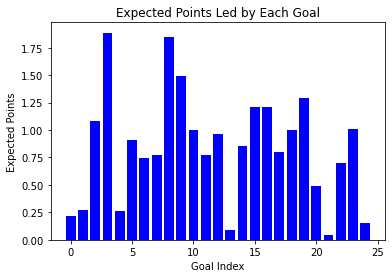

In [7]:
alkidf=cal_exp_win_goal('Mark Robins')

### 모든 득점자와 득점수 추출

In [5]:
all_player_set = set()
all_player_set_c = set()
all_player_scr_dict = {}
for i in match_info_scr['scorer_20']:
    for j in eval(i):
        print(j)
        all_player_set.add(j)
        if all_player_set_c.issubset(all_player_set):
            goal_num = all_player_scr_dict.get(j, 0)
            goal_num += 1
            all_player_scr_dict[j] = goal_num
        else:
            all_player_scr_dict[j] = 1
            all_player_set_c = all_player_set.copy()

            
print(all_player_set)
print(all_player_scr_dict)

Steve Bould
Kevin Campbell
Mark Robins
David Phillips
Ruel Fox
Mark Robins
Mick Harford
Nick Henry
John Williams
David Smith
Paul Wilkinson
Mark Bright
Gareth Southgate
Simon Osborn
Stuart Ripley
Alan Shearer
Alan Shearer
Barry Horne
Nigel Pearson
Gavin Johnson
Dalian Atkinson
Lee Chapman
Lee Chapman
Warren Barton
Brian Deane
Brian Deane
Mark Hughes
Teddy Sheringham
David White
Andy Sinton
Alan Shearer
Gavin Johnson
Dalian Atkinson
Gary Speed
Mark Walters
Paul Stewart
Brian Deane
Peter Beardsley
Robert Warzycha
Mo Johnston
Bernie Slaven
Bernie Slaven
David Phillips
Mark Robins
Graham Stuart
Graeme Sharp
Eddie McGoldrick
Les Ferdinand
David Bardsley
Les Ferdinand
Matthew Le Tissier
David Hirst
David Hirst
John Williams
John Williams
Dalian Atkinson
Micky Adams
Mike Newell
Denis Irwin
Chris Kiwomya
Paul Wilkinson
Paul Wilkinson
Tommy Wright
John Hendrie
Eric Cantona
Ruel Fox
Peter Beardsley
Neil Adams
Graeme Sharp
Nick Henry
Gunnar Halle
Paul Bernard
Stuart Pearce
Gary Bannister
Gary Ban

Hamilton Ricard
Gary Speed
Shola Ameobi
Kieron Dyer
David Thompson
Stanislav Varga
Don Hutchison
Marcus Stewart
James Scowcroft
Gustavo Poyet
Dennis Wise
Gustavo Poyet
Jimmy Floyd Hasselbaink
Marcus Stewart
Lee Carsley
Scot Gemmill
Danny Cadamarteri
Kevin Campbell
Darryl Powell
Steve Howey
Robbie Keane
Nolberto Solano
Clarence Acuna
Shola Ameobi
Gary Neville
Teddy Sheringham
Shaun Bartlett
Paolo Di Canio
Paul Merson
Lee Bowyer
Ian Harte
Ray Parlour
Lauren
!Youl Mawene
Scott Parker
Craig Burley
Gianfranco Zola
Gustavo Poyet
Jesper Grønkjaer
Christian Bassedas
Gary Naysmith
Idan Tal
Hamilton Ricard
Colin Cooper
Robbie Keane
Danny Tiatto
Emile Heskey
Dan Petrescu
Andrew Cole
Darius Vassell
Darius Vassell
Julian Joachim
Dennis Bergkamp
Craig Burley
Mark Venus
!Mark Venus
Robbie Keane
Muzzy Izzet
Gary Rowett
Jimmy Floyd Hasselbaink
Vladimir Smicer
Robbie Fowler
Robbie Fowler
!Steve Watson
Colin Cooper
!Steve Vickers
Duncan Ferguson
Kevin Campbell
Ian Harte
Olivier Dacourt
Thierry Henry
Stev

Sylvain Wiltord
Thierry Henry
Nicolas Anelka
Szilard Nemeth
Massimo Maccarone
Szilard Nemeth
Ulises de la Cruz
Stefan Moore
David Dunn
David Thompson
Jesper Grønkjaer
Gianfranco Zola
Gianfranco Zola
Junichi Inamoto
Steed Malbranque
Sylvain Legwinski
Dean Richards
Teddy Sheringham
Danny Murphy
Steven Gerrard
Clinton Morrison
Clinton Morrison
Kevin Nolan
Mark Viduka
Alan Smith
Marian Pahars
Jason Roberts
Ricardo Gardner
Ivan Campo
Milan Baros
Milan Baros
Emile Heskey
Thierry Henry
Sylvain Wiltord
Edu
Eidur Gudjohnsen
Gianfranco Zola
Eidur Gudjohnsen
Kevin Campbell
Kevin Campbell
Szilard Nemeth
Harry Kewell
Junichi Inamoto
Barry Hayles
Steve Marlet
Sean Gregan
Nicolas Anelka
Shaun Goater
David Thompson
Andrew Cole
Simon Davies
Teddy Sheringham
Anthony Gardner
Frederic Kanoute
Trevor Sinclair
Clinton Morrison
!Peter Enckelman
Geoff Horsfield
Thierry Henry
Kanu
Gareth Farrelly
Milan Baros
John Arne Riise
Ruud van Nistelrooij
Franck Queudrue
Craig Bellamy
Alan Shearer
Lee Hendrie
Lee Hendrie

Colin Cameron
Colin Cameron
Alex Rae
Henri Camara
Les Ferdinand
Les Ferdinand
Riccardo Scimeca
Thierry Henry
Robert Pirès
Tomasz Radzinski
Wayne Rooney
Michael Owen
Steven Gerrard
Shaun Wright-Phillips
Frederic Kanoute
James Beattie
James Beattie
!Anthony Gardner
Louis Saha
Louis Saha
Robbie Keane
Frederic Kanoute
Robbie Keane
Robbie Keane
Stéphane Dalmat
Paul Ince
Alex Rae
!Ben Thatcher
Juan Pablo Ángel
Juan Pablo Ángel
Muzzy Izzet
Kevin Davies
Alex Rae
Robert Pirès
Dennis Bergkamp
Ivan Campo
Collins John
Collins John
Luís Boa Morte
Andrew Cole
Jonathan Douglas
Lorenzo Amoruso
Jon Stead
James Beattie
Lee Bowyer
Ioan Viorel Ganea
Juan Pablo Ángel
Kevin Nolan
Roy Keane
Craig Bellamy
Alan Shearer
Boudewijn Zenden
David Unsworth
!John O'Shea
Kevin Kilbane
Louis Saha
Ruud van Nistelrooij
Louis Saha
Ruud van Nistelrooij
Joseph-Desire Job
Steed Malbranque
Brian McBride
Robbie Keane
Michael Owen
Juan Sebastián Verón
Jimmy Floyd Hasselbaink
Gary Naysmith
David Unsworth
Steve Watson
Barry Hayle

Charles N'Zogbia
Gary Speed
Henri Camara
Yakubu
Sol Campbell
Sol Campbell
!Stephen Warnock
Walter Pandiani
Luis Garcia
Djibril Cissé
Kevin Nolan
Frank Lampard
Frank Lampard
Luke Moore
Damien Francis
Ruud van Nistelrooij
Morten Pedersen
Morten Pedersen
Michael Owen
Curtis Davies
Danny Murphy
Danny Murphy
Tommy Miller
Julio Arca
Jermain Defoe
Shefki Kuqi
Shefki Kuqi
Darren Bent
Darren Bent
Ledley King
Mido
Robbie Keane
Collins John
Claus Jensen
Ruud van Nistelrooij
Wayne Rooney
Ruud van Nistelrooij
Tommy Miller
Yossi Benayoun
!Stephen Clemence
Luke Moore
Steven Davis
Yakubu
George Boateng
Yakubu
Steven Gerrard
Frank Lampard
Damien Duff
Joe Cole
Geremi
Danny Mills
Darius Vassell
Henri Camara
Lee McCulloch
Radhi Jaidi
Didier Drogba
Frank Lampard
Frank Lampard
Didier Drogba
Eidur Gudjohnsen
Stelios Giannakopoulos
Djibril Cissé
Yakubu
Gary O'Neil
Stephen Elliott
Wayne Rooney
Ruud van Nistelrooij
Giuseppe Rossi
Mido
Jermaine Jenas
Kanu
Darren Carter
Philippe Senderos
Jason Roberts
Kevin Phill

Noé Pamarot
Robert Hulse
Andrew Johnson
James McFadden
Emile Heskey
Emile Heskey
Frank Lampard
Salomon Kalou
Arjen Robben
Benni McCarthy
!Peter Ramage
Nicolas Anelka
Kieron Dyer
Didier Drogba
Didier Drogba
Leroy Lita
!Michael Essien
Cristiano Ronaldo
Cristiano Ronaldo
Ole Gunnar Solskjaer
Leighton Baines
Stephen Ireland
Jermain Defoe
Jermain Defoe
Gareth Barry
Tommy Smith
Gilberto Silva
Robin van Persie
Teddy Sheringham
Linvoy Primus
Linvoy Primus
Darren Ambrose
Darren Bent
Brian McBride
Franck Queudrue
Shabani Nonda
Benni McCarthy
Yakubu
Abdoulaye Diagne-Faye
Ivan Campo
Nicolas Anelka
Matthew Taylor
Andrew Cole
Darren Bent
Bryan Hughes
Gareth Barry
!Liam Rosenior
Didier Drogba
Moritz Volz
Carlos Bocanegra
Victor Anichebe
Victor Anichebe
Phil Neville
Ole Gunnar Solskjaer
Cristiano Ronaldo
Cristiano Ronaldo
Ibrahima Sonko
Leroy Lita
Christian Nade
Luis Garcia
DaMarcus Beasley
Peter Crouch
Steven Gerrard
Dirk Kuijt
Georgios Samaras
Georgios Samaras
Leon Osman
Mark Viduka
Yakubu
Yakubu
Ph

Yakubu
Gary O'Neil
Daniel Cousin
Geovanni
Stephen Ireland
Stephen Ireland
Stephen Ireland
Robinho
Daniel Sturridge
Emanuel Pogatetz
Kevin Davies
Matthew Taylor
Johan Elmander
Peter Crouch
Glen Johnson
Michael Turner
Dean Windass
Mamady Sidibe
Valon Behrami
Roman Pavlyuchenko
Henri Camara
Ricardo Fuller
Marlon King
Djibril Cissé
Matthew Taylor
Gary Cahill
Johan Elmander
Johan Elmander
Henri Camara
Emmerson Boyce
Ishmael Miller
!Johan Djourou
Robin van Persie
Robin van Persie
Wayne Rooney
Peter Crouch
Jermain Defoe
Sean Davis
Matt Derbyshire
Tugay
!Vedran Corluka
Emmanuel Adebayor
Roque Santa Cruz
Xabi Alonso
Yossi Benayoun
Steven Gerrard
Nicolas Anelka
Deco
Jimmy Bullard
Benjani
!Ross Turnbull
Marlon King
Tuncay Sanli
Nemanja Vidic
Michael Owen
Michael Owen
Mamady Sidibe
Abdoulaye Diagne-Faye
Joleon Lescott
Joleon Lescott
Steve Sidwell
Ashley Young
Ashley Young
Jonathan Greening
Peter Crouch
Ledley King
Jamie O'Hara
Gabriel Agbonlahor
!Kevin Davies
Gabriel Agbonlahor
Ashley Young
Johan 

Michael Brown
Kevin Doyle
Tom Huddlestone
Clint Dempsey
!Carlton Cole
Stefano Okaka
Carlton Cole
Guillermo Franco
Didier Drogba
Frank Lampard
Nani
David Dunn
Christopher Samba
Robin van Persie
Victor Moses
Steve Gohouri
Will Atkinson
Mark Cullen
Matthew Etherington
Peter Crouch
Andrey Arshavin
Robin van Persie
!Chris Baird
Carlos Vela
!Richard Dunne
Kevin Davies
Ivan Klasnic
James McFadden
Wade Elliott
Jack Cork
Martin Paterson
Steven Thompson
Gareth Bale
Luka Modric
Nicolas Anelka
Frank Lampard
Salomon Kalou
Nicolas Anelka
Didier Drogba
Didier Drogba
Didier Drogba
Ashley Cole
Diniyar Bilyaletdinov
Darren Fletcher
Ryan Giggs
!Danny Higginbotham
Park Ji-Sung
Luís Boa Morte
Shaun Wright-Phillips
Kevin Doyle
Adlène Guédioura
Kenwyne Jones
Stewart Downing
Stiliyan Petrov
James Milner
Nikola Kalinic
Florent Malouda
Didier Drogba
Didier Drogba
Frank Lampard
Didier Drogba
Florent Malouda
Darren Bent
!Stephen Carr
Scott Dann
Liam Ridgewell
Gary Taylor-Fletcher
Marlon Harewood
Marlon Harewood
A

Demba Ba
Robin van Persie
Thomas Vermaelen
Mikel Arteta
Darren Bent
Gabriel Agbonlahor
Darren Bent
Anthony Pilkington
Steve Morison
Frank Lampard
!Wes Brown
!John Heitinga
Ryan Taylor
Jack Rodwell
Jay Bothroyd
Heidar Helguson
Edin Dzeko
David Silva
Yaya Touré
Kevin Davies
Chris Eagles
Ivan Klasnic
Chris Eagles
Ivan Klasnic
!Younes Kaboul
!Chris Baird
Aaron Lennon
Jermain Defoe
Jamie O'Hara
David Edwards
Stephen Ward
Ben Watson
Phil Jagielka
Leighton Baines
Stephen Hunt
Mario Balotelli
Micah Richards
Sergio Agüero
Dan Gosling
Steve Morison
Robin van Persie
Robin van Persie
Jonathan Walters
Ryan Shawcross
Heidar Helguson
Luke Young
Heidar Helguson
Chicharito
Jerome Thomas
Shane Long
Ivan Klasnic
Jordi Gómez
Gary Caldwell
Albert Crusat
Yakubu
Junior Hoilett
Yakubu
Daniel Sturridge
Maxi Rodríguez
Glen Johnson
Emmanuel Adebayor
Emmanuel Adebayor
Thomas Vermaelen
!Thomas Vermaelen
Marouane Fellaini
Apostolos Vellios
John Terry
Daniel Sturridge
Juan Mata
Chicharito
Demba Ba
Russell Martin
Gra

Oscar
Eden Hazard
Clint Dempsey
Jermain Defoe
Gareth Bale
Samir Nasri
Robin van Persie
Robin van Persie
Robin van Persie
Steven Pienaar
Sergio Agüero
Yaya Touré
Andy Carroll
Daniel Agger
Jordan Henderson
Daniel Sturridge
Daniel Sturridge
Fabio Borini
Jordan Henderson
Marc-Antoine Fortuné
Romelu Lukaku
Shane Long
Charlie Adam
Emmerson Boyce
Callum McManaman
Gareth Bale
!Emmerson Boyce
Theo Walcott
Robin van Persie
Oscar
Frank Lampard
Ron Vlaar
Andreas Weimann
Christian Benteke
Christian Benteke
Christian Benteke
Gabriel Agbonlahor
Danny Rose
Bryan Ruiz
Bryan Ruiz
Hal Robson-Kanu
Hal Robson-Kanu
Adam Le Fondre
Jem Karacan
Grant Holt
Gabriel Agbonlahor
Gabriel Agbonlahor
Theo Walcott
Gareth Bale
Shane Long
Gareth McAuley
Arouna Koné
James McArthur
Callum McManaman
Juan Mata
John O'Shea
Jonathan Walters
Edin Dzeko
Roger Espinoza
James McCarthy
Angel Rangel
Itay Shechter
Dwight Tiendalli
Oscar
Ramires
Emmanuel Adebayor
Gylfi Sigurdsson
Christian Benteke
Frank Lampard
Frank Lampard
Kevin Mir

Adam Lallana
!Jonjo Shelvey
Gylfi Sigurdsson
Ahmed El Mohamady
Nikica Jelavic
Steven Gerrard
Steven Gerrard
David Nugent
Jeffrey Schlupp
Yaya Touré
Stevan Jovetic
Frank Lampard
Jack Rodwell
Adam Johnson
Steven Taylor
Jack Colback
Moussa Sissoko
!Paul Dummett
Danny Ings
George Boyd
Leroy Fer
Wilfried Bony
Sadio Mané
Dusan Tadic
Ryan Shawcross
Radamel Falcao
Harry Kane
Danny Rose
Andros Townsend
Harry Kane
Nacer Chadli
Diego Costa
Eden Hazard
John Terry
Diafra Sakho
Saido Berahino
Scott Arfield
Danny Ings
Charlie Austin
Oscar
Diego Costa
Dwight Gayle
Jason Puncheon
Harry Kane
Steven Naismith
Fernandinho
Paul Konchesky
Lazar Markovic
!Mark Noble
Andy Carroll
Saido Berahino
Laurent Koscielny
Alexis Sánchez
Alexis Sánchez
Dusan Tadic
Fabio Borini
Rickie Lambert
Ben Mee
Danny Ings
Dwight Gayle
Jason Puncheon
Dwight Gayle
Bojan
Yoan Gouffran
Eljero Elia
Eljero Elia
Marouane Fellaini
James Wilson
Oscar
Diego Costa
Diego Costa
Oscar
André Schürrle
!John O'Shea
Christian Eriksen
Sebastian Larsso

Aaron Lennon
Dele Alli
!Wayne Hennessey
Harry Arter
Dimitri Payet
Enner Valencia
Enner Valencia
Georginio Wijnaldum
Aleksandar Mitrovic
Paul Dummett
Wayne Rooney
Jesse Lingard
Wayne Rooney
César Azpilicueta
!Gareth McAuley
Craig Gardner
James McClean
Roberto Firmino
Roberto Firmino
Joe Allen
Aaron Ramsey
Olivier Giroud
Olivier Giroud
Shane Long
Dusan Tadic
Jonathan Walters
Joselu
!Ryan Bennett
Jonny Howson
Gylfi Sigurdsson
André Ayew
Jermain Defoe
!Federico Fernández
Jermain Defoe
Jermain Defoe
Robert Huth
Rudy Gestede
Shinji Okazaki
Dan Gosling
Charlie Daniels
Benik Afobe
Diego Costa
Cesc Fàbregas
John Terry
!John Terry
Kevin Mirallas
Ramiro Funes Mori
Fabian Delph
Sergio Agüero
Sergio Agüero
David Silva
Ayoze Pérez
Georginio Wijnaldum
Nikica Jelavic
James Ward-Prowse
James Ward-Prowse
Dusan Tadic
Christian Eriksen
Mousa Dembélé
Christian Eriksen
Harry Kane
Patrick van Aanholt
Wayne Rooney
Ashley Williams
!Jan Vertonghen
Harry Kane
Dele Alli
Nacer Chadli
Danny Drinkwater
Jamie Vardy
L

Jermain Defoe
Wilfred Ndidi
Riyad Mahrez
Marc Albrighton
David Silva
Vincent Kompany
Kevin De Bruyne
Raheem Sterling
Nicolás Otamendi
Fernando Llorente
Manuel Lanzini
Junior Stanislas
Joshua King
Sam Vokes
Wilfried Zaha
Christian Benteke
Luka Milivojevic
Patrick van Aanholt
Ross Barkley
David Silva
Gabriel Jesus
Shinji Okazaki
Patrick Bamford
Jay Rodríguez
Nathan Redmond
Peter Crouch
Olivier Giroud
Mesut Özil
Alexis Sánchez
Olivier Giroud
Fernando Llorente
Kyle Naughton
Victor Wanyama
Harry Kane
Wayne Rooney
Michy Batshuayi
Daniel Sturridge
Philippe Coutinho
Philippe Coutinho
Divock Origi
Héctor Bellerín
Alexis Sánchez
Aaron Ramsey
Romelu Lukaku
Sam Vokes
Sofiane Feghouli
André Ayew
Willian
Eden Hazard
Pedro
Michy Batshuayi
Michy Batshuayi
Javier Manquillo
Sam Clucas
Harry Kane
Harry Kane
Dele Alli
Victor Wanyama
Harry Kane
Ben Davies
Toby Alderweireld
Jamie Vardy
Junior Stanislas
Georginio Wijnaldum
Philippe Coutinho
Adam Lallana
Josh Harrop
Paul Pogba
Peter Crouch
Jordan Ayew
Fernand

Leroy Sané
Riyad Mahrez
Lucas Pérez
Lucas Pérez
Michail Antonio
Josh Murphy
Raúl Jiménez
Diogo Jota
Ruben Loftus-Cheek
Richarlison
Salomón Rondón
Harry Kane
Lucas Moura
Son Heung-Min
Charlie Austin
Lucas Torreira
Mohamed Salah
Mohamed Salah
!Steve Cook
Mohamed Salah
James Tarkowski
Callum Paterson
N'Golo Kanté
David Luiz
Richarlison
Lucas Digne
!Séamus Coleman
Abdoulaye Doucouré
Son Heung-Min
Dele Alli
Ashley Young
Juan Mata
Romelu Lukaku
Marcus Rashford
Aboubakar Kamara
Ayoze Pérez
Diogo Jota
Matt Doherty
Robert Snodgrass
Chicharito
Felipe Anderson
James McArthur
Jeffrey Schlupp
Solly March
Pedro
Eden Hazard
Luka Milivojevic
Robert Snodgrass
Michail Antonio
Salomón Rondón
Sadio Mané
Xherdan Shaqiri
Xherdan Shaqiri
Jesse Lingard
Gabriel Jesus
Gabriel Jesus
Raheem Sterling
Dominic Calvert-Lewin
Danny Ings
Danny Ings
Charlie Austin
Henrikh Mkhitaryan
Henrikh Mkhitaryan
Christian Eriksen
Gerard Deulofeu
José Holebas
Domingos Quina
Junior Hoilett
Bobby De Cordova-Reid
Raúl Jiménez
Ivan Cav

Raheem Sterling
Kevin De Bruyne
Phil Foden
Jamal Lewis
Steven Bergwijn
Sèrge Aurier
Matt Doherty
Diogo Jota
Raúl Jiménez
Ismaïla Sarr
Ismaïla Sarr
Troy Deeney
Jarrod Bowen
Sébastien Haller
Michail Antonio
Michael Obafemi
Alexandre Lacazette
Chris Wood
Dele Alli
Mason Mount
Pedro
Willian
Olivier Giroud
Jordan Ayew
Harvey Barnes
Jamie Vardy
Jamie Vardy
Harvey Barnes
Mohamed Salah
Sadio Mané
Callum Wilson
Anthony Martial
Scott McTominay
Billy Sharp
Allan Saint-Maximin
Kortney Hause
Christian Pulisic
Olivier Giroud
Luka Milivojevic
Jordan Ayew
Lewis Dunk
Neal Maupay
Nicolas Pépé
Phil Foden
Riyad Mahrez
Riyad Mahrez
David Silva
Phil Foden
Allan Saint-Maximin
Matt Ritchie
Joelinton
Danny Ings
Stuart Armstrong
Nathan Redmond
Steven Bergwijn
Bruno Fernandes
Craig Dawson
Ben Chilwell
Raúl Jiménez
Pedro Neto
Jay Rodríguez
Christian Pulisic
Willian
Kevin De Bruyne
Trent Alexander-Arnold
Mohamed Salah
Fabinho
Sadio Mané
Anthony Martial
Anthony Martial
Anthony Martial
Dwight Gayle
Ahmed El Mohamady

Romelu Lukaku
Reece James
Danny Ings
Anwar El Ghazi
Shane Duffy
Neal Maupay
Mateusz Klich
Raphinha
Dominic Calvert-Lewin
Demarai Gray
Diogo Jota
Sadio Mané
!Tim Krul
Jack Grealish
Aymeric Laporte
Raheem Sterling
Riyad Mahrez
! Fred
Mason Greenwood
Pablo Fornals
Saïd Benrahma
Michail Antonio
Michail Antonio
Youri Tielemans
Dele Alli
Emiliano Buendía
Ivan Toney
Demarai Gray
Dominic Calvert-Lewin
Chris Wood
Patrick Bamford
Mohamed Salah
Kai Havertz
Ilkay Gündogan
Ferran Torres
Gabriel Jesus
Rodri
Ferran Torres
Callum Wilson
Allan Saint-Maximin
Mohamed Elyounoussi
James Ward-Prowse
Teemu Pukki
Jamie Vardy
Marc Albrighton
Son Heung-Min
Pablo Fornals
Michail Antonio
Conor Gallagher
Conor Gallagher
Mason Greenwood
Pierre-Emerick Aubameyang
Leandro Trossard
Romelu Lukaku
Mateo Kovacic
Romelu Lukaku
Wilfried Zaha
Odsonne Édouard
Odsonne Édouard
Michael Keane
Andros Townsend
Demarai Gray
Ben Mee
Mohamed Salah
Fabinho
Sadio Mané
Bernardo Silva
Cristiano Ronaldo
Cristiano Ronaldo
Bruno Fernandes
J

Carlos Alcaraz
Adama Traoré
Philip Billing
Erling Haaland
Dwight McNeil
Gabriel Magalhães
Gabriel Martinelli
Martin Ødegaard
Patrick Bamford
Jack Harrison
Alexis Mac Allister
Solly March
Patson Daka
Ben Chilwell
Kai Havertz
Mateo Kovacic
Alexander Isak
Miguel Almirón
Hwang Hee-Chan
Harry Kane
Harry Kane
Son Heung-Min
Joe Worrall
Saïd Benrahma
Ollie Watkins
Gabriel Martinelli
Bukayo Saka
Granit Xhaka
Bukayo Saka
Jeffrey Schlupp
Douglas Luiz
Jacob Ramsey
Emiliano Buendía
Mathias Jensen
Harvey Barnes
Alexis Mac Allister
João Félix
Kai Havertz
Abdoulaye Doucouré
Ellis Simms
Mohamed Salah
Nathan Aké
Erling Haaland
Phil Foden
Emmanuel Dennis
Alexander Isak
Alexander Isak
Ché Adams
Theo Walcott
James Ward-Prowse
Pedro Porro
Harry Kane
Ivan Perisic
Jonny Otto
Matheus Cunha
Jack Harrison
Luke Ayling
Rasmus Kristensen
Rodrigo
Gabriel Jesus
Ben White
Gabriel Jesus
Granit Xhaka
Rasmus Kristensen
Marcus Tavernier
Dominic Solanke
Andreas Pereira
Kaoru Mitoma
Danny Welbeck
Alexis Mac Allister
Pontus 

### 50골 이상 넣은 선수의 골 수와 기대승점 csv파일로 저장

In [6]:
scr_over_230_dict = {}
for k,v in all_player_scr_dict.items():
    if int(v) >= 230:
        scr_over_230_dict[k] = v

In [7]:
scr_over_180_dict = {}
for k,v in all_player_scr_dict.items():
    if int(v) >= 180 and (int(v) < 230):
        scr_over_180_dict[k] = v

In [8]:
scr_over_150_dict = {}
for k,v in all_player_scr_dict.items():
    if (int(v) >= 150) and (int(v) < 180):
        scr_over_150_dict[k] = v

In [9]:
scr_over_120_dict = {}
for k,v in all_player_scr_dict.items():
    if int(v) >= 120 and (int(v) < 150):
        scr_over_120_dict[k] = v

In [10]:
scr_over_100_dict = {}
for k,v in all_player_scr_dict.items():
    if int(v) >= 100  and (int(v) < 120):
        scr_over_100_dict[k] = v

Darwin Núñez


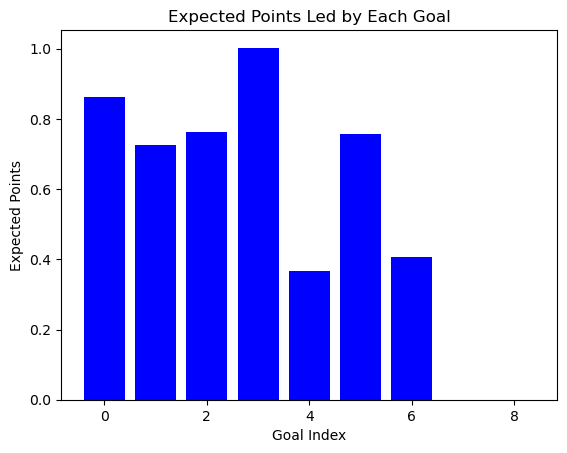

Cody Gakpo


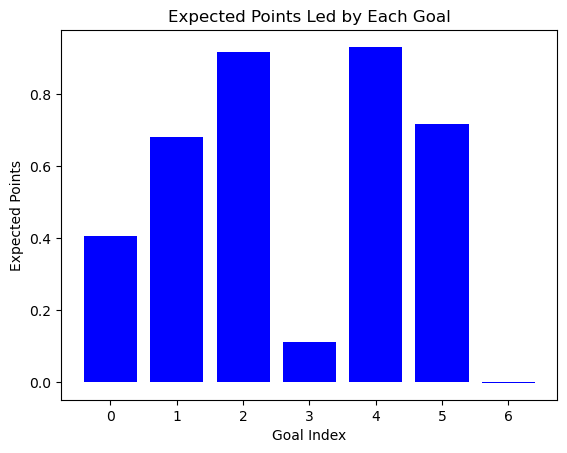

In [18]:
sample = {'Darwin Núñez':9, 'Cody Gakpo':7}

import csv
scr_over_example_points_dict={}
for k,v in sample.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_example_points_dict[k] = lst[k]

    with open('scr_over_exam.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_example_points_dict.items():
            w.writerow([k1,v1])
        #w.writerow(scr_over_example_points_dict.values())

In [11]:
scr_over_example_points_dict

{'Darwin Núñez': [4.888, 9]}

In [43]:
scr_over_230_dict

{'Alan Shearer': 260}

Alan Shearer


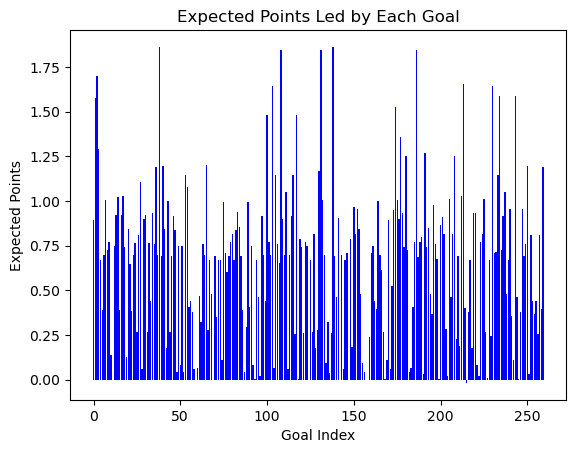

In [44]:
import csv
scr_over_230_points_dict={}
for k,v in scr_over_230_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_230_points_dict[k] = lst[k]

with open('scr_over_230.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_230_points_dict.items():
            w.writerow([k1,v1])

In [45]:
scr_over_230_points_dict

{'Alan Shearer': [169.36300000000008, 260]}

In [46]:
scr_over_180_dict

{'Andrew Cole': 187,
 'Wayne Rooney': 208,
 'Sergio Agüero': 184,
 'Harry Kane': 213}

Andrew Cole


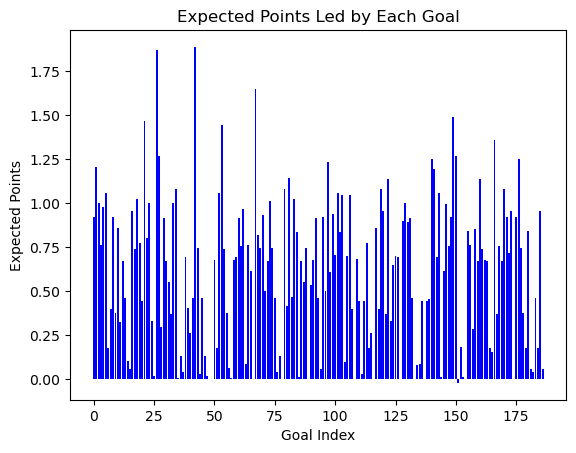

Wayne Rooney


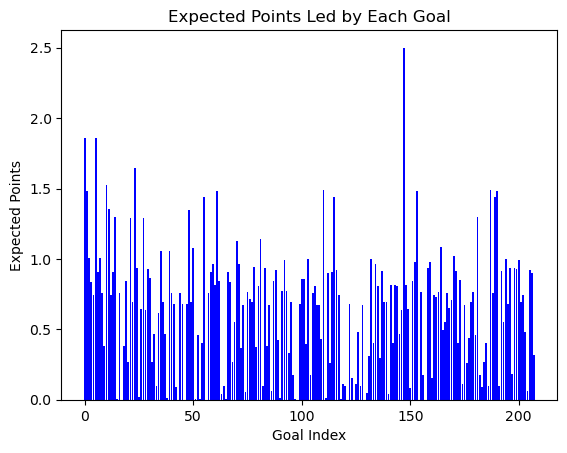

Sergio Agüero


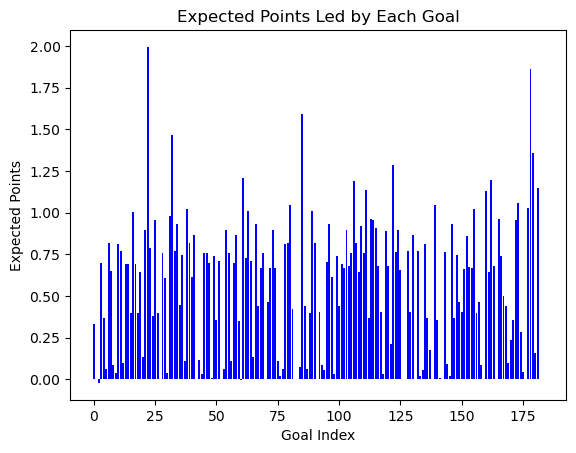

Harry Kane


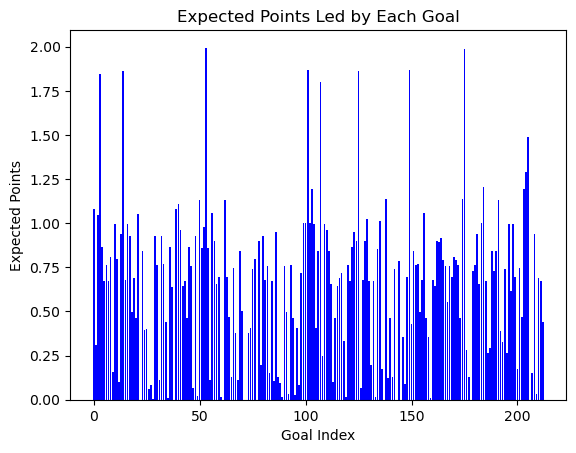

In [47]:
import csv
scr_over_180_points_dict={}
for k,v in scr_over_180_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_180_points_dict[k] = lst[k]
    
    with open('scr_over_180.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_180_points_dict.items():
            w.writerow([k1,v1])

In [48]:
scr_over_180_points_dict

{'Andrew Cole': [114.39500000000004, 187],
 'Wayne Rooney': [135.6820000000001, 208],
 'Sergio Agüero': [101.79600000000013, 184],
 'Harry Kane': [137.56200000000007, 213]}

In [49]:
scr_over_150_dict

{'Robbie Fowler': 163,
 'Michael Owen': 150,
 'Frank Lampard': 177,
 'Thierry Henry': 175,
 'Jermain Defoe': 162}

Robbie Fowler


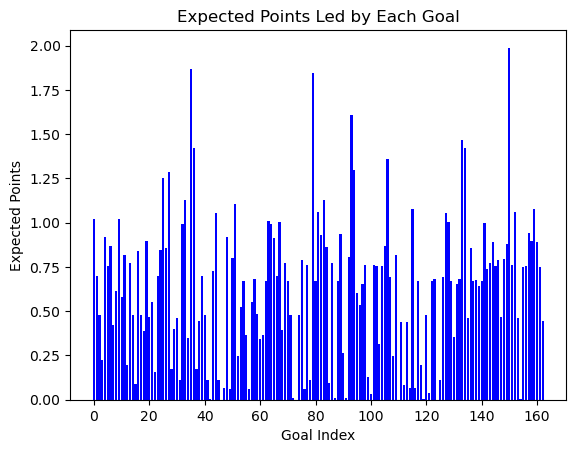

Michael Owen


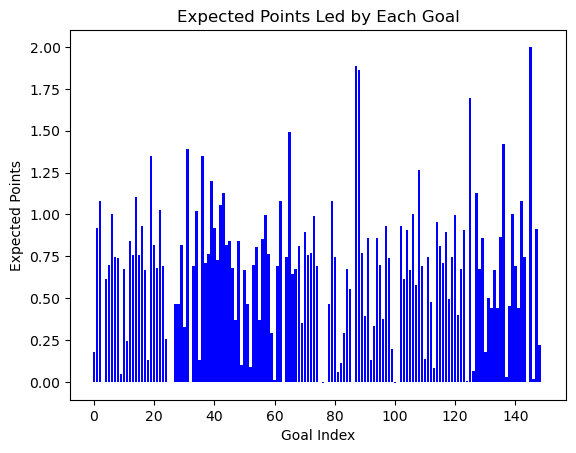

Frank Lampard


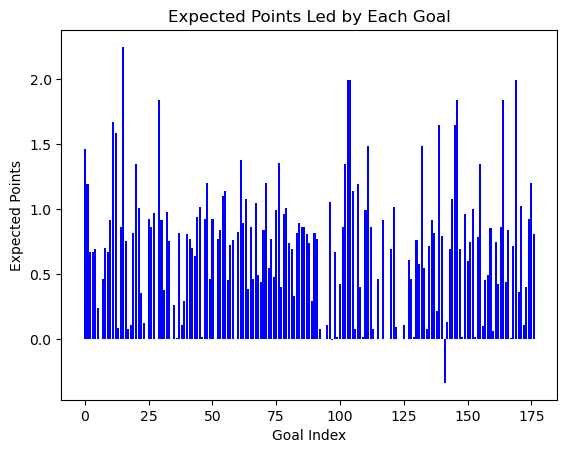

Thierry Henry


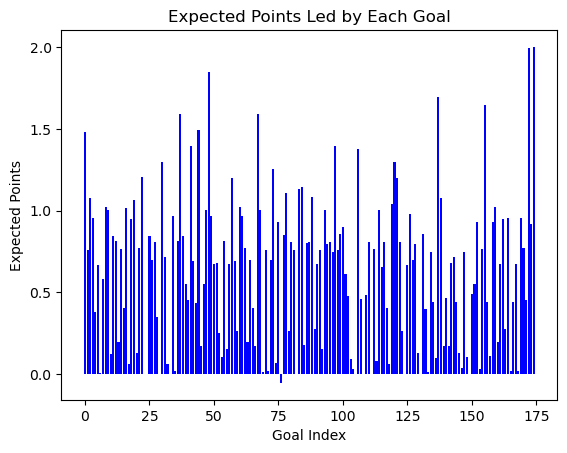

Jermain Defoe


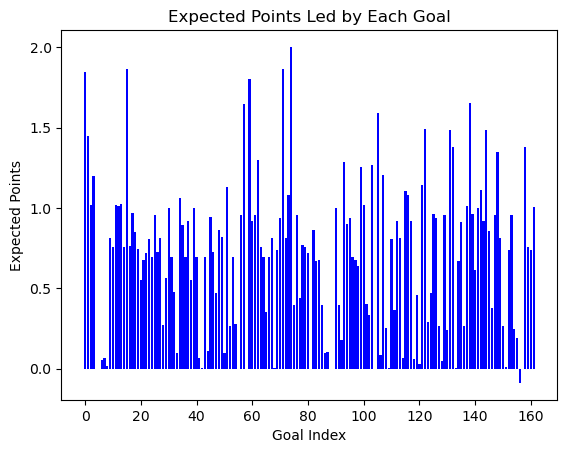

In [50]:
import csv
scr_over_150_points_dict={}
for k,v in scr_over_150_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_150_points_dict[k] = lst[k]

    with open('scr_over_150.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_150_points_dict.items():
            w.writerow([k1,v1])

In [51]:
scr_over_150_points_dict

{'Robbie Fowler': [103.57299999999998, 163],
 'Michael Owen': [96.63500000000006, 150],
 'Frank Lampard': [121.12800000000006, 177],
 'Thierry Henry': [112.11300000000008, 175],
 'Jermain Defoe': [114.96700000000006, 162]}

In [11]:
scr_over_120_dict

{'Teddy Sheringham': 146,
 'Les Ferdinand': 149,
 'Dwight Yorke': 123,
 'Jimmy Floyd Hasselbaink': 127,
 'Nicolas Anelka': 125,
 'Robbie Keane': 125,
 'Steven Gerrard': 120,
 'Robin van Persie': 144,
 'Romelu Lukaku': 121,
 'Mohamed Salah': 139,
 'Jamie Vardy': 136}

Teddy Sheringham


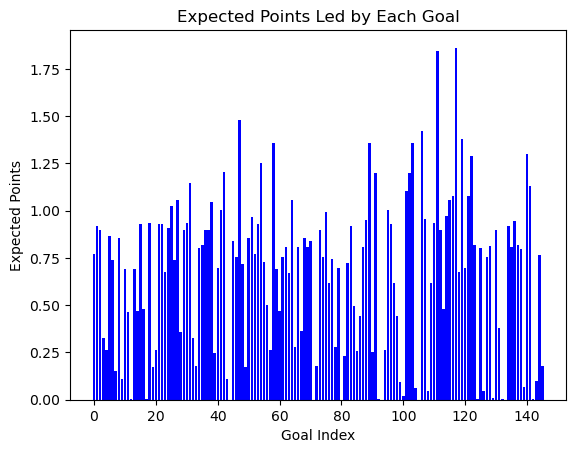

Les Ferdinand


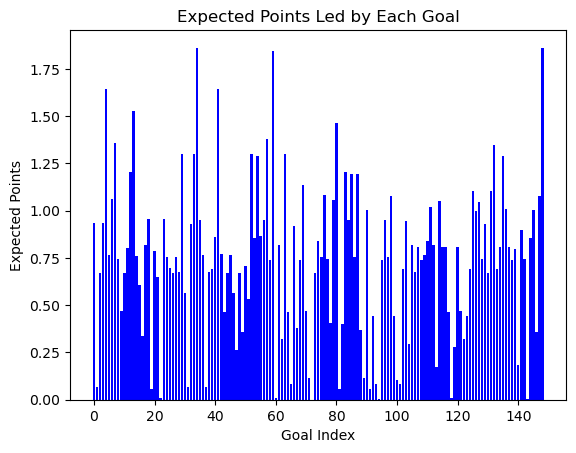

Dwight Yorke


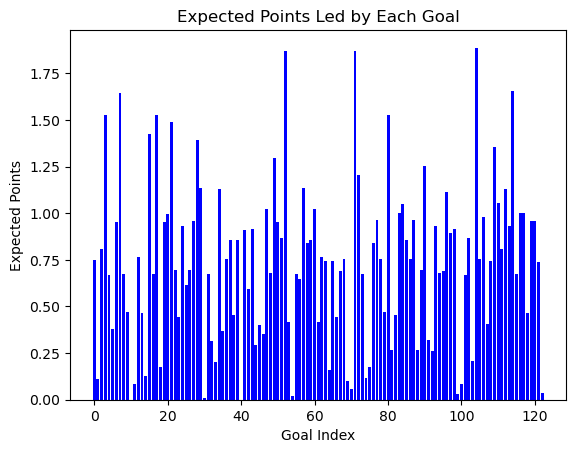

Jimmy Floyd Hasselbaink


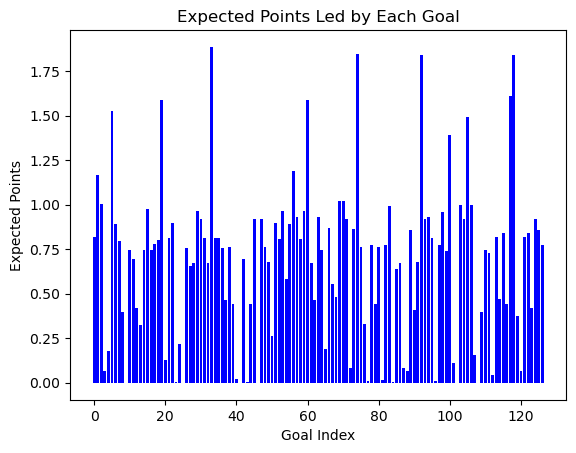

Nicolas Anelka


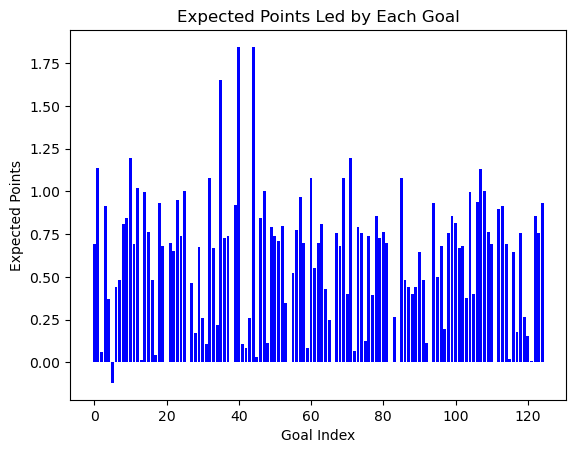

Robbie Keane


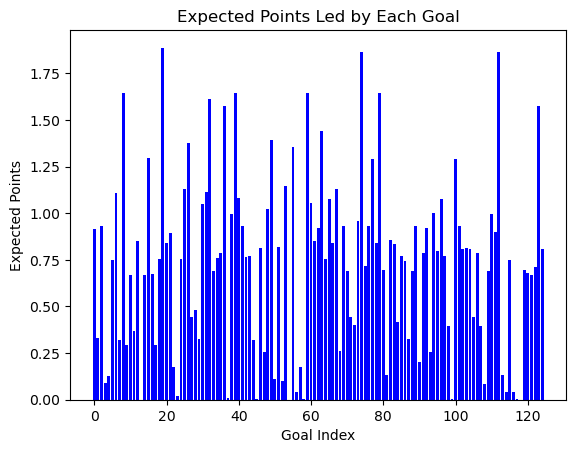

Steven Gerrard


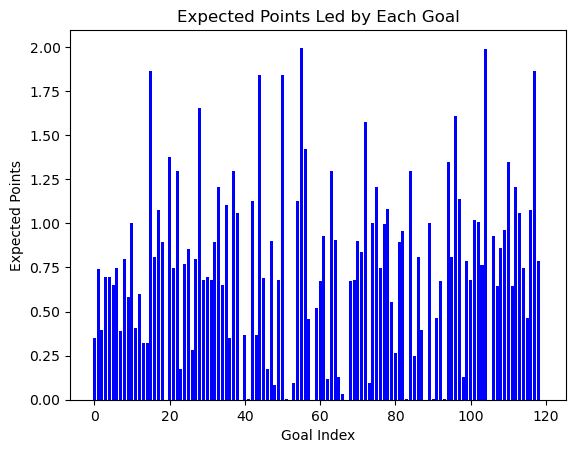

Robin van Persie


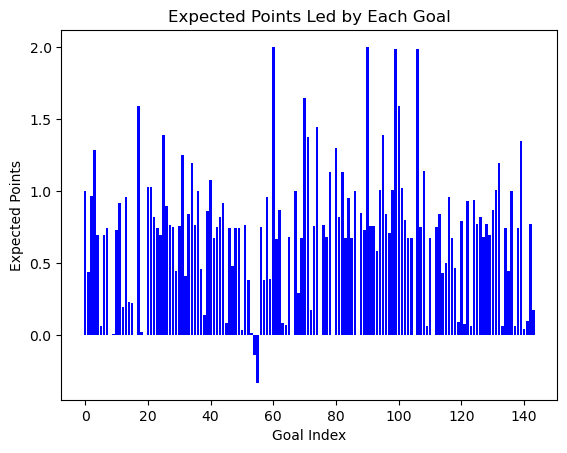

Romelu Lukaku


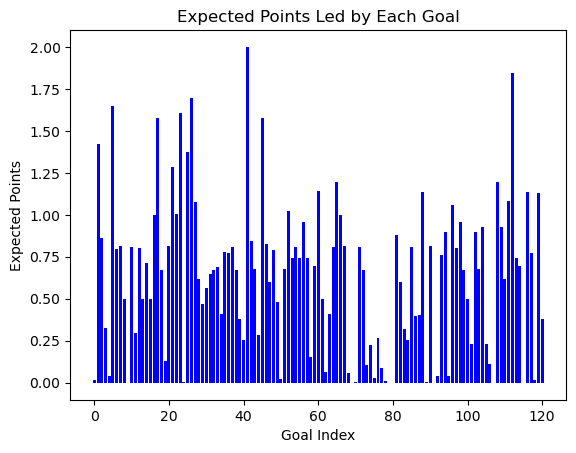

Mohamed Salah


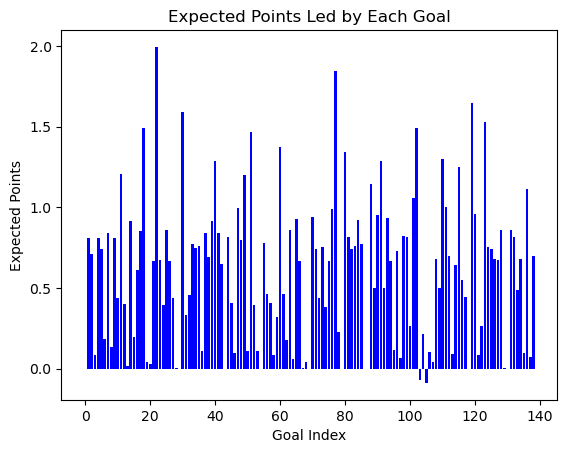

Jamie Vardy


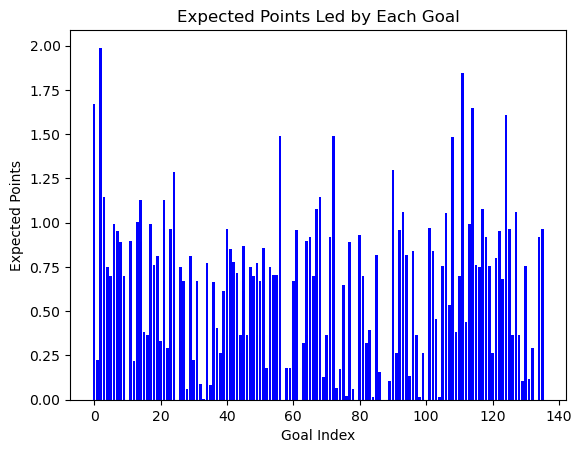

In [12]:
import csv
scr_over_120_points_dict={}
for k,v in scr_over_120_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_120_points_dict[k] = lst[k]

    with open('scr_over_120.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_120_points_dict.items():
            w.writerow([k1,v1])

In [13]:
scr_over_120_points_dict

{'Teddy Sheringham': [98.342, 146],
 'Les Ferdinand': [110.578, 149],
 'Dwight Yorke': [91.152, 123],
 'Jimmy Floyd Hasselbaink': [87.37499999999999, 127],
 'Nicolas Anelka': [74.34399999999997, 125],
 'Robbie Keane': [91.96600000000001, 125],
 'Steven Gerrard': [88.92800000000001, 120],
 'Robin van Persie': [99.71399999999998, 144],
 'Romelu Lukaku': [77.77600000000005, 121],
 'Mohamed Salah': [84.146, 139],
 'Jamie Vardy': [87.03700000000005, 136]}

In [14]:
scr_over_100_dict

{'Matthew Le Tissier': 100,
 'Ian Wright': 113,
 'Dion Dublin': 111,
 'Ryan Giggs': 109,
 'Paul Scholes': 106,
 'Emile Heskey': 110,
 'Peter Crouch': 108,
 'Darren Bent': 106,
 'Cristiano Ronaldo': 103,
 'Didier Drogba': 104,
 'Raheem Sterling': 115,
 'Sadio Mané': 111,
 'Son Heung-Min': 103}

Matthew Le Tissier


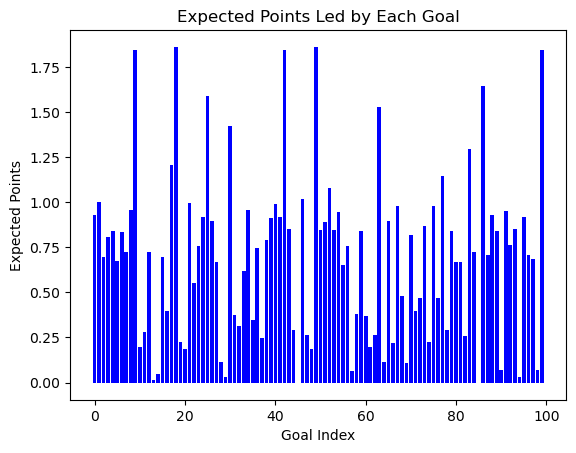

Ian Wright


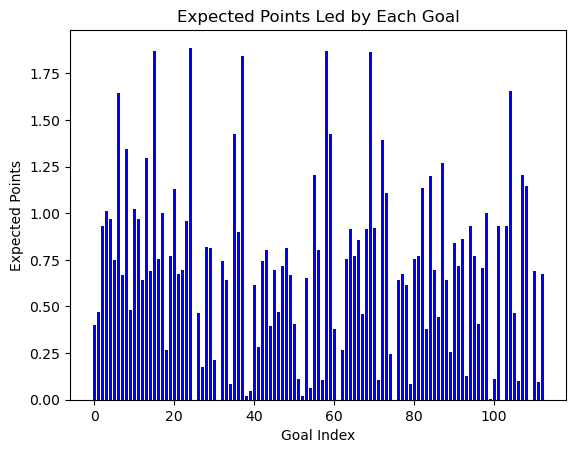

Dion Dublin


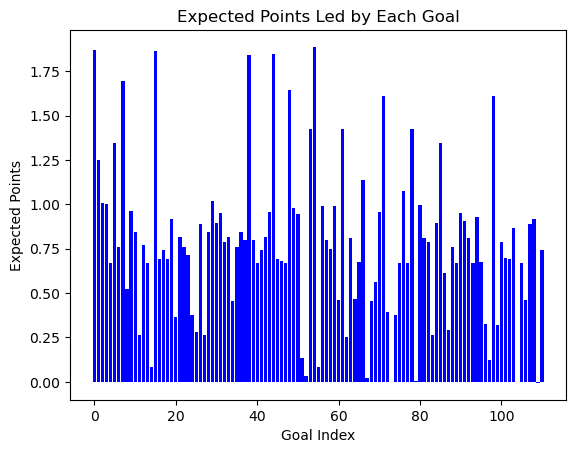

Ryan Giggs


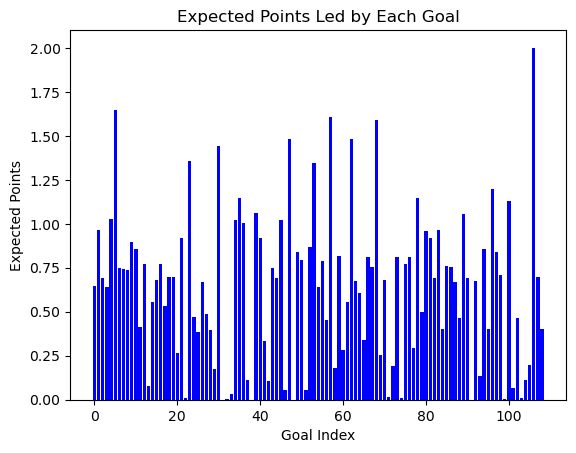

Paul Scholes


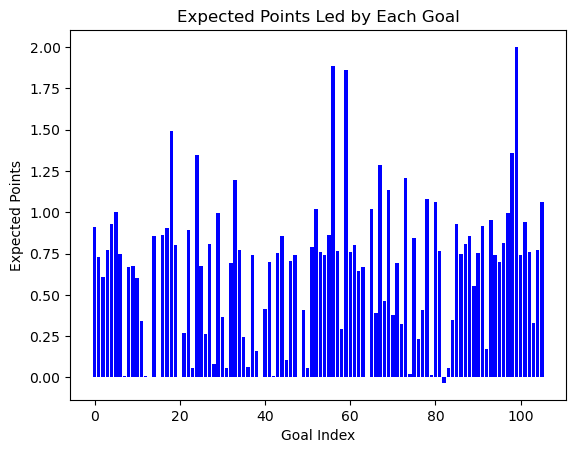

Emile Heskey


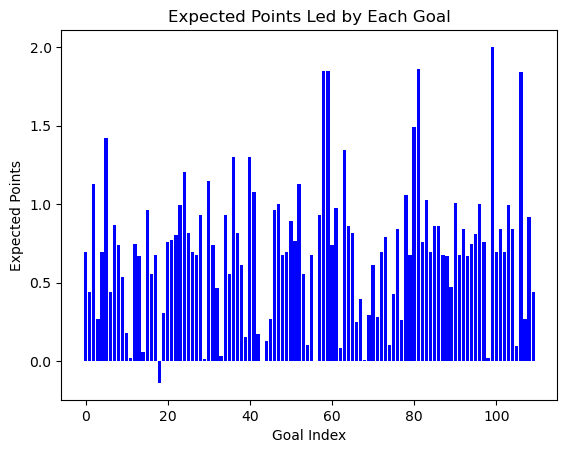

Peter Crouch


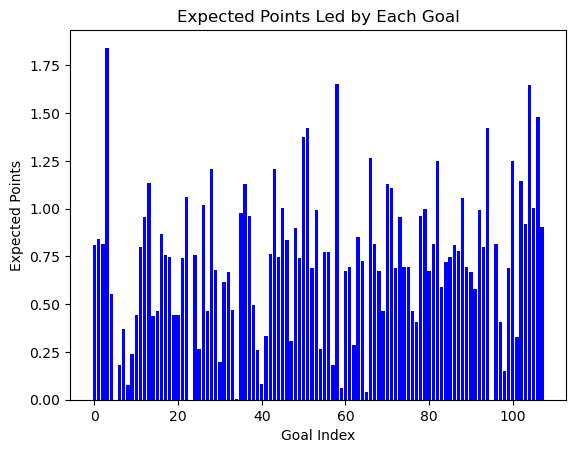

Darren Bent


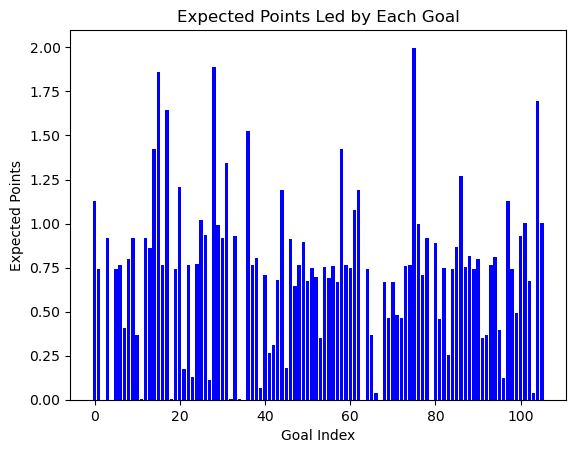

Cristiano Ronaldo


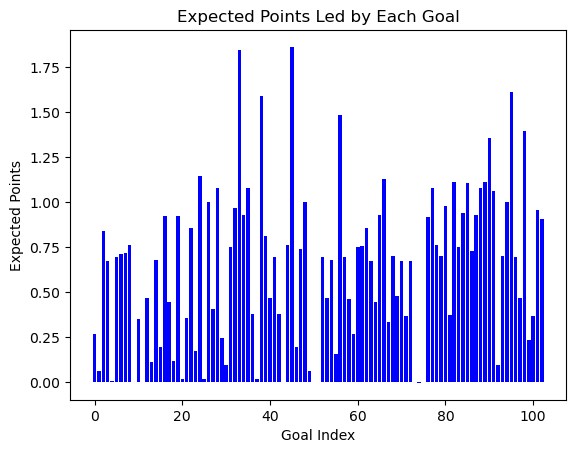

Didier Drogba


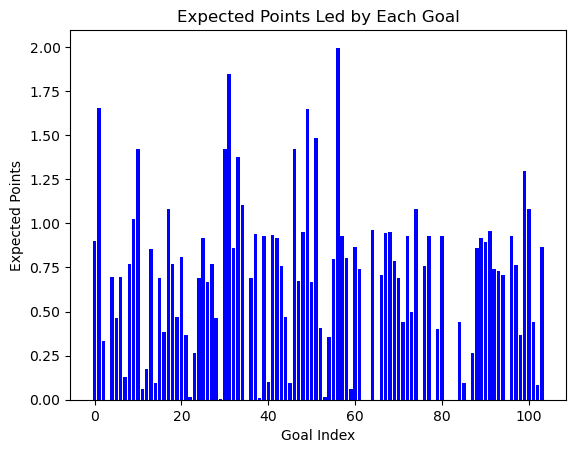

Raheem Sterling


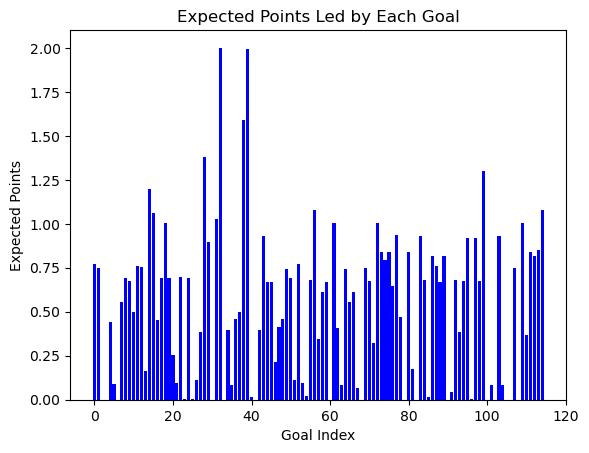

Sadio Mané


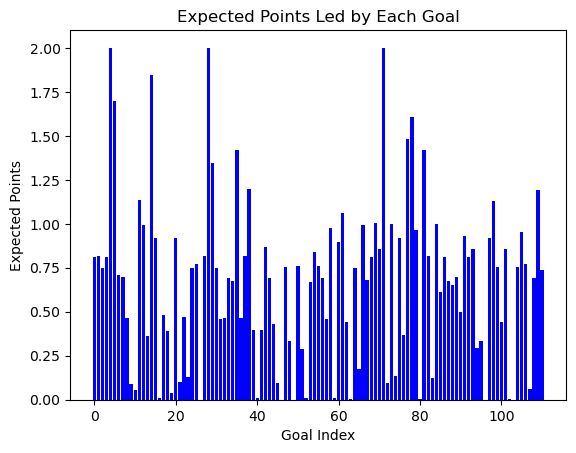

Son Heung-Min


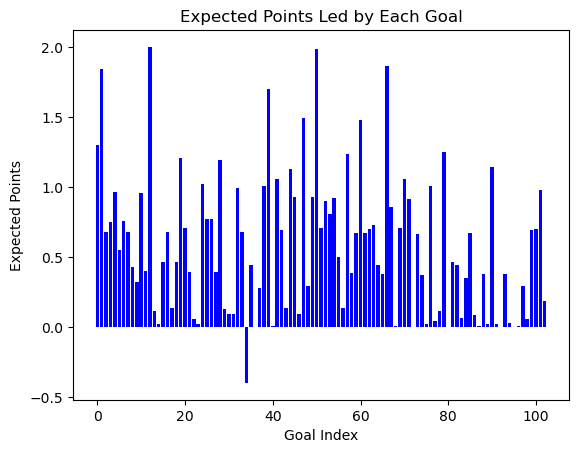

In [15]:
import csv
scr_over_100_points_dict={}
for k,v in scr_over_100_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_100_points_dict[k] = lst[k]

    with open('scr_over_100.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_100_points_dict.items():
            w.writerow([k1,v1])

In [16]:
scr_over_100_points_dict

{'Matthew Le Tissier': [70.241, 100],
 'Ian Wright': [79.22300000000001, 113],
 'Dion Dublin': [86.56000000000003, 111],
 'Ryan Giggs': [70.30500000000002, 109],
 'Paul Scholes': [68.78999999999998, 106],
 'Emile Heskey': [77.696, 110],
 'Peter Crouch': [78.25199999999998, 108],
 'Darren Bent': [75.35400000000003, 106],
 'Cristiano Ronaldo': [65.82500000000002, 103],
 'Didier Drogba': [67.36399999999998, 104],
 'Raheem Sterling': [62.27800000000001, 115],
 'Sadio Mané': [74.79799999999999, 111],
 'Son Heung-Min': [60.27700000000002, 103]}

In [20]:
scr_over_80_dict = {}
for k,v in all_player_scr_dict.items():
    if int(v) >= 80  and (int(v) < 100):
        scr_over_80_dict[k] = v

In [21]:
scr_over_50_dict = {}
for k,v in all_player_scr_dict.items():
    if int(v) >= 50  and (int(v) < 80):
        scr_over_50_dict[k] = v

In [22]:
scr_over_80_dict

{'Kevin Campbell': 83,
 'Gary Speed': 80,
 'Chris Sutton': 83,
 'Dennis Bergkamp': 87,
 'Ole Gunnar Solskjaer': 89,
 'Kevin Davies': 88,
 'James Beattie': 91,
 'Louis Saha': 85,
 'Kevin Phillips': 92,
 'Craig Bellamy': 81,
 'Mark Viduka': 92,
 'Ruud van Nistelrooij': 95,
 'Yakubu': 95,
 'Emmanuel Adebayor': 97,
 'Dimitar Berbatov': 94,
 'Carlos Tevez': 84,
 'Fernando Torres': 85,
 'Theo Walcott': 80,
 'Eden Hazard': 85,
 'Christian Benteke': 86,
 'Olivier Giroud': 90,
 'Riyad Mahrez': 82,
 'Roberto Firmino': 82}

Kevin Campbell


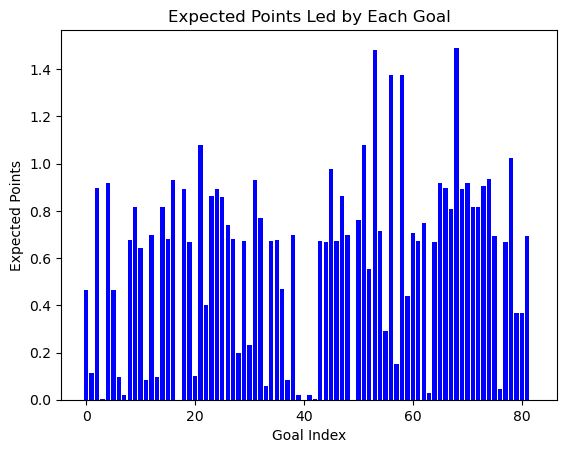

Gary Speed


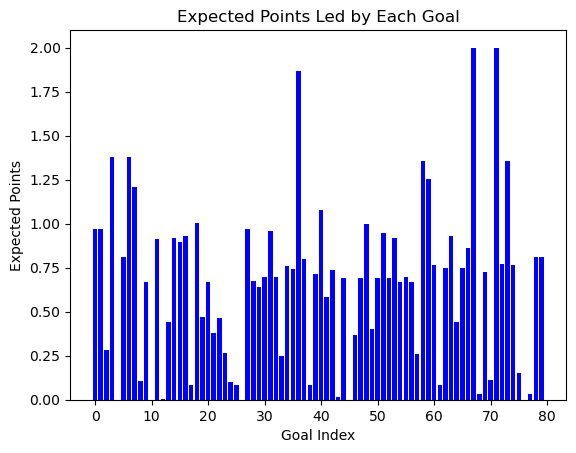

Chris Sutton


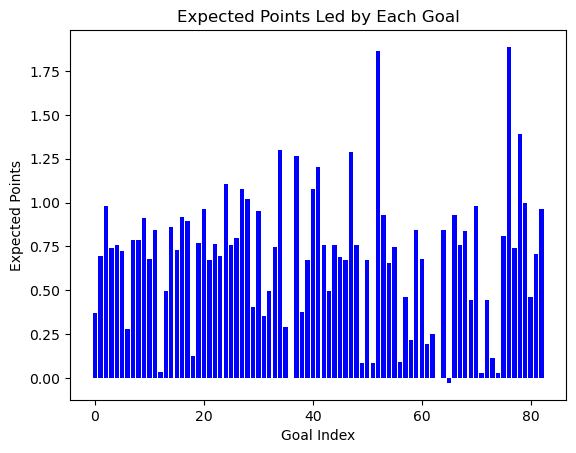

Dennis Bergkamp


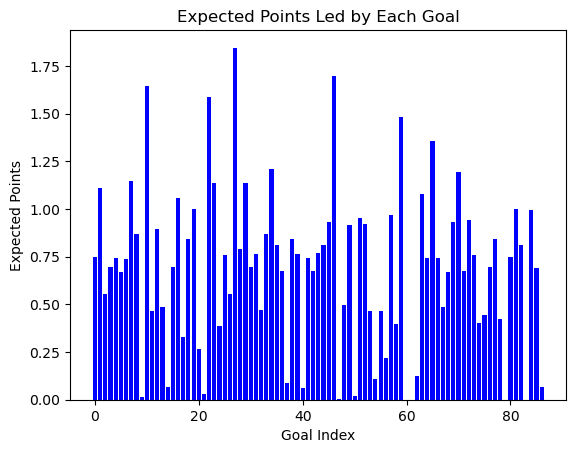

Ole Gunnar Solskjaer


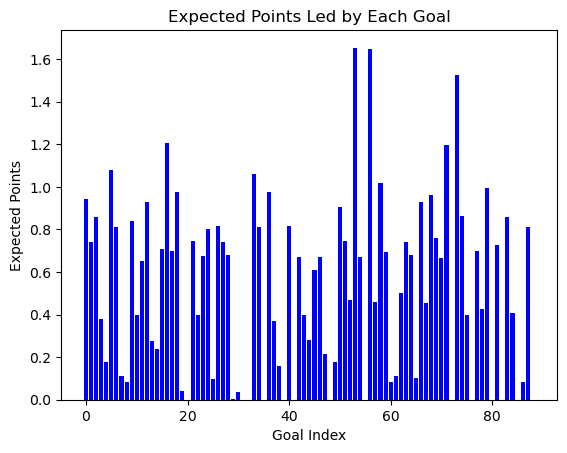

Kevin Davies


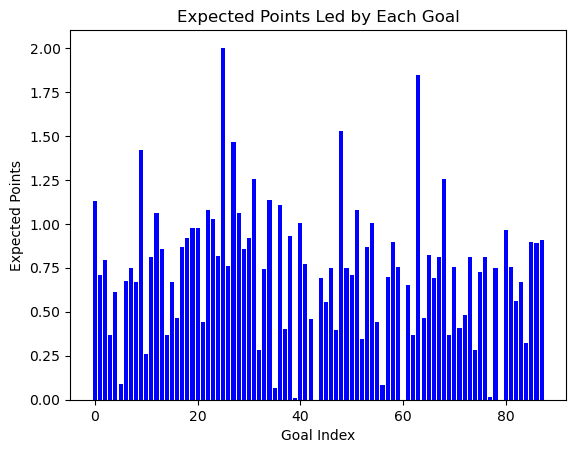

James Beattie


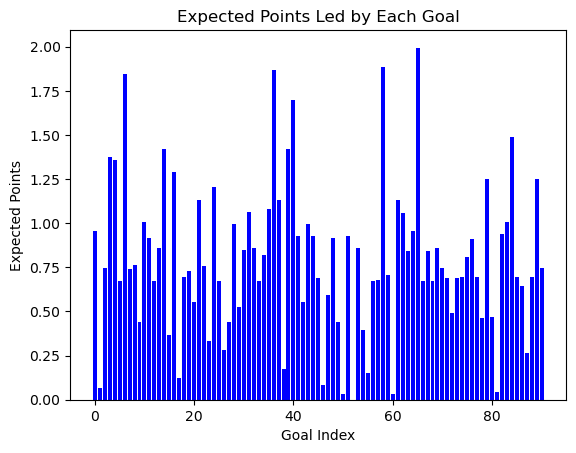

Louis Saha


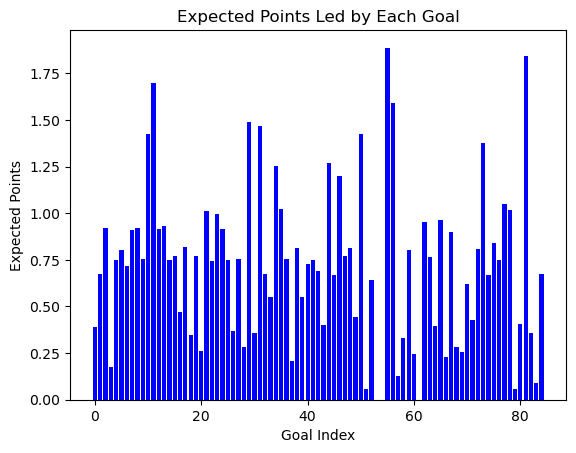

Kevin Phillips


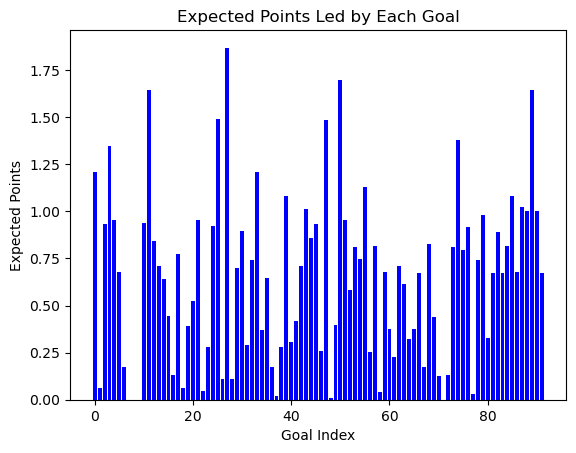

Craig Bellamy


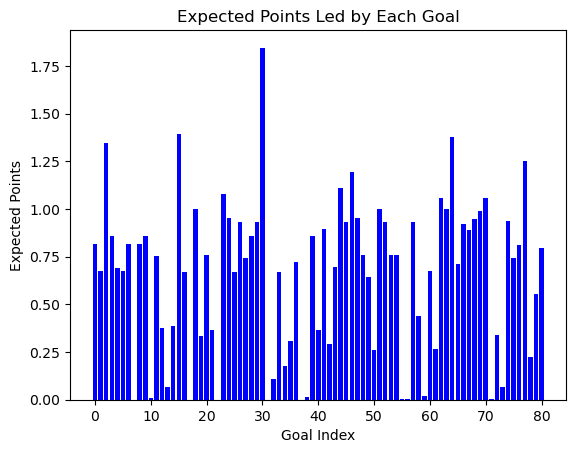

Mark Viduka


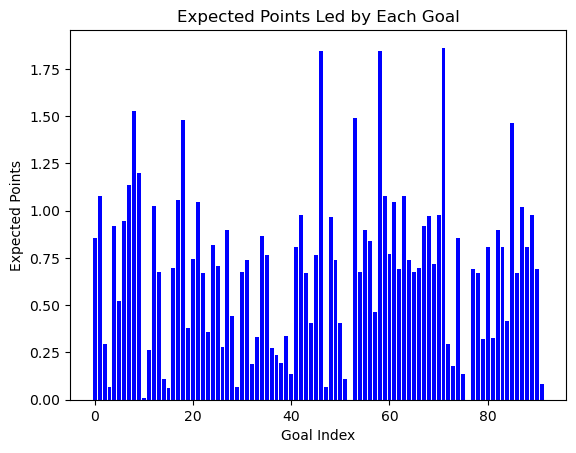

Ruud van Nistelrooij


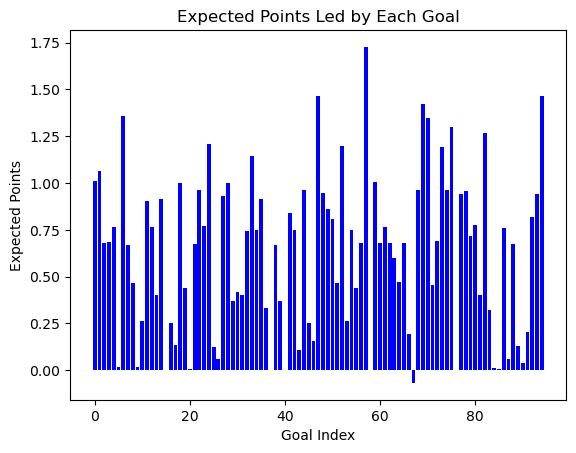

Yakubu


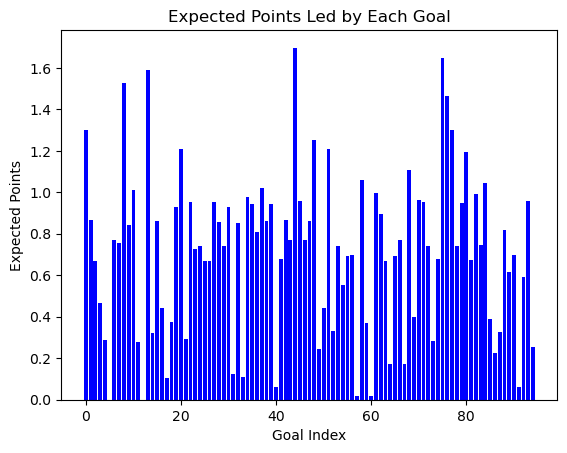

Emmanuel Adebayor


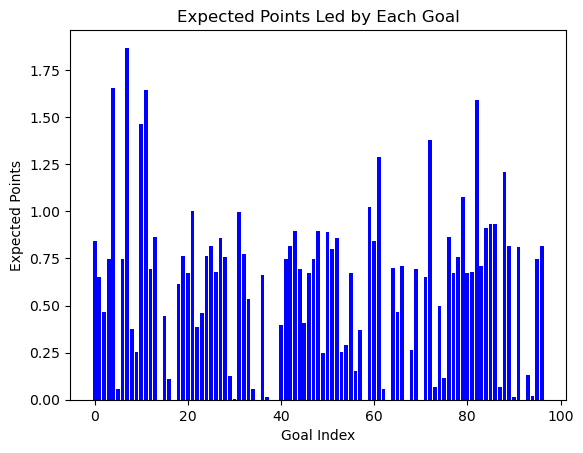

Dimitar Berbatov


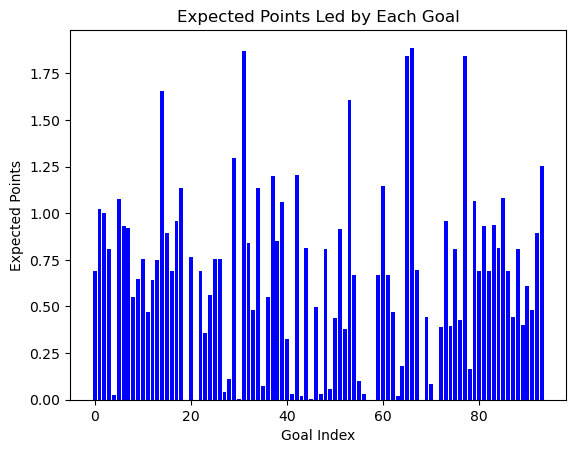

Carlos Tevez


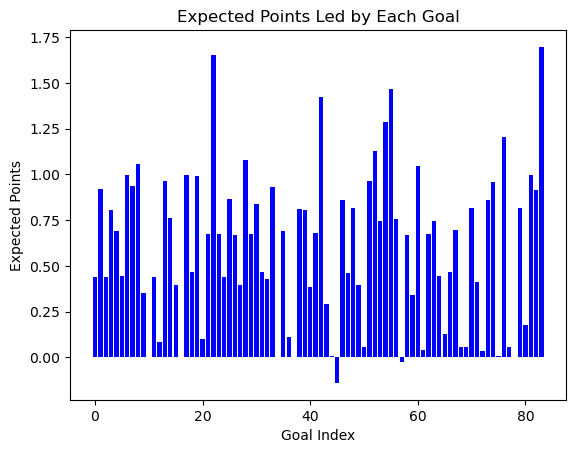

Fernando Torres


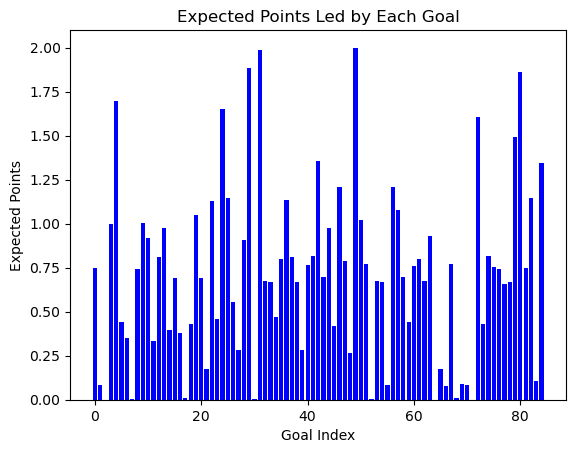

Theo Walcott


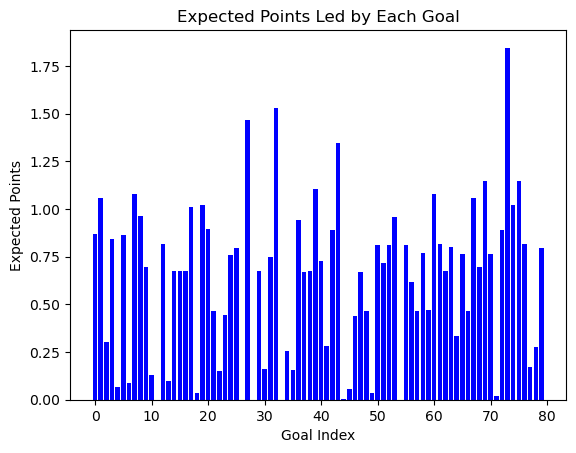

Eden Hazard


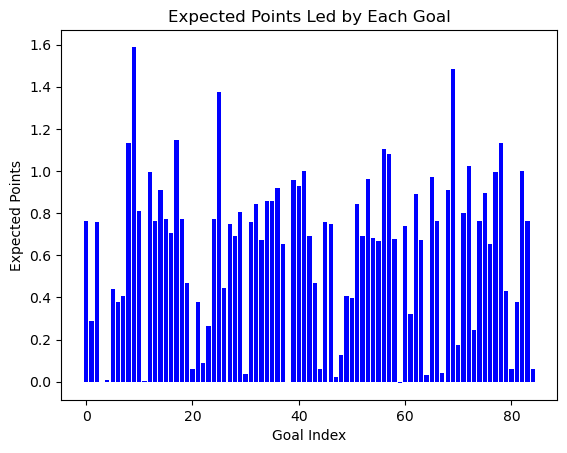

Christian Benteke


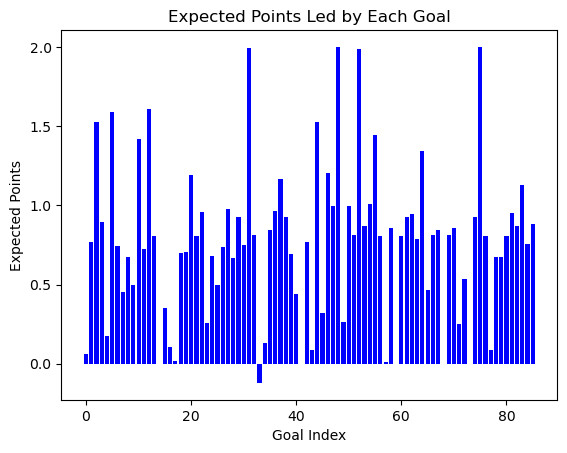

Olivier Giroud


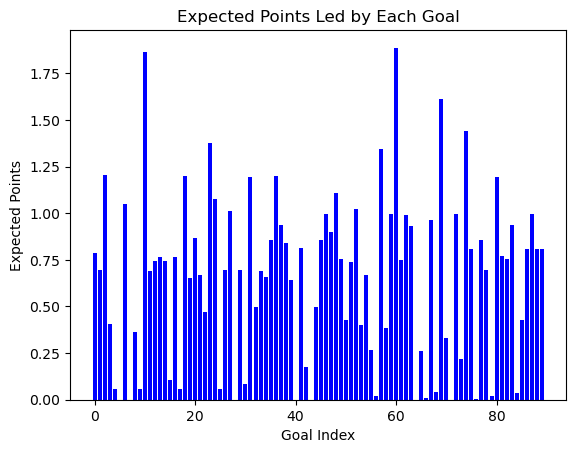

Riyad Mahrez


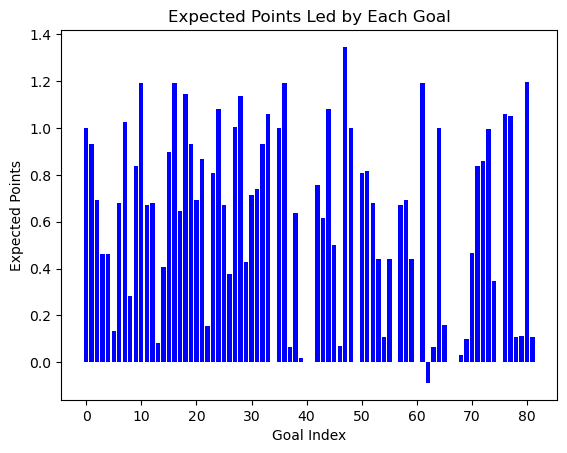

Roberto Firmino


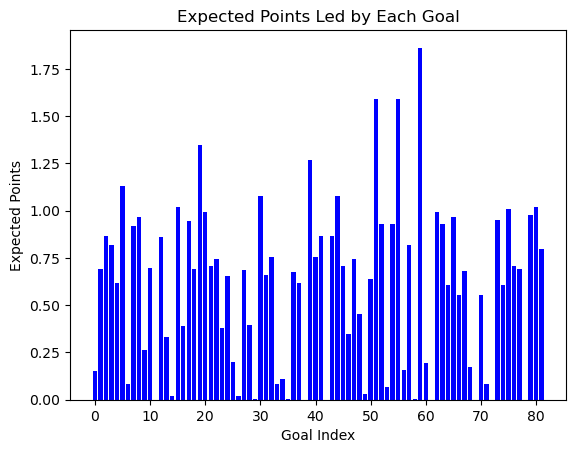

In [24]:
import csv
scr_over_80_points_dict={}
for k,v in scr_over_80_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_80_points_dict[k] = lst[k]

    with open('scr_over_80.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_80_points_dict.items():
            w.writerow([k1,v1])

In [25]:
scr_over_80_points_dict

{'Kevin Campbell': [49.953000000000024, 83],
 'Gary Speed': [53.085, 80],
 'Chris Sutton': [56.905, 83],
 'Dennis Bergkamp': [60.33900000000001, 87],
 'Ole Gunnar Solskjaer': [47.58599999999999, 89],
 'Kevin Davies': [63.858, 88],
 'James Beattie': [72.77900000000002, 91],
 'Louis Saha': [61.666000000000025, 85],
 'Kevin Phillips': [59.814000000000036, 92],
 'Craig Bellamy': [53.09099999999998, 81],
 'Mark Viduka': [63.38199999999999, 92],
 'Ruud van Nistelrooij': [60.145, 95],
 'Yakubu': [68.24400000000001, 95],
 'Emmanuel Adebayor': [57.782, 97],
 'Dimitar Berbatov': [61.85100000000003, 94],
 'Carlos Tevez': [50.415000000000035, 84],
 'Fernando Torres': [61.119000000000014, 85],
 'Theo Walcott': [50.74700000000002, 80],
 'Eden Hazard': [53.78899999999999, 85],
 'Christian Benteke': [66.10400000000001, 86],
 'Olivier Giroud': [59.477, 90],
 'Riyad Mahrez': [48.00300000000001, 82],
 'Roberto Firmino': [49.77899999999998, 82]}

In [26]:
scr_over_50_dict

{'Mark Bright': 50,
 'Brian Deane': 71,
 'Mark Hughes': 64,
 'Peter Beardsley': 58,
 'Eric Cantona': 70,
 'Dean Holdsworth': 63,
 'Niall Quinn': 59,
 'Kevin Gallacher': 56,
 'Chris Armstrong': 71,
 'Tony Cottee': 78,
 'Alan Smith': 53,
 'Nick Barmby': 53,
 'Efan Ekoku': 52,
 'Trevor Sinclair': 52,
 'Stan Collymore': 62,
 'Duncan Ferguson': 68,
 'John Hartson': 55,
 'David Beckham': 62,
 'Jason Euell': 56,
 'Lee Bowyer': 57,
 'Gianfranco Zola': 59,
 'Paulo Wanchope': 50,
 'Paolo Di Canio': 66,
 'Gustavo Poyet': 52,
 'Harry Kewell': 57,
 'Damien Duff': 54,
 'Kanu': 54,
 'Gareth Barry': 53,
 'Danny Murphy': 50,
 'Eidur Gudjohnsen': 55,
 'Robert Pirès': 62,
 'Darius Vassell': 52,
 'Kevin Nolan': 69,
 'Carlton Cole': 52,
 'James Milner': 55,
 'Andrew Johnson': 51,
 'Cesc Fàbregas': 50,
 'Tim Cahill': 56,
 'Gabriel Agbonlahor': 74,
 'Dirk Kuijt': 51,
 'Shane Long': 56,
 'Clint Dempsey': 57,
 'Gareth Bale': 53,
 'Daniel Sturridge': 76,
 'Danny Welbeck': 62,
 'Andy Carroll': 54,
 'Steven Fletc

Mark Bright


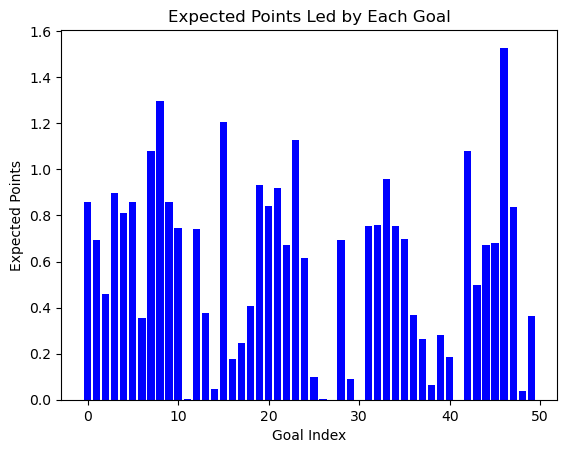

Brian Deane


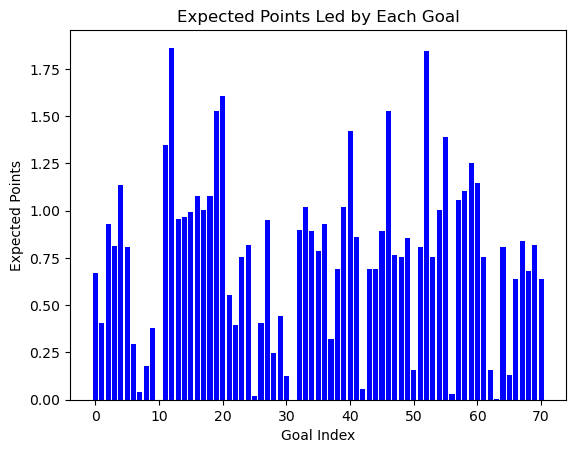

Mark Hughes


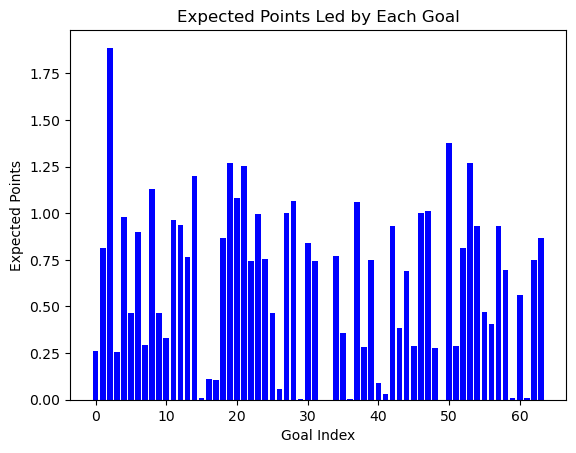

Peter Beardsley


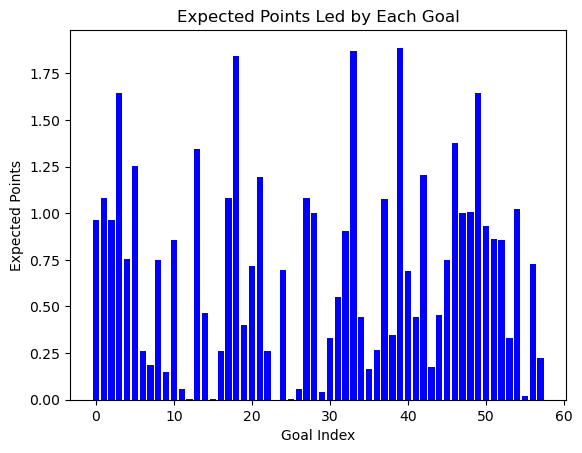

Eric Cantona


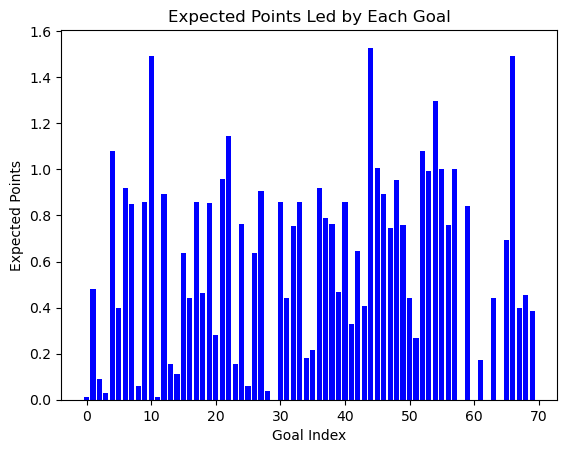

Dean Holdsworth


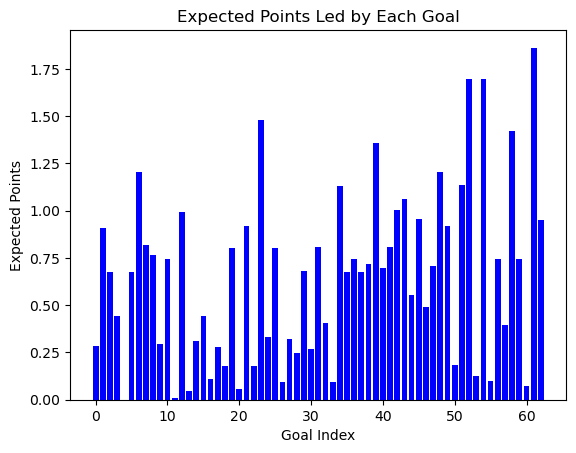

Niall Quinn


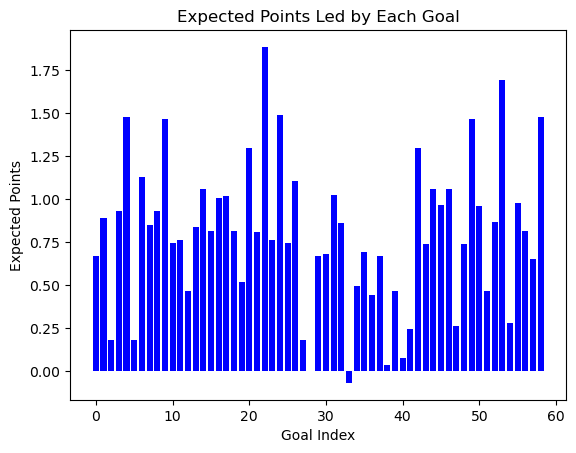

Kevin Gallacher


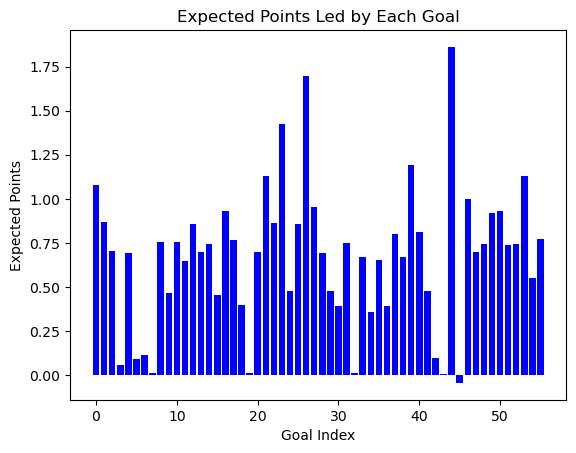

Chris Armstrong


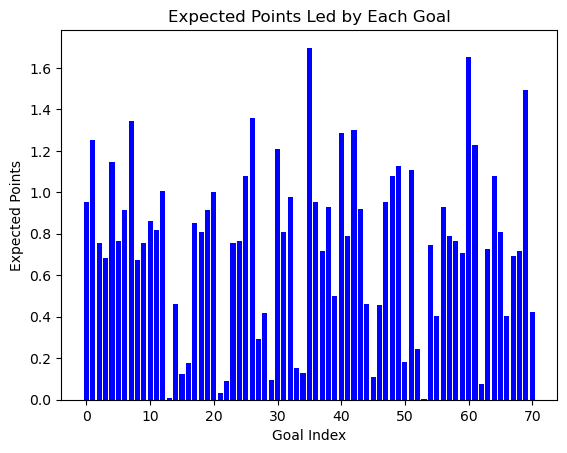

Tony Cottee


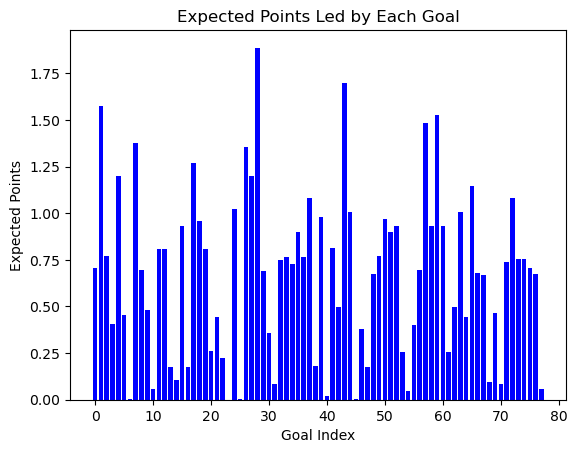

Alan Smith


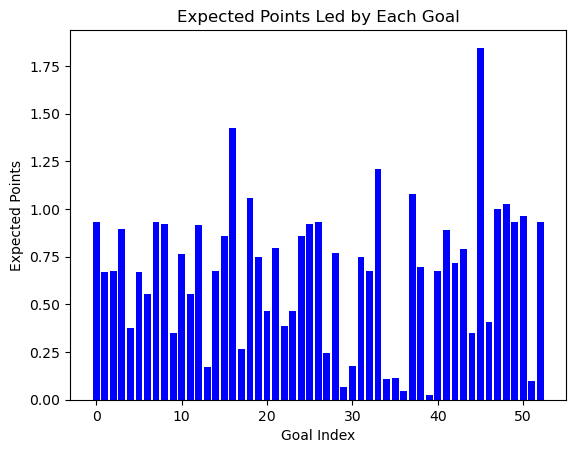

Nick Barmby


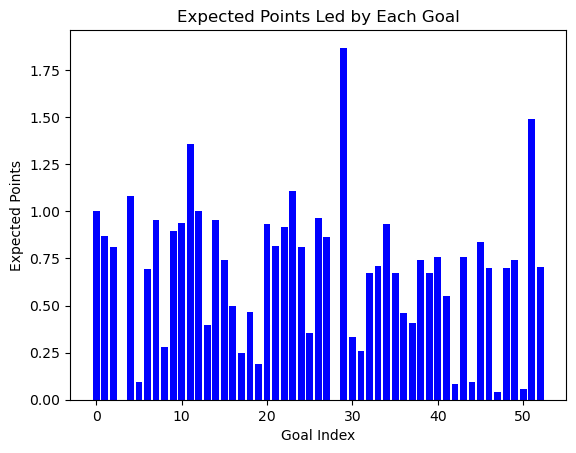

Efan Ekoku


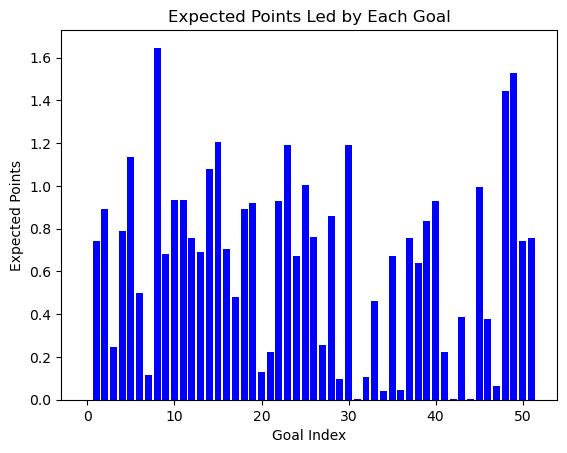

Trevor Sinclair


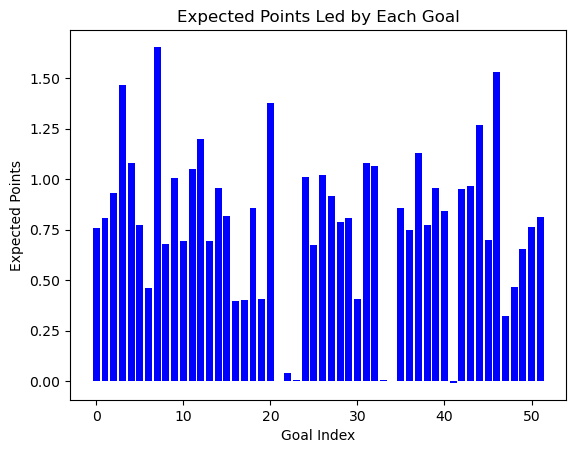

Stan Collymore


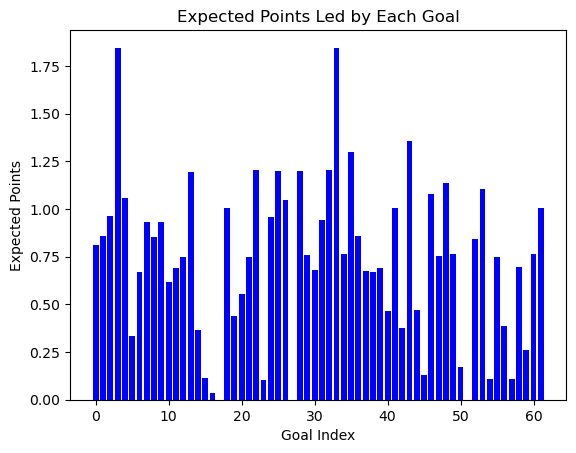

Duncan Ferguson


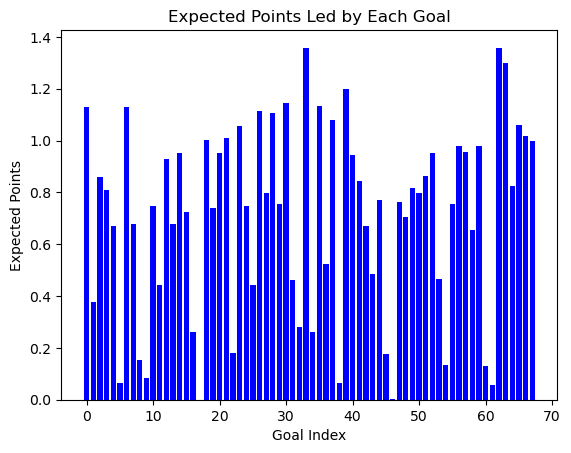

John Hartson


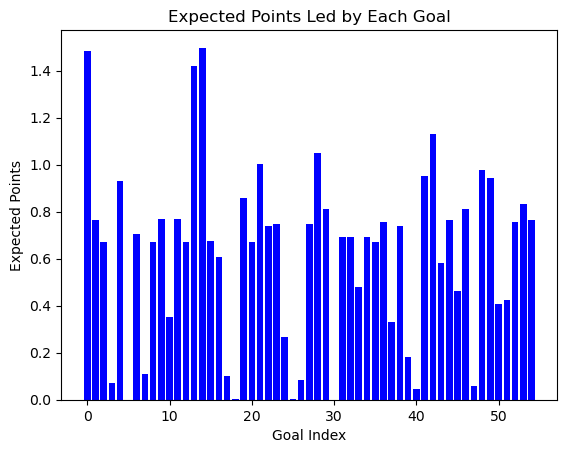

David Beckham


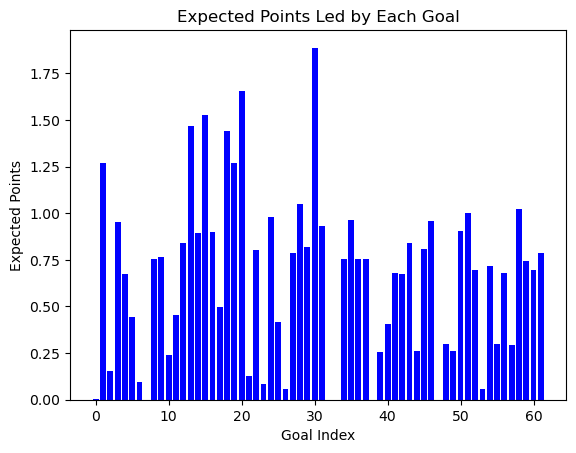

Jason Euell


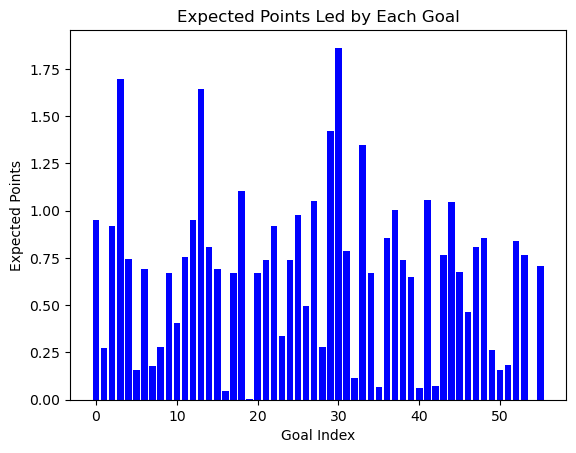

Lee Bowyer


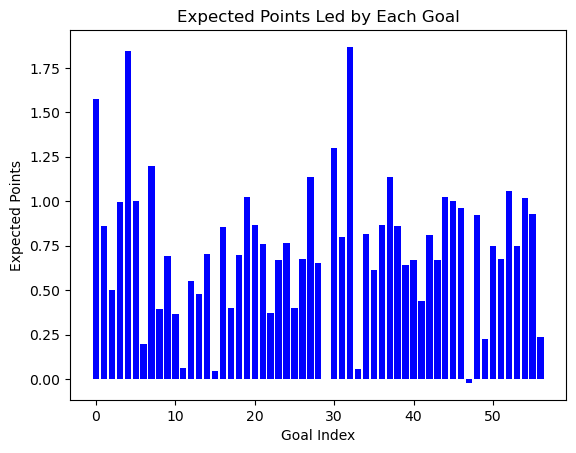

Gianfranco Zola


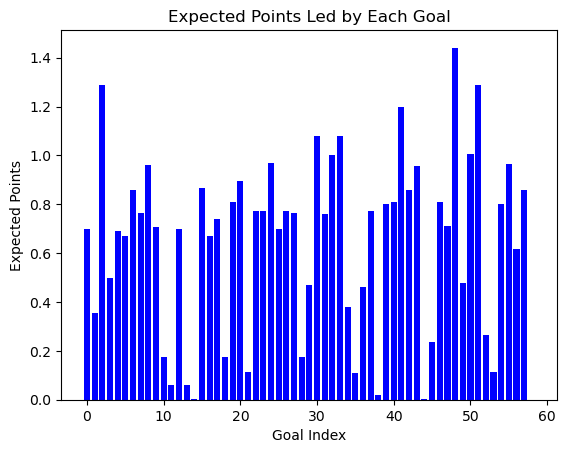

Paulo Wanchope


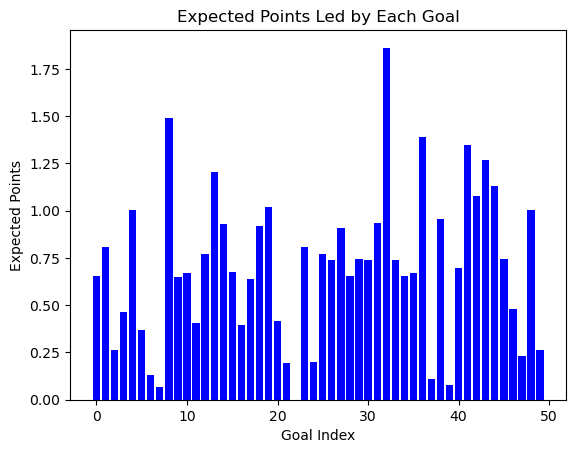

Paolo Di Canio


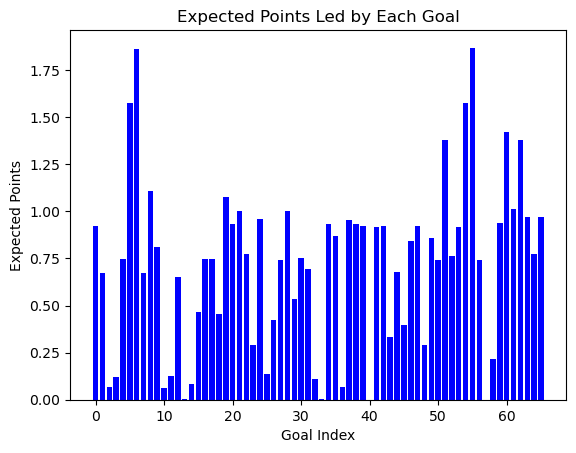

Gustavo Poyet


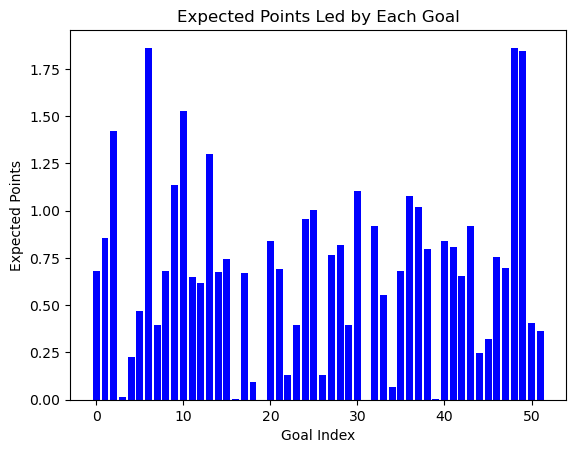

Harry Kewell


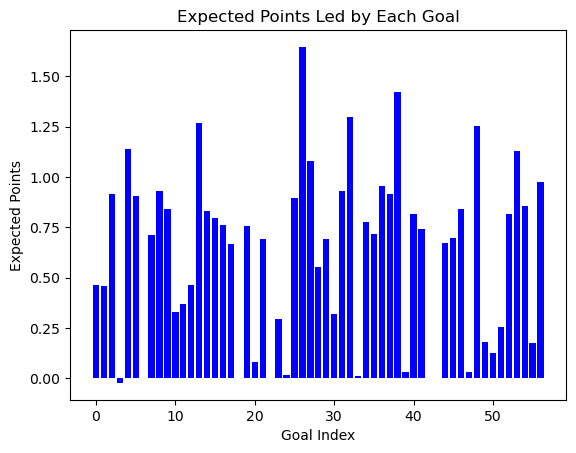

Damien Duff


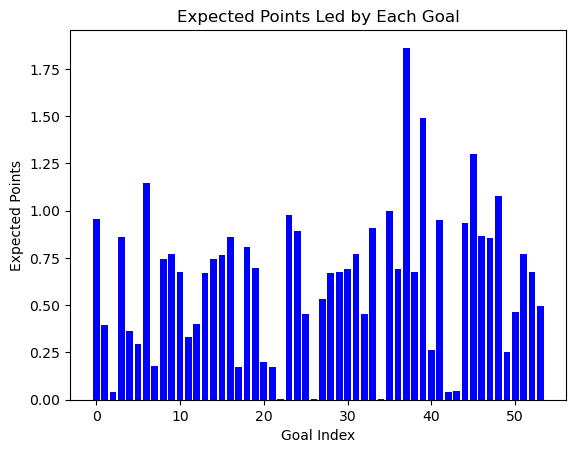

Kanu


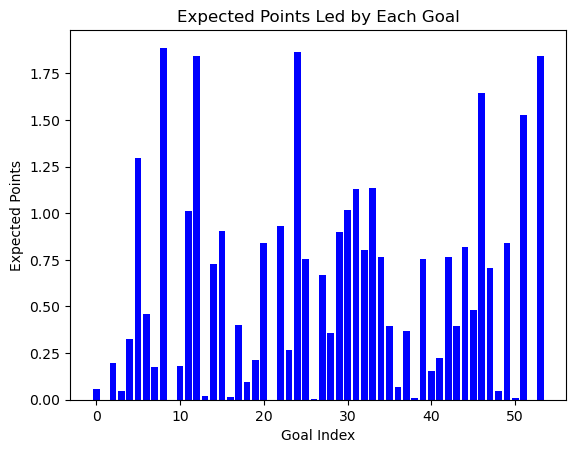

Gareth Barry


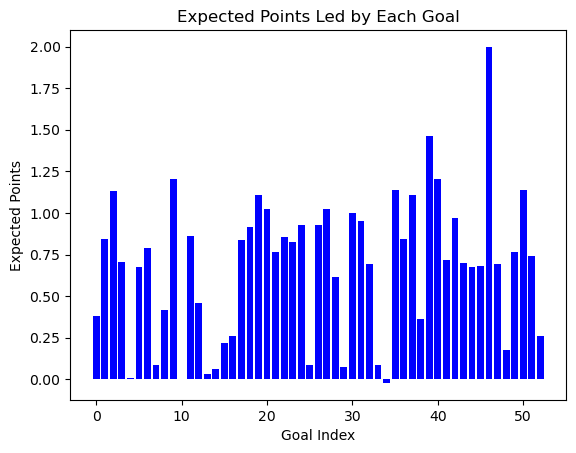

Danny Murphy


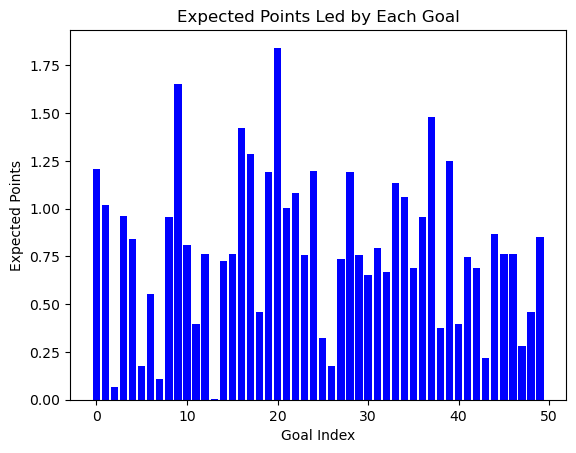

Eidur Gudjohnsen


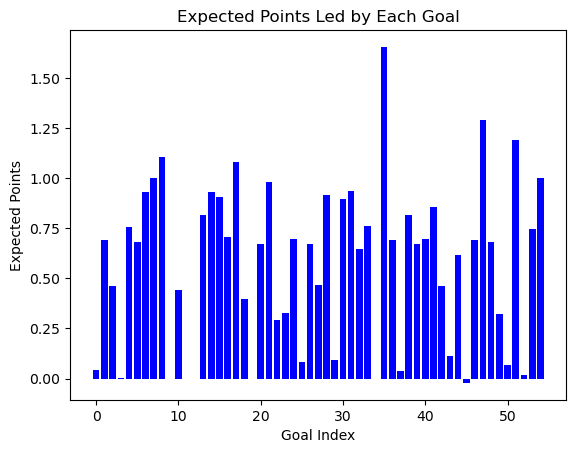

Robert Pirès


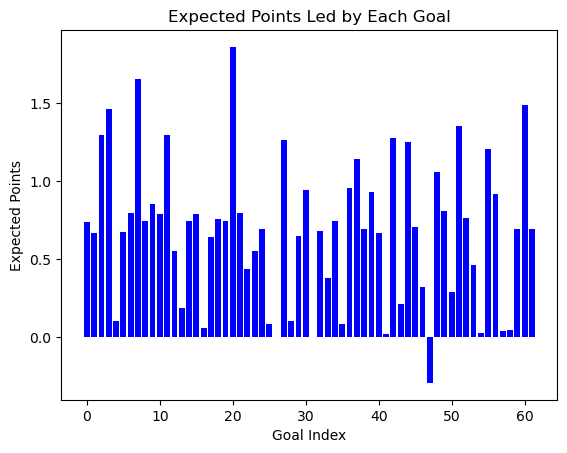

Darius Vassell


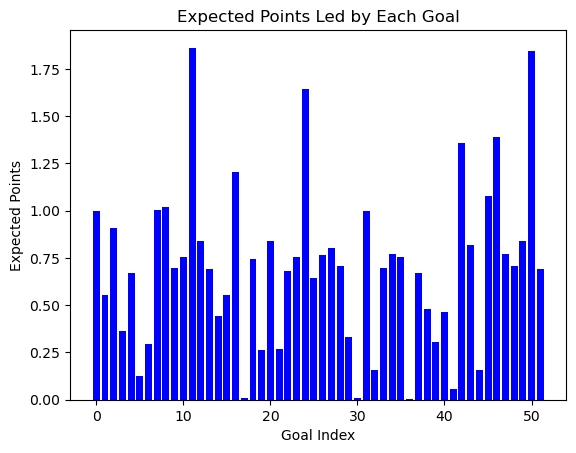

Kevin Nolan


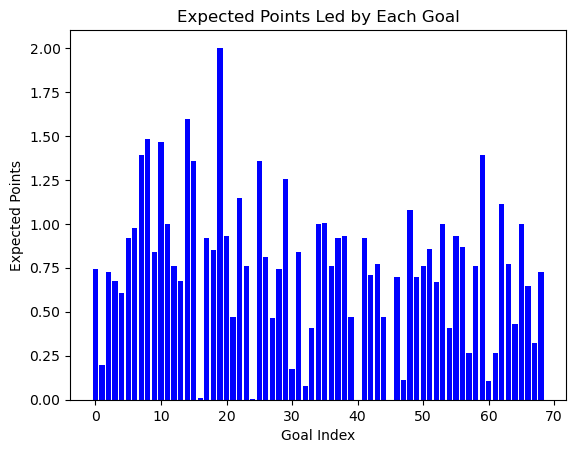

Carlton Cole


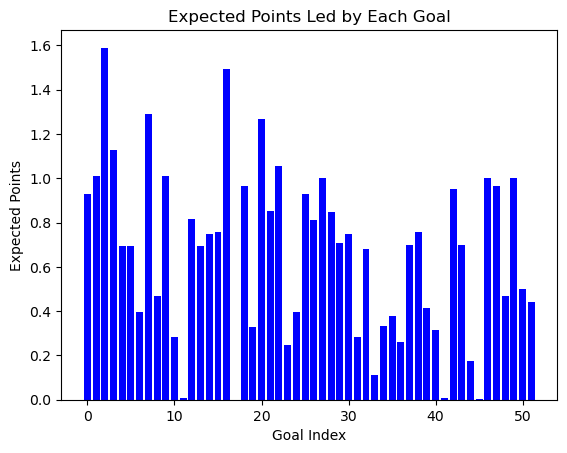

James Milner


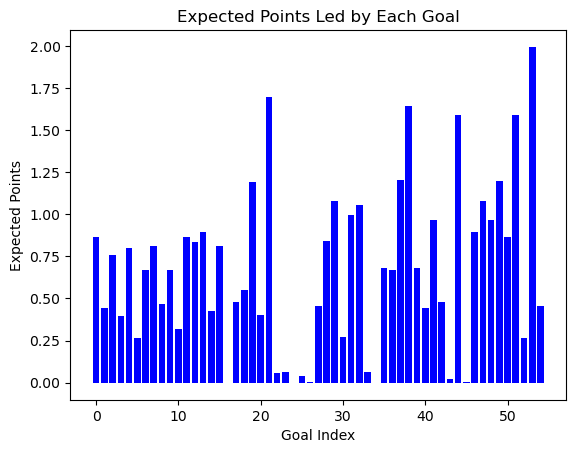

Andrew Johnson


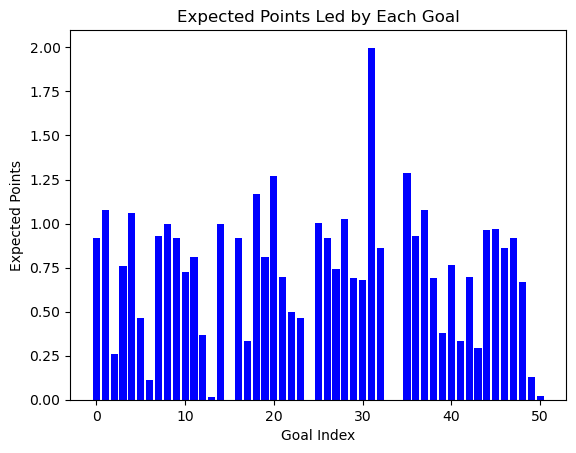

Cesc Fàbregas


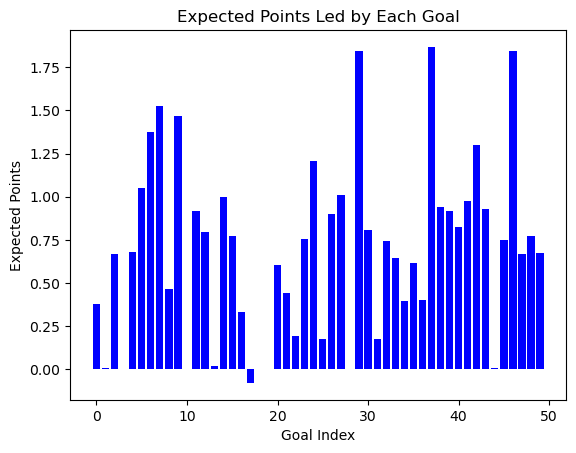

Tim Cahill


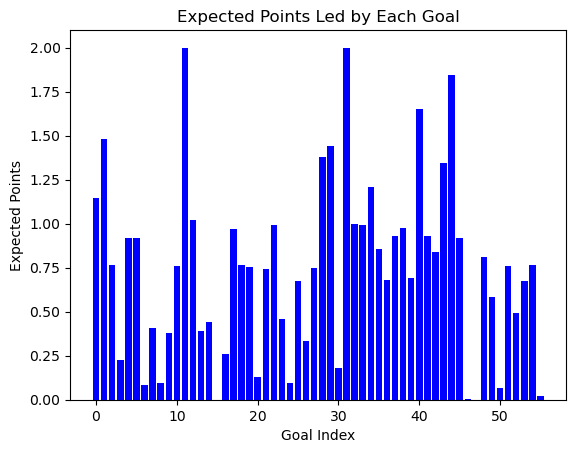

Gabriel Agbonlahor


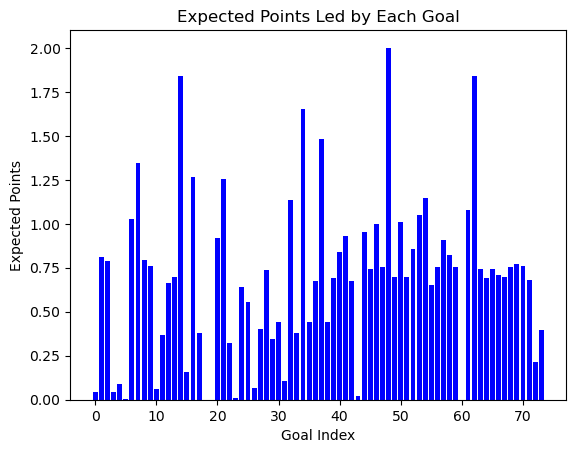

Dirk Kuijt


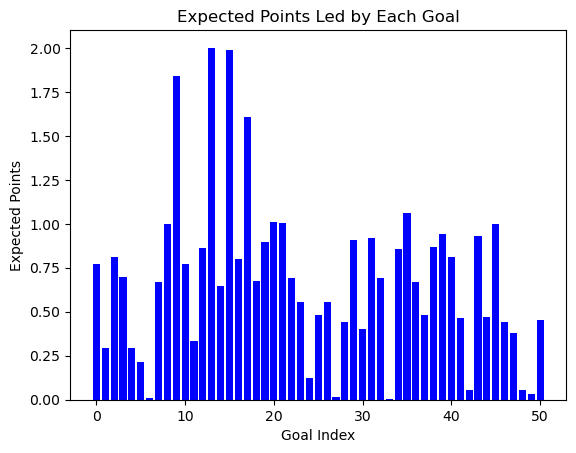

Shane Long


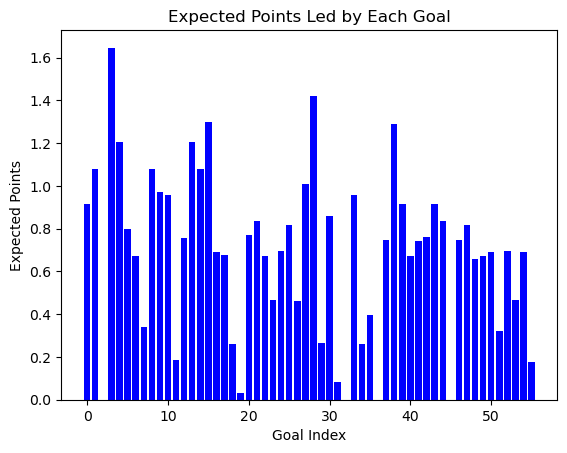

Clint Dempsey


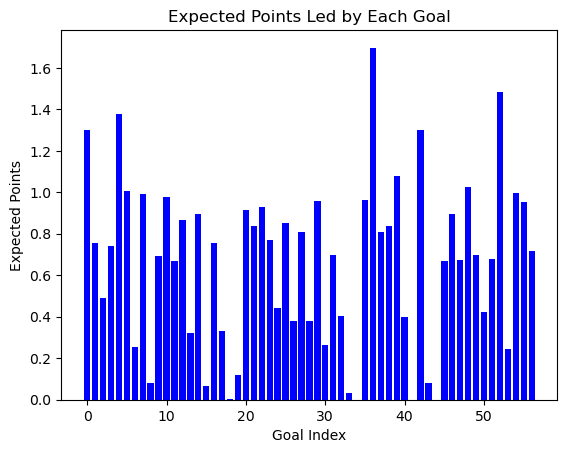

Gareth Bale


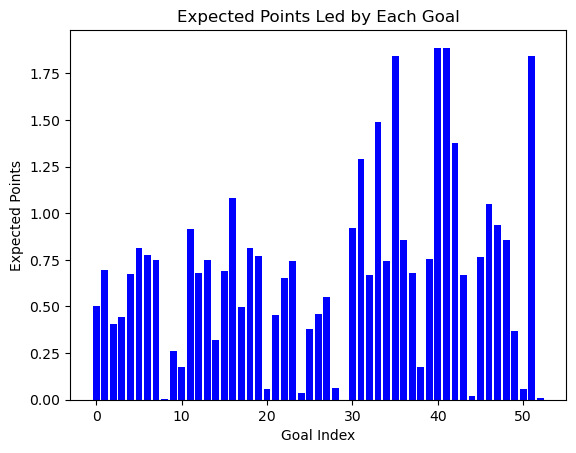

Daniel Sturridge


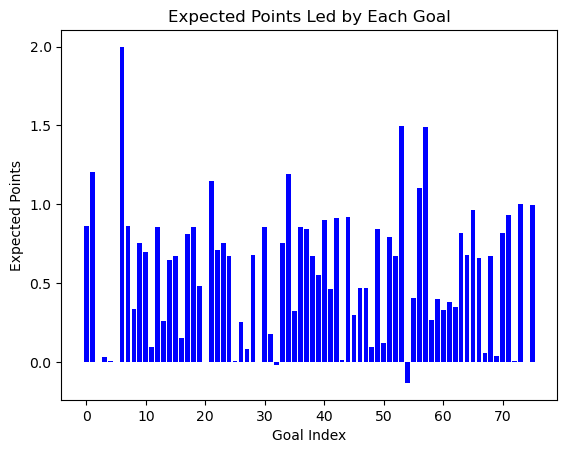

Danny Welbeck


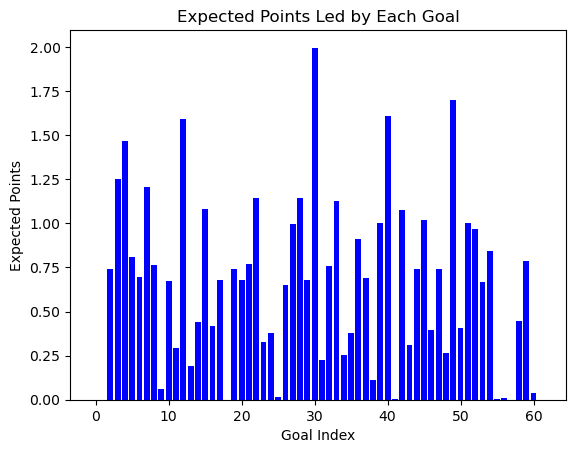

Andy Carroll


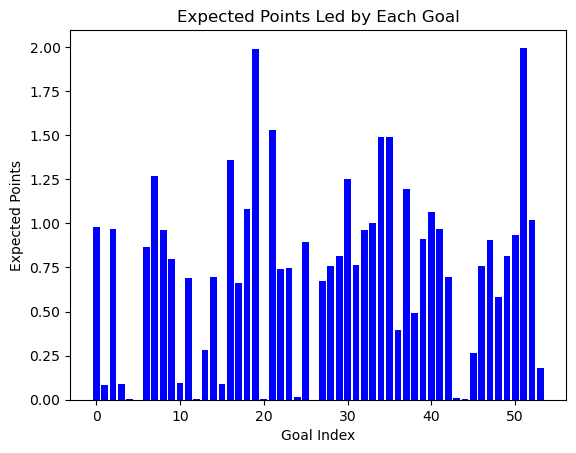

Steven Fletcher


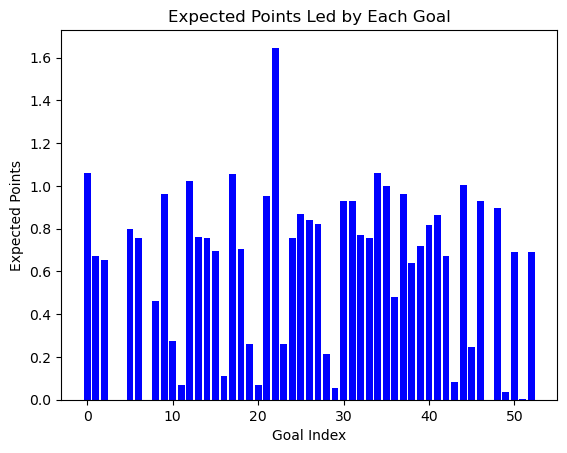

Yaya Touré


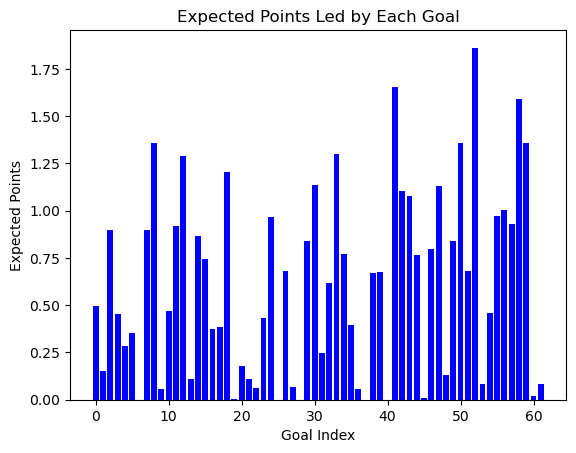

Chicharito


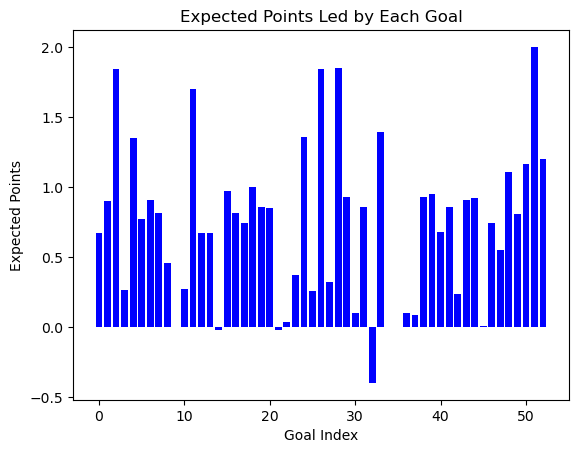

David Silva


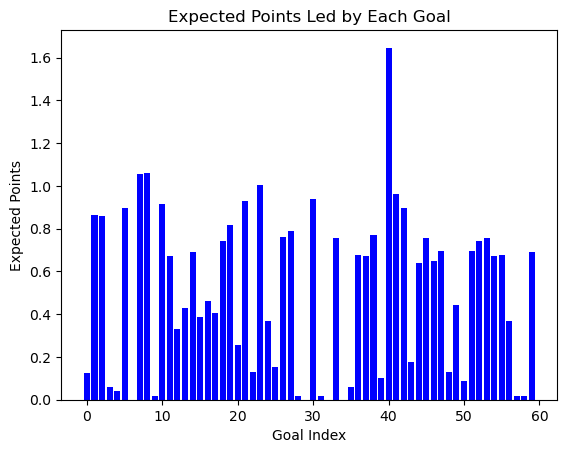

Luis Suárez


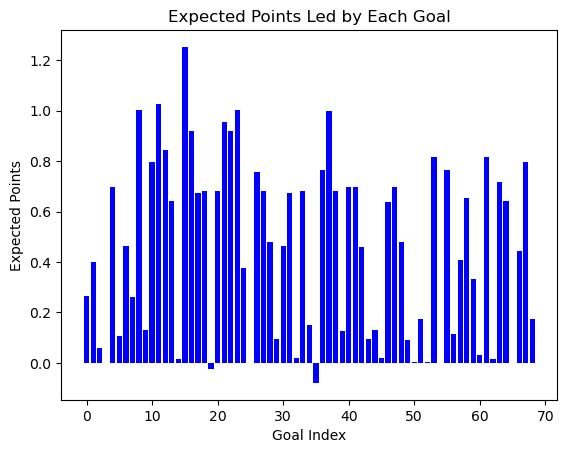

Edin Dzeko


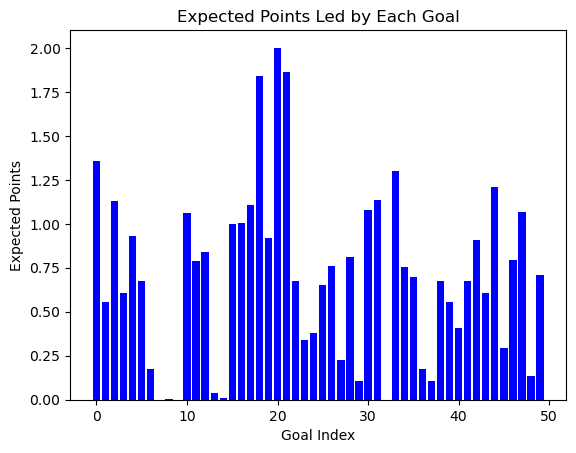

Juan Mata


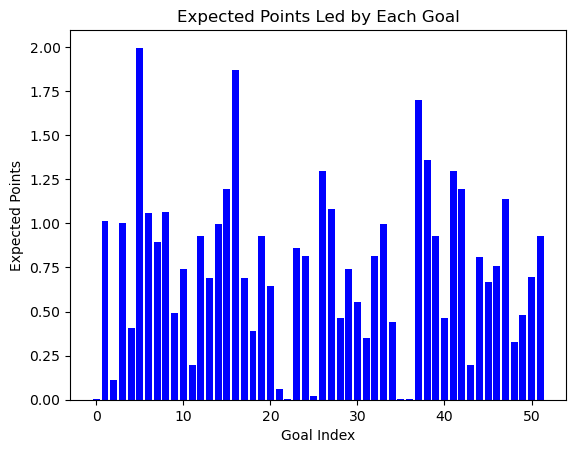

Gylfi Sigurdsson


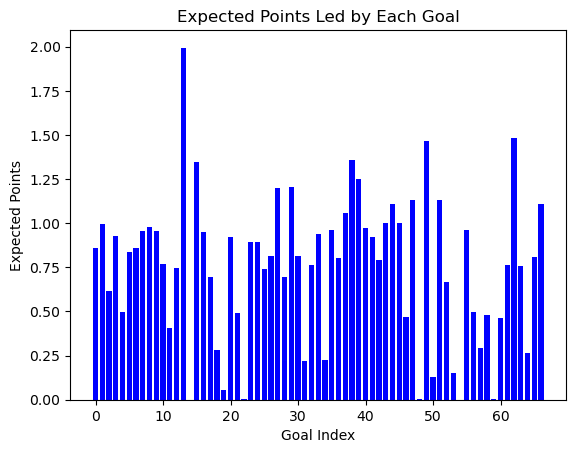

Christian Eriksen


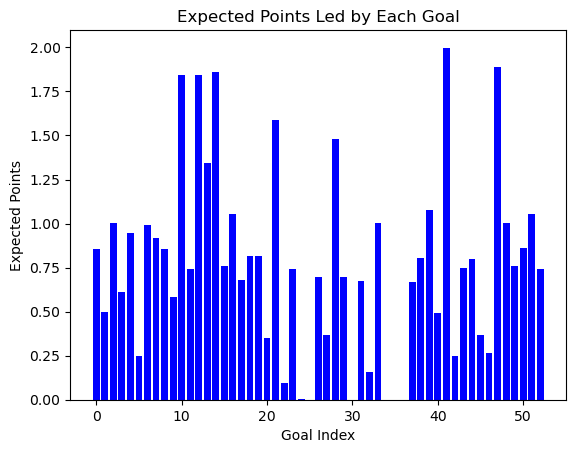

Chris Wood


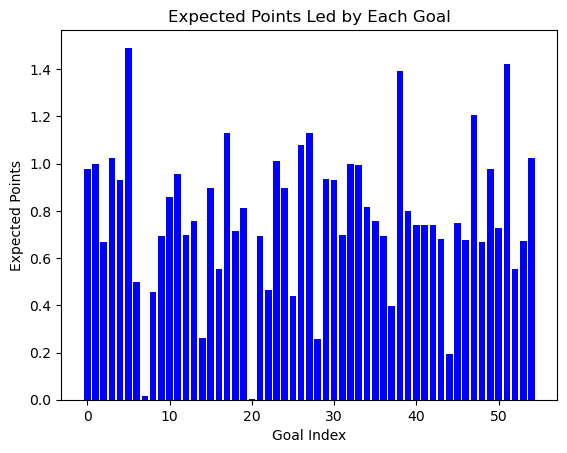

Diego Costa


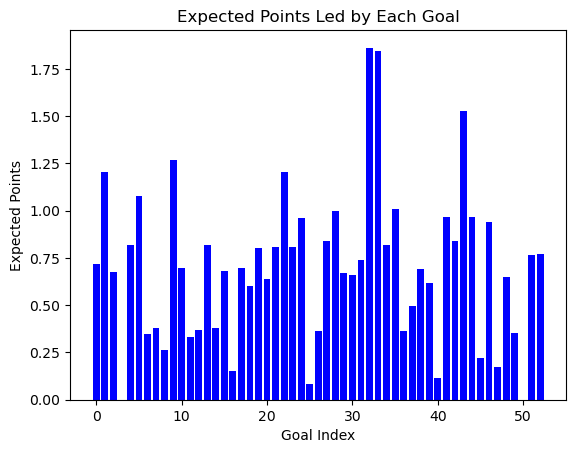

Wilfried Zaha


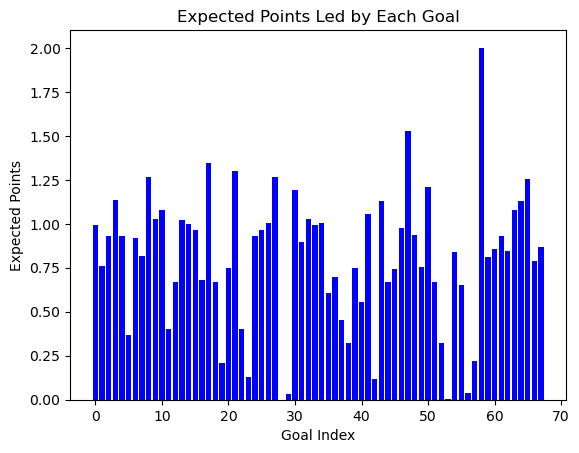

Alexis Sánchez


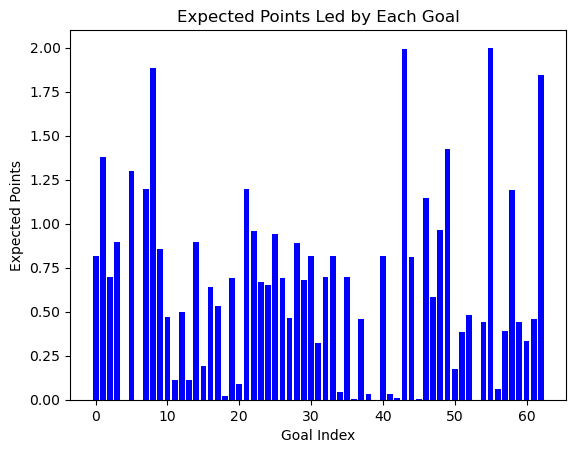

Danny Ings


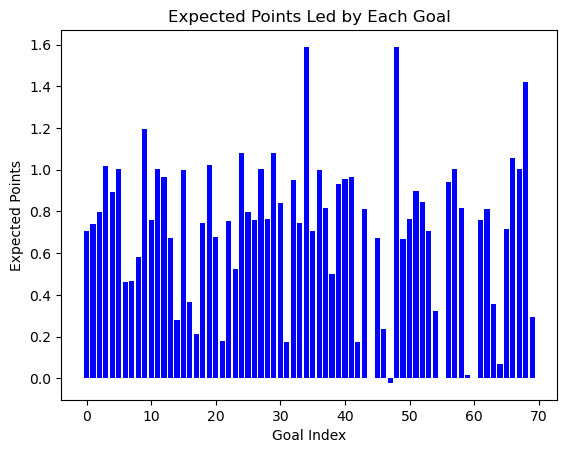

Dele Alli


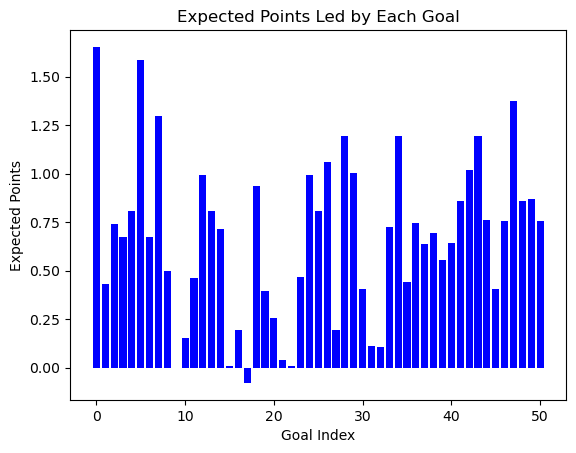

Callum Wilson


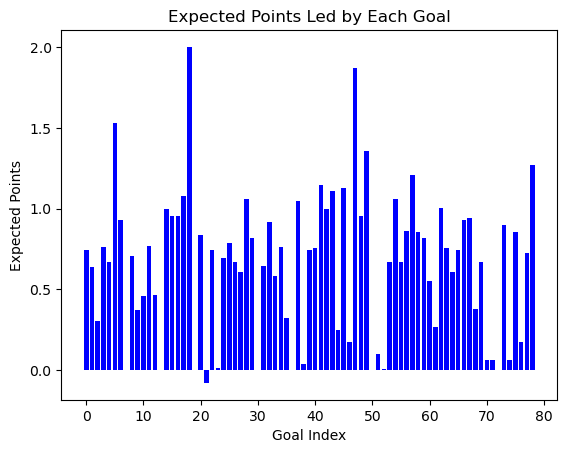

Anthony Martial


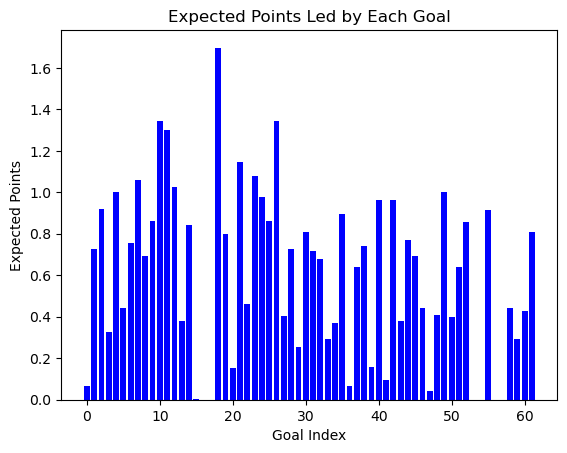

Kevin De Bruyne


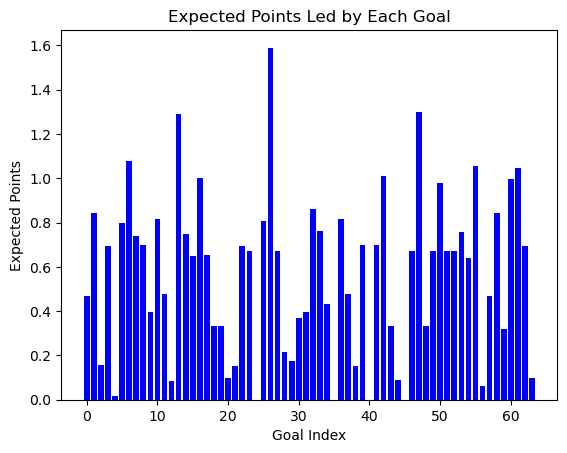

Joshua King


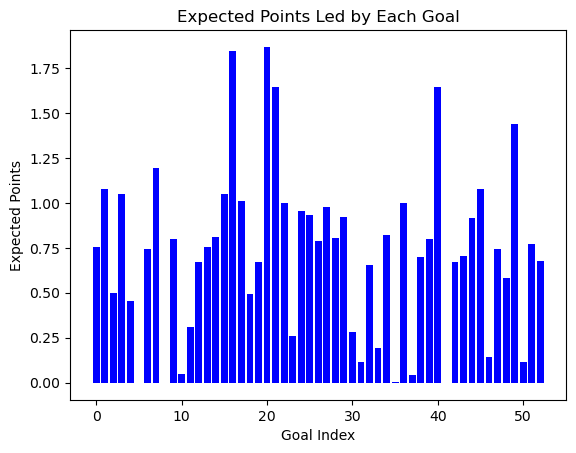

Michail Antonio


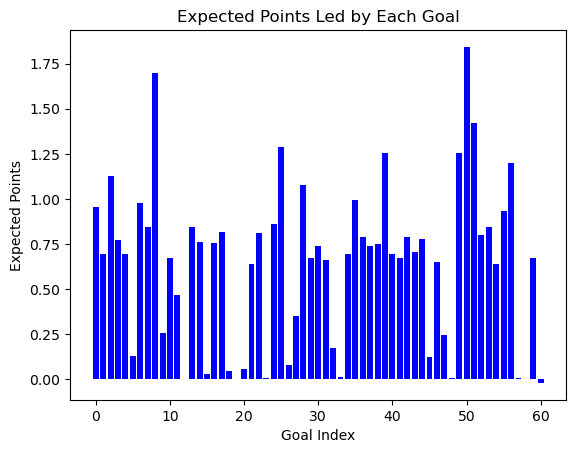

Marcus Rashford


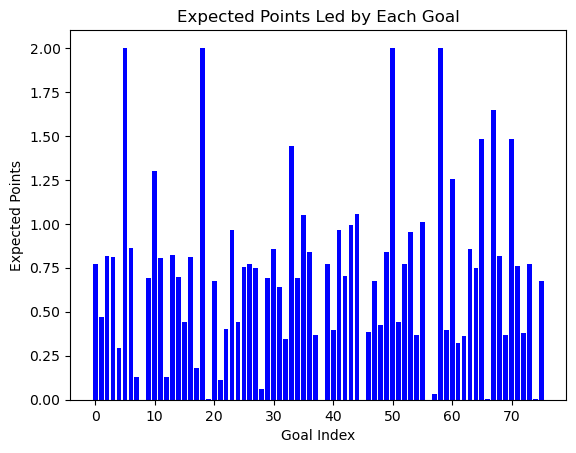

Gabriel Jesus


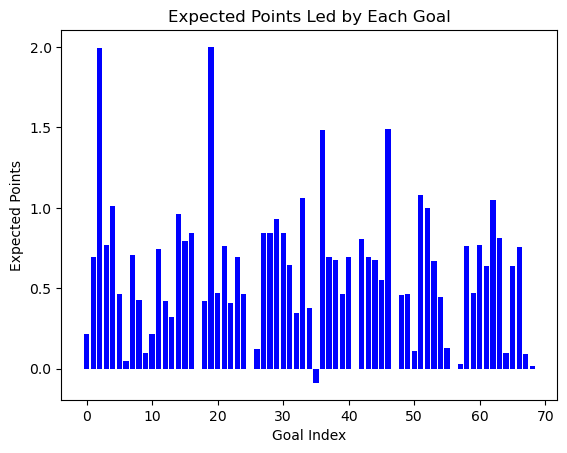

Alexandre Lacazette


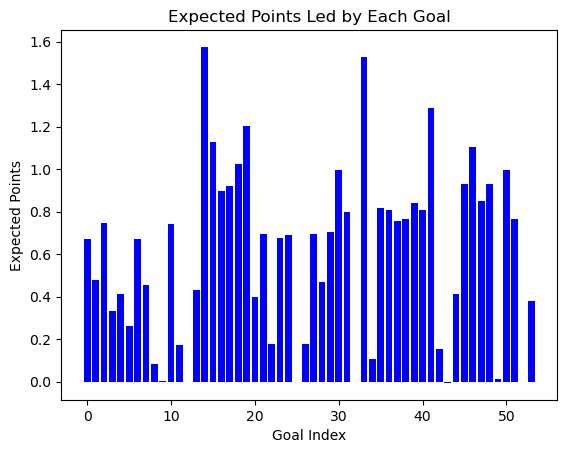

Pierre-Emerick Aubameyang


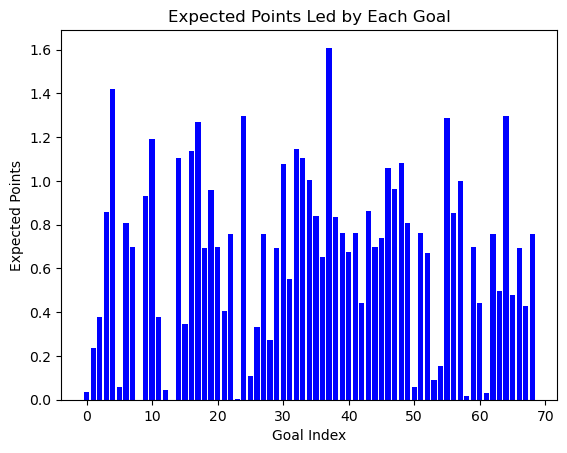

In [27]:
import csv
scr_over_50_points_dict={}
for k,v in scr_over_50_dict.items():
    print(k)
    lst = cal_exp_win_goal_without_print(k)
    scr_over_50_points_dict[k] = lst[k]

    with open('scr_over_50.csv','w',encoding='utf-8') as f:
        w = csv.writer(f)
        for k1,v1 in scr_over_50_points_dict.items():
            w.writerow([k1,v1])

In [28]:
scr_over_50_points_dict

{'Mark Bright': [28.893, 50],
 'Brian Deane': [53.89800000000001, 71],
 'Mark Hughes': [40.308000000000014, 64],
 'Peter Beardsley': [40.944999999999986, 58],
 'Eric Cantona': [41.72100000000001, 70],
 'Dean Holdsworth': [41.51200000000001, 63],
 'Niall Quinn': [47.157000000000004, 59],
 'Kevin Gallacher': [37.653999999999996, 56],
 'Chris Armstrong': [52.90299999999999, 71],
 'Tony Cottee': [52.636, 78],
 'Alan Smith': [35.797, 53],
 'Nick Barmby': [35.454, 53],
 'Efan Ekoku': [33.683000000000014, 52],
 'Trevor Sinclair': [39.99, 52],
 'Stan Collymore': [45.586, 62],
 'Duncan Ferguson': [48.54699999999998, 68],
 'John Hartson': [34.39999999999999, 55],
 'David Beckham': [40.801, 62],
 'Jason Euell': [38.11500000000001, 56],
 'Lee Bowyer': [41.806, 57],
 'Gianfranco Zola': [38.018, 59],
 'Paulo Wanchope': [35.33999999999999, 50],
 'Paolo Di Canio': [47.800000000000004, 66],
 'Gustavo Poyet': [36.084, 52],
 'Harry Kewell': [35.498999999999995, 57],
 'Damien Duff': [34.009, 54],
 'Kanu':

In [26]:
g_lst = [230,180,150,120,100,80,50]

In [27]:
import pandas as pd

for g in g_lst:
    globals()[f'scr_over_{g}_points_dict'] = pd.read_csv(f'scr_over_{g}.csv')
    a = globals()[f'scr_over_{g}_points_dict'].columns
    globals()[f'scr_over_{g}_points_dict'].columns = ['name', 'p/g_goal']
    new_data = {'name': a[0], 'p/g_goal': a[1]}
    globals()[f'scr_over_{g}_points_dict'] = globals()[f'scr_over_{g}_points_dict'].append(new_data, ignore_index=True)

for g in g_lst:
    print(f"scr_over_{g}_points_dict:")
    print(globals()[f'scr_over_{g}_points_dict'])

scr_over_230_points_dict:
           name                   p/g_goal
0  Alan Shearer  [169.36300000000008, 260]
scr_over_180_points_dict:
            name                   p/g_goal
0   Wayne Rooney   [135.6820000000001, 208]
1  Sergio Agüero  [101.79600000000013, 184]
2     Harry Kane  [137.56200000000007, 213]
3    Andrew Cole  [114.39500000000004, 187]
scr_over_150_points_dict:
            name                   p/g_goal
0   Michael Owen   [96.63500000000006, 150]
1  Frank Lampard  [121.12800000000006, 177]
2  Thierry Henry  [112.11300000000008, 175]
3  Jermain Defoe  [114.96700000000006, 162]
4  Robbie Fowler  [103.57299999999998, 163]
scr_over_120_points_dict:
                       name                  p/g_goal
0             Les Ferdinand            [110.578, 149]
1              Dwight Yorke             [91.152, 123]
2   Jimmy Floyd Hasselbaink  [87.37499999999999, 127]
3            Nicolas Anelka  [74.34399999999997, 125]
4              Robbie Keane  [91.96600000000001, 125]
5 

In [28]:
dfs = []
for g in g_lst:
    df_name = f'scr_over_{g}_points_dict'
    dfs.append(globals()[df_name])

merged_df = pd.concat(dfs, ignore_index=True)

print(merged_df)

                          name                   p/g_goal
0                 Alan Shearer  [169.36300000000008, 260]
1                 Wayne Rooney   [135.6820000000001, 208]
2                Sergio Agüero  [101.79600000000013, 184]
3                   Harry Kane  [137.56200000000007, 213]
4                  Andrew Cole  [114.39500000000004, 187]
..                         ...                        ...
122            Marcus Rashford               [53.008, 76]
123              Gabriel Jesus   [40.593999999999994, 69]
124        Alexandre Lacazette               [32.936, 54]
125  Pierre-Emerick Aubameyang    [46.54600000000001, 69]
126                Mark Bright               [28.893, 50]

[127 rows x 2 columns]
